# ARHI x sex interaction analysis

Use sex as the interactive covariate. Exclude sex in the covariates.

## Regenie interaction (ARHI x sex)

In [3]:
# Common variables Columbia's cluster
UKBB_PATH=$HOME/UKBiobank
UKBB_yale=$HOME/UKBiobank_Yale_transfer
USER_PATH=$HOME/working
container_lmm=$HOME/containers/lmm.sif
container_marp=$HOME/containers/marp.sif
container_annovar=$HOME/containers/gatk4-annovar.sif
hearing_pheno_path=$UKBB_PATH/phenotype_files/hearing_impairment
tpl_file=$USER_PATH/bioworkflows/admin/csg.yml
formatFile_fastgwa=$USER_PATH/UKBB_GWAS_dev/data/fastGWA_template.yml
formatFile_bolt=$USER_PATH/UKBB_GWAS_dev/data/boltlmm_template.yml
formatFile_saige=$USER_PATH/UKBB_GWAS_dev/data/saige_template.yml
formatFile_regenie=$USER_PATH/UKBB_GWAS_dev/data/regenie_template.yml
# Workflows
lmm_sos=$USER_PATH/bioworkflows/GWAS/LMM.ipynb
anno_sos=$USER_PATH/bioworkflows/variant-annotation/annovar.ipynb
clumping_sos=$USER_PATH/bioworkflows/GWAS/LD_Clumping.ipynb
extract_sos=$USER_PATH/bioworkflows/GWAS/Region_Extraction.ipynb
snptogene_sos=$USER_PATH/UKBB_GWAS_dev/workflow/snptogene.ipynb

# LMM directories for array data data
lmm_imp_dir_fastgwa=$UKBB_PATH/results/FastGWA_results/results_array_data
lmm_imp_dir_bolt=$UKBB_PATH/results/BOLTLMM_results/results_array_data
lmm_imp_dir_saige=$UKBB_PATH/results/SAIGE_results/results_array_data
lmm_imp_dir_regenie=$UKBB_PATH/results/REGENIE_results/results_array_data

# LMM directories for exome data
lmm_exome_dir_fastgwa=$UKBB_PATH/results/FastGWA_results/results_array_data
lmm_exome_dir_bolt=$UKBB_PATH/results/BOLTLMM_results/results_array_data
lmm_exome_dir_saige=$UKBB_PATH/results/SAIGE_results/results_array_data
lmm_exome_dir_regenie=$UKBB_PATH/results/REGENIE_results/results_array_data
### Specific to REGENIE
bsize=1000
trait=bt
bgenMinMAF=0.001
bgenMinINFO=0.8
minMAC=4
maf_filter=0.01
geno_filter=0.01
hwe_filter=0
mind_filter=0.1
reverse_log_p=True
numThreads=2

In [4]:
# 200k exome
# f3393
lmm_dir_regenie=/home/gl2776/UKBiobank/results/REGENIE_results/results_exome_data/051722_interaction_sex/f3393
lmm_sbatch_regenie=$lmm_dir_regenie/f3393_sex_interaction-regenie_$(date +"%Y-%m-%d").sbatch
phenoFile=/home/gl2776/UKBiobank/phenotype_files/hearing_impairment/090321_UKBB_Hearing_aid_f3393_expandedwhite_6436cases_96601ctrl_PC1_2.tsv
phenoCol=f3393
covarCol=age
qCovarCol="PC1 PC2"
#Use the original bed files that passed QC using Megan's parameters geno=0.01, mind=0.1, maf=0.01, hwe=5e-08
bfile=/home/gl2776/UKBiobank/genotype_files_processed/090221_sample_variant_qc_final_callrate90/cache/UKB_genotypedatadownloaded083019.090221_sample_variant_qc_final_callrate90.filtered.extracted.bed
# Use the gene bfile here for the association
genoFile=`echo /home/gl2776/UKBiobank/data/exome_files/project_VCF/072721_run/plink/ukb23156_c{1..22}.merged.filtered.bed`
## After doing the annotation you can create the annotatted manhatan plot
lmm_job_size=20
regenie_sos=~/working/interaction/newv/Regenie_interaction_GxE.ipynb
regenieFile=/mnt/mfs/statgen/guangyou/containers/regenie.v.2.3
lowmem_dir=$lmm_dir_regenie/scratch60/
covariates=sex
# If --annotate then it will add the label to the plot otherwise --no-annotate

lmm_args="""regenie
    --cwd $lmm_dir_regenie 
    --bfile $bfile 
    --genoFile $genoFile
    --phenoFile $phenoFile 
    --formatFile $formatFile_regenie 
    --regenieFile $regenieFile
    --sampleFile $sampleFile
    --phenoCol $phenoCol
    --covarCol $covarCol  
    --qCovarCol $qCovarCol
    --bsize $bsize
    --lowmem_dir $lowmem_dir
    --trait $trait
    --covariates $covariates
    --bgenMinMAF $bgenMinMAF 
    --bgenMinINFO $bgenMinINFO
    --maf_filter $maf_filter
    --geno_filter $geno_filter
    --hwe_filter $hwe_filter
    --mind_filter $mind_filter
    --minMAC $minMAC
    --job_size $lmm_job_size
    --container_lmm $container_lmm
    --container_marp $container_marp
"""

sos run ~/working/UKBB_GWAS_dev/admin/Get_Job_Script.ipynb csg\
    --template-file $tpl_file \
    --workflow-file $regenie_sos \
    --to-script $lmm_sbatch_regenie \
    --args "$lmm_args" 

INFO: Running csg: Configuration for Columbia csg partition cluster
INFO: csg is completed.
INFO: csg output:   /home/gl2776/UKBiobank/results/REGENIE_results/results_exome_data/051722_interaction_sex/f3393/f3393_sex_interaction-regenie_2022-05-17.sbatch
INFO: Workflow csg (ID=wd7f9119b68345bce) is executed successfully with 1 completed step.


In [5]:
# f2247
lmm_dir_regenie=/home/gl2776/UKBiobank/results/REGENIE_results/results_exome_data/051722_interaction_sex/f2247
lmm_sbatch_regenie=$lmm_dir_regenie/f2247_sex_interaction-regenie_$(date +"%Y-%m-%d").sbatch
phenoFile=/home/gl2776/UKBiobank/phenotype_files/hearing_impairment/090321_UKBB_Hearing_difficulty_f2247_expandedwhite_45502cases_96601ctrl_PC1_2.tsv
phenoCol=f2247
covarCol=age
qCovarCol="PC1 PC2"
#Use the original bed files that passed QC using Megan's parameters geno=0.01, mind=0.1, maf=0.01, hwe=5e-08
bfile=/home/gl2776/UKBiobank/genotype_files_processed/090221_sample_variant_qc_final_callrate90/cache/UKB_genotypedatadownloaded083019.090221_sample_variant_qc_final_callrate90.filtered.extracted.bed
# Use the gene bfile here for the association
genoFile=`echo /home/gl2776/UKBiobank/data/exome_files/project_VCF/072721_run/plink/ukb23156_c{1..22}.merged.filtered.bed`
## After doing the annotation you can create the annotatted manhatan plot
lmm_job_size=20
regenie_sos=~/working/interaction/newv/Regenie_interaction_GxE.ipynb
regenieFile=/mnt/mfs/statgen/guangyou/containers/regenie.v.2.3
lowmem_dir=$lmm_dir_regenie/scratch60/
covariates=sex
# If --annotate then it will add the label to the plot otherwise --no-annotate

lmm_args="""regenie
    --cwd $lmm_dir_regenie 
    --bfile $bfile 
    --genoFile $genoFile
    --phenoFile $phenoFile 
    --formatFile $formatFile_regenie 
    --regenieFile $regenieFile
    --sampleFile $sampleFile
    --phenoCol $phenoCol
    --covarCol $covarCol  
    --qCovarCol $qCovarCol
    --bsize $bsize
    --lowmem_dir $lowmem_dir
    --trait $trait
    --covariates $covariates
    --bgenMinMAF $bgenMinMAF 
    --bgenMinINFO $bgenMinINFO
    --maf_filter $maf_filter
    --geno_filter $geno_filter
    --hwe_filter $hwe_filter
    --mind_filter $mind_filter
    --minMAC $minMAC
    --job_size $lmm_job_size
    --container_lmm $container_lmm
    --container_marp $container_marp
"""

sos run ~/working/UKBB_GWAS_dev/admin/Get_Job_Script.ipynb csg\
    --template-file $tpl_file \
    --workflow-file $regenie_sos \
    --to-script $lmm_sbatch_regenie \
    --args "$lmm_args" 

# f2257
lmm_dir_regenie=/home/gl2776/UKBiobank/results/REGENIE_results/results_exome_data/051722_interaction_sex/f2257
lmm_sbatch_regenie=$lmm_dir_regenie/f2257_sex_interaction-regenie_$(date +"%Y-%m-%d").sbatch
phenoFile=/home/gl2776/UKBiobank/phenotype_files/hearing_impairment/090321_UKBB_Hearing_noise_f2257_expandedwhite_65660cases_96601ctrl_PC1_2.tsv
phenoCol=f2257
covarCol=age
qCovarCol="PC1 PC2"
#Use the original bed files that passed QC using Megan's parameters geno=0.01, mind=0.1, maf=0.01, hwe=5e-08
bfile=/home/gl2776/UKBiobank/genotype_files_processed/090221_sample_variant_qc_final_callrate90/cache/UKB_genotypedatadownloaded083019.090221_sample_variant_qc_final_callrate90.filtered.extracted.bed
# Use the gene bfile here for the association
genoFile=`echo /home/gl2776/UKBiobank/data/exome_files/project_VCF/072721_run/plink/ukb23156_c{1..22}.merged.filtered.bed`
## After doing the annotation you can create the annotatted manhatan plot
lmm_job_size=20
regenie_sos=~/working/interaction/newv/Regenie_interaction_GxE.ipynb
regenieFile=/mnt/mfs/statgen/guangyou/containers/regenie.v.2.3
lowmem_dir=$lmm_dir_regenie/scratch60/
covariates=sex
# If --annotate then it will add the label to the plot otherwise --no-annotate

lmm_args="""regenie
    --cwd $lmm_dir_regenie 
    --bfile $bfile 
    --genoFile $genoFile
    --phenoFile $phenoFile 
    --formatFile $formatFile_regenie 
    --regenieFile $regenieFile
    --sampleFile $sampleFile
    --phenoCol $phenoCol
    --covarCol $covarCol  
    --qCovarCol $qCovarCol
    --bsize $bsize
    --lowmem_dir $lowmem_dir
    --trait $trait
    --covariates $covariates
    --bgenMinMAF $bgenMinMAF 
    --bgenMinINFO $bgenMinINFO
    --maf_filter $maf_filter
    --geno_filter $geno_filter
    --hwe_filter $hwe_filter
    --mind_filter $mind_filter
    --minMAC $minMAC
    --job_size $lmm_job_size
    --container_lmm $container_lmm
    --container_marp $container_marp
"""

sos run ~/working/UKBB_GWAS_dev/admin/Get_Job_Script.ipynb csg\
    --template-file $tpl_file \
    --workflow-file $regenie_sos \
    --to-script $lmm_sbatch_regenie \
    --args "$lmm_args" 


# f2247_f2257
lmm_dir_regenie=/home/gl2776/UKBiobank/results/REGENIE_results/results_exome_data/051722_interaction_sex/f2247_f2257
lmm_sbatch_regenie=$lmm_dir_regenie/f2247_f2257_sex_interaction-regenie_$(date +"%Y-%m-%d").sbatch
phenoFile=/home/gl2776/UKBiobank/phenotype_files/hearing_impairment/090321_UKBB_Combined_f2247_f2257_expandedwhite_38410cases_96601ctrl_PC1_2.tsv
phenoCol=f2247_f2257
covarCol=age
qCovarCol="PC1 PC2"
#Use the original bed files that passed QC using Megan's parameters geno=0.01, mind=0.1, maf=0.01, hwe=5e-08
bfile=/home/gl2776/UKBiobank/genotype_files_processed/090221_sample_variant_qc_final_callrate90/cache/UKB_genotypedatadownloaded083019.090221_sample_variant_qc_final_callrate90.filtered.extracted.bed
# Use the gene bfile here for the association
genoFile=`echo /home/gl2776/UKBiobank/data/exome_files/project_VCF/072721_run/plink/ukb23156_c{1..22}.merged.filtered.bed`
## After doing the annotation you can create the annotatted manhatan plot
lmm_job_size=20
regenie_sos=~/working/interaction/newv/Regenie_interaction_GxE.ipynb
regenieFile=/mnt/mfs/statgen/guangyou/containers/regenie.v.2.3
lowmem_dir=$lmm_dir_regenie/scratch60/
covariates=sex
# If --annotate then it will add the label to the plot otherwise --no-annotate

lmm_args="""regenie
    --cwd $lmm_dir_regenie 
    --bfile $bfile 
    --genoFile $genoFile
    --phenoFile $phenoFile 
    --formatFile $formatFile_regenie 
    --regenieFile $regenieFile
    --sampleFile $sampleFile
    --phenoCol $phenoCol
    --covarCol $covarCol  
    --qCovarCol $qCovarCol
    --bsize $bsize
    --lowmem_dir $lowmem_dir
    --trait $trait
    --covariates $covariates
    --bgenMinMAF $bgenMinMAF 
    --bgenMinINFO $bgenMinINFO
    --maf_filter $maf_filter
    --geno_filter $geno_filter
    --hwe_filter $hwe_filter
    --mind_filter $mind_filter
    --minMAC $minMAC
    --job_size $lmm_job_size
    --container_lmm $container_lmm
    --container_marp $container_marp
"""

sos run ~/working/UKBB_GWAS_dev/admin/Get_Job_Script.ipynb csg\
    --template-file $tpl_file \
    --workflow-file $regenie_sos \
    --to-script $lmm_sbatch_regenie \
    --args "$lmm_args" 

INFO: Running csg: Configuration for Columbia csg partition cluster
INFO: csg is completed.
INFO: csg output:   /home/gl2776/UKBiobank/results/REGENIE_results/results_exome_data/051722_interaction_sex/f2247/f2247_sex_interaction-regenie_2022-05-17.sbatch
INFO: Workflow csg (ID=w9fcc09c866ca20d0) is executed successfully with 1 completed step.
INFO: Running csg: Configuration for Columbia csg partition cluster
INFO: csg is completed.
INFO: csg output:   /home/gl2776/UKBiobank/results/REGENIE_results/results_exome_data/051722_interaction_sex/f2257/f2257_sex_interaction-regenie_2022-05-17.sbatch
INFO: Workflow csg (ID=wea5aaf6103093b94) is executed successfully with 1 completed step.
INFO: Running csg: Configuration for Columbia csg partition cluster
INFO: csg is completed.
INFO: csg output:   /home/gl2776/UKBiobank/results/REGENIE_results/results_exome_data/051722_interaction_sex/f2247_f2257/f2247_f2257_sex_interaction-regenie_2022-05-17.sbatch
INFO: Workflow csg (ID=we0a6c07501e22a7e) i

## Results analysis with discovered variants

The following variants are of interest
```
chr1:46001049:T:C
chr1:46021880:G:A
chr1:46027788:T:G
chr1:46132597:C:A
chr5:272741:A:G
chr5:272748:G:C
chr5:272755:A:G
chr5:73776529:T:C
chr5:73780632:G:A
chr5:73780649:GT:G
chr5:73780686:C:A
chr5:73794436:T:C
chr5:73795301:T:A
chr5:73795403:C:T
chr6:158071628:C:T
chr6:43301291:A:C
chr6:43305866:A:G
chr6:43308652:G:A
chr6:75362956:T:C
chr6:75841299:A:G
chr7:73573024:C:T
chr7:73605645:A:G
chr20:62065259:A:G
chr22:38086345:GTGCGGGAGCGGGACTGGCCATCCCAGTACTCCGAGGGTGCTA:G
chr22:50549676:G:A
```

In [1]:
import pandas as pd
file = "~/UKBiobank/results/REGENIE_results/results_exome_data/051722_interaction_sex/f3393/cache/ukb23156_c1.merged.filtered.bed.sex_f3393.regenie.gz"
stat = pd.read_csv(file,header=0,sep=" ")
stat

,CHROM,GENPOS,ID,ALLELE0,ALLELE1,A1FREQ,N,TEST,BETA,SE,CHISQ,LOG10P,EXTRA
0,1,925862,chr1:925862:G:A,G,A,0.000027,93212,ADD-CONDTL,-1.448210,1.333390,1.179640,0.556848,NaN
1,1,925862,chr1:925862:G:A,G,A,0.000027,93212,ADD-INT_SNP,-7.746010,42.909800,0.032587,0.067148,NaN
2,1,925862,chr1:925862:G:A,G,A,0.000027,93212,ADD-INT_SNPxsex,2.476520,69.468200,0.001271,0.012530,NaN
3,1,925862,chr1:925862:G:A,G,A,0.000027,93212,ADD-INT_2DF,NaN,NaN,0.042282,0.009181,NaN
4,1,925881,chr1:925881:G:A,G,A,0.004690,100210,ADD-CONDTL,-0.209793,0.143623,2.133700,0.841357,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1164288,1,248918380,chr1:248918380:T:G,T,G,0.000146,103030,ADD-INT_2DF,NaN,NaN,1.731550,0.376002,NaN
1164289,1,248918390,chr1:248918390:A:G,A,G,0.000029,102992,ADD-CONDTL,-1.052730,2.325280,0.204966,0.186591,NaN
1164290,1,248918390,chr1:248918390:A:G,A,G,0.000029,102992,ADD-INT_SNP,-6.260560,53.837500,0.013522,0.042189,NaN
1164291,1,248918390,chr1:248918390:A:G,A,G,0.000029,102992,ADD-INT_SNPxsex,-1.112130,199.283000,0.000031,0.001938,NaN


In [4]:
snplist = pd.read_csv("~/UKBiobank/results/REGENIE_results/results_exome_data/051722_interaction_sex/vairants_of_interest.txt",header=None)[0].to_list()
tmp = stat[stat["ID"].isin(snplist)]
tmp[tmp["TEST"]=="ADD-INT_SNPxsex"]

,CHROM,GENPOS,ID,ALLELE0,ALLELE1,A1FREQ,N,TEST,BETA,SE,CHISQ,LOG10P,EXTRA
421246,1,46001049,chr1:46001049:T:C,T,C,0.427120,99183,ADD-INT_SNPxsex,0.036216,0.040272,0.808703,0.433558,NaN
421410,1,46021880,chr1:46021880:G:A,G,A,0.434137,101574,ADD-INT_SNPxsex,0.039930,0.039117,1.041960,0.512345,NaN
421659,1,46027788,chr1:46027788:T:G,T,G,0.437853,102966,ADD-INT_SNPxsex,0.031215,0.038690,0.650910,0.376970,NaN
423001,1,46132597,chr1:46132597:C:A,C,A,0.438899,103034,ADD-INT_SNPxsex,0.033714,0.038751,0.756930,0.415340,NaN


In [11]:
snplist = pd.read_csv("~/UKBiobank/results/REGENIE_results/results_exome_data/051722_interaction_sex/vairants_of_interest.txt",header=None)[0].to_list()
result = pd.DataFrame(columns=stat.columns)
for i in [1,5,6,7,20,22]:
    file = "~/UKBiobank/results/REGENIE_results/results_exome_data/051722_interaction_sex/f3393/cache/ukb23156_c"+str(i)+".merged.filtered.bed.sex_f3393.regenie.gz"
    stat = pd.read_csv(file,header=0,sep=" ")
    tmp = stat[stat["ID"].isin(snplist)]
    tmp = tmp[tmp["TEST"]=="ADD-INT_SNPxsex"]
    result = pd.concat([result,tmp], axis=0,ignore_index=True)
result

,CHROM,GENPOS,ID,ALLELE0,ALLELE1,A1FREQ,N,TEST,BETA,SE,CHISQ,LOG10P,EXTRA
0,1,46001049,chr1:46001049:T:C,T,C,0.42712,99183,ADD-INT_SNPxsex,0.036216,0.040272,0.808703,0.433558,NaN
1,1,46021880,chr1:46021880:G:A,G,A,0.434137,101574,ADD-INT_SNPxsex,0.03993,0.039117,1.04196,0.512345,NaN
2,1,46027788,chr1:46027788:T:G,T,G,0.437853,102966,ADD-INT_SNPxsex,0.031215,0.03869,0.65091,0.37697,NaN
3,1,46132597,chr1:46132597:C:A,C,A,0.438899,103034,ADD-INT_SNPxsex,0.033714,0.038751,0.75693,0.41534,NaN
4,5,272741,chr5:272741:A:G,A,G,0.000539,103025,ADD-INT_SNPxsex,0.216107,0.491409,0.193397,0.180387,NaN
5,5,272748,chr5:272748:G:C,G,C,0.000447,103008,ADD-INT_SNPxsex,-0.38988,0.564171,0.477574,0.310227,NaN
6,5,272755,chr5:272755:A:G,A,G,0.000578,103030,ADD-INT_SNPxsex,0.153732,0.474756,0.104855,0.127215,NaN
7,5,73776529,chr5:73776529:T:C,T,C,0.46584,103031,ADD-INT_SNPxsex,0.085258,0.0385,4.90034,1.57103,NaN
8,5,73780632,chr5:73780632:G:A,G,A,0.461324,102208,ADD-INT_SNPxsex,0.079997,0.038733,4.26267,1.4094,NaN
9,5,73780649,chr5:73780649:GT:G,GT,G,0.469417,101396,ADD-INT_SNPxsex,0.08182,0.038903,4.42026,1.44959,NaN


In [28]:
snplist = pd.read_csv("~/UKBiobank/results/REGENIE_results/results_exome_data/051722_interaction_sex/vairants_of_interest.txt",header=None)[0].to_list()
result = pd.DataFrame(columns=stat.columns)
for i in [1,5,6,7,20,22]:
    file = "~/UKBiobank/results/REGENIE_results/results_exome_data/051722_interaction_sex/f3393/cache/ukb23156_c"+str(i)+".merged.filtered.bed.sex_f3393.regenie.gz"
    stat = pd.read_csv(file,header=0,sep=" ")
    tmp = stat[stat["ID"].isin(snplist)]
    tmp = tmp[tmp["TEST"]=="ADD-INT_SNPxsex"]
    result = pd.concat([result,tmp], axis=0,ignore_index=True)
result[["CHROM","GENPOS","ID","TEST","LOG10P"]]

,CHROM,GENPOS,ID,TEST,LOG10P
0,1,46001049,chr1:46001049:T:C,ADD-INT_SNPxsex,0.433558
1,1,46021880,chr1:46021880:G:A,ADD-INT_SNPxsex,0.512345
2,1,46027788,chr1:46027788:T:G,ADD-INT_SNPxsex,0.37697
3,1,46132597,chr1:46132597:C:A,ADD-INT_SNPxsex,0.41534
4,5,272741,chr5:272741:A:G,ADD-INT_SNPxsex,0.180387
5,5,272748,chr5:272748:G:C,ADD-INT_SNPxsex,0.310227
6,5,272755,chr5:272755:A:G,ADD-INT_SNPxsex,0.127215
7,5,73776529,chr5:73776529:T:C,ADD-INT_SNPxsex,1.57103
8,5,73780632,chr5:73780632:G:A,ADD-INT_SNPxsex,1.4094
9,5,73780649,chr5:73780649:GT:G,ADD-INT_SNPxsex,1.44959


In [25]:
snplist = pd.read_csv("~/UKBiobank/results/REGENIE_results/results_exome_data/051722_interaction_sex/vairants_of_interest.txt",header=None)[0].to_list()
result = pd.DataFrame(columns=stat.columns)
for i in [1,5,6,7,20,22]:
    file = "~/UKBiobank/results/REGENIE_results/results_exome_data/051722_interaction_sex/f3393/cache/ukb23156_c"+str(i)+".merged.filtered.bed.sex_f3393.regenie.gz"
    stat = pd.read_csv(file,header=0,sep=" ")
    tmp = stat[stat["ID"].isin(snplist)]
    #tmp = tmp[tmp["TEST"]=="ADD-INT_SNPxsex"]
    result = pd.concat([result,tmp], axis=0,ignore_index=True)
result[result["TEST"]=="ADD-CONDTL"][["CHROM","GENPOS","ID","TEST","LOG10P"]]

,CHROM,GENPOS,ID,TEST,LOG10P
0,1,46001049,chr1:46001049:T:C,ADD-CONDTL,1.48726
4,1,46021880,chr1:46021880:G:A,ADD-CONDTL,1.56105
8,1,46027788,chr1:46027788:T:G,ADD-CONDTL,1.36076
12,1,46132597,chr1:46132597:C:A,ADD-CONDTL,1.36003
16,5,272741,chr5:272741:A:G,ADD-CONDTL,10.1892
20,5,272748,chr5:272748:G:C,ADD-CONDTL,7.68709
24,5,272755,chr5:272755:A:G,ADD-CONDTL,9.95175
28,5,73776529,chr5:73776529:T:C,ADD-CONDTL,7.7842
32,5,73780632,chr5:73780632:G:A,ADD-CONDTL,7.26544
36,5,73780649,chr5:73780649:GT:G,ADD-CONDTL,7.83956


In [26]:
result[result["TEST"]=="ADD-CONDTL"][["CHROM","GENPOS","ID","TEST","LOG10P"]].shape

(25, 5)

In [27]:
col = result[result["TEST"]=="ADD-CONDTL"][["CHROM","GENPOS","ID"]]

In [42]:
snplist = pd.read_csv("~/UKBiobank/results/REGENIE_results/results_exome_data/051722_interaction_sex/vairants_of_interest.txt",header=None)[0].to_list()
# f3393
result = pd.DataFrame(columns=stat.columns)
for i in [1,5,6,7,20,22]:
    file = "~/UKBiobank/results/REGENIE_results/results_exome_data/051722_interaction_sex/f3393/cache/ukb23156_c"+str(i)+".merged.filtered.bed.sex_f3393.regenie.gz"
    stat = pd.read_csv(file,header=0,sep=" ")
    tmp = stat[stat["ID"].isin(snplist)]
    tmp = tmp[tmp["TEST"]=="ADD-INT_SNPxsex"]
    result = pd.concat([result,tmp], axis=0,ignore_index=True)
col = col.merge(result[["ID","LOG10P"]],how="left",left_on="ID",right_on="ID")
col = col.rename(columns={"LOG10P":"f3393"})
# f2247
result = pd.DataFrame(columns=stat.columns)
for i in [1,5,6,7,20,22]:
    file = "~/UKBiobank/results/REGENIE_results/results_exome_data/051722_interaction_sex/f2247/cache/ukb23156_c"+str(i)+".merged.filtered.bed.sex_f2247.regenie.gz"
    stat = pd.read_csv(file,header=0,sep=" ")
    tmp = stat[stat["ID"].isin(snplist)]
    tmp = tmp[tmp["TEST"]=="ADD-INT_SNPxsex"]
    result = pd.concat([result,tmp], axis=0,ignore_index=True)
col = col.merge(result[["ID","LOG10P"]],how="left",left_on="ID",right_on="ID")
col= col.rename(columns={"LOG10P":"f2247"})
# f2257
result = pd.DataFrame(columns=stat.columns)
for i in [1,5,6,7,20,22]:
    file = "~/UKBiobank/results/REGENIE_results/results_exome_data/051722_interaction_sex/f2257/cache/ukb23156_c"+str(i)+".merged.filtered.bed.sex_f2257.regenie.gz"
    stat = pd.read_csv(file,header=0,sep=" ")
    tmp = stat[stat["ID"].isin(snplist)]
    tmp = tmp[tmp["TEST"]=="ADD-INT_SNPxsex"]
    result = pd.concat([result,tmp], axis=0,ignore_index=True)
col = col.merge(result[["ID","LOG10P"]],how="left",left_on="ID",right_on="ID")
col= col.rename(columns={"LOG10P":"f2257"})
# f2247_f2257
result = pd.DataFrame(columns=stat.columns)
for i in [1,5,6,7,20,22]:
    file = "~/UKBiobank/results/REGENIE_results/results_exome_data/051722_interaction_sex/f2247_f2257/cache/ukb23156_c"+str(i)+".merged.filtered.bed.sex_f2247_f2257.regenie.gz"
    stat = pd.read_csv(file,header=0,sep=" ")
    tmp = stat[stat["ID"].isin(snplist)]
    tmp = tmp[tmp["TEST"]=="ADD-INT_SNPxsex"]
    result = pd.concat([result,tmp], axis=0,ignore_index=True)
col = col.merge(result[["ID","LOG10P"]],how="left",left_on="ID",right_on="ID")
col= col.rename(columns={"LOG10P":"f2247_f2257"})
col.iloc[:,3:] = 10**(-col.iloc[:,3:])
col

,CHROM,GENPOS,ID,f3393,f2247,f2257,f2247_f2257
0,1,46001049,chr1:46001049:T:C,0.368504,0.977637,0.425022,0.97753
1,1,46021880,chr1:46021880:G:A,0.307365,0.727522,0.238529,0.730976
2,1,46027788,chr1:46027788:T:G,0.419788,0.937475,0.387529,0.925932
3,1,46132597,chr1:46132597:C:A,0.384291,0.82291,0.380452,0.886132
4,5,272741,chr5:272741:A:G,0.660105,0.153036,0.249944,0.118207
5,5,272748,chr5:272748:G:C,0.489523,0.142472,0.213779,0.137861
6,5,272755,chr5:272755:A:G,0.746079,0.09104,0.151607,0.06307
7,5,73776529,chr5:73776529:T:C,0.026852,0.14838,0.359496,0.056573
8,5,73780632,chr5:73780632:G:A,0.038958,0.273677,0.516853,0.108467
9,5,73780649,chr5:73780649:GT:G,0.035515,0.191505,0.489894,0.052426


In [43]:
0.05/25

0.002

In [44]:
col.to_csv("~/UKBiobank/results/REGENIE_results/results_exome_data/051722_interaction_sex/vof.inter.sex.p.csv",index=False)

In [21]:
# main effect extraction for our known variants
snplist = pd.read_csv("~/UKBiobank/results/REGENIE_results/results_exome_data/051722_interaction_sex/vairants_of_interest.txt",header=None)[0].to_list()
# f3393
result = pd.DataFrame(columns=stat.columns)
for i in [1,5,6,7,20,22]:
    file = "~/UKBiobank/results/REGENIE_results/results_exome_data/051722_interaction_sex/f3393/cache/ukb23156_c"+str(i)+".merged.filtered.bed.sex_f3393.regenie.gz"
    stat = pd.read_csv(file,header=0,sep=" ")
    tmp = stat[stat["ID"].isin(snplist)]
    tmp = tmp[tmp["TEST"]=="ADD-INT_SNP"]
    result = pd.concat([result,tmp], axis=0,ignore_index=True)
col = col.merge(result[["ID","LOG10P"]],how="left",left_on="ID",right_on="ID")
col = col.rename(columns={"LOG10P":"f3393"})
# f2247
result = pd.DataFrame(columns=stat.columns)
for i in [1,5,6,7,20,22]:
    file = "~/UKBiobank/results/REGENIE_results/results_exome_data/051722_interaction_sex/f2247/cache/ukb23156_c"+str(i)+".merged.filtered.bed.sex_f2247.regenie.gz"
    stat = pd.read_csv(file,header=0,sep=" ")
    tmp = stat[stat["ID"].isin(snplist)]
    tmp = tmp[tmp["TEST"]=="ADD-INT_SNP"]
    result = pd.concat([result,tmp], axis=0,ignore_index=True)
col = col.merge(result[["ID","LOG10P"]],how="left",left_on="ID",right_on="ID")
col= col.rename(columns={"LOG10P":"f2247"})
# f2257
result = pd.DataFrame(columns=stat.columns)
for i in [1,5,6,7,20,22]:
    file = "~/UKBiobank/results/REGENIE_results/results_exome_data/051722_interaction_sex/f2257/cache/ukb23156_c"+str(i)+".merged.filtered.bed.sex_f2257.regenie.gz"
    stat = pd.read_csv(file,header=0,sep=" ")
    tmp = stat[stat["ID"].isin(snplist)]
    tmp = tmp[tmp["TEST"]=="ADD-INT_SNP"]
    result = pd.concat([result,tmp], axis=0,ignore_index=True)
col = col.merge(result[["ID","LOG10P"]],how="left",left_on="ID",right_on="ID")
col= col.rename(columns={"LOG10P":"f2257"})
# f2247_f2257
result = pd.DataFrame(columns=stat.columns)
for i in [1,5,6,7,20,22]:
    file = "~/UKBiobank/results/REGENIE_results/results_exome_data/051722_interaction_sex/f2247_f2257/cache/ukb23156_c"+str(i)+".merged.filtered.bed.sex_f2247_f2257.regenie.gz"
    stat = pd.read_csv(file,header=0,sep=" ")
    tmp = stat[stat["ID"].isin(snplist)]
    tmp = tmp[tmp["TEST"]=="ADD-INT_SNP"]
    result = pd.concat([result,tmp], axis=0,ignore_index=True)
col = col.merge(result[["ID","LOG10P"]],how="left",left_on="ID",right_on="ID")
col= col.rename(columns={"LOG10P":"f2247_f2257"})
col.iloc[:,3:] = 10**(-col.iloc[:,3:])
col

,CHROM,GENPOS,ID,f3393,f2247,f2257,f2247_f2257
0,1,46001049,chr1:46001049:T:C,0.028725,0.000142,0.000259,0.000234
1,1,46021880,chr1:46021880:G:A,0.02034,0.000056,0.000031,0.000061
2,1,46027788,chr1:46027788:T:G,0.042379,0.000146,0.000099,0.000174
3,1,46132597,chr1:46132597:C:A,0.038415,0.000074,0.000039,0.000086
4,5,272741,chr5:272741:A:G,0.000004,0.000001,0.000049,0.00001
5,5,272748,chr5:272748:G:C,0.000001,0.000005,0.000341,0.000052
6,5,272755,chr5:272755:A:G,0.000002,0.000001,0.000126,0.000017
7,5,73776529,chr5:73776529:T:C,0.008943,0.001347,0.008767,0.005259
8,5,73780632,chr5:73780632:G:A,0.010483,0.001202,0.007216,0.005346
9,5,73780649,chr5:73780649:GT:G,0.006832,0.001095,0.006565,0.006044


In [22]:
col.to_csv("~/UKBiobank/results/REGENIE_results/results_exome_data/051722_interaction_sex/vof.inter.sex.main.p.csv",index=False)

In [23]:
# 2 missing for f3393
snplist = ["chr6:75362956:T:C","chr6:75841299:A:G"]
result = pd.DataFrame(columns=stat.columns)
for i in [1,5,6,7,20,22]:
    file = "~/UKBiobank/results/REGENIE_results/results_exome_data/051722_interaction_sex/f3393/cache/ukb23156_c"+str(i)+".merged.filtered.bed.sex_f3393.regenie.gz"
    stat = pd.read_csv(file,header=0,sep=" ")
    tmp = stat[stat["ID"].isin(snplist)]
    result = pd.concat([result,tmp], axis=0,ignore_index=True)
result[["CHROM","GENPOS","ID","TEST","LOG10P"]]

,CHROM,GENPOS,ID,TEST,LOG10P
0,6,75362956,chr6:75362956:T:C,ADD-CONDTL,8.40233
1,6,75841299,chr6:75841299:A:G,ADD-CONDTL,13.7617


In [28]:
# conditional effect extraction for our known variants
snplist = pd.read_csv("~/UKBiobank/results/REGENIE_results/results_exome_data/051722_interaction_sex/vairants_of_interest.txt",header=None)[0].to_list()
# f3393
result = pd.DataFrame(columns=stat.columns)
for i in [1,5,6,7,20,22]:
    file = "~/UKBiobank/results/REGENIE_results/results_exome_data/051722_interaction_sex/f3393/cache/ukb23156_c"+str(i)+".merged.filtered.bed.sex_f3393.regenie.gz"
    stat = pd.read_csv(file,header=0,sep=" ")
    tmp = stat[stat["ID"].isin(snplist)]
    tmp = tmp[tmp["TEST"]=="ADD-CONDTL"]
    result = pd.concat([result,tmp], axis=0,ignore_index=True)
col = col.merge(result[["ID","LOG10P"]],how="left",left_on="ID",right_on="ID")
col = col.rename(columns={"LOG10P":"f3393"})
# f2247
result = pd.DataFrame(columns=stat.columns)
for i in [1,5,6,7,20,22]:
    file = "~/UKBiobank/results/REGENIE_results/results_exome_data/051722_interaction_sex/f2247/cache/ukb23156_c"+str(i)+".merged.filtered.bed.sex_f2247.regenie.gz"
    stat = pd.read_csv(file,header=0,sep=" ")
    tmp = stat[stat["ID"].isin(snplist)]
    tmp = tmp[tmp["TEST"]=="ADD-CONDTL"]
    result = pd.concat([result,tmp], axis=0,ignore_index=True)
col = col.merge(result[["ID","LOG10P"]],how="left",left_on="ID",right_on="ID")
col= col.rename(columns={"LOG10P":"f2247"})
# f2257
result = pd.DataFrame(columns=stat.columns)
for i in [1,5,6,7,20,22]:
    file = "~/UKBiobank/results/REGENIE_results/results_exome_data/051722_interaction_sex/f2257/cache/ukb23156_c"+str(i)+".merged.filtered.bed.sex_f2257.regenie.gz"
    stat = pd.read_csv(file,header=0,sep=" ")
    tmp = stat[stat["ID"].isin(snplist)]
    tmp = tmp[tmp["TEST"]=="ADD-CONDTL"]
    result = pd.concat([result,tmp], axis=0,ignore_index=True)
col = col.merge(result[["ID","LOG10P"]],how="left",left_on="ID",right_on="ID")
col= col.rename(columns={"LOG10P":"f2257"})
# f2247_f2257
result = pd.DataFrame(columns=stat.columns)
for i in [1,5,6,7,20,22]:
    file = "~/UKBiobank/results/REGENIE_results/results_exome_data/051722_interaction_sex/f2247_f2257/cache/ukb23156_c"+str(i)+".merged.filtered.bed.sex_f2247_f2257.regenie.gz"
    stat = pd.read_csv(file,header=0,sep=" ")
    tmp = stat[stat["ID"].isin(snplist)]
    tmp = tmp[tmp["TEST"]=="ADD-CONDTL"]
    result = pd.concat([result,tmp], axis=0,ignore_index=True)
col = col.merge(result[["ID","LOG10P"]],how="left",left_on="ID",right_on="ID")
col= col.rename(columns={"LOG10P":"f2247_f2257"})
col.iloc[:,3:] = 10**(-col.iloc[:,3:])
col

,CHROM,GENPOS,ID,f3393,f2247,f2257,f2247_f2257
0,1,46001049,chr1:46001049:T:C,0.032564,0.0,0.000008,0.0
1,1,46021880,chr1:46021880:G:A,0.027476,0.0,0.000001,0.0
2,1,46027788,chr1:46027788:T:G,0.043575,0.0,0.000002,0.0
3,1,46132597,chr1:46132597:C:A,0.043649,0.0,0.0,0.0
4,5,272741,chr5:272741:A:G,0.0,0.0,0.0,0.0
5,5,272748,chr5:272748:G:C,0.0,0.0,0.0,0.0
6,5,272755,chr5:272755:A:G,0.0,0.0,0.0,0.0
7,5,73776529,chr5:73776529:T:C,0.0,0.0,0.000002,0.0
8,5,73780632,chr5:73780632:G:A,0.0,0.0,0.000004,0.0
9,5,73780649,chr5:73780649:GT:G,0.0,0.0,0.000002,0.0


In [33]:
pd.set_option('display.float_format', '{:.2E}'.format)
col.iloc[:,3:] = col.iloc[:,3:].astype("float64")
col

,CHROM,GENPOS,ID,f3393,f2247,f2257,f2247_f2257
0,1,46001049,chr1:46001049:T:C,3.26E-02,5.47E-08,7.55E-06,1.97E-07
1,1,46021880,chr1:46021880:G:A,2.75E-02,7.54E-08,1.42E-06,1.15E-07
2,1,46027788,chr1:46027788:T:G,4.36E-02,9.93E-08,1.92E-06,2.01E-07
3,1,46132597,chr1:46132597:C:A,4.36E-02,6.11E-08,4.01E-07,7.00E-08
4,5,272741,chr5:272741:A:G,6.47E-11,4.98E-22,1.25E-15,1.30E-18
5,5,272748,chr5:272748:G:C,2.06E-08,2.33E-19,3.78E-13,1.05E-15
6,5,272755,chr5:272755:A:G,1.12E-10,4.94E-22,4.78E-15,1.17E-18
7,5,73776529,chr5:73776529:T:C,1.64E-08,1.39E-09,1.53E-06,4.65E-09
8,5,73780632,chr5:73780632:G:A,5.43E-08,9.14E-09,3.88E-06,2.85E-08
9,5,73780649,chr5:73780649:GT:G,1.45E-08,1.94E-09,2.48E-06,5.45E-09


In [34]:
col.to_csv("~/UKBiobank/results/REGENIE_results/results_exome_data/051722_interaction_sex/vof.inter.sex.condtl.p.csv",index=False)

## Burden test (discovered genes x sex)

In [18]:
# Common variables Columbia's cluster
UKBB_PATH=$HOME/UKBiobank
UKBB_yale=$HOME/UKBiobank_Yale_transfer
USER_PATH=$HOME/working
container_lmm=$HOME/containers/lmm.sif
container_marp=$HOME/containers/marp.sif
container_annovar=$HOME/containers/gatk4-annovar.sif
hearing_pheno_path=$UKBB_PATH/phenotype_files/hearing_impairment
tpl_file=$USER_PATH/bioworkflows/admin/csg.yml
formatFile_fastgwa=$USER_PATH/UKBB_GWAS_dev/data/fastGWA_template.yml
formatFile_bolt=$USER_PATH/UKBB_GWAS_dev/data/boltlmm_template.yml
formatFile_saige=$USER_PATH/UKBB_GWAS_dev/data/saige_template.yml
formatFile_regenie=$USER_PATH/UKBB_GWAS_dev/data/regenie_template.yml
# Workflows
lmm_sos=$USER_PATH/bioworkflows/GWAS/LMM.ipynb
anno_sos=$USER_PATH/bioworkflows/variant-annotation/annovar.ipynb
clumping_sos=$USER_PATH/bioworkflows/GWAS/LD_Clumping.ipynb
extract_sos=$USER_PATH/bioworkflows/GWAS/Region_Extraction.ipynb
snptogene_sos=$USER_PATH/UKBB_GWAS_dev/workflow/snptogene.ipynb
### Specific to REGENIE
bsize=1000
trait=bt
bgenMinMAF=0.001
bgenMinINFO=0.8
minMAC=4
maf_filter=0
geno_filter=0
hwe_filter=0
mind_filter=0
reverse_log_p=True
numThreads=2

In [19]:
# 200k exome
# f3393
lmm_dir_regenie=/home/gl2776/UKBiobank/results/REGENIE_results/results_exome_data/051722_interaction_sex/burden/f3393
lmm_sbatch_regenie=$lmm_dir_regenie/f3393_sex_interaction-regenie_$(date +"%Y-%m-%d").sbatch
phenoFile=/home/gl2776/UKBiobank/phenotype_files/hearing_impairment/090321_UKBB_Hearing_aid_f3393_expandedwhite_6436cases_96601ctrl_PC1_2.tsv
phenoCol=f3393
covarCol=age
qCovarCol="PC1 PC2"
#Use the original bed files that passed QC using Megan's parameters geno=0.01, mind=0.1, maf=0.01, hwe=5e-08
bfile=/home/gl2776/UKBiobank/genotype_files_processed/090221_sample_variant_qc_final_callrate90/cache/UKB_genotypedatadownloaded083019.090221_sample_variant_qc_final_callrate90.filtered.extracted.bed
# Use the gene bfile here for the association
genoFile="~/project/guangyou/epistasis/chr1/ukb23155_c1_b0_v1.filtered.gene.bed"
for i in {2..22}
do
genoFile=`echo "${genoFile} ~/project/guangyou/epistasis/chr${i}/ukb23155_c${i}_b0_v1.filtered.gene.bed"`
done
## After doing the annotation you can create the annotatted manhatan plot
lmm_job_size=20
regenie_sos=~/working/interaction/newv/Regenie_interaction_GxE.ipynb
regenieFile=/mnt/mfs/statgen/guangyou/containers/regenie.v.2.3
lowmem_dir=$lmm_dir_regenie/scratch60/
covariates=sex
# If --annotate then it will add the label to the plot otherwise --no-annotate

lmm_args="""regenie
    --cwd $lmm_dir_regenie 
    --bfile $bfile 
    --genoFile $genoFile
    --phenoFile $phenoFile 
    --formatFile $formatFile_regenie 
    --regenieFile $regenieFile
    --sampleFile $sampleFile
    --phenoCol $phenoCol
    --covarCol $covarCol  
    --qCovarCol $qCovarCol
    --bsize $bsize
    --lowmem_dir $lowmem_dir
    --trait $trait
    --covariates $covariates
    --bgenMinMAF $bgenMinMAF 
    --bgenMinINFO $bgenMinINFO
    --maf_filter $maf_filter
    --geno_filter $geno_filter
    --hwe_filter $hwe_filter
    --mind_filter $mind_filter
    --minMAC $minMAC
    --job_size $lmm_job_size
    --container_lmm $container_lmm
    --container_marp $container_marp
"""

sos run ~/working/UKBB_GWAS_dev/admin/Get_Job_Script.ipynb csg\
    --template-file $tpl_file \
    --workflow-file $regenie_sos \
    --to-script $lmm_sbatch_regenie \
    --args "$lmm_args" 

# f2247
lmm_dir_regenie=/home/gl2776/UKBiobank/results/REGENIE_results/results_exome_data/051722_interaction_sex/burden/f2247
lmm_sbatch_regenie=$lmm_dir_regenie/f2247_sex_interaction-regenie_$(date +"%Y-%m-%d").sbatch
phenoFile=/home/gl2776/UKBiobank/phenotype_files/hearing_impairment/090321_UKBB_Hearing_difficulty_f2247_expandedwhite_45502cases_96601ctrl_PC1_2.tsv
phenoCol=f2247
covarCol=age
qCovarCol="PC1 PC2"
#Use the original bed files that passed QC using Megan's parameters geno=0.01, mind=0.1, maf=0.01, hwe=5e-08
bfile=/home/gl2776/UKBiobank/genotype_files_processed/090221_sample_variant_qc_final_callrate90/cache/UKB_genotypedatadownloaded083019.090221_sample_variant_qc_final_callrate90.filtered.extracted.bed
# Use the gene bfile here for the association
genoFile="~/project/guangyou/epistasis/chr1/ukb23155_c1_b0_v1.filtered.gene.bed"
for i in {2..22}
do
genoFile=`echo "${genoFile} ~/project/guangyou/epistasis/chr${i}/ukb23155_c${i}_b0_v1.filtered.gene.bed"`
done
## After doing the annotation you can create the annotatted manhatan plot
lmm_job_size=20
regenie_sos=~/working/interaction/newv/Regenie_interaction_GxE.ipynb
regenieFile=/mnt/mfs/statgen/guangyou/containers/regenie.v.2.3
lowmem_dir=$lmm_dir_regenie/scratch60/
covariates=sex
# If --annotate then it will add the label to the plot otherwise --no-annotate

lmm_args="""regenie
    --cwd $lmm_dir_regenie 
    --bfile $bfile 
    --genoFile $genoFile
    --phenoFile $phenoFile 
    --formatFile $formatFile_regenie 
    --regenieFile $regenieFile
    --sampleFile $sampleFile
    --phenoCol $phenoCol
    --covarCol $covarCol  
    --qCovarCol $qCovarCol
    --bsize $bsize
    --lowmem_dir $lowmem_dir
    --trait $trait
    --covariates $covariates
    --bgenMinMAF $bgenMinMAF 
    --bgenMinINFO $bgenMinINFO
    --maf_filter $maf_filter
    --geno_filter $geno_filter
    --hwe_filter $hwe_filter
    --mind_filter $mind_filter
    --minMAC $minMAC
    --job_size $lmm_job_size
    --container_lmm $container_lmm
    --container_marp $container_marp
"""

sos run ~/working/UKBB_GWAS_dev/admin/Get_Job_Script.ipynb csg\
    --template-file $tpl_file \
    --workflow-file $regenie_sos \
    --to-script $lmm_sbatch_regenie \
    --args "$lmm_args" 

# f2257
lmm_dir_regenie=/home/gl2776/UKBiobank/results/REGENIE_results/results_exome_data/051722_interaction_sex/burden/f2257
lmm_sbatch_regenie=$lmm_dir_regenie/f2257_sex_interaction-regenie_$(date +"%Y-%m-%d").sbatch
phenoFile=/home/gl2776/UKBiobank/phenotype_files/hearing_impairment/090321_UKBB_Hearing_noise_f2257_expandedwhite_65660cases_96601ctrl_PC1_2.tsv
phenoCol=f2257
covarCol=age
qCovarCol="PC1 PC2"
#Use the original bed files that passed QC using Megan's parameters geno=0.01, mind=0.1, maf=0.01, hwe=5e-08
bfile=/home/gl2776/UKBiobank/genotype_files_processed/090221_sample_variant_qc_final_callrate90/cache/UKB_genotypedatadownloaded083019.090221_sample_variant_qc_final_callrate90.filtered.extracted.bed
# Use the gene bfile here for the association
genoFile="~/project/guangyou/epistasis/chr1/ukb23155_c1_b0_v1.filtered.gene.bed"
for i in {2..22}
do
genoFile=`echo "${genoFile} ~/project/guangyou/epistasis/chr${i}/ukb23155_c${i}_b0_v1.filtered.gene.bed"`
done
## After doing the annotation you can create the annotatted manhatan plot
lmm_job_size=20
regenie_sos=~/working/interaction/newv/Regenie_interaction_GxE.ipynb
regenieFile=/mnt/mfs/statgen/guangyou/containers/regenie.v.2.3
lowmem_dir=$lmm_dir_regenie/scratch60/
covariates=sex
# If --annotate then it will add the label to the plot otherwise --no-annotate

lmm_args="""regenie
    --cwd $lmm_dir_regenie 
    --bfile $bfile 
    --genoFile $genoFile
    --phenoFile $phenoFile 
    --formatFile $formatFile_regenie 
    --regenieFile $regenieFile
    --sampleFile $sampleFile
    --phenoCol $phenoCol
    --covarCol $covarCol  
    --qCovarCol $qCovarCol
    --bsize $bsize
    --lowmem_dir $lowmem_dir
    --trait $trait
    --covariates $covariates
    --bgenMinMAF $bgenMinMAF 
    --bgenMinINFO $bgenMinINFO
    --maf_filter $maf_filter
    --geno_filter $geno_filter
    --hwe_filter $hwe_filter
    --mind_filter $mind_filter
    --minMAC $minMAC
    --job_size $lmm_job_size
    --container_lmm $container_lmm
    --container_marp $container_marp
"""

sos run ~/working/UKBB_GWAS_dev/admin/Get_Job_Script.ipynb csg\
    --template-file $tpl_file \
    --workflow-file $regenie_sos \
    --to-script $lmm_sbatch_regenie \
    --args "$lmm_args" 


# f2247_f2257
lmm_dir_regenie=/home/gl2776/UKBiobank/results/REGENIE_results/results_exome_data/051722_interaction_sex/burden/f2247_f2257
lmm_sbatch_regenie=$lmm_dir_regenie/f2247_f2257_sex_interaction-regenie_$(date +"%Y-%m-%d").sbatch
phenoFile=/home/gl2776/UKBiobank/phenotype_files/hearing_impairment/090321_UKBB_Combined_f2247_f2257_expandedwhite_38410cases_96601ctrl_PC1_2.tsv
phenoCol=f2247_f2257
covarCol=age
qCovarCol="PC1 PC2"
#Use the original bed files that passed QC using Megan's parameters geno=0.01, mind=0.1, maf=0.01, hwe=5e-08
bfile=/home/gl2776/UKBiobank/genotype_files_processed/090221_sample_variant_qc_final_callrate90/cache/UKB_genotypedatadownloaded083019.090221_sample_variant_qc_final_callrate90.filtered.extracted.bed
# Use the gene bfile here for the association
genoFile="~/project/guangyou/epistasis/chr1/ukb23155_c1_b0_v1.filtered.gene.bed"
for i in {2..22}
do
genoFile=`echo "${genoFile} ~/project/guangyou/epistasis/chr${i}/ukb23155_c${i}_b0_v1.filtered.gene.bed"`
done
## After doing the annotation you can create the annotatted manhatan plot
lmm_job_size=20
regenie_sos=~/working/interaction/newv/Regenie_interaction_GxE.ipynb
regenieFile=/mnt/mfs/statgen/guangyou/containers/regenie.v.2.3
lowmem_dir=$lmm_dir_regenie/scratch60/
covariates=sex
# If --annotate then it will add the label to the plot otherwise --no-annotate

lmm_args="""regenie
    --cwd $lmm_dir_regenie 
    --bfile $bfile 
    --genoFile $genoFile
    --phenoFile $phenoFile 
    --formatFile $formatFile_regenie 
    --regenieFile $regenieFile
    --sampleFile $sampleFile
    --phenoCol $phenoCol
    --covarCol $covarCol  
    --qCovarCol $qCovarCol
    --bsize $bsize
    --lowmem_dir $lowmem_dir
    --trait $trait
    --covariates $covariates
    --bgenMinMAF $bgenMinMAF 
    --bgenMinINFO $bgenMinINFO
    --maf_filter $maf_filter
    --geno_filter $geno_filter
    --hwe_filter $hwe_filter
    --mind_filter $mind_filter
    --minMAC $minMAC
    --job_size $lmm_job_size
    --container_lmm $container_lmm
    --container_marp $container_marp
"""

sos run ~/working/UKBB_GWAS_dev/admin/Get_Job_Script.ipynb csg\
    --template-file $tpl_file \
    --workflow-file $regenie_sos \
    --to-script $lmm_sbatch_regenie \
    --args "$lmm_args" 

INFO: Running csg: Configuration for Columbia csg partition cluster
INFO: csg is completed.
INFO: csg output:   /home/gl2776/UKBiobank/results/REGENIE_results/results_exome_data/051722_interaction_sex/burden/f3393/f3393_sex_interaction-regenie_2022-05-19.sbatch
INFO: Workflow csg (ID=we6c0c1bcf4fa40bd) is executed successfully with 1 completed step.
INFO: Running csg: Configuration for Columbia csg partition cluster
INFO: csg is completed.
INFO: csg output:   /home/gl2776/UKBiobank/results/REGENIE_results/results_exome_data/051722_interaction_sex/burden/f2247/f2247_sex_interaction-regenie_2022-05-19.sbatch
INFO: Workflow csg (ID=wa9b65ad7b6d10856) is executed successfully with 1 completed step.
INFO: Running csg: Configuration for Columbia csg partition cluster
INFO: csg is completed.
INFO: csg output:   /home/gl2776/UKBiobank/results/REGENIE_results/results_exome_data/051722_interaction_sex/burden/f2257/f2257_sex_interaction-regenie_2022-05-19.sbatch
INFO: Workflow csg (ID=wf3c4d04be1

In [49]:
from=~/UKBiobank/results/REGENIE_results/results_exome_data/051722_interaction_sex/f3393/
to=~/UKBiobank/results/REGENIE_results/results_exome_data/051722_interaction_sex/burden/f3393/
cp -r $from/090321* $to/
cp -r $from/cache/UKB_geno* $to/cache/
from=~/UKBiobank/results/REGENIE_results/results_exome_data/051722_interaction_sex/f2247/
to=~/UKBiobank/results/REGENIE_results/results_exome_data/051722_interaction_sex/burden/f2247/
cp -r $from/090321* $to/
cp -r $from/cache/UKB_geno* $to/cache/
from=~/UKBiobank/results/REGENIE_results/results_exome_data/051722_interaction_sex/f2257/
to=~/UKBiobank/results/REGENIE_results/results_exome_data/051722_interaction_sex/burden/f2257/
cp -r $from/090321* $to/
cp -r $from/cache/UKB_geno* $to/cache/
from=~/UKBiobank/results/REGENIE_results/results_exome_data/051722_interaction_sex/f2247_f2257/
to=~/UKBiobank/results/REGENIE_results/results_exome_data/051722_interaction_sex/burden/f2247_f2257/
cp -r $from/090321* $to/
cp -r $from/cache/UKB_geno* $to/cache/

## Results analysis

In [20]:
import pandas as pd
file = "~/UKBiobank/results/REGENIE_results/results_exome_data/051722_interaction_sex/burden/f3393/cache/ukb23155_c1_b0_v1.filtered.gene.sex_f3393.regenie.gz"
stat = pd.read_csv(file,header=0,sep=" ")
stat

,CHROM,GENPOS,ID,ALLELE0,ALLELE1,A1FREQ,N,TEST,BETA,SE,CHISQ,LOG10P,EXTRA
0,1,925946,SAMD11,G,A,0.217199,103037,ADD-CONDTL,-0.007746,0.020108,0.148400,0.154859,NaN
1,1,925946,SAMD11,G,A,0.217199,103037,ADD-INT_SNP,-0.004937,0.027366,0.032543,0.067099,NaN
2,1,925946,SAMD11,G,A,0.217199,103037,ADD-INT_SNPxsex,-0.006112,0.040326,0.022974,0.055752,NaN
3,1,925946,SAMD11,G,A,0.217199,103037,ADD-INT_2DF,NaN,NaN,0.171139,0.037162,NaN
4,1,944696,NOC2L,G,A,0.176087,103037,ADD-CONDTL,-0.008187,0.022741,0.129608,0.143369,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7807,1,248850215,ZNF692,G,A,0.405510,103037,ADD-INT_2DF,NaN,NaN,6.564580,1.425480,NaN
7808,1,248913867,PGBD2,G,A,0.014708,103037,ADD-CONDTL,0.209944,0.073654,7.742910,2.268220,NaN
7809,1,248913867,PGBD2,G,A,0.014708,103037,ADD-INT_SNP,0.272935,0.099254,7.561840,2.224630,NaN
7810,1,248913867,PGBD2,G,A,0.014708,103037,ADD-INT_SNPxsex,-0.140874,0.149554,0.887290,0.460657,NaN


In [28]:
# Top interaction gene*sex
# f3393
result = pd.DataFrame(columns=stat.columns)
for i in range(1,23):
    file = "~/UKBiobank/results/REGENIE_results/results_exome_data/051722_interaction_sex/burden/f3393/cache/ukb23155_c"+str(i)+"_b0_v1.filtered.gene.sex_f3393.regenie.gz"
    stat = pd.read_csv(file,header=0,sep=" ")
    result = pd.concat([result,stat[stat["TEST"]=="ADD-INT_SNPxsex"]], axis=0,ignore_index=True)
result = result.sort_values("LOG10P",ascending=False)
result.to_csv("~/UKBiobank/results/REGENIE_results/results_exome_data/051722_interaction_sex/burden/f3393/inter.ranked.txt",index=False)
result

,CHROM,GENPOS,ID,ALLELE0,ALLELE1,A1FREQ,N,TEST,BETA,SE,CHISQ,LOG10P,EXTRA
13793,16,53370160,LOC643802,G,A,0.010564,103037,ADD-INT_SNPxsex,-0.650155,0.177293,14.5386,3.86227,NaN
4404,4,56648731,HOPX,G,A,0.015645,103037,ADD-INT_SNPxsex,-0.592758,0.16224,13.9805,3.73349,NaN
4288,4,17811102,NCAPG,G,A,0.013156,103037,ADD-INT_SNPxsex,-0.640225,0.175958,13.9308,3.72202,NaN
17463,21,32793770,C21orf62,G,A,0.003528,103037,ADD-INT_SNPxsex,1.72614,0.535129,13.1456,3.54031,NaN
14099,16,88876980,CBFA2T3,G,A,0.003135,103037,ADD-INT_SNPxsex,1.34722,0.394879,13.0363,3.51498,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10979,12,6970928,EMG1,G,A,0.000068,103037,ADD-INT_SNPxsex,-0.027337,71.8084,0.0,0.000132,NaN
3153,3,4516495,ITPR1,G,A,0.017935,103037,ADD-INT_SNPxsex,0.000056,0.148714,0.0,0.00013,NaN
8095,8,132129267,KCNQ3,G,A,0.000087,103037,ADD-INT_SNPxsex,0.010534,63.4141,0.0,0.000058,NaN
2845,2,199933075,TYW5,G,A,0.002504,103037,ADD-INT_SNPxsex,-0.000048,0.394877,0.0,0.000042,NaN


In [29]:
# f2247
result = pd.DataFrame(columns=stat.columns)
for i in range(1,23):
    file = "~/UKBiobank/results/REGENIE_results/results_exome_data/051722_interaction_sex/burden/f2247/cache/ukb23155_c"+str(i)+"_b0_v1.filtered.gene.sex_f2247.regenie.gz"
    stat = pd.read_csv(file,header=0,sep=" ")
    result = pd.concat([result,stat[stat["TEST"]=="ADD-INT_SNPxsex"]], axis=0,ignore_index=True)
result = result.sort_values("LOG10P",ascending=False)
result.to_csv("~/UKBiobank/results/REGENIE_results/results_exome_data/051722_interaction_sex/burden/f2247/inter.ranked.txt",index=False)
result

,CHROM,GENPOS,ID,ALLELE0,ALLELE1,A1FREQ,N,TEST,BETA,SE,CHISQ,LOG10P,EXTRA
5083,5,69282742,CCDC125,G,A,0.006312,142103,ADD-INT_SNPxsex,-0.396516,0.106279,14.1317,3.76842,NaN
10652,11,105099363,CARD17,G,A,0.014159,142103,ADD-INT_SNPxsex,0.250437,0.069319,13.0208,3.51137,NaN
2317,2,73385950,ALMS1,G,A,0.033979,142103,ADD-INT_SNPxsex,-0.131669,0.036876,12.8247,3.46587,NaN
9187,10,62813215,EGR2,G,A,0.01824,142103,ADD-INT_SNPxsex,0.219174,0.061787,12.5622,3.40491,NaN
9549,10,116886349,SHTN1,G,A,0.002305,142103,ADD-INT_SNPxsex,0.594391,0.168289,12.4648,3.38226,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7214,7,100803477,EPHB4,G,A,0.001425,142103,ADD-INT_SNPxsex,-0.000177,0.218719,0.000001,0.00028,NaN
13501,16,4505495,HMOX2,G,A,0.028043,142103,ADD-INT_SNPxsex,-0.000029,0.050645,0.0,0.000197,NaN
11619,12,98515872,TMPO,G,A,0.000764,142103,ADD-INT_SNPxsex,-0.000096,0.304366,0.0,0.000109,NaN
16206,19,36922777,ZNF568,G,A,0.003779,142103,ADD-INT_SNPxsex,0.000028,0.135691,0.0,0.000071,NaN


In [31]:
# f2257
result = pd.DataFrame(columns=stat.columns)
for i in range(1,23):
    file = "~/UKBiobank/results/REGENIE_results/results_exome_data/051722_interaction_sex/burden/f2257/cache/ukb23155_c"+str(i)+"_b0_v1.filtered.gene.sex_f2257.regenie.gz"
    stat = pd.read_csv(file,header=0,sep=" ")
    result = pd.concat([result,stat[stat["TEST"]=="ADD-INT_SNPxsex"]], axis=0,ignore_index=True)
result = result.sort_values("LOG10P",ascending=False)
result.to_csv("~/UKBiobank/results/REGENIE_results/results_exome_data/051722_interaction_sex/burden/f2257/inter.ranked.txt",index=False)
result

,CHROM,GENPOS,ID,ALLELE0,ALLELE1,A1FREQ,N,TEST,BETA,SE,CHISQ,LOG10P,EXTRA
9549,10,116886349,SHTN1,G,A,0.002308,162261,ADD-INT_SNPxsex,0.605687,0.150314,16.2491,4.25543,NaN
2944,2,218264538,AAMP,G,A,0.005691,162261,ADD-INT_SNPxsex,-0.393056,0.098427,16.1485,4.23237,NaN
2621,2,135788340,LCT,G,A,0.000968,162261,ADD-INT_SNPxsex,-0.95021,0.246028,15.7579,4.14276,NaN
11749,12,113392949,SDS,G,A,0.009152,162261,ADD-INT_SNPxsex,-0.273793,0.069796,15.5732,4.10034,NaN
10721,11,115176487,CADM1,G,A,0.008933,162261,ADD-INT_SNPxsex,-0.296715,0.078207,14.5211,3.85825,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8657,9,114323138,ORM1,G,A,0.004104,162261,ADD-INT_SNPxsex,0.000055,0.113752,0.0,0.000168,NaN
8084,8,125102340,NSMCE2,G,A,0.002259,162261,ADD-INT_SNPxsex,-0.000074,0.155697,0.0,0.000164,NaN
3662,3,101228798,IMPG2,G,A,0.033249,162261,ADD-INT_SNPxsex,0.00001,0.039662,0.0,0.000089,NaN
12940,15,43805107,MFAP1,G,A,0.010101,162261,ADD-INT_SNPxsex,0.000005,0.073144,0.0,0.000024,NaN


In [32]:
# f2247_f2257
result = pd.DataFrame(columns=stat.columns)
for i in range(1,23):
    file = "~/UKBiobank/results/REGENIE_results/results_exome_data/051722_interaction_sex/burden/f2247_f2257/cache/ukb23155_c"+str(i)+"_b0_v1.filtered.gene.sex_f2247_f2257.regenie.gz"
    stat = pd.read_csv(file,header=0,sep=" ")
    result = pd.concat([result,stat[stat["TEST"]=="ADD-INT_SNPxsex"]], axis=0,ignore_index=True)
result = result.sort_values("LOG10P",ascending=False)
result.to_csv("~/UKBiobank/results/REGENIE_results/results_exome_data/051722_interaction_sex/burden/f2247_f2257/inter.ranked.txt",index=False)
result

,CHROM,GENPOS,ID,ALLELE0,ALLELE1,A1FREQ,N,TEST,BETA,SE,CHISQ,LOG10P,EXTRA
2621,2,135788340,LCT,G,A,0.001026,135011,ADD-INT_SNPxsex,-1.03814,0.283823,14.3825,3.82629,NaN
10652,11,105099363,CARD17,G,A,0.014165,135011,ADD-INT_SNPxsex,0.276932,0.073268,14.244,3.79433,NaN
4289,4,17811102,NCAPG,G,A,0.013017,135011,ADD-INT_SNPxsex,-0.288732,0.07905,13.482,3.61824,NaN
2891,2,206281860,ZDBF2,G,A,0.009799,135011,ADD-INT_SNPxsex,-0.328418,0.090012,13.4772,3.61712,NaN
2944,2,218264538,AAMP,G,A,0.005803,135011,ADD-INT_SNPxsex,-0.4203,0.11571,13.4073,3.60094,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8653,9,113876391,ZNF618,G,A,0.004214,135011,ADD-INT_SNPxsex,0.000051,0.137139,0.0,0.00013,NaN
17030,20,23747816,CST1,G,A,0.006214,135011,ADD-INT_SNPxsex,0.000029,0.111405,0.0,0.000089,NaN
14910,17,50561466,CACNA1G,G,A,0.004403,135011,ADD-INT_SNPxsex,0.000028,0.133455,0.0,0.000072,NaN
13216,15,79961068,BCL2A1,G,A,0.003178,135011,ADD-INT_SNPxsex,0.000028,0.16117,0.0,0.00006,NaN


In [42]:
0.05/18000

2.777777777777778e-06

In [2]:
# Interaction known gene*sex
import pandas as pd
knowngene = ["KLHDC7B", "PDCD6", "MYO6", "SYNJ2", "TECTA",\
"GJB2", "EYA4", "ARHGEF28", "PIK3R3", "BAIAP2L", "CRISP3", \
"MAST2", "SLC22A7", "CHMP4C", "CTBP2", "HLA-DRB1", "ILDR1", \
"ISG20", "LOXHD1", "NID2", "SPTBN1", "TRIOBP", "ZNF318"]

In [35]:
i=1
file = "~/UKBiobank/results/REGENIE_results/results_exome_data/051722_interaction_sex/burden/f3393/cache/ukb23155_c"+str(i)+"_b0_v1.filtered.gene.sex_f3393.regenie.gz"
stat = pd.read_csv(file,header=0,sep=" ")
stat

,CHROM,GENPOS,ID,ALLELE0,ALLELE1,A1FREQ,N,TEST,BETA,SE,CHISQ,LOG10P,EXTRA
0,1,925946,SAMD11,G,A,2.17E-01,103037,ADD-CONDTL,-7.75E-03,2.01E-02,1.48E-01,1.55E-01,NaN
1,1,925946,SAMD11,G,A,2.17E-01,103037,ADD-INT_SNP,-4.94E-03,2.74E-02,3.25E-02,6.71E-02,NaN
2,1,925946,SAMD11,G,A,2.17E-01,103037,ADD-INT_SNPxsex,-6.11E-03,4.03E-02,2.30E-02,5.58E-02,NaN
3,1,925946,SAMD11,G,A,2.17E-01,103037,ADD-INT_2DF,NaN,NaN,1.71E-01,3.72E-02,NaN
4,1,944696,NOC2L,G,A,1.76E-01,103037,ADD-CONDTL,-8.19E-03,2.27E-02,1.30E-01,1.43E-01,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7807,1,248850215,ZNF692,G,A,4.06E-01,103037,ADD-INT_2DF,NaN,NaN,6.56E+00,1.43E+00,NaN
7808,1,248913867,PGBD2,G,A,1.47E-02,103037,ADD-CONDTL,2.10E-01,7.37E-02,7.74E+00,2.27E+00,NaN
7809,1,248913867,PGBD2,G,A,1.47E-02,103037,ADD-INT_SNP,2.73E-01,9.93E-02,7.56E+00,2.22E+00,NaN
7810,1,248913867,PGBD2,G,A,1.47E-02,103037,ADD-INT_SNPxsex,-1.41E-01,1.50E-01,8.87E-01,4.61E-01,NaN


In [45]:
stat[(stat["TEST"]=="ADD-INT_SNPxsex")&(stat["ID"].isin(knowngene))]

,CHROM,GENPOS,ID,ALLELE0,ALLELE1,A1FREQ,N,TEST,BETA,SE,CHISQ,LOG10P,EXTRA
2442,1,45803941,MAST2,G,A,0.011457,103037,ADD-INT_SNPxsex,-0.180805,0.194124,0.867492,0.453889,NaN
2450,1,46131850,PIK3R3,G,A,0.001359,103037,ADD-INT_SNPxsex,0.216378,0.528927,0.167353,0.165913,NaN


In [46]:
# f3393
result = pd.DataFrame(columns=stat.columns)
for i in range(1,23):
    file = "~/UKBiobank/results/REGENIE_results/results_exome_data/051722_interaction_sex/burden/f3393/cache/ukb23155_c"+str(i)+"_b0_v1.filtered.gene.sex_f3393.regenie.gz"
    stat = pd.read_csv(file,header=0,sep=" ")
    result = pd.concat([result,stat[(stat["TEST"]=="ADD-INT_SNPxsex")&(stat["ID"].isin(knowngene))]], axis=0,ignore_index=True)
#result = result.sort_values("LOG10P",ascending=False)
#result.to_csv("~/UKBiobank/results/REGENIE_results/results_exome_data/051722_interaction_sex/burden/f3393/inter.knowngene.ranked.txt",index=False)
result["P"] = 10**(-result["LOG10P"])
result

,CHROM,GENPOS,ID,ALLELE0,ALLELE1,A1FREQ,N,TEST,BETA,SE,CHISQ,LOG10P,EXTRA,P
0,1,45803941,MAST2,G,A,1.15E-02,103037,ADD-INT_SNPxsex,-1.81E-01,1.94E-01,8.67E-01,4.54E-01,NaN,3.52E-01
1,1,46131850,PIK3R3,G,A,1.36E-03,103037,ADD-INT_SNPxsex,2.16E-01,5.29E-01,1.67E-01,1.66E-01,NaN,6.82E-01
2,2,54526452,SPTBN1,G,A,7.03E-03,103037,ADD-INT_SNPxsex,-3.09E-01,2.35E-01,1.72E+00,7.23E-01,NaN,1.89E-01
3,3,121988375,ILDR1,G,A,3.57E-03,103037,ADD-INT_SNPxsex,-9.61E-02,3.00E-01,1.02E-01,1.26E-01,NaN,7.49E-01
4,5,271724,PDCD6,G,A,2.89E-02,103037,ADD-INT_SNPxsex,1.46E-01,1.09E-01,1.81E+00,7.49E-01,NaN,1.78E-01
5,5,73684864,ARHGEF28,G,A,3.58E-03,103037,ADD-INT_SNPxsex,4.29E-02,3.25E-01,1.74E-02,4.82E-02,NaN,8.95E-01
6,6,32580779,HLA-DRB1,G,A,7.91E-03,103037,ADD-INT_SNPxsex,-4.37E-02,2.09E-01,4.35E-02,7.85E-02,NaN,8.35E-01
7,6,43298374,SLC22A7,G,A,3.23E-01,103037,ADD-INT_SNPxsex,1.28E-02,4.02E-02,1.01E-01,1.24E-01,NaN,7.51E-01
8,6,43337174,ZNF318,G,A,2.18E-04,103037,ADD-INT_SNPxsex,7.99E-01,1.25E+00,4.12E-01,2.83E-01,NaN,5.21E-01
9,6,49728739,CRISP3,G,A,1.32E-02,103037,ADD-INT_SNPxsex,-1.05E-01,1.74E-01,3.67E-01,2.64E-01,NaN,5.45E-01


In [5]:
# f2247
result = pd.DataFrame(columns=stat.columns)
for i in range(1,23):
    file = "~/UKBiobank/results/REGENIE_results/results_exome_data/051722_interaction_sex/burden/f2247/cache/ukb23155_c"+str(i)+"_b0_v1.filtered.gene.sex_f2247.regenie.gz"
    stat = pd.read_csv(file,header=0,sep=" ")
    result = pd.concat([result,stat[(stat["TEST"]=="ADD-INT_SNPxsex")&(stat["ID"].isin(knowngene))]], axis=0,ignore_index=True)
#result = result.sort_values("LOG10P",ascending=False)
#result.to_csv("~/UKBiobank/results/REGENIE_results/results_exome_data/051722_interaction_sex/burden/f2247/inter.knowngene.ranked.txt",index=False)
result["P"] = 10**(-result["LOG10P"])
result

,CHROM,GENPOS,ID,ALLELE0,ALLELE1,A1FREQ,N,TEST,BETA,SE,CHISQ,LOG10P,EXTRA,P
0,1,45803941,MAST2,G,A,0.011485,142103,ADD-INT_SNPxsex,-0.096564,0.07771,1.54411,0.669572,NaN,0.214007
1,1,46131850,PIK3R3,G,A,0.001341,142103,ADD-INT_SNPxsex,0.197668,0.227065,0.75783,0.415659,NaN,0.384009
2,2,54526452,SPTBN1,G,A,0.007027,142103,ADD-INT_SNPxsex,0.028779,0.100053,0.082737,0.111471,NaN,0.773622
3,3,121988375,ILDR1,G,A,0.003585,142103,ADD-INT_SNPxsex,0.079296,0.13948,0.323205,0.244363,NaN,0.569688
4,5,271724,PDCD6,G,A,0.028578,142103,ADD-INT_SNPxsex,0.002379,0.045693,0.002711,0.01842,NaN,0.958472
5,5,73684864,ARHGEF28,G,A,0.003533,142103,ADD-INT_SNPxsex,-0.10258,0.136818,0.562127,0.343514,NaN,0.453405
6,6,32580779,HLA-DRB1,G,A,0.007948,142103,ADD-INT_SNPxsex,0.112251,0.092155,1.4837,0.651313,NaN,0.223196
7,6,43298374,SLC22A7,G,A,0.322509,142103,ADD-INT_SNPxsex,-0.006893,0.017285,0.159044,0.161127,NaN,0.690038
8,6,43337174,ZNF318,G,A,0.000211,142103,ADD-INT_SNPxsex,0.909438,0.601482,2.28613,0.884273,NaN,0.130535
9,6,49728739,CRISP3,G,A,0.01317,142103,ADD-INT_SNPxsex,0.034264,0.073223,0.218964,0.193935,NaN,0.639831


In [6]:
# f2257
result = pd.DataFrame(columns=stat.columns)
for i in range(1,23):
    file = "~/UKBiobank/results/REGENIE_results/results_exome_data/051722_interaction_sex/burden/f2257/cache/ukb23155_c"+str(i)+"_b0_v1.filtered.gene.sex_f2257.regenie.gz"
    stat = pd.read_csv(file,header=0,sep=" ")
    result = pd.concat([result,stat[(stat["TEST"]=="ADD-INT_SNPxsex")&(stat["ID"].isin(knowngene))]], axis=0,ignore_index=True)
#result = result.sort_values("LOG10P",ascending=False)
#result.to_csv("~/UKBiobank/results/REGENIE_results/results_exome_data/051722_interaction_sex/burden/f2257/inter.knowngene.ranked.txt",index=False)
result["P"] = 10**(-result["LOG10P"])
result

,CHROM,GENPOS,ID,ALLELE0,ALLELE1,A1FREQ,N,TEST,BETA,SE,CHISQ,LOG10P,EXTRA,P
0,1,45803941,MAST2,G,A,0.011451,162261,ADD-INT_SNPxsex,-0.030489,0.068915,0.195736,0.181652,NaN,0.658185
1,1,46131850,PIK3R3,G,A,0.001319,162261,ADD-INT_SNPxsex,0.336771,0.202223,2.77337,1.01843,NaN,0.095845
2,2,54526452,SPTBN1,G,A,0.006952,162261,ADD-INT_SNPxsex,-0.018104,0.089165,0.041227,0.076186,NaN,0.8391
3,3,121988375,ILDR1,G,A,0.003568,162261,ADD-INT_SNPxsex,0.024372,0.122733,0.039434,0.074383,NaN,0.842591
4,5,271724,PDCD6,G,A,0.028664,162261,ADD-INT_SNPxsex,0.011866,0.040016,0.087933,0.115306,NaN,0.766821
5,5,73684864,ARHGEF28,G,A,0.003534,162261,ADD-INT_SNPxsex,-0.081087,0.119248,0.462378,0.304068,NaN,0.496515
6,6,32580779,HLA-DRB1,G,A,0.008076,162261,ADD-INT_SNPxsex,0.101546,0.081206,1.56368,0.675457,NaN,0.211127
7,6,43298374,SLC22A7,G,A,0.3235,162261,ADD-INT_SNPxsex,-0.004459,0.015246,0.085544,0.113554,NaN,0.769921
8,6,43337174,ZNF318,G,A,0.000213,162261,ADD-INT_SNPxsex,1.03602,0.532878,3.77991,1.28507,NaN,0.051872
9,6,49728739,CRISP3,G,A,0.012988,162261,ADD-INT_SNPxsex,0.024077,0.065175,0.136471,0.147633,NaN,0.711815


In [54]:
# f2247_f2257
result = pd.DataFrame(columns=stat.columns)
for i in range(1,23):
    file = "~/UKBiobank/results/REGENIE_results/results_exome_data/051722_interaction_sex/burden/f2247_f2257/cache/ukb23155_c"+str(i)+"_b0_v1.filtered.gene.sex_f2247_f2257.regenie.gz"
    stat = pd.read_csv(file,header=0,sep=" ")
    result = pd.concat([result,stat[(stat["TEST"]=="ADD-INT_SNPxsex")&(stat["ID"].isin(knowngene))]], axis=0,ignore_index=True)
#result = result.sort_values("LOG10P",ascending=False)
#result.to_csv("~/UKBiobank/results/REGENIE_results/results_exome_data/051722_interaction_sex/burden/f2247_f2257/inter.knowngene.ranked.txt",index=False)
result["P"] = 10**(-result["LOG10P"])
result

,CHROM,GENPOS,ID,ALLELE0,ALLELE1,A1FREQ,N,TEST,BETA,SE,CHISQ,LOG10P,EXTRA,P
0,1,45803941,MAST2,G,A,1.15E-02,135011,ADD-INT_SNPxsex,-7.50E-02,8.29E-02,8.18E-01,4.37E-01,NaN,3.66E-01
1,1,46131850,PIK3R3,G,A,1.37E-03,135011,ADD-INT_SNPxsex,2.98E-01,2.35E-01,1.61E+00,6.89E-01,NaN,2.05E-01
2,2,54526452,SPTBN1,G,A,7.01E-03,135011,ADD-INT_SNPxsex,-2.44E-02,1.07E-01,5.16E-02,8.60E-02,NaN,8.20E-01
3,3,121988375,ILDR1,G,A,3.57E-03,135011,ADD-INT_SNPxsex,7.03E-02,1.46E-01,2.32E-01,2.01E-01,NaN,6.30E-01
4,5,271724,PDCD6,G,A,2.86E-02,135011,ADD-INT_SNPxsex,1.10E-02,4.87E-02,5.11E-02,8.56E-02,NaN,8.21E-01
5,5,73684864,ARHGEF28,G,A,3.56E-03,135011,ADD-INT_SNPxsex,-1.68E-02,1.44E-01,1.37E-02,4.25E-02,NaN,9.07E-01
6,6,32580779,HLA-DRB1,G,A,7.95E-03,135011,ADD-INT_SNPxsex,1.23E-01,9.74E-02,1.59E+00,6.84E-01,NaN,2.07E-01
7,6,43298374,SLC22A7,G,A,3.22E-01,135011,ADD-INT_SNPxsex,-3.25E-03,1.83E-02,3.14E-02,6.59E-02,NaN,8.59E-01
8,6,43337174,ZNF318,G,A,2.07E-04,135011,ADD-INT_SNPxsex,8.89E-01,6.48E-01,1.88E+00,7.69E-01,NaN,1.70E-01
9,6,49728739,CRISP3,G,A,1.32E-02,135011,ADD-INT_SNPxsex,2.75E-02,7.77E-02,1.25E-01,1.41E-01,NaN,7.23E-01


In [55]:
# main effect extraction for our known genes
knowngene = ["KLHDC7B", "PDCD6", "MYO6", "SYNJ2", "TECTA",\
"GJB2", "EYA4", "ARHGEF28", "PIK3R3", "BAIAP2L", "CRISP3", \
"MAST2", "SLC22A7", "CHMP4C", "CTBP2", "HLA-DRB1", "ILDR1", \
"ISG20", "LOXHD1", "NID2", "SPTBN1", "TRIOBP", "ZNF318"]
result = result.iloc[:,:3]
# f3393
trait="f3393"
tmp = pd.DataFrame(columns=stat.columns)
for i in range(1,23):
    file = "~/UKBiobank/results/REGENIE_results/results_exome_data/051722_interaction_sex/burden/"+trait+"/cache/ukb23155_c"+str(i)+"_b0_v1.filtered.gene.sex_"+trait+".regenie.gz"
    stat = pd.read_csv(file,header=0,sep=" ")
    tmp = pd.concat([tmp,stat[(stat["TEST"]=="ADD-INT_SNP")&(stat["ID"].isin(knowngene))]], axis=0,ignore_index=True)
tmp[trait] = 10**(-tmp["LOG10P"])
result = pd.concat([result,tmp[trait]], axis=1)
# f2247
trait="f2247"
tmp = pd.DataFrame(columns=stat.columns)
for i in range(1,23):
    file = "~/UKBiobank/results/REGENIE_results/results_exome_data/051722_interaction_sex/burden/"+trait+"/cache/ukb23155_c"+str(i)+"_b0_v1.filtered.gene.sex_"+trait+".regenie.gz"
    stat = pd.read_csv(file,header=0,sep=" ")
    tmp = pd.concat([tmp,stat[(stat["TEST"]=="ADD-INT_SNP")&(stat["ID"].isin(knowngene))]], axis=0,ignore_index=True)
tmp[trait] = 10**(-tmp["LOG10P"])
result = pd.concat([result,tmp[trait]], axis=1)
# f2257
trait="f2257"
tmp = pd.DataFrame(columns=stat.columns)
for i in range(1,23):
    file = "~/UKBiobank/results/REGENIE_results/results_exome_data/051722_interaction_sex/burden/"+trait+"/cache/ukb23155_c"+str(i)+"_b0_v1.filtered.gene.sex_"+trait+".regenie.gz"
    stat = pd.read_csv(file,header=0,sep=" ")
    tmp = pd.concat([tmp,stat[(stat["TEST"]=="ADD-INT_SNP")&(stat["ID"].isin(knowngene))]], axis=0,ignore_index=True)
tmp[trait] = 10**(-tmp["LOG10P"])
result = pd.concat([result,tmp[trait]], axis=1)
# f2247_f2257
trait="f2247_f2257"
tmp = pd.DataFrame(columns=stat.columns)
for i in range(1,23):
    file = "~/UKBiobank/results/REGENIE_results/results_exome_data/051722_interaction_sex/burden/"+trait+"/cache/ukb23155_c"+str(i)+"_b0_v1.filtered.gene.sex_"+trait+".regenie.gz"
    stat = pd.read_csv(file,header=0,sep=" ")
    tmp = pd.concat([tmp,stat[(stat["TEST"]=="ADD-INT_SNP")&(stat["ID"].isin(knowngene))]], axis=0,ignore_index=True)
tmp[trait] = 10**(-tmp["LOG10P"])
result = pd.concat([result,tmp[trait]], axis=1)
result

,CHROM,GENPOS,ID,f3393,f2247,f2257,f2247_f2257
0,1,45803941,MAST2,7.46E-01,6.12E-01,9.93E-01,7.36E-01
1,1,46131850,PIK3R3,8.32E-01,4.68E-01,9.42E-02,5.55E-01
2,2,54526452,SPTBN1,1.66E-01,8.90E-01,9.29E-01,7.26E-01
3,3,121988375,ILDR1,2.03E-01,7.80E-01,8.61E-01,8.30E-01
4,5,271724,PDCD6,2.12E-01,3.05E-01,3.01E-01,2.14E-01
5,5,73684864,ARHGEF28,7.88E-01,9.77E-01,9.46E-01,8.04E-01
6,6,32580779,HLA-DRB1,3.57E-01,7.18E-01,8.71E-01,7.40E-01
7,6,43298374,SLC22A7,6.28E-01,9.14E-01,3.44E-01,7.74E-01
8,6,43337174,ZNF318,9.99E-01,3.01E-01,1.77E-01,2.99E-01
9,6,49728739,CRISP3,9.43E-01,8.45E-01,3.29E-01,8.38E-01


In [56]:
# conditional effect extraction for our known genes
knowngene = ["KLHDC7B", "PDCD6", "MYO6", "SYNJ2", "TECTA",\
"GJB2", "EYA4", "ARHGEF28", "PIK3R3", "BAIAP2L", "CRISP3", \
"MAST2", "SLC22A7", "CHMP4C", "CTBP2", "HLA-DRB1", "ILDR1", \
"ISG20", "LOXHD1", "NID2", "SPTBN1", "TRIOBP", "ZNF318"]
result = result.iloc[:,:3]
# f3393
trait="f3393"
tmp = pd.DataFrame(columns=stat.columns)
for i in range(1,23):
    file = "~/UKBiobank/results/REGENIE_results/results_exome_data/051722_interaction_sex/burden/"+trait+"/cache/ukb23155_c"+str(i)+"_b0_v1.filtered.gene.sex_"+trait+".regenie.gz"
    stat = pd.read_csv(file,header=0,sep=" ")
    tmp = pd.concat([tmp,stat[(stat["TEST"]=="ADD-CONDTL")&(stat["ID"].isin(knowngene))]], axis=0,ignore_index=True)
tmp[trait] = 10**(-tmp["LOG10P"])
result = pd.concat([result,tmp[trait]], axis=1)
# f2247
trait="f2247"
tmp = pd.DataFrame(columns=stat.columns)
for i in range(1,23):
    file = "~/UKBiobank/results/REGENIE_results/results_exome_data/051722_interaction_sex/burden/"+trait+"/cache/ukb23155_c"+str(i)+"_b0_v1.filtered.gene.sex_"+trait+".regenie.gz"
    stat = pd.read_csv(file,header=0,sep=" ")
    tmp = pd.concat([tmp,stat[(stat["TEST"]=="ADD-CONDTL")&(stat["ID"].isin(knowngene))]], axis=0,ignore_index=True)
tmp[trait] = 10**(-tmp["LOG10P"])
result = pd.concat([result,tmp[trait]], axis=1)
# f2257
trait="f2257"
tmp = pd.DataFrame(columns=stat.columns)
for i in range(1,23):
    file = "~/UKBiobank/results/REGENIE_results/results_exome_data/051722_interaction_sex/burden/"+trait+"/cache/ukb23155_c"+str(i)+"_b0_v1.filtered.gene.sex_"+trait+".regenie.gz"
    stat = pd.read_csv(file,header=0,sep=" ")
    tmp = pd.concat([tmp,stat[(stat["TEST"]=="ADD-CONDTL")&(stat["ID"].isin(knowngene))]], axis=0,ignore_index=True)
tmp[trait] = 10**(-tmp["LOG10P"])
result = pd.concat([result,tmp[trait]], axis=1)
# f2247_f2257
trait="f2247_f2257"
tmp = pd.DataFrame(columns=stat.columns)
for i in range(1,23):
    file = "~/UKBiobank/results/REGENIE_results/results_exome_data/051722_interaction_sex/burden/"+trait+"/cache/ukb23155_c"+str(i)+"_b0_v1.filtered.gene.sex_"+trait+".regenie.gz"
    stat = pd.read_csv(file,header=0,sep=" ")
    tmp = pd.concat([tmp,stat[(stat["TEST"]=="ADD-CONDTL")&(stat["ID"].isin(knowngene))]], axis=0,ignore_index=True)
tmp[trait] = 10**(-tmp["LOG10P"])
result = pd.concat([result,tmp[trait]], axis=1)
result

,CHROM,GENPOS,ID,f3393,f2247,f2257,f2247_f2257
0,1,45803941,MAST2,2.01E-01,5.88E-01,6.22E-01,6.65E-01
1,1,46131850,PIK3R3,5.39E-01,8.68E-01,4.94E-01,6.75E-01
2,2,54526452,SPTBN1,5.03E-01,6.20E-01,7.28E-01,7.86E-01
3,3,121988375,ILDR1,1.49E-01,3.21E-01,6.43E-01,4.31E-01
4,5,271724,PDCD6,5.99E-01,1.66E-01,2.38E-01,1.30E-01
5,5,73684864,ARHGEF28,8.04E-01,4.19E-01,4.13E-01,6.36E-01
6,6,32580779,HLA-DRB1,2.88E-01,4.81E-01,1.20E-01,4.41E-01
7,6,43298374,SLC22A7,7.09E-01,5.76E-01,2.84E-01,5.61E-01
8,6,43337174,ZNF318,3.24E-01,8.33E-01,7.52E-01,9.86E-01
9,6,49728739,CRISP3,6.59E-01,8.44E-01,3.03E-01,9.48E-01


# Explore the other sex features

## Menopause

search Menopause in UKBiobank 

https://biobank.ndph.ox.ac.uk/showcase/search.cgi?wot=0&srch=menopause&sta0=on&sta1=on&sta2=on&sta3=on&str0=on&str3=on&fit0=on&fit10=on&fit20=on&fit30=on&fvt11=on&fvt21=on&fvt22=on&fvt31=on&fvt41=on&fvt51=on&fvt61=on&fvt101=on&yfirst=2000&ylast=2022

Following fields are related to Women menopause status

```
2724	Had menopause	Female-specific factors  
3581	Age at menopause (last menstrual period)	Female-specific factors  
3710	Length of menstrual cycle	Female-specific factors  
3720	Menstruating today	Female-specific factors  
3700	Time since last menstrual period

6153 medications used for cholesterol, blood pressure, diabetes, or take exogenous hormones
2814 Ever used hormone-replacement therapy (HRT) Female-specific factors
3546 Age last used hormone-replacement therapy (HRT) Female-specific factors
3536 Age started hormone-replacement therapy (HRT)
```

Following fields are related to bald (men)

```
2395	Hair/balding pattern	Male-specific factors 
131778	Date L63 first reported (alopecia areata)	Skin and subcutaneous tissue disorders  
131780	Date L64 first reported (androgenic alopecia)	Skin and subcutaneous tissue disorders  
131784	Date L66 first reported (cicatricial alopecia [scarring hair loss])	Skin and subcutaneous tissue disorders  
131779	Source of report of L63 (alopecia areata)	Skin and subcutaneous tissue disorders  
131781	Source of report of L64 (androgenic alopecia)	Skin and subcutaneous tissue disorders  
131785	Source of report of L66 (cicatricial alopecia [scarring hair loss])	Skin and subcutaneous tissue disorders 
```

In [1]:
## Menopause and bald related variables
import pandas as pd
import numpy as np
with open("/mnt/mfs/statgen/UKBiobank/phenotype_files/HI_UKBB/082321_UKBB_exomes.csv") as fp:
    line = fp.readline() # header
    header = line.split(",")
    
    indiv = ["IID", "FID"]
    icd10_colnames = [col.strip('"') for col in header if "f.41270." in col]
    icd10_ages = [col.strip('"') for col in header if "f.41280." in col]
    icd9_colnames = [col.strip('"') for col in header if "f.41271." in col]
    icd9_ages = [col.strip('"') for col in header if "f.41281." in col]
    f20002_colnames = [col.strip('"') for col in header if "f.20002." in col]
    reported_sex = ["f.31.0.0"]
    genetic_sex = ["f.22001.0.0"]
    ethnicity = [col.strip('"') for col in header if "f.21000." in col]
    hearing_imp_f3393 = [col.strip('"') for col in header if "f.3393." in col]
    hearing_imp_f2247 = [col.strip('"') for col in header if "f.2247." in col]
    hearing_imp_f2257 = [col.strip('"') for col in header if "f.2257." in col]
    tin_cols = [col.strip('"') for col in header if "f.4803." in col]
    ages_f21003_col = [col.strip('"') for col in header if "f.21003." in col]
    ages_f131258_col = [col.strip('"') for col in header if 'f.131258.' in col]
    year_of_birth = [col.strip('"') for col in header if "f.34." in col]
    month_of_birth = [col.strip('"') for col in header if "f.52." in col]
    
    had_menopause = [col.strip('"') for col in header if "f.2724." in col]
    age_menopause = [col.strip('"') for col in header if "f.3581." in col]
    len_menopause = [col.strip('"') for col in header if "f.3710." in col]
    menstruating_date = [col.strip('"') for col in header if "f.3720." in col]
    time_last_menstrual = [col.strip('"') for col in header if "f.3700." in col]
    medications = [col.strip('"') for col in header if "f.6153." in col]
    ever_HRT = [col.strip('"') for col in header if "f.2814." in col]
    age_last_HRT = [col.strip('"') for col in header if "f.3546." in col]
    age_started_HRT = [col.strip('"') for col in header if "f.3536." in col]
    balding_pattern = [col.strip('"') for col in header if "f.2395." in col]
    L63_date = [col.strip('"') for col in header if "f.131778." in col]
    L64_date = [col.strip('"') for col in header if "f.131780." in col]
    L66_date = [col.strip('"') for col in header if "f.131784." in col]
    L63 = [col.strip('"') for col in header if "f.131779." in col]
    L64 = [col.strip('"') for col in header if "f.131781." in col]
    L66 = [col.strip('"') for col in header if "f.131785." in col]
    
combined_cols = indiv + icd10_colnames + icd10_ages + icd9_colnames + icd9_ages \
        + f20002_colnames + ethnicity + reported_sex + genetic_sex + hearing_imp_f3393 \
        + hearing_imp_f2247 + hearing_imp_f2257 + tin_cols + ages_f21003_col + ages_f131258_col \
        + year_of_birth + month_of_birth + had_menopause + age_menopause + len_menopause \
        + menstruating_date + time_last_menstrual + medications + ever_HRT + age_last_HRT \
        + age_started_HRT + balding_pattern + L63_date + L64_date + L66_date + L63 + L64 + L66
df = pd.read_csv("/mnt/mfs/statgen/UKBiobank/phenotype_files/HI_UKBB/082321_UKBB_exomes.csv", quotechar = '"', dtype="string", usecols=combined_cols)
df

,IID,FID,f.31.0.0,f.34.0.0,f.52.0.0,f.2247.0.0,f.2247.1.0,f.2247.2.0,f.2247.3.0,f.2257.0.0,...,f.41281.0.44,f.41281.0.45,f.41281.0.46,f.131258.0.0,f.131778.0.0,f.131779.0.0,f.131780.0.0,f.131781.0.0,f.131784.0.0,f.131785.0.0
0,1000019,1000019,Female,1960,November,Yes,<NA>,<NA>,<NA>,Yes,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
1,1000035,1000035,Male,1944,May,No,<NA>,<NA>,<NA>,Yes,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
2,1000078,1000078,Female,1955,June,No,No,No,<NA>,No,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
3,1000081,1000081,Male,1942,February,No,<NA>,<NA>,<NA>,No,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
4,1000198,1000198,Female,1967,July,Yes,<NA>,<NA>,<NA>,Yes,...,<NA>,<NA>,<NA>,1969-01-01,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200614,6025295,6025295,Male,1961,April,No,<NA>,<NA>,<NA>,No,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
200615,6025319,6025319,Female,1953,March,No,<NA>,<NA>,<NA>,No,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
200616,6025346,6025346,Female,1954,October,No,<NA>,<NA>,<NA>,No,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
200617,6025363,6025363,Male,1944,April,No,<NA>,<NA>,<NA>,No,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>


In [2]:
df[had_menopause]

,f.2724.0.0,f.2724.1.0,f.2724.2.0,f.2724.3.0
0,No,<NA>,<NA>,<NA>
1,<NA>,<NA>,<NA>,<NA>
2,Yes,Yes,Yes,<NA>
3,<NA>,<NA>,<NA>,<NA>
4,No,<NA>,<NA>,<NA>
...,...,...,...,...
200614,<NA>,<NA>,<NA>,<NA>
200615,Yes,<NA>,<NA>,<NA>
200616,Yes,<NA>,<NA>,<NA>
200617,<NA>,<NA>,<NA>,<NA>


In [18]:
df[had_menopause].stack(dropna=False).value_counts(dropna=False)

<NA>                             672753
Yes                               81267
No                                28032
Not sure - had a hysterectomy     14704
Not sure - other reason            5529
Prefer not to answer                191
dtype: Int64

In [4]:
df[age_menopause]

,f.3581.0.0,f.3581.1.0,f.3581.2.0,f.3581.3.0
0,<NA>,<NA>,<NA>,<NA>
1,<NA>,<NA>,<NA>,<NA>
2,52,52,52,<NA>
3,<NA>,<NA>,<NA>,<NA>
4,<NA>,<NA>,<NA>,<NA>
...,...,...,...,...
200614,<NA>,<NA>,<NA>,<NA>
200615,48,<NA>,<NA>,<NA>
200616,49,<NA>,<NA>,<NA>
200617,<NA>,<NA>,<NA>,<NA>


In [5]:
df[len_menopause]

,f.3710.0.0,f.3710.1.0,f.3710.2.0,f.3710.3.0
0,28,<NA>,<NA>,<NA>
1,<NA>,<NA>,<NA>,<NA>
2,<NA>,<NA>,<NA>,<NA>
3,<NA>,<NA>,<NA>,<NA>
4,28,<NA>,<NA>,<NA>
...,...,...,...,...
200614,<NA>,<NA>,<NA>,<NA>
200615,<NA>,<NA>,<NA>,<NA>
200616,<NA>,<NA>,<NA>,<NA>
200617,<NA>,<NA>,<NA>,<NA>


In [6]:
df[menstruating_date]

,f.3720.0.0,f.3720.1.0,f.3720.2.0,f.3720.3.0
0,Yes,<NA>,<NA>,<NA>
1,<NA>,<NA>,<NA>,<NA>
2,<NA>,<NA>,<NA>,<NA>
3,<NA>,<NA>,<NA>,<NA>
4,No,<NA>,<NA>,<NA>
...,...,...,...,...
200614,<NA>,<NA>,<NA>,<NA>
200615,<NA>,<NA>,<NA>,<NA>
200616,<NA>,<NA>,<NA>,<NA>
200617,<NA>,<NA>,<NA>,<NA>


In [19]:
df[menstruating_date].stack(dropna=False).value_counts(dropna=False)

<NA>                    768724
No                       28319
Yes                       4827
Do not know                467
Prefer not to answer       139
dtype: Int64

In [7]:
df[time_last_menstrual]

,f.3700.0.0,f.3700.1.0,f.3700.2.0,f.3700.3.0
0,4,<NA>,<NA>,<NA>
1,<NA>,<NA>,<NA>,<NA>
2,<NA>,<NA>,<NA>,<NA>
3,<NA>,<NA>,<NA>,<NA>
4,22,<NA>,<NA>,<NA>
...,...,...,...,...
200614,<NA>,<NA>,<NA>,<NA>
200615,<NA>,<NA>,<NA>,<NA>
200616,<NA>,<NA>,<NA>,<NA>
200617,<NA>,<NA>,<NA>,<NA>


In [9]:
df[medications]

,f.6153.0.0,f.6153.0.1,f.6153.0.2,f.6153.0.3,f.6153.1.0,f.6153.1.1,f.6153.1.2,f.6153.1.3,f.6153.2.0,f.6153.2.1,f.6153.2.2,f.6153.2.3,f.6153.3.0,f.6153.3.1,f.6153.3.2,f.6153.3.3
0,None of the above,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
1,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
2,None of the above,<NA>,<NA>,<NA>,None of the above,<NA>,<NA>,<NA>,None of the above,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
3,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
4,None of the above,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200614,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
200615,None of the above,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
200616,None of the above,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
200617,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>


In [20]:
df[medications].stack(dropna=False).value_counts(dropna=False)

<NA>                                   3067824
None of the above                        89085
Blood pressure medication                22514
Cholesterol lowering medication          16495
Hormone replacement therapy               9202
Oral contraceptive pill or minipill       3139
Insulin                                    993
Do not know                                532
Prefer not to answer                       120
dtype: Int64

In [21]:
df[ever_HRT]

,f.2814.0.0,f.2814.1.0,f.2814.2.0,f.2814.3.0
0,No,<NA>,<NA>,<NA>
1,<NA>,<NA>,<NA>,<NA>
2,No,No,No,<NA>
3,<NA>,<NA>,<NA>,<NA>
4,No,<NA>,<NA>,<NA>
...,...,...,...,...
200614,<NA>,<NA>,<NA>,<NA>
200615,No,<NA>,<NA>,<NA>
200616,No,<NA>,<NA>,<NA>
200617,<NA>,<NA>,<NA>,<NA>


In [22]:
df[ever_HRT].stack(dropna=False).value_counts(dropna=False)

<NA>                    672753
No                       80640
Yes                      48604
Do not know                362
Prefer not to answer       117
dtype: Int64

In [23]:
df[age_last_HRT]

,f.3546.0.0,f.3546.1.0,f.3546.2.0,f.3546.3.0
0,<NA>,<NA>,<NA>,<NA>
1,<NA>,<NA>,<NA>,<NA>
2,<NA>,<NA>,<NA>,<NA>
3,<NA>,<NA>,<NA>,<NA>
4,<NA>,<NA>,<NA>,<NA>
...,...,...,...,...
200614,<NA>,<NA>,<NA>,<NA>
200615,<NA>,<NA>,<NA>,<NA>
200616,<NA>,<NA>,<NA>,<NA>
200617,<NA>,<NA>,<NA>,<NA>


In [24]:
df[age_started_HRT]

,f.3536.0.0,f.3536.1.0,f.3536.2.0,f.3536.3.0
0,<NA>,<NA>,<NA>,<NA>
1,<NA>,<NA>,<NA>,<NA>
2,<NA>,<NA>,<NA>,<NA>
3,<NA>,<NA>,<NA>,<NA>
4,<NA>,<NA>,<NA>,<NA>
...,...,...,...,...
200614,<NA>,<NA>,<NA>,<NA>
200615,<NA>,<NA>,<NA>,<NA>
200616,<NA>,<NA>,<NA>,<NA>
200617,<NA>,<NA>,<NA>,<NA>


In [25]:
df[balding_pattern]

,f.2395.0.0,f.2395.1.0,f.2395.2.0,f.2395.3.0
0,<NA>,<NA>,<NA>,<NA>
1,Pattern 4,<NA>,<NA>,<NA>
2,<NA>,<NA>,<NA>,<NA>
3,Pattern 4,<NA>,<NA>,<NA>
4,<NA>,<NA>,<NA>,<NA>
...,...,...,...,...
200614,Pattern 1,<NA>,<NA>,<NA>
200615,<NA>,<NA>,<NA>,<NA>
200616,<NA>,<NA>,<NA>,<NA>
200617,Pattern 4,<NA>,<NA>,<NA>


In [26]:
df[balding_pattern].stack(dropna=False).value_counts(dropna=False)

<NA>                    694351
Pattern 1                34314
Pattern 3                28619
Pattern 2                23791
Pattern 4                20462
Do not know                794
Prefer not to answer       145
dtype: Int64

ACE touchscreen question "Which of the following best describes your hair/balding pattern?"

Pattern 1 to 4: fine to serious

https://biobank.ndph.ox.ac.uk/showcase/refer.cgi?id=100423

```
If the participant activated the Help button they were shown the message:

If you are unsure, please provide an estimate or select Do not know.

[Illustrations presented in this question have been adapted from
Giles et al. 2002 Cancer Epidemiol Biomarkers Prev]
```

In [27]:
df[L63]

,f.131779.0.0
0,<NA>
1,<NA>
2,<NA>
3,<NA>
4,<NA>
...,...
200614,<NA>
200615,<NA>
200616,<NA>
200617,<NA>


In [28]:
df[L63].stack(dropna=False).value_counts(dropna=False)

<NA>                                200229
Primary care only                      363
Hospital admissions data only           22
Primary care and other source(s)         5
dtype: Int64

In [29]:
df[L64]

,f.131781.0.0
0,<NA>
1,<NA>
2,<NA>
3,<NA>
4,<NA>
...,...
200614,<NA>
200615,<NA>
200616,<NA>
200617,<NA>


In [30]:
df[L64].stack(dropna=False).value_counts(dropna=False)

<NA>                             200546
Primary care only                    66
Hospital admissions data only         7
dtype: Int64

In [32]:
df[L66]

,f.131785.0.0
0,<NA>
1,<NA>
2,<NA>
3,<NA>
4,<NA>
...,...
200614,<NA>
200615,<NA>
200616,<NA>
200617,<NA>


In [33]:
df[L66].stack(dropna=False).value_counts(dropna=False)

<NA>                                            200522
Primary care only                                   64
Hospital admissions data only                       30
Primary care and other source(s)                     2
Hospital admissions data and other source(s)         1
dtype: Int64

In [35]:
# Union the ARHI trait samples
file = "/home/gl2776/UKBiobank/phenotype_files/hearing_impairment/090321_UKBB_Hearing_aid_f3393_expandedwhite_6436cases_96601ctrl"
phe = pd.read_csv(file,header=0,sep="\t")
phe

,FID,IID,sex,f3393,age
0,1001384,1001384,1,1,61
1,1002548,1002548,0,1,62
2,1002888,1002888,0,1,68
3,1002944,1002944,0,1,65
4,1003258,1003258,0,1,74
...,...,...,...,...,...
103032,6025251,6025251,0,0,56
103033,6025319,6025319,1,0,56
103034,6025346,6025346,1,0,53
103035,6025363,6025363,0,0,64


In [37]:
phe.FID.equals(phe.IID)

True

In [39]:
idlist = pd.DataFrame(columns=["FID","IID"])
file = "/home/gl2776/UKBiobank/phenotype_files/hearing_impairment/090321_UKBB_Hearing_aid_f3393_expandedwhite_6436cases_96601ctrl"
phe = pd.read_csv(file,header=0,sep="\t")
idlist = pd.concat([idlist,phe[["FID","IID"]]],ignore_index=True)
file = "/home/gl2776/UKBiobank/phenotype_files/hearing_impairment/090321_UKBB_Hearing_difficulty_f2247_expandedwhite_45502cases_96601ctrl"
phe = pd.read_csv(file,header=0,sep="\t")
idlist = pd.concat([idlist,phe[["FID","IID"]]],ignore_index=True)
file = "/home/gl2776/UKBiobank/phenotype_files/hearing_impairment/090321_UKBB_Hearing_noise_f2257_expandedwhite_65660cases_96601ctrl"
phe = pd.read_csv(file,header=0,sep="\t")
idlist = pd.concat([idlist,phe[["FID","IID"]]],ignore_index=True)
file = "/home/gl2776/UKBiobank/phenotype_files/hearing_impairment/090321_UKBB_Combined_f2247_f2257_expandedwhite_38410cases_96601ctrl"
phe = pd.read_csv(file,header=0,sep="\t")
idlist = pd.concat([idlist,phe[["FID","IID"]]],ignore_index=True)
idlist

,FID,IID
0,1001384,1001384
1,1002548,1002548
2,1002888,1002888
3,1002944,1002944
4,1003258,1003258
...,...,...
542407,6025251,6025251
542408,6025319,6025319
542409,6025346,6025346
542410,6025363,6025363


In [40]:
idlist = idlist.drop_duplicates("FID")
idlist

,FID,IID
0,1001384,1001384
1,1002548,1002548
2,1002888,1002888
3,1002944,1002944
4,1003258,1003258
...,...,...
310792,6024469,6024469
310793,6024535,6024535
310795,6024578,6024578
310796,6024829,6024829


In [43]:
idlist = idlist.astype("string")

In [46]:
filtered = df[df["IID"].isin(idlist["IID"].to_list())]
filtered

,IID,FID,f.31.0.0,f.34.0.0,f.52.0.0,f.2247.0.0,f.2247.1.0,f.2247.2.0,f.2247.3.0,f.2257.0.0,...,f.41281.0.44,f.41281.0.45,f.41281.0.46,f.131258.0.0,f.131778.0.0,f.131779.0.0,f.131780.0.0,f.131781.0.0,f.131784.0.0,f.131785.0.0
1,1000035,1000035,Male,1944,May,No,<NA>,<NA>,<NA>,Yes,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
2,1000078,1000078,Female,1955,June,No,No,No,<NA>,No,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
3,1000081,1000081,Male,1942,February,No,<NA>,<NA>,<NA>,No,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
4,1000198,1000198,Female,1967,July,Yes,<NA>,<NA>,<NA>,Yes,...,<NA>,<NA>,<NA>,1969-01-01,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
6,1000224,1000224,Female,1951,April,No,<NA>,<NA>,<NA>,No,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200612,6025251,6025251,Male,1952,January,No,<NA>,<NA>,<NA>,No,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
200615,6025319,6025319,Female,1953,March,No,<NA>,<NA>,<NA>,No,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
200616,6025346,6025346,Female,1954,October,No,<NA>,<NA>,<NA>,No,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
200617,6025363,6025363,Male,1944,April,No,<NA>,<NA>,<NA>,No,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>


In [53]:
filtered.to_csv("~/UKBiobank/results/REGENIE_results/results_exome_data/051722_interaction_sex/sex_related/ARHI_union_samples.169452ind.sex.phe.csv",index=False)

In [2]:
import pandas as pd
with open("/mnt/mfs/statgen/UKBiobank/phenotype_files/HI_UKBB/082321_UKBB_exomes.csv") as fp:
    line = fp.readline() # header
    header = line.split(",")
    
    indiv = ["IID", "FID"]
    icd10_colnames = [col.strip('"') for col in header if "f.41270." in col]
    icd10_ages = [col.strip('"') for col in header if "f.41280." in col]
    icd9_colnames = [col.strip('"') for col in header if "f.41271." in col]
    icd9_ages = [col.strip('"') for col in header if "f.41281." in col]
    f20002_colnames = [col.strip('"') for col in header if "f.20002." in col]
    reported_sex = ["f.31.0.0"]
    genetic_sex = ["f.22001.0.0"]
    ethnicity = [col.strip('"') for col in header if "f.21000." in col]
    hearing_imp_f3393 = [col.strip('"') for col in header if "f.3393." in col]
    hearing_imp_f2247 = [col.strip('"') for col in header if "f.2247." in col]
    hearing_imp_f2257 = [col.strip('"') for col in header if "f.2257." in col]
    tin_cols = [col.strip('"') for col in header if "f.4803." in col]
    ages_f21003_col = [col.strip('"') for col in header if "f.21003." in col]
    ages_f131258_col = [col.strip('"') for col in header if 'f.131258.' in col]
    year_of_birth = [col.strip('"') for col in header if "f.34." in col]
    month_of_birth = [col.strip('"') for col in header if "f.52." in col]
    
    had_menopause = [col.strip('"') for col in header if "f.2724." in col]
    age_menopause = [col.strip('"') for col in header if "f.3581." in col]
    len_menopause = [col.strip('"') for col in header if "f.3710." in col]
    menstruating_date = [col.strip('"') for col in header if "f.3720." in col]
    time_last_menstrual = [col.strip('"') for col in header if "f.3700." in col]
    medications = [col.strip('"') for col in header if "f.6153." in col]
    ever_HRT = [col.strip('"') for col in header if "f.2814." in col]
    age_last_HRT = [col.strip('"') for col in header if "f.3546." in col]
    age_started_HRT = [col.strip('"') for col in header if "f.3536." in col]
    balding_pattern = [col.strip('"') for col in header if "f.2395." in col]
    L63_date = [col.strip('"') for col in header if "f.131778." in col]
    L64_date = [col.strip('"') for col in header if "f.131780." in col]
    L66_date = [col.strip('"') for col in header if "f.131784." in col]
    L63 = [col.strip('"') for col in header if "f.131779." in col]
    L64 = [col.strip('"') for col in header if "f.131781." in col]
    L66 = [col.strip('"') for col in header if "f.131785." in col]
filtered = pd.read_csv("~/UKBiobank/results/REGENIE_results/results_exome_data/051722_interaction_sex/sex_related/ARHI_union_samples.169452ind.sex.phe.csv",header=0)
filtered

/tmp/2509460.1.csg.q/ipykernel_32384/2563418191.py:40: DtypeWarning: Columns (16,20,24,50,52,59,60,62,63,64,66,67,68,69,70,71,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,470,471,472,473,474,475,476,477,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,59

,IID,FID,f.31.0.0,f.34.0.0,f.52.0.0,f.2247.0.0,f.2247.1.0,f.2247.2.0,f.2247.3.0,f.2257.0.0,...,f.41281.0.44,f.41281.0.45,f.41281.0.46,f.131258.0.0,f.131778.0.0,f.131779.0.0,f.131780.0.0,f.131781.0.0,f.131784.0.0,f.131785.0.0
0,1000035,1000035,Male,1944,May,No,NaN,NaN,NaN,Yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1000078,1000078,Female,1955,June,No,No,No,NaN,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1000081,1000081,Male,1942,February,No,NaN,NaN,NaN,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1000198,1000198,Female,1967,July,Yes,NaN,NaN,NaN,Yes,...,NaN,NaN,NaN,1969-01-01,NaN,NaN,NaN,NaN,NaN,NaN
4,1000224,1000224,Female,1951,April,No,NaN,NaN,NaN,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169447,6025251,6025251,Male,1952,January,No,NaN,NaN,NaN,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
169448,6025319,6025319,Female,1953,March,No,NaN,NaN,NaN,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
169449,6025346,6025346,Female,1954,October,No,NaN,NaN,NaN,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
169450,6025363,6025363,Male,1944,April,No,NaN,NaN,NaN,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
## Define the sex
### male is denoted a 0, female as 1
def find_sex(row):
    if row["f.31.0.0"] == "Male":
        return 0
    return 1

filtered["sex"] = filtered[["f.31.0.0"]].apply(find_sex, axis=1)
filtered["sex"].value_counts(dropna=False)

1    93364
0    76088
Name: sex, dtype: int64

In [4]:
## Define the variables
### had_menopause
filtered[had_menopause]

,f.2724.0.0,f.2724.1.0,f.2724.2.0,f.2724.3.0
0,NaN,NaN,NaN,NaN
1,Yes,Yes,Yes,NaN
2,NaN,NaN,NaN,NaN
3,No,NaN,NaN,NaN
4,Yes,NaN,NaN,NaN
...,...,...,...,...
169447,NaN,NaN,NaN,NaN
169448,Yes,NaN,NaN,NaN
169449,Yes,NaN,NaN,NaN
169450,NaN,NaN,NaN,NaN


In [5]:
answers = {"No":0, "Yes":1}

# if the answers we have are not sorted in the order that they're in the list, then that individual is inconsistent
def find_inconsistencies_had_menopause(row):
    ans = [answers[i] for i in row if i in answers.keys()] 
    return sorted(ans) != ans
def find_had_menopause(row):
    ans = [answers[i] for i in row if i in answers.keys()]
    if len(ans) >= 2:
        return ans[-1]
    return pd.NA

In [6]:
inconsistencies = filtered[had_menopause].apply(find_inconsistencies_had_menopause, axis=1)
filtered.loc[inconsistencies,had_menopause]

,f.2724.0.0,f.2724.1.0,f.2724.2.0,f.2724.3.0
7789,Yes,NaN,No,NaN
12115,Yes,No,NaN,NaN
22659,Yes,NaN,No,NaN
68336,No,NaN,Yes,No
68936,Yes,No,NaN,NaN
76118,Yes,NaN,No,NaN
91718,Yes,No,NaN,NaN
105857,Yes,NaN,No,NaN
107584,Yes,NaN,No,NaN
120880,Yes,Yes,No,NaN


In [7]:
inconsistencies.value_counts(dropna=False)

False    169433
True         19
dtype: int64

In [8]:
filtered = filtered[~inconsistencies]
filtered["f2724"] = filtered[had_menopause].apply(find_had_menopause, axis=1)
filtered["f2724"].value_counts(dropna=False)

/tmp/2509460.1.csg.q/ipykernel_32384/121386949.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered["f2724"] = filtered[had_menopause].apply(find_had_menopause, axis=1)


<NA>    159915
1         8758
0          760
Name: f2724, dtype: int64

In [10]:
## age_menopause
filtered[age_menopause]

,f.3581.0.0,f.3581.1.0,f.3581.2.0,f.3581.3.0
0,NaN,NaN,NaN,NaN
1,52.0,52.0,52.0,NaN
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,50.0,NaN,NaN,NaN
...,...,...,...,...
169447,NaN,NaN,NaN,NaN
169448,48.0,NaN,NaN,NaN
169449,49.0,NaN,NaN,NaN
169450,NaN,NaN,NaN,NaN


In [28]:
def find_inconsistencies_age_menopause(row):
    if (-1 in row.to_list()) or (-3 in row.to_list()):
        return True
    elif len(row.dropna().to_list()) !=0:
        if len(row.dropna().unique()) !=1:
            return True
    else:
        return False
inconsistencies = filtered[age_menopause].apply(find_inconsistencies_age_menopause, axis=1)
filtered.loc[inconsistencies,age_menopause]

,f.3581.0.0,f.3581.1.0,f.3581.2.0,f.3581.3.0
45,56.0,54.0,NaN,NaN
58,55.0,-1.0,NaN,NaN
66,53.0,52.0,NaN,NaN
146,55.0,NaN,58.0,NaN
154,52.0,NaN,60.0,NaN
...,...,...,...,...
169159,53.0,54.0,52.0,NaN
169163,50.0,50.0,51.0,NaN
169326,52.0,52.0,51.0,NaN
169356,52.0,NaN,53.0,NaN


### 500k samples

In [ ]:
## Menopause and bald related variables
import pandas as pd
import numpy as np
with open("/mnt/mfs/statgen/UKBiobank/data/ukbb_databases/ukb47922_updatedAug2021/ukb47922.csv") as fp:
    line = fp.readline() # header
    header = line.split(",")
    
    indiv = ["eid"]
    icd10_colnames = [col.strip('"') for col in header if "41270-" in col]
    icd10_ages = [col.strip('"') for col in header if "41280-" in col]
    icd9_colnames = [col.strip('"') for col in header if "41271-" in col]
    icd9_ages = [col.strip('"') for col in header if "41281-" in col]
    f20002_colnames = [col.strip('"') for col in header if "20002-" in col]
    reported_sex = ["31-0.0"]
    genetic_sex = ["22001-0.0"]
    ethnicity = [col.strip('"') for col in header if "21000-" in col]
    hearing_imp_f3393 = [col.strip('"') for col in header if "3393-" in col]
    hearing_imp_f2247 = ['2247-0.0', '2247-1.0', '2247-2.0', '2247-3.0']
    hearing_imp_f2257 = ['2257-0.0', '2257-1.0', '2257-2.0', '2257-3.0']
    tin_cols = [col.strip('"') for col in header if "4803-" in col]
    ages_f21003_col = [col.strip('"') for col in header if "21003-" in col]
    ages_f131258_col = [col.strip('"') for col in header if '131258-' in col]
    year_of_birth = ["34-0.0"]
    month_of_birth = ["52-0.0"]
    
    had_menopause = [col.strip('"') for col in header if "2724-" in col]
    age_menopause = [col.strip('"') for col in header if "3581-" in col]
    len_menopause = [col.strip('"') for col in header if "3710-" in col]
    menstruating_date = [col.strip('"') for col in header if "3720-" in col]
    time_last_menstrual = [col.strip('"') for col in header if "3700-" in col]
    medications = [col.strip('"') for col in header if "6153-" in col]
    ever_HRT = [col.strip('"') for col in header if "2814-" in col]
    age_last_HRT = [col.strip('"') for col in header if "3546-" in col]
    age_started_HRT = [col.strip('"') for col in header if "3536-" in col]
    balding_pattern = ['2395-0.0', '2395-1.0', '2395-2.0', '2395-3.0']
    L63_date = [col.strip('"') for col in header if "131778-" in col]
    L64_date = [col.strip('"') for col in header if "131780-" in col]
    L66_date = [col.strip('"') for col in header if "131784-" in col]
    L63 = [col.strip('"') for col in header if "131779-" in col]
    L64 = [col.strip('"') for col in header if "131781-" in col]
    L66 = [col.strip('"') for col in header if "131785-" in col]
    
combined_cols = indiv + icd10_colnames + icd10_ages + icd9_colnames + icd9_ages \
        + f20002_colnames + ethnicity + reported_sex + genetic_sex + hearing_imp_f3393 \
        + hearing_imp_f2247 + hearing_imp_f2257 + tin_cols + ages_f21003_col + ages_f131258_col \
        + year_of_birth + month_of_birth + had_menopause + age_menopause + len_menopause \
        + menstruating_date + time_last_menstrual + medications + ever_HRT + age_last_HRT \
        + age_started_HRT + balding_pattern + L63_date + L64_date + L66_date + L63 + L64 + L66
df = pd.read_csv("/mnt/mfs/statgen/UKBiobank/data/ukbb_databases/ukb47922_updatedAug2021/ukb47922.csv", quotechar = '"', dtype="string", usecols=combined_cols)
df

In [13]:
# sex inconsistency
def inconsistent_sexes(row):
    return pd.isna(row[genetic_sex[0]]) or row[reported_sex[0]] != row[genetic_sex[0]]
# exclusion based on inconsistent sex
ex_sex = df[reported_sex + genetic_sex].apply(inconsistent_sexes, axis=1)
filtered = df[~ex_sex]
filtered

,eid,31-0.0,34-0.0,52-0.0,2247-0.0,2247-1.0,2247-2.0,2247-3.0,2257-0.0,2257-1.0,...,41281-0.44,41281-0.45,41281-0.46,131258-0.0,131778-0.0,131779-0.0,131780-0.0,131781-0.0,131784-0.0,131785-0.0
0,1000019,0,1960,11,1,<NA>,<NA>,<NA>,1,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
1,1000022,1,1954,8,1,<NA>,<NA>,<NA>,1,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
2,1000035,1,1944,5,0,<NA>,<NA>,<NA>,1,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
3,1000046,0,1946,3,0,<NA>,0,<NA>,0,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
4,1000054,0,1942,1,0,<NA>,<NA>,<NA>,1,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502455,6025390,0,1942,3,0,<NA>,<NA>,<NA>,1,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
502456,6025409,0,1946,11,0,0,<NA>,<NA>,0,0,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
502457,6025411,0,1960,11,0,<NA>,<NA>,<NA>,0,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
502458,6025425,0,1963,8,0,<NA>,<NA>,<NA>,0,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>


In [33]:
print(sum(ex_sex), "individuals removed because of inconsistency with the genetic and reported sex variables")

14612 individuals removed because of inconsistency with the genetic and reported sex variables


In [34]:
print("Of these individuals", sum([1 for x in df[genetic_sex[0]].to_list() if pd.isna(x)]), "were NA for the genetic sex variable")

Of these individuals 14240 were NA for the genetic sex variable


In [14]:
# sex definition
# male is denoted a 1, female as 0 according to https://biobank.ndph.ox.ac.uk/showcase/coding.cgi?id=9
filtered["sex"]  = filtered[reported_sex]
filtered["sex"].value_counts(dropna=False)

/tmp/2509956.1.high_mem.q/ipykernel_10267/3472333953.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered["sex"]  = filtered[reported_sex]


0    264537
1    223312
Name: sex, dtype: int64

In [15]:
filtered = filtered[filtered["sex"]=="0"]
filtered

,eid,31-0.0,34-0.0,52-0.0,2247-0.0,2247-1.0,2247-2.0,2247-3.0,2257-0.0,2257-1.0,...,41281-0.45,41281-0.46,131258-0.0,131778-0.0,131779-0.0,131780-0.0,131781-0.0,131784-0.0,131785-0.0,sex
0,1000019,0,1960,11,1,<NA>,<NA>,<NA>,1,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,0
3,1000046,0,1946,3,0,<NA>,0,<NA>,0,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,0
4,1000054,0,1942,1,0,<NA>,<NA>,<NA>,1,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,0
6,1000078,0,1955,6,0,0,0,<NA>,0,0,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,0
8,1000090,0,1945,7,1,<NA>,<NA>,<NA>,0,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502451,6025354,0,1957,2,1,<NA>,<NA>,<NA>,1,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,0
502455,6025390,0,1942,3,0,<NA>,<NA>,<NA>,1,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,0
502456,6025409,0,1946,11,0,0,<NA>,<NA>,0,0,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,0
502457,6025411,0,1960,11,0,<NA>,<NA>,<NA>,0,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,0


In [6]:
filtered.to_csv("~/UKBiobank/results/REGENIE_results/results_exome_data/051722_interaction_sex/sex_related/500k.female.264537ind.phe.csv",index=False)

In [16]:
# Define the variables
## had_menopause
filtered[had_menopause]

,2724-0.0,2724-1.0,2724-2.0,2724-3.0
0,0,<NA>,<NA>,<NA>
3,1,<NA>,1,<NA>
4,2,<NA>,<NA>,<NA>
6,1,1,1,<NA>
8,1,<NA>,<NA>,<NA>
...,...,...,...,...
502451,3,<NA>,<NA>,<NA>
502455,1,<NA>,<NA>,<NA>
502456,1,1,<NA>,<NA>
502457,0,<NA>,<NA>,<NA>


Coding 100579 https://biobank.ndph.ox.ac.uk/showcase/coding.cgi?id=100579
```
1	Yes
0	No
2	Not sure - had a hysterectomy
3	Not sure - other reason
-3	Prefer not to answer
```

In [7]:
def find_had_hysterectomy(row):
    if len([i for i in row if (not pd.isna(i)) and (i in ["2"])])!=0:
        return True
    return False
hysterectomy = filtered[had_menopause].apply(find_had_hysterectomy, axis=1)
hysterectomy.value_counts(dropna=False)

False    233532
True      31005
dtype: int64

In [8]:
filtered.loc[hysterectomy,had_menopause]

,2724-0.0,2724-1.0,2724-2.0,2724-3.0
4,2,<NA>,<NA>,<NA>
59,1,2,<NA>,<NA>
61,2,<NA>,<NA>,<NA>
62,2,<NA>,<NA>,<NA>
116,2,<NA>,<NA>,<NA>
...,...,...,...,...
502358,2,<NA>,<NA>,<NA>
502363,2,<NA>,<NA>,<NA>
502373,2,<NA>,<NA>,<NA>
502377,2,<NA>,<NA>,<NA>


In [47]:
def find_exclusion_had_menopause(row):
    if len([i for i in row if (not pd.isna(i)) and (i in ["2","3","-3"])])!=0:
        return True
    return False
exclusion = filtered[had_menopause].apply(find_exclusion_had_menopause, axis=1)
exclusion.value_counts(dropna=False)

False    220725
True      43812
dtype: int64

In [49]:
filtered.loc[exclusion,had_menopause]

,2724-0.0,2724-1.0,2724-2.0,2724-3.0
4,2,<NA>,<NA>,<NA>
9,3,<NA>,<NA>,<NA>
16,3,<NA>,<NA>,<NA>
35,3,<NA>,<NA>,<NA>
59,1,2,<NA>,<NA>
...,...,...,...,...
502363,2,<NA>,<NA>,<NA>
502373,2,<NA>,<NA>,<NA>
502377,2,<NA>,<NA>,<NA>
502443,2,<NA>,<NA>,<NA>


In [50]:
filtered = filtered[~exclusion]
filtered.shape

(220725, 770)

In [56]:
# if the answers we have are not sorted in the order that they're in the list, then that individual is inconsistent
def find_inconsistencies_had_menopause(row):
    ans = [i for i in row if (not pd.isna(i)) and (i in ["0","1"])] 
    return sorted(ans) != ans
inconsistencies = filtered[had_menopause].apply(find_inconsistencies_had_menopause, axis=1)
filtered.loc[inconsistencies,had_menopause]

,2724-0.0,2724-1.0,2724-2.0,2724-3.0
1952,1,0,<NA>,<NA>
4989,1,<NA>,0,<NA>
23090,1,<NA>,0,<NA>
23267,0,1,0,<NA>
35815,1,0,<NA>,<NA>
49805,1,0,<NA>,<NA>
66882,1,<NA>,0,<NA>
68581,1,0,<NA>,<NA>
96111,1,0,1,<NA>
129780,1,<NA>,0,<NA>


In [57]:
inconsistencies.value_counts(dropna=False)

False    220667
True         58
dtype: int64

In [58]:
filtered = filtered[~inconsistencies]
filtered.shape

(220667, 770)

In [59]:
def find_had_menopause(row):
    ans = [i for i in row if (not pd.isna(i)) and (i in ["0","1"])]
    if len(ans) >= 1:
        return ans[-1]
    return pd.NA
filtered["f2724"] = filtered[had_menopause].apply(find_had_menopause, axis=1)
filtered["f2724"].value_counts(dropna=False)

1       165096
0        55292
<NA>       279
Name: f2724, dtype: int64

In [61]:
filtered[filtered["f2724"].isna()==True][had_menopause]

,2724-0.0,2724-1.0,2724-2.0,2724-3.0
4574,<NA>,<NA>,<NA>,<NA>
15519,<NA>,<NA>,<NA>,<NA>
17566,<NA>,<NA>,<NA>,<NA>
17861,<NA>,<NA>,<NA>,<NA>
18300,<NA>,<NA>,<NA>,<NA>
...,...,...,...,...
492625,<NA>,<NA>,<NA>,<NA>
493019,<NA>,<NA>,<NA>,<NA>
498040,<NA>,<NA>,<NA>,<NA>
499668,<NA>,<NA>,<NA>,<NA>


In [62]:
# exclude all NA for f2724
filtered = filtered[filtered["f2724"].isna()==False]
filtered.shape

(220388, 771)

In [63]:
filtered.to_csv("~/UKBiobank/results/REGENIE_results/results_exome_data/051722_interaction_sex/sex_related/500k.pre-filtered.220388ind.menopause.phe.csv",index=False)

In [118]:
## age_menopause
import pandas as pd
filtered = pd.read_csv("~/UKBiobank/results/REGENIE_results/results_exome_data/051722_interaction_sex/sex_related/500k.pre-filtered.220388ind.menopause.phe.csv",header=0)
filtered[age_menopause]

/tmp/2511197.1.high_mem.q/ipykernel_32357/731291610.py:3: DtypeWarning: Columns (290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,466,467,468,469,470,471,472,473,474,475,476,477,478,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625

,3581-0.0,3581-1.0,3581-2.0,3581-3.0
0,NaN,NaN,NaN,NaN
1,53.0,NaN,53.0,NaN
2,52.0,52.0,52.0,NaN
3,-1.0,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN
...,...,...,...,...
220383,49.0,NaN,NaN,NaN
220384,46.0,NaN,NaN,NaN
220385,-1.0,-1.0,NaN,NaN
220386,NaN,NaN,NaN,NaN


ACE touchscreen question "How old were you when your periods stopped?"

The following checks were performed:
```
If answer < Age at first period then rejected
If answer > Participants age then rejected
If answer > 70 then rejected
If answer < 40 then participant asked to confirm
If answer > 60 then participant asked to confirm
```

Coding 100291 defines 2 special values:
```
-1 represents "Do not know"
-3 represents "Prefer not to answer"
```

In [99]:
had = filtered[filtered["f2724"]==1]
def find_exclusion_age_menopause(row):
    if len(row.dropna().to_list()) ==0:
        return True
    if (-1 in row.to_list()) or (-3 in row.to_list()):
        return True
    return False
exclusion = had[age_menopause].apply(find_exclusion_age_menopause, axis=1)
had.loc[exclusion,age_menopause]

,3581-0.0,3581-1.0,3581-2.0,3581-3.0
3,-1.0,NaN,NaN,NaN
20,-1.0,NaN,NaN,NaN
21,-1.0,NaN,NaN,NaN
31,-1.0,NaN,NaN,NaN
35,-1.0,NaN,NaN,NaN
...,...,...,...,...
220362,-1.0,NaN,NaN,NaN
220367,-1.0,NaN,NaN,NaN
220374,-1.0,NaN,NaN,NaN
220382,-1.0,NaN,NaN,NaN


In [100]:
had = had[~exclusion]
def find_inconsistencies_age_menopause(row):
    if len(row.dropna().to_list()) !=0:
        if len(row.dropna().unique()) !=1:
            return True
    return False
inconsistencies = had[age_menopause].apply(find_inconsistencies_age_menopause, axis=1)
had.loc[inconsistencies,age_menopause]

,3581-0.0,3581-1.0,3581-2.0,3581-3.0
50,50.0,53.0,NaN,NaN
52,50.0,NaN,51.0,NaN
64,56.0,54.0,NaN,NaN
89,53.0,52.0,NaN,NaN
90,53.0,53.0,54.0,NaN
...,...,...,...,...
220255,52.0,NaN,53.0,NaN
220261,34.0,34.0,45.0,NaN
220275,53.0,NaN,52.0,NaN
220333,47.0,46.0,NaN,NaN


<AxesSubplot:>

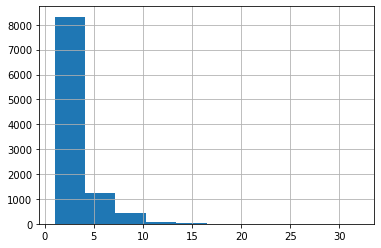

In [77]:
def find_inconsistencies_age_gap(row):
    if len(row.dropna().to_list()) !=0:
        return max(row.dropna().to_list())-min(row.dropna().to_list())
    return pd.NA
gap = had.loc[inconsistencies,age_menopause].apply(find_inconsistencies_age_gap, axis=1)
gap.hist()

<AxesSubplot:ylabel='Frequency'>

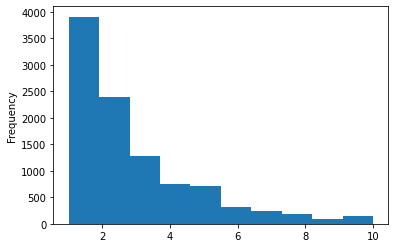

In [91]:
gap[gap<=10].plot.hist(bins=10)

In [92]:
gap.value_counts()

1.0     3905
2.0     2382
3.0     1283
4.0      753
5.0      704
6.0      317
7.0      236
8.0      179
10.0     147
9.0       97
11.0      48
12.0      23
15.0       9
14.0       9
13.0       8
16.0       4
18.0       4
19.0       2
23.0       1
17.0       1
21.0       1
32.0       1
25.0       1
dtype: int64

In [93]:
had.loc[inconsistencies,age_menopause][gap==25]

,3581-0.0,3581-1.0,3581-2.0,3581-3.0
198335,45.0,20.0,45.0,NaN


In [94]:
had.loc[inconsistencies,age_menopause][gap==32]

,3581-0.0,3581-1.0,3581-2.0,3581-3.0
162631,55.0,NaN,51.0,23.0


In [95]:
had.loc[inconsistencies,age_menopause][gap>=15]

,3581-0.0,3581-1.0,3581-2.0,3581-3.0
7346,37.0,NaN,52.0,NaN
8905,45.0,60.0,NaN,NaN
13962,40.0,NaN,49.0,56.0
31935,30.0,53.0,NaN,NaN
36200,60.0,45.0,NaN,NaN
61538,42.0,NaN,58.0,NaN
62030,40.0,NaN,55.0,NaN
88348,42.0,NaN,60.0,NaN
101998,55.0,NaN,40.0,NaN
105132,35.0,NaN,50.0,NaN


In [17]:
def find_age_menopause_more_3(row):
    if len(row.dropna()) >=3 and len(row.dropna().unique()) >=2:
        return True
    return False
m3 = had[age_menopause].apply(find_age_menopause_more_3, axis=1)
had.loc[m3,age_menopause]

,3581-0.0,3581-1.0,3581-2.0,3581-3.0
90,53.0,53.0,54.0,NaN
176,50.0,49.0,50.0,NaN
179,52.0,50.0,52.0,44.0
356,54.0,NaN,50.0,51.0
381,53.0,52.0,45.0,NaN
...,...,...,...,...
220003,52.0,NaN,53.0,52.0
220039,53.0,54.0,52.0,NaN
220046,50.0,50.0,51.0,NaN
220222,52.0,52.0,51.0,NaN


In [23]:
# for those who have 3 or 4 answers, if there're more than 2 unique answers, remove the ourlier
def find_age_menopause_more_3_outlier(row):
    if len(row.dropna()) >=3 and len(row.dropna().unique()) >=2:
        if (max(row.dropna().to_list())-min(row.dropna().to_list()))>2:
            for i in row.dropna().to_list():        
                for j in [num-i for num in row.dropna().to_list()]:
                    if j <= 2 and j >=-2:
                        return True
    return False
m3 = had[age_menopause].apply(find_age_menopause_more_3_outlier, axis=1)
had.loc[m3,age_menopause]           

,3581-0.0,3581-1.0,3581-2.0,3581-3.0
179,52.0,50.0,52.0,44.0
356,54.0,NaN,50.0,51.0
381,53.0,52.0,45.0,NaN
837,48.0,55.0,55.0,53.0
975,46.0,41.0,42.0,NaN
...,...,...,...,...
219571,55.0,57.0,59.0,NaN
219721,58.0,50.0,58.0,NaN
219738,48.0,NaN,55.0,50.0
219744,46.0,NaN,48.0,43.0


In [66]:
pd.set_option('display.max_rows', 500)
had.loc[m3,age_menopause].iloc[:100,:]

,3581-0.0,3581-1.0,3581-2.0,3581-3.0
179,52.0,50.0,52.0,44.0
356,54.0,NaN,50.0,51.0
381,53.0,52.0,45.0,NaN
837,48.0,55.0,55.0,53.0
975,46.0,41.0,42.0,NaN
1667,49.0,52.0,54.0,NaN
1713,50.0,55.0,50.0,NaN
1899,56.0,55.0,58.0,NaN
2037,52.0,49.0,48.0,NaN
2038,49.0,48.0,52.0,NaN


In [59]:
def grouper(iterable):
    prev = None
    group = []
    iterable.sort()
    for item in iterable:
        if prev is None or item - prev <=2:
            group.append(item)
        else:
            yield group
            group = [item]
        prev = item
    if group:
        yield group
def average(lst):
    return sum(lst) / len(lst)
numbers = [34,34,45]
print(dict(enumerate(grouper(numbers), 1)))
tmp = dict(enumerate(grouper(numbers), 1))
tmp_len = [len(i) for i in tmp.values()]
print(average(dict(enumerate(grouper(numbers), 1))[tmp_len.index(max(tmp_len))+1]))

{1: [34, 34], 2: [45]}
34.0


In [101]:
def find_age_menopause(row):
    if len(row.dropna().unique()) ==1:
        return row.dropna().unique()[0]
    elif len(row.dropna().unique()) >1 :
        if (max(row.dropna().to_list())-min(row.dropna().to_list()))<=2:
            return (max(row.dropna().to_list())+min(row.dropna().to_list()))/2
    return pd.NA
had["f3581"] = had[age_menopause].apply(find_age_menopause, axis=1)
had.loc[:,age_menopause+["f3581"]]

,3581-0.0,3581-1.0,3581-2.0,3581-3.0,f3581
1,53.0,NaN,53.0,NaN,53.0
2,52.0,52.0,52.0,NaN,52.0
6,41.0,NaN,NaN,NaN,41.0
9,50.0,NaN,NaN,NaN,50.0
10,NaN,NaN,54.0,NaN,54.0
...,...,...,...,...,...
220379,51.0,NaN,NaN,NaN,51.0
220380,51.0,NaN,NaN,NaN,51.0
220381,48.0,NaN,NaN,NaN,48.0
220383,49.0,NaN,NaN,NaN,49.0


<AxesSubplot:>

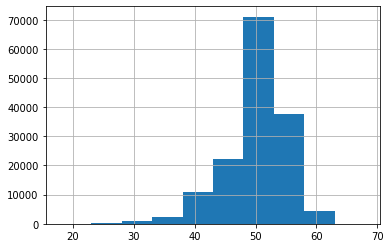

In [68]:
had["f3581"].hist()

In [69]:
had[had["f3581"]<50]["f3581"].value_counts(dropna=False)

48.0    9565
49.0    8166
45.0    7625
47.0    5003
46.0    4226
42.0    3510
40.0    3330
43.0    2394
44.0    2356
41.0    1559
39.0    1159
38.0    1127
35.0     574
36.0     559
37.0     515
32.0     340
34.0     338
49.5     320
48.5     252
30.0     219
33.0     213
29.0     190
47.5     183
31.0     161
45.5     129
28.0     101
42.5      79
46.5      78
27.0      77
44.5      76
26.0      61
43.5      58
40.5      57
41.5      48
25.0      47
39.5      36
23.0      32
20.0      22
24.0      21
21.0      20
22.0      15
38.5      14
36.5      12
18.0      10
19.0       8
35.5       6
37.5       5
34.5       4
29.5       4
31.5       3
32.5       2
25.5       1
33.5       1
Name: f3581, dtype: int64

In [119]:
# merge with filtered and save the variable
filtered = pd.concat([filtered,had[["f3581"]]],axis=1)
filtered

In [120]:
filtered["f3581"].value_counts(dropna=False)

NaN     66862
50.0    22842
52.0    16990
51.0    11374
55.0     9789
        ...  
32.5        2
61.5        1
62.5        1
25.5        1
33.5        1
Name: f3581, Length: 87, dtype: int64

In [107]:
220388-66862

153526

In [110]:
# length of usual menstrual cycle
filtered[len_menopause]

,3710-0.0,3710-1.0,3710-2.0,3710-3.0
0,28.0,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,28.0,NaN,NaN,NaN
...,...,...,...,...
220383,NaN,NaN,NaN,NaN
220384,NaN,NaN,NaN,NaN
220385,NaN,NaN,NaN,NaN
220386,28.0,NaN,NaN,NaN


ACE touchscreen question "How many days is your usual menstrual cycle? (The number of days between each menstrual period)"

The following checks were performed:
```
If answer < 7 then rejected
If answer > 365 then rejected
If answer < 12 then participant asked to confirm
If answer > 60 then participant asked to confirm
```
Coding 100582 defines 3 special values:
```
-6 represents "Irregular cycle"
-1 represents "Do not know"
-3 represents "Prefer not to answer"
```

In [76]:
pd.set_option('display.max_rows', 50)

In [78]:
had = filtered[filtered["f2724"]==1]
def find_exclusion_len_menopause(row):
    if len(row.dropna().to_list()) ==0:
        return True
    if (-1 in row.to_list()) or (-3 in row.to_list()) or (-6 in row.to_list()):
        return True
    return False
exclusion = had[len_menopause].apply(find_exclusion_len_menopause, axis=1)
had.loc[exclusion,len_menopause]

,3710-0.0,3710-1.0,3710-2.0,3710-3.0
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN
...,...,...,...,...
220381,NaN,NaN,NaN,NaN
220382,NaN,NaN,NaN,NaN
220383,NaN,NaN,NaN,NaN
220384,NaN,NaN,NaN,NaN


In [79]:
had = had[~exclusion]
def find_inconsistencies_len_menopause(row):
    if len(row.dropna().to_list()) !=0:
        if len(row.dropna().unique()) !=1:
            return True
    return False
inconsistencies = had[len_menopause].apply(find_inconsistencies_len_menopause, axis=1)
had.loc[inconsistencies,len_menopause]

,3710-0.0,3710-1.0,3710-2.0,3710-3.0
1873,26.0,26.0,28.0,NaN
3243,21.0,24.0,NaN,NaN
7837,28.0,30.0,NaN,NaN
15267,26.0,24.0,NaN,NaN
18985,28.0,27.0,NaN,NaN
...,...,...,...,...
210490,28.0,23.0,NaN,NaN
213701,28.0,25.0,NaN,NaN
215032,28.0,21.0,NaN,NaN
217177,21.0,NaN,23.0,NaN


In [80]:
def find_len_menopause(row):
    if len(row.dropna().unique()) ==1:
        return row.dropna().unique()[0]
    elif len(row.dropna().unique()) >1 :
        if (max(row.dropna().to_list())-min(row.dropna().to_list()))<=2:
            return (max(row.dropna().to_list())+min(row.dropna().to_list()))/2
    return pd.NA
had["f3710"] = had[len_menopause].apply(find_len_menopause, axis=1)
had.loc[:,len_menopause+["f3710"]]

,3710-0.0,3710-1.0,3710-2.0,3710-3.0,f3710
10,28.0,NaN,NaN,NaN,28.0
54,28.0,NaN,NaN,NaN,28.0
97,26.0,NaN,NaN,NaN,26.0
196,25.0,NaN,NaN,NaN,25.0
369,28.0,NaN,NaN,NaN,28.0
...,...,...,...,...,...
220056,30.0,NaN,NaN,NaN,30.0
220296,28.0,NaN,NaN,NaN,28.0
220305,30.0,NaN,NaN,NaN,30.0
220317,28.0,NaN,NaN,NaN,28.0


<AxesSubplot:>

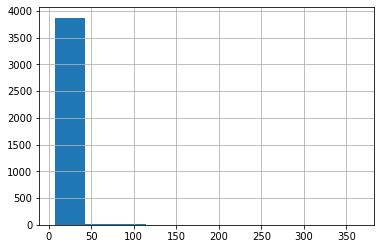

In [81]:
had["f3710"].hist()

<AxesSubplot:ylabel='Frequency'>

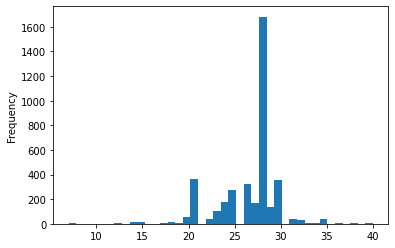

In [82]:
had["f3710"][had["f3710"]<=40].plot.hist(bins=40)

Not sure this variable is relevant 

In [27]:
## menstruating_date
filtered[menstruating_date]

,3720-0.0,3720-1.0,3720-2.0,3720-3.0
0,1.0,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,0.0,NaN,NaN,NaN
...,...,...,...,...
220383,NaN,NaN,NaN,NaN
220384,NaN,NaN,NaN,NaN
220385,NaN,NaN,NaN,NaN
220386,0.0,NaN,NaN,NaN


ACE touchscreen question "Are you menstruating today? (We are asking this as it may affect the urine sample that you have been asked to provide)"

Coding https://biobank.ndph.ox.ac.uk/showcase/field.cgi?id=3720

```
1	Yes
0	No
-1	Do not know
-3	Prefer not to answer
```

In [28]:
had = filtered[filtered["f2724"]==1]
def find_exclusion_menstruating_date(row):
    if len(row.dropna().to_list()) ==0:
        return True
    if (-1 in row.to_list()) or (-3 in row.to_list()):
        return True
    return False
exclusion = had[menstruating_date].apply(find_exclusion_menstruating_date, axis=1)
had.loc[exclusion,menstruating_date]

,3720-0.0,3720-1.0,3720-2.0,3720-3.0
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN
...,...,...,...,...
220381,NaN,NaN,NaN,NaN
220382,NaN,NaN,NaN,NaN
220383,NaN,NaN,NaN,NaN
220384,NaN,NaN,NaN,NaN


Not sure this variable is relevant 

In [30]:
## time_last_menstrual
filtered[time_last_menstrual]

,3700-0.0,3700-1.0,3700-2.0,3700-3.0
0,4.0,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,7.0,NaN,NaN,NaN
...,...,...,...,...
220383,NaN,NaN,NaN,NaN
220384,NaN,NaN,NaN,NaN
220385,NaN,NaN,NaN,NaN
220386,15.0,NaN,NaN,NaN



ACE touchscreen question "How many days since your last menstrual period?"

The following checks were performed:
```
If answer < 0 then rejected
If answer > 365 then rejected
If answer > 60 then participant asked to confirm
If the participant activated the Help button they were shown the message:
```


Coding 100291 defines 2 special values:
```
-1 represents "Do not know"
-3 represents "Prefer not to answer"
```

Not sure this variable is relevant 

In [111]:
## medications
filtered[medications]

,6153-0.0,6153-0.1,6153-0.2,6153-0.3,6153-1.0,6153-1.1,6153-1.2,6153-1.3,6153-2.0,6153-2.1,6153-2.2,6153-2.3,6153-3.0,6153-3.1,6153-3.2,6153-3.3
0,-7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN
2,-7.0,NaN,NaN,NaN,-7.0,NaN,NaN,NaN,-7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,-7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220383,-7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
220384,-7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
220385,1.0,NaN,NaN,NaN,-7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
220386,-7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Coding https://biobank.ndph.ox.ac.uk/showcase/field.cgi?id=6153
```
1	Cholesterol lowering medication
2	Blood pressure medication
3	Insulin
4	Hormone replacement therapy
5	Oral contraceptive pill or minipill
-7	None of the above
-1	Do not know
-3	Prefer not to answer
```

The following checks were performed:
```
If code -7 was selected, then no additional choices were allowed.
If code -1 was selected, then no additional choices were allowed.
If code -3 was selected, then no additional choices were allowed.
```

In [84]:
def find_medications(row):
    if len(row.dropna().to_list())==0 and 4 in row.dropna().to_list():
            return 1
    return 0
filtered["6153"] = filtered[medications].apply(find_medications, axis=1)
filtered.loc[:,medications+["6153"]]

,6153-0.0,6153-0.1,6153-0.2,6153-0.3,6153-1.0,6153-1.1,6153-1.2,6153-1.3,6153-2.0,6153-2.1,6153-2.2,6153-2.3,6153-3.0,6153-3.1,6153-3.2,6153-3.3,6153
0,-7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,0
2,-7.0,NaN,NaN,NaN,-7.0,NaN,NaN,NaN,-7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,-7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220383,-7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
220384,-7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
220385,1.0,NaN,NaN,NaN,-7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
220386,-7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [85]:
filtered["6153"].value_counts(dropna=False)

0    220388
Name: 6153, dtype: int64

In [112]:
## ever_HRT
filtered[ever_HRT]

,2814-0.0,2814-1.0,2814-2.0,2814-3.0
0,0.0,NaN,NaN,NaN
1,1.0,NaN,1.0,NaN
2,0.0,0.0,0.0,NaN
3,1.0,NaN,NaN,NaN
4,0.0,NaN,NaN,NaN
...,...,...,...,...
220383,0.0,NaN,NaN,NaN
220384,0.0,NaN,NaN,NaN
220385,0.0,0.0,NaN,NaN
220386,0.0,NaN,NaN,NaN


Data-Coding 100349 according to https://biobank.ndph.ox.ac.uk/showcase/field.cgi?id=2814
```
1	Yes
0	No
-1	Do not know
-3	Prefer not to answer
```

In [113]:
def find_exclusion_ever_HRT(row):
    if len(row.dropna().to_list()) ==0:
        return True
    if (-1 in row.to_list()) or (-3 in row.to_list()):
        return True
    return False
exclusion = filtered[ever_HRT].apply(find_exclusion_ever_HRT, axis=1)
HRT = filtered[~exclusion]
HRT.shape

(219647, 776)

In [114]:
def find_inconsistencies_ever_HRT(row):
    ans = [i for i in row if (not pd.isna(i)) and (i in [0,1])] 
    return sorted(ans) != ans
inconsistencies = HRT[ever_HRT].apply(find_inconsistencies_ever_HRT, axis=1)
HRT.loc[inconsistencies,ever_HRT]

,2814-0.0,2814-1.0,2814-2.0,2814-3.0
978,1.0,NaN,0.0,NaN
1282,0.0,NaN,1.0,0.0
1554,1.0,NaN,0.0,0.0
1845,1.0,NaN,0.0,NaN
2019,1.0,NaN,0.0,NaN
...,...,...,...,...
218109,1.0,0.0,NaN,NaN
218321,1.0,0.0,NaN,NaN
219119,1.0,NaN,0.0,NaN
219546,1.0,NaN,0.0,0.0


In [115]:
HRT = HRT[~inconsistencies]
HRT.shape

(218951, 776)

In [116]:
def find_ever_HRT(row):
    return row.dropna()[-1]
HRT["2814"] = HRT[ever_HRT].apply(find_ever_HRT, axis=1)
HRT["2814"].value_counts(dropna=False)

0.0    141412
1.0     77539
Name: 2814, dtype: int64

In [121]:
# merge with filtered and save the variable
filtered = pd.concat([filtered,HRT[["2814"]]],axis=1)
filtered

,eid,31-0.0,34-0.0,52-0.0,2247-0.0,2247-1.0,2247-2.0,2247-3.0,2257-0.0,2257-1.0,...,131778-0.0,131779-0.0,131780-0.0,131781-0.0,131784-0.0,131785-0.0,sex,f2724,f3581,2814
0,1000019,0,1960,11,1.0,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,0.0
1,1000046,0,1946,3,0.0,NaN,0.0,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0,1,53.0,1.0
2,1000078,0,1955,6,0.0,0.0,0.0,NaN,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0,1,52.0,0.0
3,1000090,0,1945,7,1.0,NaN,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0,1,NaN,1.0
4,1000137,0,1961,12,0.0,NaN,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220383,6025346,0,1954,10,0.0,NaN,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0,1,49.0,0.0
220384,6025390,0,1942,3,0.0,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0,1,46.0,0.0
220385,6025409,0,1946,11,0.0,0.0,NaN,NaN,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0,1,NaN,0.0
220386,6025411,0,1960,11,0.0,NaN,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,0.0


In [122]:
filtered["2814"].value_counts(dropna=False)

0.0    141412
1.0     77539
NaN      1437
Name: 2814, dtype: int64

In [96]:
## age_started_HRT
filtered[age_started_HRT]

,3536-0.0,3536-1.0,3536-2.0,3536-3.0
0,NaN,NaN,NaN,NaN
1,54.0,NaN,54.0,NaN
2,NaN,NaN,NaN,NaN
3,-1.0,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN
...,...,...,...,...
220383,NaN,NaN,NaN,NaN
220384,NaN,NaN,NaN,NaN
220385,NaN,NaN,NaN,NaN
220386,NaN,NaN,NaN,NaN


Coding 100291 defines 2 special values:
```
-1 represents "Do not know"
-3 represents "Prefer not to answer"
```

In [123]:
HRT = HRT[HRT["2814"] ==1]
def find_exclusion_age_started_HRT(row):
    if len(row.dropna().to_list()) ==0:
        return True
    if (-1 in row.to_list()) or (-3 in row.to_list()):
        return True
    return False
exclusion = HRT[age_started_HRT].apply(find_exclusion_age_started_HRT, axis=1)
HRT = HRT[~exclusion]
HRT.shape

(68632, 777)

In [124]:
def find_inconsistencies_age_started_HRT(row):
    if len(row.dropna().unique()) >1:
        return True
    return False
inconsistencies = HRT[age_started_HRT].apply(find_inconsistencies_age_started_HRT, axis=1)
HRT.loc[inconsistencies,age_started_HRT]

,3536-0.0,3536-1.0,3536-2.0,3536-3.0
50,48.0,45.0,NaN,NaN
64,53.0,52.0,NaN,NaN
90,52.0,52.0,54.0,NaN
179,50.0,46.0,52.0,42.0
279,50.0,NaN,51.0,NaN
...,...,...,...,...
220048,56.0,NaN,59.0,NaN
220089,50.0,NaN,48.0,NaN
220148,53.0,54.0,NaN,NaN
220218,46.0,NaN,58.0,NaN


<AxesSubplot:>

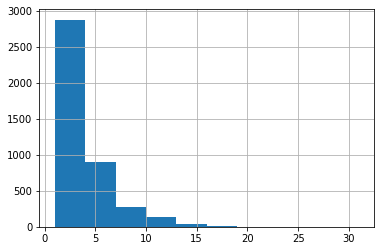

In [121]:
def find_inconsistencies_age_gap(row):
    if len(row.dropna().to_list()) !=0:
        return max(row.dropna().to_list())-min(row.dropna().to_list())
    return pd.NA
gap = HRT.loc[inconsistencies,age_started_HRT].apply(find_inconsistencies_age_gap, axis=1)
gap.hist()

<AxesSubplot:ylabel='Frequency'>

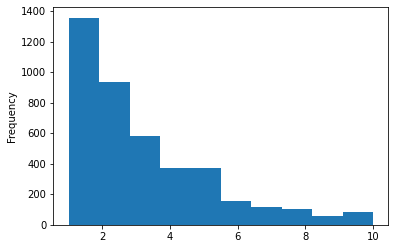

In [122]:
gap[gap<=10].plot.hist(bins=10

<AxesSubplot:>

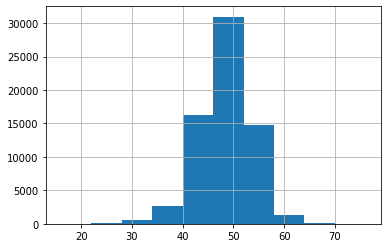

In [125]:
def find_age_started_HRT(row):
    if len(row.dropna().unique()) ==1:
        return row.dropna().unique()[0]
    elif len(row.dropna().unique()) >1:
        if (max(row.dropna().to_list())-min(row.dropna().to_list()))<=2:
            return (max(row.dropna().to_list())+min(row.dropna().to_list()))/2
    return pd.NA
HRT["3536"] = HRT[age_started_HRT].apply(find_age_started_HRT, axis=1)
HRT["3536"].hist()

In [128]:
# merge with filtered and save the variable
filtered = pd.concat([filtered,HRT[["3536"]]],axis=1)
filtered

,eid,31-0.0,34-0.0,52-0.0,2247-0.0,2247-1.0,2247-2.0,2247-3.0,2257-0.0,2257-1.0,...,131779-0.0,131780-0.0,131781-0.0,131784-0.0,131785-0.0,sex,f2724,f3581,2814,3536
0,1000019,0,1960,11,1.0,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,0,0,NaN,0.0,NaN
1,1000046,0,1946,3,0.0,NaN,0.0,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,0,1,53.0,1.0,54.0
2,1000078,0,1955,6,0.0,0.0,0.0,NaN,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,0,1,52.0,0.0,NaN
3,1000090,0,1945,7,1.0,NaN,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,0,1,NaN,1.0,NaN
4,1000137,0,1961,12,0.0,NaN,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,0,0,NaN,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220383,6025346,0,1954,10,0.0,NaN,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,0,1,49.0,0.0,NaN
220384,6025390,0,1942,3,0.0,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,0,1,46.0,0.0,NaN
220385,6025409,0,1946,11,0.0,0.0,NaN,NaN,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,0,1,NaN,0.0,NaN
220386,6025411,0,1960,11,0.0,NaN,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,0,0,NaN,0.0,NaN


In [129]:
filtered["3536"].value_counts(dropna=False)

NaN     151756
50.0     10785
45.0      6266
48.0      5862
52.0      4867
         ...  
72.0         1
32.5         1
23.5         1
73.0         1
18.0         1
Name: 3536, Length: 91, dtype: int64

In [130]:
## age_last_HRT
filtered[age_last_HRT]

,3546-0.0,3546-1.0,3546-2.0,3546-3.0
0,NaN,NaN,NaN,NaN
1,60.0,NaN,56.0,NaN
2,NaN,NaN,NaN,NaN
3,51.0,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN
...,...,...,...,...
220383,NaN,NaN,NaN,NaN
220384,NaN,NaN,NaN,NaN
220385,NaN,NaN,NaN,NaN
220386,NaN,NaN,NaN,NaN


Coding 100598 defines 3 special values:
```
-1 represents "Do not know"
-11 represents "Still taking HRT"
-3 represents "Prefer not to answer"
```

In [131]:
HRT = HRT[HRT["2814"] ==1]
def find_exclusion_age_last_HRT(row):
    if len(row.dropna().to_list()) ==0:
        return True
    if (-1 in row.to_list()) or (-3 in row.to_list()) or (-11 in row.to_list()):
        return True
    return False
exclusion = HRT[age_last_HRT].apply(find_exclusion_age_last_HRT, axis=1)
HRT = HRT[~exclusion]
HRT.shape

(57139, 778)

In [132]:
def find_inconsistencies_age_last_HRT(row):
    if len(row.dropna().unique()) >1:
        return True
    return False
inconsistencies = HRT[age_last_HRT].apply(find_inconsistencies_age_last_HRT, axis=1)
HRT.loc[inconsistencies,age_last_HRT]

,3546-0.0,3546-1.0,3546-2.0,3546-3.0
1,60.0,NaN,56.0,NaN
50,58.0,55.0,NaN,NaN
64,55.0,54.0,NaN,NaN
90,54.0,53.0,57.0,NaN
118,45.0,46.0,NaN,NaN
...,...,...,...,...
220022,44.0,NaN,41.0,NaN
220148,63.0,60.0,NaN,NaN
220218,48.0,NaN,58.0,NaN
220236,58.0,NaN,52.0,NaN


<AxesSubplot:>

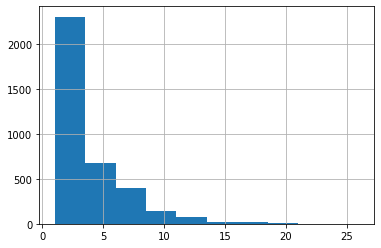

In [135]:
def find_inconsistencies_age_gap(row):
    if len(row.dropna().to_list()) !=0:
        return max(row.dropna().to_list())-min(row.dropna().to_list())
    return pd.NA
gap = HRT.loc[inconsistencies,age_last_HRT].apply(find_inconsistencies_age_gap, axis=1)
gap.hist()

<AxesSubplot:ylabel='Frequency'>

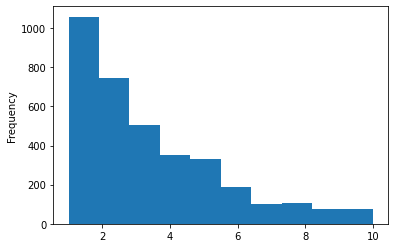

In [136]:
gap[gap<=10].plot.hist(bins=10)

<AxesSubplot:>

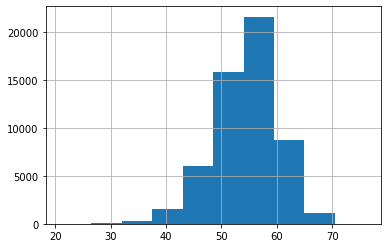

In [133]:
def find_age_last_HRT(row):
    if len(row.dropna().unique()) ==1:
        return row.dropna().unique()[0]
    elif len(row.dropna().unique()) >1:
        if (max(row.dropna().to_list())-min(row.dropna().to_list()))<=2:
            return (max(row.dropna().to_list())+min(row.dropna().to_list()))/2
    return pd.NA
HRT["3546"] = HRT[age_last_HRT].apply(find_age_last_HRT, axis=1)
HRT["3546"].hist()

In [134]:
# merge with filtered and save the variable
filtered = pd.concat([filtered,HRT[["3546"]]],axis=1)
filtered

,eid,31-0.0,34-0.0,52-0.0,2247-0.0,2247-1.0,2247-2.0,2247-3.0,2257-0.0,2257-1.0,...,131780-0.0,131781-0.0,131784-0.0,131785-0.0,sex,f2724,f3581,2814,3536,3546
0,1000019,0,1960,11,1.0,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,0,0,NaN,0.0,NaN,NaN
1,1000046,0,1946,3,0.0,NaN,0.0,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,0,1,53.0,1.0,54.0,<NA>
2,1000078,0,1955,6,0.0,0.0,0.0,NaN,0.0,0.0,...,NaN,NaN,NaN,NaN,0,1,52.0,0.0,NaN,NaN
3,1000090,0,1945,7,1.0,NaN,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,0,1,NaN,1.0,NaN,NaN
4,1000137,0,1961,12,0.0,NaN,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,0,0,NaN,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220383,6025346,0,1954,10,0.0,NaN,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,0,1,49.0,0.0,NaN,NaN
220384,6025390,0,1942,3,0.0,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,0,1,46.0,0.0,NaN,NaN
220385,6025409,0,1946,11,0.0,0.0,NaN,NaN,0.0,0.0,...,NaN,NaN,NaN,NaN,0,1,NaN,0.0,NaN,NaN
220386,6025411,0,1960,11,0.0,NaN,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,0,0,NaN,0.0,NaN,NaN


In [135]:
filtered["3546"].value_counts(dropna=False)

NaN     163249
55.0      5553
60.0      4307
50.0      4281
52.0      3872
         ...  
65.5         1
34.5         1
33.5         1
69.5         1
74.0         1
Name: 3546, Length: 85, dtype: int64

In [136]:
filtered.to_csv("~/UKBiobank/results/REGENIE_results/results_exome_data/051722_interaction_sex/sex_related/052522.500k.filtered.menopause.phe.csv",index=False)

In [8]:
# Compare the age of menopause, start HRT and stop HRT
import pandas as pd
import numpy as np
filtered = pd.read_csv("~/UKBiobank/results/REGENIE_results/results_exome_data/051722_interaction_sex/sex_related/060822.500k.filtered.menopause.phe.csv",header=0)
filtered

/tmp/2533976.1.csg.q/ipykernel_19428/2315609744.py:4: DtypeWarning: Columns (290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,466,467,468,469,470,471,472,473,474,475,476,477,478,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626

,IID,31-0.0,34-0.0,52-0.0,2247-0.0,2247-1.0,2247-2.0,2247-3.0,2257-0.0,2257-1.0,...,131784-0.0,131785-0.0,sex,f2724,f3581,f2814,f3536,f3546,f2714,years_of_periods
0,1000019,0,1960,11,1.0,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,0,0,NaN,0.0,NaN,NaN,12.0,NaN
1,1000046,0,1946,3,0.0,NaN,0.0,NaN,0.0,NaN,...,NaN,NaN,0,1,53.0,1.0,54.0,NaN,13.0,40.0
2,1000078,0,1955,6,0.0,0.0,0.0,NaN,0.0,0.0,...,NaN,NaN,0,1,52.0,0.0,NaN,NaN,10.5,41.5
3,1000090,0,1945,7,1.0,NaN,NaN,NaN,0.0,NaN,...,NaN,NaN,0,1,NaN,1.0,NaN,NaN,NaN,NaN
4,1000137,0,1961,12,0.0,NaN,NaN,NaN,0.0,NaN,...,NaN,NaN,0,0,NaN,0.0,NaN,NaN,13.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220383,6025346,0,1954,10,0.0,NaN,NaN,NaN,0.0,NaN,...,NaN,NaN,0,1,49.0,0.0,NaN,NaN,13.0,36.0
220384,6025390,0,1942,3,0.0,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,0,1,46.0,0.0,NaN,NaN,13.0,33.0
220385,6025409,0,1946,11,0.0,0.0,NaN,NaN,0.0,0.0,...,NaN,NaN,0,1,NaN,0.0,NaN,NaN,13.0,NaN
220386,6025411,0,1960,11,0.0,NaN,NaN,NaN,0.0,NaN,...,NaN,NaN,0,0,NaN,0.0,NaN,NaN,14.0,NaN


In [5]:
filtered["f3581"].value_counts(dropna=False)

NaN     70690
50.0    22842
52.0    16990
51.0    11374
55.0     9789
        ...  
67.0        2
61.5        1
62.5        1
25.5        1
33.5        1
Name: f3581, Length: 86, dtype: int64

In [4]:
filtered["f3536"].value_counts(dropna=False)

NaN     153725
50.0     10785
45.0      6266
48.0      5862
52.0      4867
         ...  
23.5         1
71.0         1
17.0         1
60.5         1
18.0         1
Name: f3536, Length: 90, dtype: int64

In [33]:
def find_HRT_prior_meno(row):
    if len(row.dropna().to_list()) ==2  and pd.isna(row["f3546"])==True:
        if row["f3581"] > row["f3536"]:
            return "larger"
        elif row["f3581"] == row["f3536"]:
            return "equal"
        elif row["f3581"] < row["f3536"]:
            return "smaller"
        else:
            return "error"
HRT_prior_meno = filtered[["f3581","f3536","f3546"]].apply(find_HRT_prior_meno, axis=1)
HRT_prior_meno.value_counts(dropna=False)

None       210881
smaller      4008
equal        3011
larger       2488
dtype: int64

24006 individuals had HRT prior than having menopause.It is possible having menopause is the result of stopping HRT. So compare the time between having menopause and stopping HRT

In [34]:
def find_meno_after_HRT(row):
    if len(row.dropna().to_list()) ==2  and pd.isna(row["f3536"])==True:
        if row["f3581"] > row["f3546"]:
            return "larger"
        elif row["f3581"] == row["f3546"]:
            return "equal"
        elif row["f3581"] < row["f3546"]:
            return "smaller"
        else:
            return "error"
meno_after_HRT = filtered[["f3581","f3536","f3546"]].apply(find_meno_after_HRT, axis=1)
meno_after_HRT.value_counts(dropna=False)

None       220135
smaller       179
equal          41
larger         33
dtype: int64

In [13]:
def find_all_na(row):
    if len(row.dropna().to_list()) ==0:
        return True
    return False
all_na = filtered[["f3581","f3536","f3546"]].apply(find_all_na, axis=1)
all_na.value_counts(dropna=False)

False    156880
True      63508
dtype: int64

In [14]:
def find_two_na(row):
    if len(row.dropna().to_list()) ==1:
        return True
    return False
two_na = filtered[["f3581","f3536","f3546"]].apply(find_two_na, axis=1)
two_na.value_counts(dropna=False)

False    128176
True      92212
dtype: int64

In [15]:
def find_HRTSTOP_na(row):
    if len(row[["f3581","f3536"]].dropna().to_list()) ==2 and pd.isna(row["f3546"])==True:
        return True
    return False
HRTSTOP_na = filtered[["f3581","f3536","f3546"]].apply(find_HRTSTOP_na, axis=1)
HRTSTOP_na.value_counts(dropna=False)

False    210881
True       9507
dtype: int64

In [23]:
def find_HRTSTART_na(row):
    if len(row[["f3581","f3546"]].dropna().to_list()) ==2 and pd.isna(row["f3536"])==True:
        return True
    return False
HRTSTART_na = filtered[["f3581","f3536","f3546"]].apply(find_HRTSTART_na, axis=1)
HRTSTART_na.value_counts(dropna=False)

False    220135
True        253
dtype: int64

In [25]:
def find_meno_na(row):
    if len(row[["f3536","f3546"]].dropna().to_list()) ==2 and pd.isna(row["f3581"])==True:
        return True
    return False
meno_na = filtered[["f3581","f3536","f3546"]].apply(find_meno_na, axis=1)
meno_na.value_counts(dropna=False)

False    215643
True       4745
dtype: int64

In [35]:
def find_HRT(row):
    if len(row.dropna().to_list()) ==2  and pd.isna(row["f3581"])==True:
        if row["f3546"] > row["f3536"]:
            return "larger"
        elif row["f3546"] == row["f3536"]:
            return "equal"
        elif row["f3546"] < row["f3536"]:
            return "smaller"
        else:
            return "error"
    return pd.NA
HRT = filtered[["f3581","f3536","f3546"]].apply(find_HRT, axis=1)
HRT.value_counts(dropna=False)

None      215643
larger      4093
equal        652
dtype: int64

In [26]:
def find_all_three(row):
    if len(row.dropna().to_list()) ==3:
        return True
    return False
all_three = filtered[["f3581","f3536","f3546"]].apply(find_all_three, axis=1)
all_three.value_counts(dropna=False)

False    170225
True      50163
dtype: int64

In [12]:
# three way comparison
def find_three_way_1(row):
    if len(row.dropna().to_list()) !=3:
        return pd.NA
    if row["f3581"] >= row["f3546"] and row["f3546"] >= row["f3536"]:
        return True
    return False
three_way_1 = filtered[["f3581","f3536","f3546"]].apply(find_three_way_1, axis=1)
three_way_1.value_counts(dropna=False)

<NA>     170225
False     35967
True      14196
dtype: int64

In [13]:
def find_three_way_2(row):
    if len(row.dropna().to_list()) !=3:
        return pd.NA
    if row["f3546"] >= row["f3581"] and row["f3581"] >= row["f3536"]:
        return True
    return False
three_way_2 = filtered[["f3581","f3536","f3546"]].apply(find_three_way_2, axis=1)
three_way_2.value_counts(dropna=False)

<NA>     170225
True      27293
False     22870
dtype: int64

In [14]:
def find_three_way_3(row):
    if len(row.dropna().to_list()) !=3:
        return pd.NA
    if row["f3546"] >= row["f3536"] and row["f3536"] >= row["f3581"]:
        return True
    return False
three_way_3 = filtered[["f3581","f3536","f3546"]].apply(find_three_way_3, axis=1)
three_way_3.value_counts(dropna=False)

<NA>     170225
True      28645
False     21518
dtype: int64

In [11]:
inconsistancies = pd.read_csv("~/UKBiobank/results/REGENIE_results/results_exome_data/051722_interaction_sex/sex_related/061322.age_meno_incon_smaller2.sample.txt",header=None)[0].to_list()
len(inconsistancies)

6287

In [21]:
# The number of inconsistancies in three way samples
def find_three_way_1(row):
    if len(row.dropna().to_list()) !=3:
        return False
    if row["f3581"] >= row["f3546"] and row["f3546"] >= row["f3536"]:
        return True
    return False
three_way_1 = filtered[["f3581","f3536","f3546"]].apply(find_three_way_1, axis=1)
filtered.loc[three_way_1,"IID"].isin(inconsistancies).sum()

214

In [26]:
tmp = filtered.loc[three_way_1,"IID"]
idlist = tmp[tmp.isin(inconsistancies)].to_list()
filtered.loc[filtered["IID"].isin(idlist),["f3581","f3536","f3546"]]

,f3581,f3536,f3546
64,55.0,52.5,54.5
89,52.5,51.0,51.0
1437,56.5,49.5,55.5
2805,51.5,50.0,51.5
3281,42.5,42.0,42.5
...,...,...,...
214726,42.0,42.0,42.0
214891,54.0,49.0,54.0
214929,55.5,55.0,55.5
215486,57.0,53.5,56.0


In [23]:
def find_three_way_2(row):
    if len(row.dropna().to_list()) !=3:
        return False
    if row["f3546"] >= row["f3581"] and row["f3581"] >= row["f3536"]:
        return True
    return False
three_way_2 = filtered[["f3581","f3536","f3546"]].apply(find_three_way_2, axis=1)
filtered.loc[three_way_2,"IID"].isin(inconsistancies).sum()

457

In [24]:
def find_three_way_3(row):
    if len(row.dropna().to_list()) !=3:
        return False
    if row["f3546"] >= row["f3536"] and row["f3536"] >= row["f3581"]:
        return True
    return False
three_way_3 = filtered[["f3581","f3536","f3546"]].apply(find_three_way_3, axis=1)
filtered.loc[three_way_3,"IID"].isin(inconsistancies).sum()

464

In [28]:
def find_three_way_3_pure(row):
    if len(row.dropna().to_list()) !=3:
        return pd.NA
    if row["f3546"] >= row["f3536"] and row["f3536"] > row["f3581"]:
        return True
    return False
three_way_3 = filtered[["f3581","f3536","f3546"]].apply(find_three_way_3_pure, axis=1)
three_way_3.value_counts(dropna=False)

<NA>     170225
False     34562
True      15601
dtype: int64

In [29]:
def find_three_way_3_pure(row):
    if len(row.dropna().to_list()) !=3:
        return False
    if row["f3546"] >= row["f3536"] and row["f3536"] > row["f3581"]:
        return True
    return False
three_way_3 = filtered[["f3581","f3536","f3546"]].apply(find_three_way_3_pure, axis=1)
filtered.loc[three_way_3,"IID"].isin(inconsistancies).sum()

319

In [30]:
tmp = filtered.loc[three_way_3,"IID"]
idlist = tmp[tmp.isin(inconsistancies)].to_list()
filtered.loc[filtered["IID"].isin(idlist),["f3581","f3536","f3546"]]

,f3581,f3536,f3546
385,54.0,60.0,62.0
639,54.5,55.5,57.0
953,51.5,53.0,55.0
1495,46.5,49.0,57.5
3598,50.5,51.0,51.5
...,...,...,...
216930,52.5,55.5,56.5
217034,50.5,51.0,51.5
217616,39.5,40.5,48.0
217785,51.5,58.0,58.0


In [35]:
filtered.loc[(three_way_3)&(~filtered["IID"].isin(idlist)),["IID"]]

,IID
14,1000340
40,1000988
62,1001368
87,1001953
98,1002249
...,...
220298,6023573
220339,6024507
220348,6024723
220358,6024886


In [43]:
filtered.loc[(three_way_3)&(~filtered["IID"].isin(idlist)),["IID"]].to_csv("~/UKBiobank/results/REGENIE_results/results_exome_data/051722_interaction_sex/sex_related/061322.meno_prior_HRT.sample.txt",header=False,index=False)

In [89]:
def find_three_way_2and3_pure(row):
    if len(row.dropna().to_list()) !=3:
        return pd.NA
    if row["f3546"] >= row["f3536"] and row["f3536"] > row["f3581"]:
        return True
    if row["f3546"] >= row["f3581"] and row["f3581"] >= row["f3536"]:
        return True
    return False
three_way_23 = filtered[["f3581","f3536","f3546"]].apply(find_three_way_2and3_pure, axis=1)
three_way_23.value_counts(dropna=False)

<NA>     170225
True      42894
False      7269
dtype: int64

In [91]:
def find_three_way_2and3_pure(row):
    if len(row.dropna().to_list()) !=3:
        return False
    if row["f3546"] >= row["f3536"] and row["f3536"] > row["f3581"]:
        return True
    if row["f3546"] >= row["f3581"] and row["f3581"] >= row["f3536"]:
        return True
    return False
three_way_23 = filtered[["f3581","f3536","f3546"]].apply(find_three_way_2and3_pure, axis=1)
filtered.loc[three_way_23,"IID"].isin(inconsistancies).sum()

776

In [92]:
filtered.loc[(three_way_23)&(~filtered["IID"].isin(idlist)),["IID"]].to_csv("~/UKBiobank/results/REGENIE_results/results_exome_data/051722_interaction_sex/sex_related/061322.meno_priorandbetw_HRT.sample.txt",header=False,index=False)

In [3]:
# Add a variable: Age when periods started (menarche) f2714
import pandas as pd
import numpy as np
with open("/mnt/mfs/statgen/UKBiobank/data/ukbb_databases/ukb47922_updatedAug2021/ukb47922.csv") as fp:
    line = fp.readline() # header
    header = line.split(",")
    
    indiv = ["eid"]
    icd10_colnames = [col.strip('"') for col in header if "41270-" in col]
    icd10_ages = [col.strip('"') for col in header if "41280-" in col]
    icd9_colnames = [col.strip('"') for col in header if "41271-" in col]
    icd9_ages = [col.strip('"') for col in header if "41281-" in col]
    f20002_colnames = [col.strip('"') for col in header if "20002-" in col]
    reported_sex = ["31-0.0"]
    genetic_sex = ["22001-0.0"]
    ethnicity = [col.strip('"') for col in header if "21000-" in col]
    hearing_imp_f3393 = [col.strip('"') for col in header if "3393-" in col]
    hearing_imp_f2247 = ['2247-0.0', '2247-1.0', '2247-2.0', '2247-3.0']
    hearing_imp_f2257 = ['2257-0.0', '2257-1.0', '2257-2.0', '2257-3.0']
    tin_cols = [col.strip('"') for col in header if "4803-" in col]
    ages_f21003_col = [col.strip('"') for col in header if "21003-" in col]
    ages_f131258_col = [col.strip('"') for col in header if '131258-' in col]
    year_of_birth = ["34-0.0"]
    month_of_birth = ["52-0.0"]
    
    had_menopause = [col.strip('"') for col in header if "2724-" in col]
    age_menopause = [col.strip('"') for col in header if "3581-" in col]
    len_menopause = [col.strip('"') for col in header if "3710-" in col]
    menstruating_date = [col.strip('"') for col in header if "3720-" in col]
    time_last_menstrual = [col.strip('"') for col in header if "3700-" in col]
    medications = [col.strip('"') for col in header if "6153-" in col]
    ever_HRT = [col.strip('"') for col in header if "2814-" in col]
    age_last_HRT = [col.strip('"') for col in header if "3546-" in col]
    age_started_HRT = [col.strip('"') for col in header if "3536-" in col]
    age_started_periods= [col.strip('"') for col in header if "2714-" in col]
    balding_pattern = ['2395-0.0', '2395-1.0', '2395-2.0', '2395-3.0']
    L63_date = [col.strip('"') for col in header if "131778-" in col]
    L64_date = [col.strip('"') for col in header if "131780-" in col]
    L66_date = [col.strip('"') for col in header if "131784-" in col]
    L63 = [col.strip('"') for col in header if "131779-" in col]
    L64 = [col.strip('"') for col in header if "131781-" in col]
    L66 = [col.strip('"') for col in header if "131785-" in col]
    
combined_cols = indiv + icd10_colnames + icd10_ages + icd9_colnames + icd9_ages \
        + f20002_colnames + ethnicity + reported_sex + genetic_sex + hearing_imp_f3393 \
        + hearing_imp_f2247 + hearing_imp_f2257 + tin_cols + ages_f21003_col + ages_f131258_col \
        + year_of_birth + month_of_birth + had_menopause + age_menopause + len_menopause \
        + menstruating_date + time_last_menstrual + medications + ever_HRT + age_last_HRT \
        + age_started_HRT + age_started_periods + balding_pattern + L63_date + L64_date + L66_date + L63 + L64 + L66
df = pd.read_csv("/mnt/mfs/statgen/UKBiobank/data/ukbb_databases/ukb47922_updatedAug2021/ukb47922.csv", quotechar = '"', dtype="string", usecols=combined_cols)
# sex inconsistency
def inconsistent_sexes(row):
    return pd.isna(row[genetic_sex[0]]) or row[reported_sex[0]] != row[genetic_sex[0]]
# exclusion based on inconsistent sex
ex_sex = df[reported_sex + genetic_sex].apply(inconsistent_sexes, axis=1)
filtered = df[~ex_sex]
filtered["sex"]  = filtered[reported_sex]
#filtered["sex"].value_counts(dropna=False)
filtered = filtered[filtered["sex"]=="0"]
filtered

/tmp/2529565.1.high_mem.q/ipykernel_3835/1544018035.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered["sex"]  = filtered[reported_sex]


,eid,31-0.0,34-0.0,52-0.0,2247-0.0,2247-1.0,2247-2.0,2247-3.0,2257-0.0,2257-1.0,...,41281-0.45,41281-0.46,131258-0.0,131778-0.0,131779-0.0,131780-0.0,131781-0.0,131784-0.0,131785-0.0,sex
0,1000019,0,1960,11,1,<NA>,<NA>,<NA>,1,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,0
3,1000046,0,1946,3,0,<NA>,0,<NA>,0,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,0
4,1000054,0,1942,1,0,<NA>,<NA>,<NA>,1,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,0
6,1000078,0,1955,6,0,0,0,<NA>,0,0,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,0
8,1000090,0,1945,7,1,<NA>,<NA>,<NA>,0,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502451,6025354,0,1957,2,1,<NA>,<NA>,<NA>,1,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,0
502455,6025390,0,1942,3,0,<NA>,<NA>,<NA>,1,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,0
502456,6025409,0,1946,11,0,0,<NA>,<NA>,0,0,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,0
502457,6025411,0,1960,11,0,<NA>,<NA>,<NA>,0,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,0


In [4]:
filtered[age_started_periods]

,2714-0.0,2714-1.0,2714-2.0,2714-3.0
0,12,<NA>,<NA>,<NA>
3,13,<NA>,13,<NA>
4,13,<NA>,<NA>,<NA>
6,11,10,10,<NA>
8,-1,<NA>,<NA>,<NA>
...,...,...,...,...
502451,13,<NA>,<NA>,<NA>
502455,13,<NA>,<NA>,<NA>
502456,13,13,<NA>,<NA>
502457,14,<NA>,<NA>,<NA>


ACE touchscreen question "How old were you when your periods started?"

The following checks were performed:
```
If answer < 5 then rejected
If answer > Participants age then rejected
If answer > 25 then rejected
If answer < 6 then participant asked to confirm
If answer > 20 then participant asked to confirm
```


Coding 100291 defines 2 special values:
```
-1 represents "Do not know"
-3 represents "Prefer not to answer"
```

In [47]:
filtered[age_started_periods] = filtered[age_started_periods].astype("float")
def find_exclusion_age_started_periods(row):
    if len(row.dropna().to_list()) ==0:
        return True
    if (-1 in row.dropna().to_list()) or (-3 in row.dropna().to_list()):
        return True
    return False
exclusion = filtered[age_started_periods].apply(find_exclusion_age_started_periods, axis=1)
filtered.loc[exclusion,age_started_periods]

,2714-0.0,2714-1.0,2714-2.0,2714-3.0
8,-1.0,NaN,NaN,NaN
51,-1.0,NaN,NaN,NaN
55,14.0,NaN,15.0,-1.0
91,-1.0,NaN,NaN,NaN
108,-1.0,NaN,NaN,NaN
...,...,...,...,...
502285,-1.0,NaN,NaN,NaN
502294,-1.0,NaN,NaN,NaN
502342,-1.0,NaN,NaN,NaN
502368,-1.0,NaN,NaN,NaN


In [48]:
filtered = filtered[~exclusion]
filtered.shape

(255690, 774)

In [49]:
def find_inconsistencies_age_started_periods(row):
    if len(row.dropna().unique()) >1:
        return True
    return False
inconsistencies = filtered[age_started_periods].apply(find_inconsistencies_age_started_periods, axis=1)
filtered.loc[inconsistencies,age_started_periods]

,2714-0.0,2714-1.0,2714-2.0,2714-3.0
6,11.0,10.0,10.0,NaN
59,11.0,16.0,NaN,NaN
94,13.0,NaN,15.0,NaN
120,11.0,NaN,12.0,NaN
196,14.0,13.0,NaN,NaN
...,...,...,...,...
502185,14.0,NaN,15.0,NaN
502271,15.0,NaN,13.0,NaN
502290,14.0,NaN,13.0,NaN
502315,12.0,NaN,13.0,NaN


In [50]:
def find_age_started_periods(row):
    if len(row.dropna().unique()) ==1:
        return row.dropna().unique()[0]
    elif len(row.dropna().unique()) >1 :
        if (max(row.dropna().to_list())-min(row.dropna().to_list()))<=2:
            return (max(row.dropna().to_list())+min(row.dropna().to_list()))/2
    return pd.NA
filtered["2714"] = filtered[age_started_periods].apply(find_age_started_periods, axis=1)
filtered["2714"].value_counts(dropna=False)

/tmp/2529565.1.high_mem.q/ipykernel_3835/3618233058.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered["2714"] = filtered[age_started_periods].apply(find_age_started_periods, axis=1)


13.0    60056
14.0    48741
12.0    46717
11.0    38094
15.0    27099
16.0    10806
10.0     9638
17.0     2464
13.5     2236
12.5     2018
9.0      1695
11.5     1552
14.5     1327
18.0      834
15.5      646
10.5      499
<NA>      483
19.0      194
8.0       132
16.5      132
9.5        76
20.0       69
17.5       44
21.0       41
7.0        26
6.0        17
5.0        11
22.0       10
8.5         9
18.5        7
23.0        6
25.0        4
20.5        3
24.0        2
21.5        1
19.5        1
Name: 2714, dtype: int64

<AxesSubplot:>

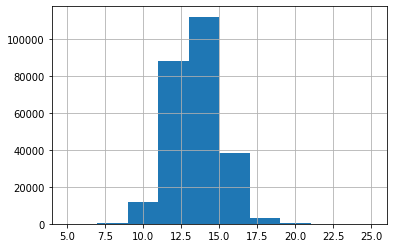

In [51]:
filtered["2714"].hist()

In [53]:
filtered["eid"] = filtered["eid"].astype("Int64")
tmp = filtered[["eid","2714"]].copy()
filtered = pd.read_csv("~/UKBiobank/results/REGENIE_results/results_exome_data/051722_interaction_sex/sex_related/052522.500k.filtered.menopause.phe.csv",header=0)
filtered

/tmp/2529565.1.high_mem.q/ipykernel_3835/1328077775.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered["eid"] = filtered["eid"].astype("Int64")
/tmp/2529565.1.high_mem.q/ipykernel_3835/1328077775.py:3: DtypeWarning: Columns (290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,4

,eid,31-0.0,34-0.0,52-0.0,2247-0.0,2247-1.0,2247-2.0,2247-3.0,2257-0.0,2257-1.0,...,131780-0.0,131781-0.0,131784-0.0,131785-0.0,sex,f2724,f3581,2814,3536,3546
0,1000019,0,1960,11,1.0,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,0,0,NaN,0.0,NaN,NaN
1,1000046,0,1946,3,0.0,NaN,0.0,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,0,1,53.0,1.0,54.0,NaN
2,1000078,0,1955,6,0.0,0.0,0.0,NaN,0.0,0.0,...,NaN,NaN,NaN,NaN,0,1,52.0,0.0,NaN,NaN
3,1000090,0,1945,7,1.0,NaN,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,0,1,NaN,1.0,NaN,NaN
4,1000137,0,1961,12,0.0,NaN,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,0,0,NaN,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220383,6025346,0,1954,10,0.0,NaN,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,0,1,49.0,0.0,NaN,NaN
220384,6025390,0,1942,3,0.0,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,0,1,46.0,0.0,NaN,NaN
220385,6025409,0,1946,11,0.0,0.0,NaN,NaN,0.0,0.0,...,NaN,NaN,NaN,NaN,0,1,NaN,0.0,NaN,NaN
220386,6025411,0,1960,11,0.0,NaN,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,0,0,NaN,0.0,NaN,NaN


In [54]:
filtered["eid"] = filtered["eid"].astype("Int64")
filtered = filtered.merge(tmp,how="left",left_on="eid",right_on="eid")
filtered

,eid,31-0.0,34-0.0,52-0.0,2247-0.0,2247-1.0,2247-2.0,2247-3.0,2257-0.0,2257-1.0,...,131781-0.0,131784-0.0,131785-0.0,sex,f2724,f3581,2814,3536,3546,2714
0,1000019,0,1960,11,1.0,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,0,0,NaN,0.0,NaN,NaN,12.0
1,1000046,0,1946,3,0.0,NaN,0.0,NaN,0.0,NaN,...,NaN,NaN,NaN,0,1,53.0,1.0,54.0,NaN,13.0
2,1000078,0,1955,6,0.0,0.0,0.0,NaN,0.0,0.0,...,NaN,NaN,NaN,0,1,52.0,0.0,NaN,NaN,10.5
3,1000090,0,1945,7,1.0,NaN,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,0,1,NaN,1.0,NaN,NaN,NaN
4,1000137,0,1961,12,0.0,NaN,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,0,0,NaN,0.0,NaN,NaN,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220383,6025346,0,1954,10,0.0,NaN,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,0,1,49.0,0.0,NaN,NaN,13.0
220384,6025390,0,1942,3,0.0,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,0,1,46.0,0.0,NaN,NaN,13.0
220385,6025409,0,1946,11,0.0,0.0,NaN,NaN,0.0,0.0,...,NaN,NaN,NaN,0,1,NaN,0.0,NaN,NaN,13.0
220386,6025411,0,1960,11,0.0,NaN,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,0,0,NaN,0.0,NaN,NaN,14.0


In [55]:
filtered["2714"].value_counts(dropna=False)

13.0    50999
14.0    41385
12.0    39060
11.0    31016
15.0    22863
16.0     9045
10.0     7684
NaN      6895
17.0     2047
13.5     1746
12.5     1579
9.0      1296
11.5     1198
14.5     1025
18.0      689
15.5      501
10.5      377
<NA>      363
19.0      158
8.0       104
16.5      101
9.5        55
20.0       54
17.5       36
21.0       34
7.0        20
6.0        15
5.0         9
22.0        8
8.5         8
23.0        5
18.5        5
20.5        3
24.0        2
21.5        1
25.0        1
19.5        1
Name: 2714, dtype: int64

<AxesSubplot:>

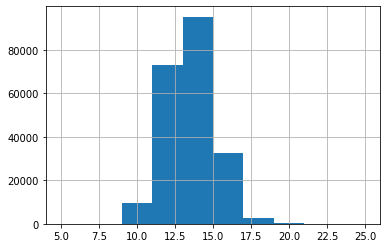

In [56]:
filtered["2714"].hist()

In [57]:
filtered = filtered.rename(columns={"eid":"IID","2814":"f2814","3536":"f3536","3546":"f3546","2714":"f2714"})
filtered

,IID,31-0.0,34-0.0,52-0.0,2247-0.0,2247-1.0,2247-2.0,2247-3.0,2257-0.0,2257-1.0,...,131781-0.0,131784-0.0,131785-0.0,sex,f2724,f3581,f2814,f3536,f3546,f2714
0,1000019,0,1960,11,1.0,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,0,0,NaN,0.0,NaN,NaN,12.0
1,1000046,0,1946,3,0.0,NaN,0.0,NaN,0.0,NaN,...,NaN,NaN,NaN,0,1,53.0,1.0,54.0,NaN,13.0
2,1000078,0,1955,6,0.0,0.0,0.0,NaN,0.0,0.0,...,NaN,NaN,NaN,0,1,52.0,0.0,NaN,NaN,10.5
3,1000090,0,1945,7,1.0,NaN,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,0,1,NaN,1.0,NaN,NaN,NaN
4,1000137,0,1961,12,0.0,NaN,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,0,0,NaN,0.0,NaN,NaN,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220383,6025346,0,1954,10,0.0,NaN,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,0,1,49.0,0.0,NaN,NaN,13.0
220384,6025390,0,1942,3,0.0,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,0,1,46.0,0.0,NaN,NaN,13.0
220385,6025409,0,1946,11,0.0,0.0,NaN,NaN,0.0,0.0,...,NaN,NaN,NaN,0,1,NaN,0.0,NaN,NaN,13.0
220386,6025411,0,1960,11,0.0,NaN,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,0,0,NaN,0.0,NaN,NaN,14.0


In [58]:
filtered.to_csv("~/UKBiobank/results/REGENIE_results/results_exome_data/051722_interaction_sex/sex_related/052522.500k.filtered.menopause.phe.csv",index=False)

In [1]:
# Add a variable: Years of periods (menopause age - menarche age)
import pandas as pd
filtered = pd.read_csv("~/UKBiobank/results/REGENIE_results/results_exome_data/051722_interaction_sex/sex_related/052522.500k.filtered.menopause.phe.csv",header=0)
filtered

/tmp/2530558.1.csg.q/ipykernel_11426/1244063173.py:3: DtypeWarning: Columns (290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,466,467,468,469,470,471,472,473,474,475,476,477,478,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626

,IID,31-0.0,34-0.0,52-0.0,2247-0.0,2247-1.0,2247-2.0,2247-3.0,2257-0.0,2257-1.0,...,131781-0.0,131784-0.0,131785-0.0,sex,f2724,f3581,f2814,f3536,f3546,f2714
0,1000019,0,1960,11,1.0,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,0,0,NaN,0.0,NaN,NaN,12.0
1,1000046,0,1946,3,0.0,NaN,0.0,NaN,0.0,NaN,...,NaN,NaN,NaN,0,1,53.0,1.0,54.0,NaN,13.0
2,1000078,0,1955,6,0.0,0.0,0.0,NaN,0.0,0.0,...,NaN,NaN,NaN,0,1,52.0,0.0,NaN,NaN,10.5
3,1000090,0,1945,7,1.0,NaN,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,0,1,NaN,1.0,NaN,NaN,NaN
4,1000137,0,1961,12,0.0,NaN,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,0,0,NaN,0.0,NaN,NaN,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220383,6025346,0,1954,10,0.0,NaN,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,0,1,49.0,0.0,NaN,NaN,13.0
220384,6025390,0,1942,3,0.0,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,0,1,46.0,0.0,NaN,NaN,13.0
220385,6025409,0,1946,11,0.0,0.0,NaN,NaN,0.0,0.0,...,NaN,NaN,NaN,0,1,NaN,0.0,NaN,NaN,13.0
220386,6025411,0,1960,11,0.0,NaN,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,0,0,NaN,0.0,NaN,NaN,14.0


<AxesSubplot:>

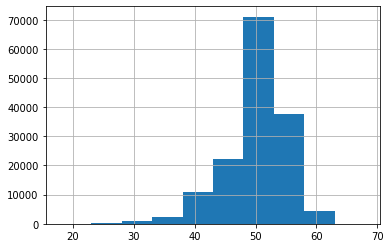

In [2]:
# menopause age
filtered["f3581"].hist()

<AxesSubplot:>

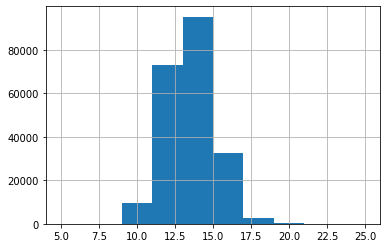

In [3]:
# menarche age
filtered["f2714"].hist()

In [5]:
# lacking one or more
def find_exclusion_years_of_periods(row):
    if (len(row.dropna().to_list()) == 0) or (len(row.dropna().to_list()) == 1):
        return True
    return False
exclusion = filtered[["f3581","f2714"]].apply(find_exclusion_years_of_periods, axis=1)
filtered.loc[exclusion,["f3581","f2714"]]

,f3581,f2714
0,NaN,12.0
3,NaN,NaN
4,NaN,13.0
5,NaN,13.0
7,NaN,12.0
...,...,...
220378,NaN,14.0
220382,NaN,11.0
220385,NaN,13.0
220386,NaN,14.0


74328 samples out of 220388 do not have either one of the age or both

/tmp/2530558.1.csg.q/ipykernel_11426/1271570071.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered2["years_of_periods"] = filtered["f3581"] - filtered["f2714"]


<AxesSubplot:>

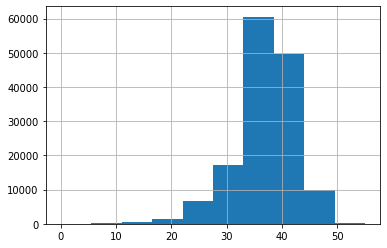

In [6]:
filtered2 = filtered[~exclusion]
filtered2["years_of_periods"] = filtered["f3581"] - filtered["f2714"]
filtered2["years_of_periods"].hist()

In [7]:
filtered2["years_of_periods"][filtered2["years_of_periods"]<30].value_counts()

29.0    2734
28.0    2315
27.0    1934
26.0    1552
25.0    1178
24.0     892
23.0     571
22.0     469
21.0     399
20.0     319
19.0     245
18.0     225
17.0     171
15.0     126
16.0     124
14.0     108
29.5      98
28.5      74
13.0      73
27.5      63
12.0      60
26.5      40
25.5      33
11.0      33
9.0       24
24.5      22
10.0      21
8.0       18
7.0       16
23.5      15
22.5      15
6.0       14
18.5       7
21.5       6
5.0        4
19.5       4
4.0        4
20.5       3
16.5       3
3.0        3
17.5       2
14.5       1
15.5       1
0.0        1
13.5       1
Name: years_of_periods, dtype: int64

In [10]:
filtered2.loc[filtered2["years_of_periods"]<10,["f3581","f2714"]]

,f3581,f2714
2183,22.0,15.0
5019,21.0,12.0
14225,20.0,12.0
18374,18.0,12.0
19127,23.0,18.0
...,...,...
211927,23.0,15.0
212487,27.0,18.0
216393,20.0,11.0
218505,21.0,14.0


In [11]:
filtered2.loc[filtered2["years_of_periods"]==0,["f3581","f2714"]]

,f3581,f2714
125148,18.0,18.0


In [12]:
filtered2.loc[filtered2["years_of_periods"]<5,["f3581","f2714"]]

,f3581,f2714
57514,18.0,14.0
67652,20.0,16.0
107979,18.0,14.0
115682,18.0,15.0
125148,18.0,18.0
129097,19.0,16.0
131419,19.0,15.0
133650,19.0,16.0


Maybe leave it and filter it when analyzing it

In [13]:
filtered = filtered.merge(filtered2[["IID","years_of_periods"]],how="left",left_on="IID",right_on="IID")
filtered

,IID,31-0.0,34-0.0,52-0.0,2247-0.0,2247-1.0,2247-2.0,2247-3.0,2257-0.0,2257-1.0,...,131784-0.0,131785-0.0,sex,f2724,f3581,f2814,f3536,f3546,f2714,years_of_periods
0,1000019,0,1960,11,1.0,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,0,0,NaN,0.0,NaN,NaN,12.0,NaN
1,1000046,0,1946,3,0.0,NaN,0.0,NaN,0.0,NaN,...,NaN,NaN,0,1,53.0,1.0,54.0,NaN,13.0,40.0
2,1000078,0,1955,6,0.0,0.0,0.0,NaN,0.0,0.0,...,NaN,NaN,0,1,52.0,0.0,NaN,NaN,10.5,41.5
3,1000090,0,1945,7,1.0,NaN,NaN,NaN,0.0,NaN,...,NaN,NaN,0,1,NaN,1.0,NaN,NaN,NaN,NaN
4,1000137,0,1961,12,0.0,NaN,NaN,NaN,0.0,NaN,...,NaN,NaN,0,0,NaN,0.0,NaN,NaN,13.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220383,6025346,0,1954,10,0.0,NaN,NaN,NaN,0.0,NaN,...,NaN,NaN,0,1,49.0,0.0,NaN,NaN,13.0,36.0
220384,6025390,0,1942,3,0.0,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,0,1,46.0,0.0,NaN,NaN,13.0,33.0
220385,6025409,0,1946,11,0.0,0.0,NaN,NaN,0.0,0.0,...,NaN,NaN,0,1,NaN,0.0,NaN,NaN,13.0,NaN
220386,6025411,0,1960,11,0.0,NaN,NaN,NaN,0.0,NaN,...,NaN,NaN,0,0,NaN,0.0,NaN,NaN,14.0,NaN


In [14]:
filtered.to_csv("~/UKBiobank/results/REGENIE_results/results_exome_data/051722_interaction_sex/sex_related/060822.500k.filtered.menopause.phe.csv",index=False)

In [2]:
## age_menopause and HRT in detail
import pandas as pd
with open("/mnt/mfs/statgen/UKBiobank/data/ukbb_databases/ukb47922_updatedAug2021/ukb47922.csv") as fp:
    line = fp.readline() # header
    header = line.split(",")
    
    indiv = ["eid"]
    icd10_colnames = [col.strip('"') for col in header if "41270-" in col]
    icd10_ages = [col.strip('"') for col in header if "41280-" in col]
    icd9_colnames = [col.strip('"') for col in header if "41271-" in col]
    icd9_ages = [col.strip('"') for col in header if "41281-" in col]
    f20002_colnames = [col.strip('"') for col in header if "20002-" in col]
    reported_sex = ["31-0.0"]
    genetic_sex = ["22001-0.0"]
    ethnicity = [col.strip('"') for col in header if "21000-" in col]
    hearing_imp_f3393 = [col.strip('"') for col in header if "3393-" in col]
    hearing_imp_f2247 = ['2247-0.0', '2247-1.0', '2247-2.0', '2247-3.0']
    hearing_imp_f2257 = ['2257-0.0', '2257-1.0', '2257-2.0', '2257-3.0']
    tin_cols = [col.strip('"') for col in header if "4803-" in col]
    ages_f21003_col = [col.strip('"') for col in header if "21003-" in col]
    ages_f131258_col = [col.strip('"') for col in header if '131258-' in col]
    year_of_birth = ["34-0.0"]
    month_of_birth = ["52-0.0"]
    
    had_menopause = [col.strip('"') for col in header if "2724-" in col]
    age_menopause = [col.strip('"') for col in header if "3581-" in col]
    len_menopause = [col.strip('"') for col in header if "3710-" in col]
    menstruating_date = [col.strip('"') for col in header if "3720-" in col]
    time_last_menstrual = [col.strip('"') for col in header if "3700-" in col]
    medications = [col.strip('"') for col in header if "6153-" in col]
    ever_HRT = [col.strip('"') for col in header if "2814-" in col]
    age_last_HRT = [col.strip('"') for col in header if "3546-" in col]
    age_started_HRT = [col.strip('"') for col in header if "3536-" in col]
    balding_pattern = ['2395-0.0', '2395-1.0', '2395-2.0', '2395-3.0']
    L63_date = [col.strip('"') for col in header if "131778-" in col]
    L64_date = [col.strip('"') for col in header if "131780-" in col]
    L66_date = [col.strip('"') for col in header if "131784-" in col]
    L63 = [col.strip('"') for col in header if "131779-" in col]
    L64 = [col.strip('"') for col in header if "131781-" in col]
    L66 = [col.strip('"') for col in header if "131785-" in col]
filtered = pd.read_csv("~/UKBiobank/results/REGENIE_results/results_exome_data/051722_interaction_sex/sex_related/500k.pre-filtered.220388ind.menopause.phe.csv",header=0)
had = filtered[filtered["f2724"]==1]
def find_exclusion_age_menopause(row):
    if len(row.dropna().to_list()) ==0:
        return True
    if (-1 in row.to_list()) or (-3 in row.to_list()):
        return True
    return False
exclusion = had[age_menopause].apply(find_exclusion_age_menopause, axis=1)
had = had[~exclusion]
def find_inconsistencies_age_menopause(row):
    if len(row.dropna().to_list()) !=0:
        if len(row.dropna().unique()) !=1:
            return True
    return False
inconsistencies = had[age_menopause].apply(find_inconsistencies_age_menopause, axis=1)
had.loc[inconsistencies,age_menopause]

/tmp/2539209.1.all.q/ipykernel_26813/1023823615.py:41: DtypeWarning: Columns (290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,466,467,468,469,470,471,472,473,474,475,476,477,478,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,62

,3581-0.0,3581-1.0,3581-2.0,3581-3.0
50,50.0,53.0,NaN,NaN
52,50.0,NaN,51.0,NaN
64,56.0,54.0,NaN,NaN
89,53.0,52.0,NaN,NaN
90,53.0,53.0,54.0,NaN
...,...,...,...,...
220255,52.0,NaN,53.0,NaN
220261,34.0,34.0,45.0,NaN
220275,53.0,NaN,52.0,NaN
220333,47.0,46.0,NaN,NaN


In [3]:
def find_inconsistencies_age_gap(row):
    if len(row.dropna().to_list()) !=0:
        return max(row.dropna().to_list())-min(row.dropna().to_list())
    return pd.NA
gap = had.loc[inconsistencies,age_menopause].apply(find_inconsistencies_age_gap, axis=1)
had.loc[inconsistencies,age_menopause][gap<=2]

,3581-0.0,3581-1.0,3581-2.0,3581-3.0
52,50.0,NaN,51.0,NaN
64,56.0,54.0,NaN,NaN
89,53.0,52.0,NaN,NaN
90,53.0,53.0,54.0,NaN
122,53.0,54.0,NaN,NaN
...,...,...,...,...
220218,50.0,NaN,52.0,NaN
220222,52.0,52.0,51.0,NaN
220255,52.0,NaN,53.0,NaN
220275,53.0,NaN,52.0,NaN


In [7]:
had[inconsistencies].loc[gap<=2,"eid"].to_csv("~/UKBiobank/results/REGENIE_results/results_exome_data/051722_interaction_sex/sex_related/061322.age_meno_incon_smaller2.sample.txt",header=False,index=False)

In [4]:
# Investigating whether we have samples that having menopause again after taking HRT
had.loc[inconsistencies,age_menopause+age_started_HRT+age_last_HRT]

,3581-0.0,3581-1.0,3581-2.0,3581-3.0,3536-0.0,3536-1.0,3536-2.0,3536-3.0,3546-0.0,3546-1.0,3546-2.0,3546-3.0
50,50.0,53.0,NaN,NaN,48.0,45.0,NaN,NaN,58.0,55.0,NaN,NaN
52,50.0,NaN,51.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64,56.0,54.0,NaN,NaN,53.0,52.0,NaN,NaN,55.0,54.0,NaN,NaN
89,53.0,52.0,NaN,NaN,51.0,51.0,NaN,NaN,51.0,51.0,NaN,NaN
90,53.0,53.0,54.0,NaN,52.0,52.0,54.0,NaN,54.0,53.0,57.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
220255,52.0,NaN,53.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
220261,34.0,34.0,45.0,NaN,35.0,NaN,45.0,NaN,35.0,NaN,45.0,NaN
220275,53.0,NaN,52.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
220333,47.0,46.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# had menopause -> started HRT -> had periods and then menopause again -> stopped HRT
# had menopause -> started HRT -> had periods -> stopped HRT -> had menopause again
def find_meno_again(row):
    if len(row[age_menopause].dropna().to_list()) !=0 and len(row[age_started_HRT].dropna().to_list()) !=0:
        if min(row[age_menopause].dropna().to_list()) <= min(row[age_started_HRT].dropna().to_list()) and \
            max(row[age_menopause].dropna().to_list()) >= min(row[age_started_HRT].dropna().to_list()):
            return True
    return False
meno_again = had.loc[inconsistencies,age_menopause+age_started_HRT+age_last_HRT].apply(find_meno_again, axis=1)
meno_again.value_counts()

False    8283
True     1832
dtype: int64

In [6]:
had.loc[inconsistencies,age_menopause+age_started_HRT+age_last_HRT][meno_again]

,3581-0.0,3581-1.0,3581-2.0,3581-3.0,3536-0.0,3536-1.0,3536-2.0,3536-3.0,3546-0.0,3546-1.0,3546-2.0,3546-3.0
310,50.0,NaN,48.0,NaN,51.0,NaN,50.0,NaN,-11.0,NaN,52.0,NaN
381,53.0,52.0,45.0,NaN,54.0,46.0,NaN,NaN,63.0,54.0,NaN,NaN
639,54.0,NaN,55.0,NaN,55.0,NaN,56.0,NaN,57.0,NaN,57.0,NaN
648,49.0,45.0,NaN,NaN,NaN,45.0,NaN,NaN,NaN,48.0,NaN,NaN
800,47.0,NaN,48.0,NaN,47.0,NaN,48.0,NaN,-11.0,NaN,64.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
220039,53.0,54.0,52.0,NaN,54.0,54.0,53.0,NaN,-11.0,-11.0,-11.0,NaN
220046,50.0,50.0,51.0,NaN,51.0,51.0,51.0,NaN,-1.0,54.0,54.0,NaN
220048,55.0,NaN,56.0,NaN,56.0,NaN,59.0,NaN,-11.0,NaN,70.0,NaN
220148,52.0,54.0,NaN,NaN,53.0,54.0,NaN,NaN,63.0,60.0,NaN,NaN


In [7]:
had.loc[inconsistencies,indiv+age_menopause+age_started_HRT+age_last_HRT][meno_again].to_csv("~/UKBiobank/results/REGENIE_results/results_exome_data/051722_interaction_sex/sex_related/061522.meno_again.1832ind.phe.csv",index=False)

In [143]:
# Male 
filtered = filtered[filtered["sex"]=="1"]
filtered

,eid,31-0.0,34-0.0,52-0.0,2247-0.0,2247-1.0,2247-2.0,2247-3.0,2257-0.0,2257-1.0,...,41281-0.45,41281-0.46,131258-0.0,131778-0.0,131779-0.0,131780-0.0,131781-0.0,131784-0.0,131785-0.0,sex
1,1000022,1,1954,8,1,<NA>,<NA>,<NA>,1,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,1
2,1000035,1,1944,5,0,<NA>,<NA>,<NA>,1,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,1
5,1000063,1,1967,4,0,<NA>,<NA>,<NA>,0,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,1
7,1000081,1,1942,2,0,<NA>,<NA>,<NA>,0,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,1
10,1000112,1,1949,6,-1,<NA>,1,<NA>,0,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502449,6025335,1,1946,6,0,<NA>,<NA>,<NA>,0,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,1
502452,6025363,1,1944,4,0,<NA>,<NA>,<NA>,0,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,1
502453,6025378,1,1966,10,0,<NA>,<NA>,<NA>,1,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,1
502454,6025381,1,1968,1,0,<NA>,<NA>,<NA>,0,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,1


In [146]:
filtered.to_csv("~/UKBiobank/results/REGENIE_results/results_exome_data/051722_interaction_sex/sex_related/500k.male.223312ind.phe.csv",index=False)

In [4]:
import pandas as pd
with open("/mnt/mfs/statgen/UKBiobank/data/ukbb_databases/ukb47922_updatedAug2021/ukb47922.csv") as fp:
    line = fp.readline() # header
    header = line.split(",")
    
    indiv = ["eid"]
    icd10_colnames = [col.strip('"') for col in header if "41270-" in col]
    icd10_ages = [col.strip('"') for col in header if "41280-" in col]
    icd9_colnames = [col.strip('"') for col in header if "41271-" in col]
    icd9_ages = [col.strip('"') for col in header if "41281-" in col]
    f20002_colnames = [col.strip('"') for col in header if "20002-" in col]
    reported_sex = ["31-0.0"]
    genetic_sex = ["22001-0.0"]
    ethnicity = [col.strip('"') for col in header if "21000-" in col]
    hearing_imp_f3393 = [col.strip('"') for col in header if "3393-" in col]
    hearing_imp_f2247 = ['2247-0.0', '2247-1.0', '2247-2.0', '2247-3.0']
    hearing_imp_f2257 = ['2257-0.0', '2257-1.0', '2257-2.0', '2257-3.0']
    tin_cols = [col.strip('"') for col in header if "4803-" in col]
    ages_f21003_col = [col.strip('"') for col in header if "21003-" in col]
    ages_f131258_col = [col.strip('"') for col in header if '131258-' in col]
    year_of_birth = ["34-0.0"]
    month_of_birth = ["52-0.0"]
    
    had_menopause = [col.strip('"') for col in header if "2724-" in col]
    age_menopause = [col.strip('"') for col in header if "3581-" in col]
    len_menopause = [col.strip('"') for col in header if "3710-" in col]
    menstruating_date = [col.strip('"') for col in header if "3720-" in col]
    time_last_menstrual = [col.strip('"') for col in header if "3700-" in col]
    medications = [col.strip('"') for col in header if "6153-" in col]
    ever_HRT = [col.strip('"') for col in header if "2814-" in col]
    age_last_HRT = [col.strip('"') for col in header if "3546-" in col]
    age_started_HRT = [col.strip('"') for col in header if "3536-" in col]
    balding_pattern = ['2395-0.0', '2395-1.0', '2395-2.0', '2395-3.0']
    L63_date = [col.strip('"') for col in header if "131778-" in col]
    L64_date = [col.strip('"') for col in header if "131780-" in col]
    L66_date = [col.strip('"') for col in header if "131784-" in col]
    L63 = [col.strip('"') for col in header if "131779-" in col]
    L64 = [col.strip('"') for col in header if "131781-" in col]
    L66 = [col.strip('"') for col in header if "131785-" in col]
filtered = pd.read_csv("~/UKBiobank/results/REGENIE_results/results_exome_data/051722_interaction_sex/sex_related/500k.male.223312ind.phe.csv",header=0)
filtered.shape

/tmp/2523746.1.high_mem.q/ipykernel_14786/237899226.py:40: DtypeWarning: Columns (270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,56

(223312, 770)

In [5]:
## balding
filtered[balding_pattern]

,2395-0.0,2395-1.0,2395-2.0,2395-3.0
0,2.0,NaN,NaN,NaN
1,4.0,NaN,NaN,NaN
2,4.0,NaN,NaN,NaN
3,4.0,NaN,NaN,NaN
4,2.0,NaN,-1.0,NaN
...,...,...,...,...
223307,3.0,NaN,NaN,NaN
223308,4.0,NaN,NaN,NaN
223309,2.0,NaN,NaN,NaN
223310,1.0,NaN,NaN,NaN


Coding

https://biobank.ndph.ox.ac.uk/showcase/coding.cgi?id=100572

https://biobank.ndph.ox.ac.uk/showcase/refer.cgi?id=100423

Pattern 1 to 4 are worsening

```
1	Pattern 1
2	Pattern 2
3	Pattern 3
4	Pattern 4
-1	Do not know
-3	Prefer not to answer
```

In [6]:
def find_exclusion_balding_pattern(row):
    if len(row.dropna().to_list()) ==0:
        return True
    if (-1 in row.to_list()) or (-3 in row.to_list()):
        return True
    return False
exclusion = filtered[balding_pattern].apply(find_exclusion_balding_pattern, axis=1)
filtered = filtered[~exclusion]
filtered.shape

(220843, 770)

In [12]:
def find_inconsistencies_balding_pattern(row):
    ans = [i for i in row if (not pd.isna(i)) and (i in [1,2,3,4])] 
    return sorted(ans) != ans
inconsistencies = filtered[balding_pattern].apply(find_inconsistencies_balding_pattern, axis=1)
filtered.loc[inconsistencies,balding_pattern]

,2395-0.0,2395-1.0,2395-2.0,2395-3.0
152,3.0,NaN,2.0,NaN
242,2.0,NaN,1.0,NaN
330,2.0,1.0,1.0,NaN
620,2.0,1.0,NaN,NaN
733,2.0,NaN,1.0,NaN
...,...,...,...,...
223114,2.0,NaN,1.0,NaN
223208,1.0,2.0,1.0,NaN
223211,3.0,NaN,2.0,NaN
223213,4.0,NaN,2.0,NaN


<AxesSubplot:>

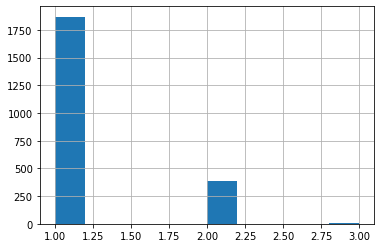

In [13]:
def find_inconsistencies_pattern_gap(row):
    if len(row.dropna().to_list()) !=0:
        return max(row.dropna().to_list())-min(row.dropna().to_list())
    return pd.NA
gap = filtered.loc[inconsistencies,balding_pattern].apply(find_inconsistencies_pattern_gap, axis=1)
gap.hist()

Balding can be weakened or be worse. It seems changing patterns is acceptable. Take the answer from the last visit?

In [7]:
def find_balding_pattern(row):
    ans = [i for i in row if (not pd.isna(i)) and (i in [1,2,3,4])] 
    return ans[-1]
filtered["2395"] = filtered[balding_pattern].apply(find_balding_pattern, axis=1)
filtered["2395"].value_counts(dropna=False)

1.0    70606
3.0    59014
2.0    49282
4.0    41941
Name: 2395, dtype: int64

In [14]:
filtered.to_csv("~/UKBiobank/results/REGENIE_results/results_exome_data/051722_interaction_sex/sex_related/500k.male.220843ind.balding.csv",index=False)

# Rerun the single variant regenie for the 500k imputed data

In [29]:
# Common variables Columbia's cluster
UKBB_PATH=$HOME/UKBiobank
UKBB_yale=$HOME/UKBiobank_Yale_transfer
USER_PATH=$HOME/working
container_lmm=$HOME/containers/lmm.sif
container_marp=$HOME/containers/marp.sif
container_annovar=$HOME/containers/gatk4-annovar.sif
hearing_pheno_path=$UKBB_PATH/phenotype_files/hearing_impairment
tpl_file=$USER_PATH/bioworkflows/admin/csg.yml
formatFile_fastgwa=$USER_PATH/UKBB_GWAS_dev/data/fastGWA_template.yml
formatFile_bolt=$USER_PATH/UKBB_GWAS_dev/data/boltlmm_template.yml
formatFile_saige=$USER_PATH/UKBB_GWAS_dev/data/saige_template.yml
formatFile_regenie=$USER_PATH/UKBB_GWAS_dev/data/regenie_template.yml
# Workflows
lmm_sos=$USER_PATH/bioworkflows/GWAS/LMM.ipynb
anno_sos=$USER_PATH/bioworkflows/variant-annotation/annovar.ipynb
clumping_sos=$USER_PATH/bioworkflows/GWAS/LD_Clumping.ipynb
extract_sos=$USER_PATH/bioworkflows/GWAS/Region_Extraction.ipynb
snptogene_sos=$USER_PATH/UKBB_GWAS_dev/workflow/snptogene.ipynb

# LMM directories for array data data
lmm_imp_dir_fastgwa=$UKBB_PATH/results/FastGWA_results/results_array_data
lmm_imp_dir_bolt=$UKBB_PATH/results/BOLTLMM_results/results_array_data
lmm_imp_dir_saige=$UKBB_PATH/results/SAIGE_results/results_array_data
lmm_imp_dir_regenie=$UKBB_PATH/results/REGENIE_results/results_array_data

# LMM directories for exome data
lmm_exome_dir_fastgwa=$UKBB_PATH/results/FastGWA_results/results_array_data
lmm_exome_dir_bolt=$UKBB_PATH/results/BOLTLMM_results/results_array_data
lmm_exome_dir_saige=$UKBB_PATH/results/SAIGE_results/results_array_data
lmm_exome_dir_regenie=$UKBB_PATH/results/REGENIE_results/results_array_data
### Specific to REGENIE
bsize=1000
trait=bt
bgenMinMAF=0.001
bgenMinINFO=0.8
minMAC=4
maf_filter=0
geno_filter=0
hwe_filter=0
mind_filter=0
reverse_log_p=True
numThreads=2

In [24]:
# 200k exome
# f3393
lmm_dir_regenie=/home/gl2776/UKBiobank/results/REGENIE_results/results_exome_data/051722_interaction_sex/single/f3393
lmm_sbatch_regenie=$lmm_dir_regenie/f3393_sex_interaction-regenie_$(date +"%Y-%m-%d").sbatch
phenoFile=/home/gl2776/UKBiobank/phenotype_files/hearing_impairment/090321_UKBB_Hearing_aid_f3393_expandedwhite_6436cases_96601ctrl_PC1_2.tsv
phenoCol=f3393
covarCol=age
qCovarCol="PC1 PC2"
#Use the original bed files that passed QC using Megan's parameters geno=0.01, mind=0.1, maf=0.01, hwe=5e-08
bfile=/home/gl2776/UKBiobank/genotype_files_processed/090221_sample_variant_qc_final_callrate90/cache/UKB_genotypedatadownloaded083019.090221_sample_variant_qc_final_callrate90.filtered.extracted.bed
# Use the gene bfile here for the association
genoFile=`echo /home/gl2776/UKBiobank/data/exome_files/project_VCF/072721_run/plink/ukb23156_c{1..22}.merged.filtered.bed`
## After doing the annotation you can create the annotatted manhatan plot
lmm_job_size=20
regenie_sos=~/working/interaction/newv/Regenie_interaction_GxE_without_inter.ipynb
regenieFile=~/project/guangyou/containers/regenie.v.2.3
lowmem_dir=$lmm_dir_regenie/scratch60/
covariates=sex
# If --annotate then it will add the label to the plot otherwise --no-annotate

lmm_args="""regenie
    --cwd $lmm_dir_regenie 
    --bfile $bfile 
    --genoFile $genoFile
    --phenoFile $phenoFile 
    --formatFile $formatFile_regenie 
    --regenieFile $regenieFile
    --sampleFile $sampleFile
    --phenoCol $phenoCol
    --covarCol $covarCol  
    --qCovarCol $qCovarCol
    --bsize $bsize
    --lowmem_dir $lowmem_dir
    --trait $trait
    --covariates $covariates
    --bgenMinMAF $bgenMinMAF 
    --bgenMinINFO $bgenMinINFO
    --maf_filter $maf_filter
    --geno_filter $geno_filter
    --hwe_filter $hwe_filter
    --mind_filter $mind_filter
    --minMAC $minMAC
    --job_size $lmm_job_size
    --container_lmm $container_lmm
    --container_marp $container_marp
"""

sos run ~/working/UKBB_GWAS_dev/admin/Get_Job_Script.ipynb csg\
    --template-file $tpl_file \
    --workflow-file $regenie_sos \
    --to-script $lmm_sbatch_regenie \
    --args "$lmm_args" 

INFO: Running csg: Configuration for Columbia csg partition cluster
INFO: csg is completed.
INFO: csg output:   /home/gl2776/UKBiobank/results/REGENIE_results/results_exome_data/051722_interaction_sex/single/f3393/f3393_sex_interaction-regenie_2022-06-02.sbatch
INFO: Workflow csg (ID=w4e6c0d069ed3ef00) is executed successfully with 1 completed step.


In [28]:
# f2247
lmm_dir_regenie=/home/gl2776/UKBiobank/results/REGENIE_results/results_exome_data/051722_interaction_sex/single/f2247
lmm_sbatch_regenie=$lmm_dir_regenie/f2247_sex_interaction-regenie_$(date +"%Y-%m-%d").sbatch
phenoFile=/home/gl2776/UKBiobank/phenotype_files/hearing_impairment/090321_UKBB_Hearing_difficulty_f2247_expandedwhite_45502cases_96601ctrl_PC1_2.tsv
phenoCol=f2247
covarCol=age
qCovarCol="PC1 PC2"
#Use the original bed files that passed QC using Megan's parameters geno=0.01, mind=0.1, maf=0.01, hwe=5e-08
bfile=/home/gl2776/UKBiobank/genotype_files_processed/090221_sample_variant_qc_final_callrate90/cache/UKB_genotypedatadownloaded083019.090221_sample_variant_qc_final_callrate90.filtered.extracted.bed
# Use the gene bfile here for the association
genoFile=`echo /home/gl2776/UKBiobank/data/exome_files/project_VCF/072721_run/plink/ukb23156_c{1..22}.merged.filtered.bed`
## After doing the annotation you can create the annotatted manhatan plot
lmm_job_size=20
regenie_sos=~/working/interaction/newv/Regenie_interaction_GxE_without_inter.ipynb
regenieFile=~/project/guangyou/containers/regenie.v.2.3
lowmem_dir=$lmm_dir_regenie/scratch60/
covariates=sex
# If --annotate then it will add the label to the plot otherwise --no-annotate

lmm_args="""regenie
    --cwd $lmm_dir_regenie 
    --bfile $bfile 
    --genoFile $genoFile
    --phenoFile $phenoFile 
    --formatFile $formatFile_regenie 
    --regenieFile $regenieFile
    --sampleFile $sampleFile
    --phenoCol $phenoCol
    --covarCol $covarCol  
    --qCovarCol $qCovarCol
    --bsize $bsize
    --lowmem_dir $lowmem_dir
    --trait $trait
    --covariates $covariates
    --bgenMinMAF $bgenMinMAF 
    --bgenMinINFO $bgenMinINFO
    --maf_filter $maf_filter
    --geno_filter $geno_filter
    --hwe_filter $hwe_filter
    --mind_filter $mind_filter
    --minMAC $minMAC
    --job_size $lmm_job_size
    --container_lmm $container_lmm
    --container_marp $container_marp
"""

sos run ~/working/UKBB_GWAS_dev/admin/Get_Job_Script.ipynb csg\
    --template-file $tpl_file \
    --workflow-file $regenie_sos \
    --to-script $lmm_sbatch_regenie \
    --args "$lmm_args" 

# f2257
lmm_dir_regenie=/home/gl2776/UKBiobank/results/REGENIE_results/results_exome_data/051722_interaction_sex/single/f2257
lmm_sbatch_regenie=$lmm_dir_regenie/f2257_sex_interaction-regenie_$(date +"%Y-%m-%d").sbatch
phenoFile=/home/gl2776/UKBiobank/phenotype_files/hearing_impairment/090321_UKBB_Hearing_noise_f2257_expandedwhite_65660cases_96601ctrl_PC1_2.tsv
phenoCol=f2257
covarCol=age
qCovarCol="PC1 PC2"
#Use the original bed files that passed QC using Megan's parameters geno=0.01, mind=0.1, maf=0.01, hwe=5e-08
bfile=/home/gl2776/UKBiobank/genotype_files_processed/090221_sample_variant_qc_final_callrate90/cache/UKB_genotypedatadownloaded083019.090221_sample_variant_qc_final_callrate90.filtered.extracted.bed
# Use the gene bfile here for the association
genoFile=`echo /home/gl2776/UKBiobank/data/exome_files/project_VCF/072721_run/plink/ukb23156_c{1..22}.merged.filtered.bed`
## After doing the annotation you can create the annotatted manhatan plot
lmm_job_size=20
regenie_sos=~/working/interaction/newv/Regenie_interaction_GxE_without_inter.ipynb
regenieFile=~/project/guangyou/containers/regenie.v.2.3
lowmem_dir=$lmm_dir_regenie/scratch60/
covariates=sex
# If --annotate then it will add the label to the plot otherwise --no-annotate

lmm_args="""regenie
    --cwd $lmm_dir_regenie 
    --bfile $bfile 
    --genoFile $genoFile
    --phenoFile $phenoFile 
    --formatFile $formatFile_regenie 
    --regenieFile $regenieFile
    --sampleFile $sampleFile
    --phenoCol $phenoCol
    --covarCol $covarCol  
    --qCovarCol $qCovarCol
    --bsize $bsize
    --lowmem_dir $lowmem_dir
    --trait $trait
    --covariates $covariates
    --bgenMinMAF $bgenMinMAF 
    --bgenMinINFO $bgenMinINFO
    --maf_filter $maf_filter
    --geno_filter $geno_filter
    --hwe_filter $hwe_filter
    --mind_filter $mind_filter
    --minMAC $minMAC
    --job_size $lmm_job_size
    --container_lmm $container_lmm
    --container_marp $container_marp
"""

sos run ~/working/UKBB_GWAS_dev/admin/Get_Job_Script.ipynb csg\
    --template-file $tpl_file \
    --workflow-file $regenie_sos \
    --to-script $lmm_sbatch_regenie \
    --args "$lmm_args" 


# f2247_f2257
lmm_dir_regenie=/home/gl2776/UKBiobank/results/REGENIE_results/results_exome_data/051722_interaction_sex/single/f2247_f2257
lmm_sbatch_regenie=$lmm_dir_regenie/f2247_f2257_sex_interaction-regenie_$(date +"%Y-%m-%d").sbatch
phenoFile=/home/gl2776/UKBiobank/phenotype_files/hearing_impairment/090321_UKBB_Combined_f2247_f2257_expandedwhite_38410cases_96601ctrl_PC1_2.tsv
phenoCol=f2247_f2257
covarCol=age
qCovarCol="PC1 PC2"
#Use the original bed files that passed QC using Megan's parameters geno=0.01, mind=0.1, maf=0.01, hwe=5e-08
bfile=/home/gl2776/UKBiobank/genotype_files_processed/090221_sample_variant_qc_final_callrate90/cache/UKB_genotypedatadownloaded083019.090221_sample_variant_qc_final_callrate90.filtered.extracted.bed
# Use the gene bfile here for the association
genoFile=`echo /home/gl2776/UKBiobank/data/exome_files/project_VCF/072721_run/plink/ukb23156_c{1..22}.merged.filtered.bed`
## After doing the annotation you can create the annotatted manhatan plot
lmm_job_size=20
regenie_sos=~/working/interaction/newv/Regenie_interaction_GxE_without_inter.ipynb
regenieFile=~/project/guangyou/containers/regenie.v.2.3
lowmem_dir=$lmm_dir_regenie/scratch60/
covariates=sex
# If --annotate then it will add the label to the plot otherwise --no-annotate

lmm_args="""regenie
    --cwd $lmm_dir_regenie 
    --bfile $bfile 
    --genoFile $genoFile
    --phenoFile $phenoFile 
    --formatFile $formatFile_regenie 
    --regenieFile $regenieFile
    --sampleFile $sampleFile
    --phenoCol $phenoCol
    --covarCol $covarCol  
    --qCovarCol $qCovarCol
    --bsize $bsize
    --lowmem_dir $lowmem_dir
    --trait $trait
    --covariates $covariates
    --bgenMinMAF $bgenMinMAF 
    --bgenMinINFO $bgenMinINFO
    --maf_filter $maf_filter
    --geno_filter $geno_filter
    --hwe_filter $hwe_filter
    --mind_filter $mind_filter
    --minMAC $minMAC
    --job_size $lmm_job_size
    --container_lmm $container_lmm
    --container_marp $container_marp
"""

sos run ~/working/UKBB_GWAS_dev/admin/Get_Job_Script.ipynb csg\
    --template-file $tpl_file \
    --workflow-file $regenie_sos \
    --to-script $lmm_sbatch_regenie \
    --args "$lmm_args" 

INFO: Running csg: Configuration for Columbia csg partition cluster
INFO: csg is completed.
INFO: csg output:   /home/gl2776/UKBiobank/results/REGENIE_results/results_exome_data/051722_interaction_sex/single/f2247/f2247_sex_interaction-regenie_2022-06-02.sbatch
INFO: Workflow csg (ID=wcf5d1c0a4e82781c) is executed successfully with 1 completed step.
INFO: Running csg: Configuration for Columbia csg partition cluster
INFO: csg is completed.
INFO: csg output:   /home/gl2776/UKBiobank/results/REGENIE_results/results_exome_data/051722_interaction_sex/single/f2257/f2257_sex_interaction-regenie_2022-06-02.sbatch
INFO: Workflow csg (ID=wca4a4ae5003004eb) is executed successfully with 1 completed step.
INFO: Running csg: Configuration for Columbia csg partition cluster
INFO: csg is completed.
INFO: csg output:   /home/gl2776/UKBiobank/results/REGENIE_results/results_exome_data/051722_interaction_sex/single/f2247_f2257/f2247_f2257_sex_interaction-regenie_2022-06-02.sbatch
INFO: Workflow csg (ID

In [30]:
# Using original version of regenie we used
# f3393
lmm_dir_regenie=/home/gl2776/UKBiobank/results/REGENIE_results/results_exome_data/051722_interaction_sex/single/f3393_original_version
lmm_sbatch_regenie=$lmm_dir_regenie/f3393_sex_interaction-regenie_$(date +"%Y-%m-%d").sbatch
phenoFile=/home/gl2776/UKBiobank/phenotype_files/hearing_impairment/090321_UKBB_Hearing_aid_f3393_expandedwhite_6436cases_96601ctrl_PC1_2.tsv
covarFile=/home/gl2776/UKBiobank/phenotype_files/hearing_impairment/090321_UKBB_Hearing_aid_f3393_expandedwhite_6436cases_96601ctrl_PC1_2.tsv
phenoCol=f3393
covarCol=sex
qCovarCol="age PC1 PC2"
#Use the original bed files for the genotype array on regenie step1
bfile=/home/gl2776/UKBiobank/genotype_files_processed/090221_sample_variant_qc_final_callrate90/cache/UKB_genotypedatadownloaded083019.090221_sample_variant_qc_final_callrate90.filtered.extracted.bed
genoFile=`echo $UKBB_PATH/data/exome_files/project_VCF/072721_run/plink/ukb23156_c{1..22}.merged.filtered.bed`
lowmem_dir=$lmm_dir_regenie/scratch60/

lmm_args="""regenie
    --cwd $lmm_dir_regenie 
    --bfile $bfile 
    --genoFile $genoFile
    --phenoFile $phenoFile 
    --formatFile $formatFile_regenie 
    --phenoCol $phenoCol
    --covarCol $covarCol  
    --qCovarCol $qCovarCol
    --bsize $bsize
    --lowmem_dir $lowmem_dir
    --trait $trait 
    --bgenMinMAF $bgenMinMAF 
    --bgenMinINFO $bgenMinINFO
    --maf_filter $maf_filter
    --geno_filter $geno_filter
    --hwe_filter $hwe_filter
    --mind_filter $mind_filter
    --minMAC $minMAC
    --job_size $lmm_job_size
    --ylim $ylim
    --reverse_log_p $reverse_log_p
    --numThreads $numThreads
    --container_lmm $container_lmm
    --container_marp $container_marp
"""

sos run ~/working/UKBB_GWAS_dev/admin/Get_Job_Script.ipynb csg\
    --template-file $tpl_file \
    --workflow-file $lmm_sos \
    --to-script $lmm_sbatch_regenie \
    --args "$lmm_args"

INFO: Running csg: Configuration for Columbia csg partition cluster
INFO: csg is completed.
INFO: csg output:   /home/gl2776/UKBiobank/results/REGENIE_results/results_exome_data/051722_interaction_sex/single/f3393_original_version/f3393_sex_interaction-regenie_2022-06-02.sbatch
INFO: Workflow csg (ID=wdc560f3c897e1179) is executed successfully with 1 completed step.


## Result analysis

In [1]:
import pandas as pd
snplist = pd.read_csv("~/UKBiobank/results/REGENIE_results/results_exome_data/051722_interaction_sex/vairants_of_interest.txt",header=None)[0].to_list()
result = pd.DataFrame(columns=["CHROM","GENPOS","ID","ALLELE0","ALLELE1","A1FREQ","N","TEST","BETA","SE","CHISQ","LOG10P","EXTRA"])
for i in [1,5,6,7,20,22]:
    file = "~/UKBiobank/results/REGENIE_results/results_exome_data/051722_interaction_sex/single/f3393/cache/ukb23156_c"+str(i)+".merged.filtered.sex_f3393.regenie.gz"
    stat = pd.read_csv(file,header=0,sep=" ")
    tmp = stat[stat["ID"].isin(snplist)]
    result = pd.concat([result,tmp], axis=0,ignore_index=True)
result[["CHROM","GENPOS","ID","TEST","LOG10P"]]

,CHROM,GENPOS,ID,TEST,LOG10P
0,1,46001049,chr1:46001049:T:C,ADD,1.46546
1,1,46021880,chr1:46021880:G:A,ADD,1.54396
2,1,46027788,chr1:46027788:T:G,ADD,1.33369
3,1,46132597,chr1:46132597:C:A,ADD,1.35479
4,5,272741,chr5:272741:A:G,ADD,10.1515
5,5,272748,chr5:272748:G:C,ADD,7.60561
6,5,272755,chr5:272755:A:G,ADD,9.87425
7,5,73776529,chr5:73776529:T:C,ADD,8.00057
8,5,73780632,chr5:73780632:G:A,ADD,7.41202
9,5,73780649,chr5:73780649:GT:G,ADD,8.15305


In [2]:
col = result[["CHROM","GENPOS","ID"]]
snplist = pd.read_csv("~/UKBiobank/results/REGENIE_results/results_exome_data/051722_interaction_sex/vairants_of_interest.txt",header=None)[0].to_list()
# f3393
result = pd.DataFrame(columns=stat.columns)
for i in [1,5,6,7,20,22]:
    file = "~/UKBiobank/results/REGENIE_results/results_exome_data/051722_interaction_sex/single/f3393/cache/ukb23156_c"+str(i)+".merged.filtered.sex_f3393.regenie.gz"
    stat = pd.read_csv(file,header=0,sep=" ")
    tmp = stat[stat["ID"].isin(snplist)]
    result = pd.concat([result,tmp], axis=0,ignore_index=True)
col = col.merge(result[["ID","LOG10P"]],how="left",left_on="ID",right_on="ID")
col = col.rename(columns={"LOG10P":"f3393"})
# f2247
result = pd.DataFrame(columns=stat.columns)
for i in [1,5,6,7,20,22]:
    file = "~/UKBiobank/results/REGENIE_results/results_exome_data/051722_interaction_sex/single/f2247/cache/ukb23156_c"+str(i)+".merged.filtered.sex_f2247.regenie.gz"
    stat = pd.read_csv(file,header=0,sep=" ")
    tmp = stat[stat["ID"].isin(snplist)]
    result = pd.concat([result,tmp], axis=0,ignore_index=True)
col = col.merge(result[["ID","LOG10P"]],how="left",left_on="ID",right_on="ID")
col= col.rename(columns={"LOG10P":"f2247"})
# f2257
result = pd.DataFrame(columns=stat.columns)
for i in [1,5,6,7,20,22]:
    file = "~/UKBiobank/results/REGENIE_results/results_exome_data/051722_interaction_sex/single/f2257/cache/ukb23156_c"+str(i)+".merged.filtered.sex_f2257.regenie.gz"
    stat = pd.read_csv(file,header=0,sep=" ")
    tmp = stat[stat["ID"].isin(snplist)]
    result = pd.concat([result,tmp], axis=0,ignore_index=True)
col = col.merge(result[["ID","LOG10P"]],how="left",left_on="ID",right_on="ID")
col= col.rename(columns={"LOG10P":"f2257"})
# f2247_f2257
result = pd.DataFrame(columns=stat.columns)
for i in [1,5,6,7,20,22]:
    file = "~/UKBiobank/results/REGENIE_results/results_exome_data/051722_interaction_sex/single/f2247_f2257/cache/ukb23156_c"+str(i)+".merged.filtered.sex_f2247_f2257.regenie.gz"
    stat = pd.read_csv(file,header=0,sep=" ")
    tmp = stat[stat["ID"].isin(snplist)]
    result = pd.concat([result,tmp], axis=0,ignore_index=True)
col = col.merge(result[["ID","LOG10P"]],how="left",left_on="ID",right_on="ID")
col= col.rename(columns={"LOG10P":"f2247_f2257"})
col.iloc[:,3:] = 10**(-col.iloc[:,3:])
col

,CHROM,GENPOS,ID,f3393,f2247,f2257,f2247_f2257
0,1,46001049,chr1:46001049:T:C,0.03424,0.0,0.00001,0.0
1,1,46021880,chr1:46021880:G:A,0.028579,0.0,0.000002,0.0
2,1,46027788,chr1:46027788:T:G,0.046378,0.0,0.000003,0.0
3,1,46132597,chr1:46132597:C:A,0.044178,0.0,0.000001,0.0
4,5,272741,chr5:272741:A:G,0.0,0.0,0.0,0.0
5,5,272748,chr5:272748:G:C,0.0,0.0,0.0,0.0
6,5,272755,chr5:272755:A:G,0.0,0.0,0.0,0.0
7,5,73776529,chr5:73776529:T:C,0.0,0.0,0.000001,0.0
8,5,73780632,chr5:73780632:G:A,0.0,0.0,0.000004,0.0
9,5,73780649,chr5:73780649:GT:G,0.0,0.0,0.000002,0.0


In [3]:
pd.set_option('display.float_format', '{:.2E}'.format)
col

,CHROM,GENPOS,ID,f3393,f2247,f2257,f2247_f2257
0,1,46001049,chr1:46001049:T:C,3.42E-02,2.25E-08,1.04E-05,1.07E-07
1,1,46021880,chr1:46021880:G:A,2.86E-02,3.39E-08,2.28E-06,6.10E-08
2,1,46027788,chr1:46027788:T:G,4.64E-02,3.63E-08,2.80E-06,8.69E-08
3,1,46132597,chr1:46132597:C:A,4.42E-02,2.34E-08,6.66E-07,3.29E-08
4,5,272741,chr5:272741:A:G,7.06E-11,1.04E-21,4.96E-16,1.11E-18
5,5,272748,chr5:272748:G:C,2.48E-08,5.19E-19,2.19E-13,6.63E-16
6,5,272755,chr5:272755:A:G,1.34E-10,1.00E-21,1.83E-15,8.00E-19
7,5,73776529,chr5:73776529:T:C,9.99E-09,1.63E-09,1.40E-06,1.06E-08
8,5,73780632,chr5:73780632:G:A,3.87E-08,9.92E-09,3.71E-06,6.35E-08
9,5,73780649,chr5:73780649:GT:G,7.03E-09,2.19E-09,2.37E-06,1.21E-08


# GLM with menopause

Variables we have:
 1. eid
 2. sex (all =0; all female)
 3. f2724: had menopause or not 
 4. f3581: the age of menopause
 5. 2814: had HRT
 6. 3536: the age of starting HRT
 6. 3546: the age of stoping HRT

In [1]:
import pandas as pd
phe = pd.read_csv("~/UKBiobank/results/REGENIE_results/results_exome_data/051722_interaction_sex/sex_related/052522.500k.filtered.menopause.phe.csv",header=0)
phe

Traceback (most recent call last):
  File "/home/gl2776/miniconda3/lib/python3.8/runpy.py", line 194, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/home/gl2776/miniconda3/lib/python3.8/runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "/home/gl2776/miniconda3/lib/python3.8/site-packages/ipykernel_launcher.py", line 15, in <module>
    from ipykernel import kernelapp as app
  File "/home/gl2776/miniconda3/lib/python3.8/site-packages/ipykernel/kernelapp.py", line 18, in <module>
    from IPython.core.application import (
  File "/home/gl2776/miniconda3/lib/python3.8/site-packages/IPython/__init__.py", line 53, in <module>
    from .terminal.embed import embed
  File "/home/gl2776/miniconda3/lib/python3.8/site-packages/IPython/terminal/embed.py", line 16, in <module>
    from IPython.terminal.interactiveshell import TerminalInteractiveShell
  File "/home/gl2776/miniconda3/lib/python3.8/site-packages/IPython/terminal/interactiveshell.py", 

,IID,31-0.0,34-0.0,52-0.0,2247-0.0,2247-1.0,2247-2.0,2247-3.0,2257-0.0,2257-1.0,...,131781-0.0,131784-0.0,131785-0.0,sex,f2724,f3581,f2814,f3536,f3546,f2714
0,1000019,0,1960,11,1.0,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,0,0,NaN,0.0,NaN,NaN,12.0
1,1000046,0,1946,3,0.0,NaN,0.0,NaN,0.0,NaN,...,NaN,NaN,NaN,0,1,53.0,1.0,54.0,NaN,13.0
2,1000078,0,1955,6,0.0,0.0,0.0,NaN,0.0,0.0,...,NaN,NaN,NaN,0,1,52.0,0.0,NaN,NaN,10.5
3,1000090,0,1945,7,1.0,NaN,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,0,1,NaN,1.0,NaN,NaN,NaN
4,1000137,0,1961,12,0.0,NaN,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,0,0,NaN,0.0,NaN,NaN,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220383,6025346,0,1954,10,0.0,NaN,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,0,1,49.0,0.0,NaN,NaN,13.0
220384,6025390,0,1942,3,0.0,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,0,1,46.0,0.0,NaN,NaN,13.0
220385,6025409,0,1946,11,0.0,0.0,NaN,NaN,0.0,0.0,...,NaN,NaN,NaN,0,1,NaN,0.0,NaN,NaN,13.0
220386,6025411,0,1960,11,0.0,NaN,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,0,0,NaN,0.0,NaN,NaN,14.0


In [12]:
meno = phe[["eid","sex","f2724","f3581","2814","3536","3546"]]
meno[["sex","f2724","2814"]].value_counts(dropna=False)

sex  f2724  2814
0    1      0.0     88465
            1.0     75424
     0      0.0     52947
            1.0      2115
     1      NaN      1207
     0      NaN       230
dtype: int64

In [3]:
# subset by the union of four trait samples
idlist = pd.DataFrame(columns=["FID","IID"])
file = "/home/gl2776/UKBiobank/phenotype_files/hearing_impairment/fulldb_500K/100521_UKBB_Hearing_aid_f3393_expandedwhite_15601cases_237318ctrl_500k_PC1_PC2"
phe = pd.read_csv(file,header=0,sep="\t")
idlist = pd.concat([idlist,phe[["FID","IID"]]],ignore_index=True)
file = "/home/gl2776/UKBiobank/phenotype_files/hearing_impairment/fulldb_500K/100521_UKBB_Hearing_difficulty_f2247_expandedwhite_110453cases_237318ctrl_500k_PC1_PC2"
phe = pd.read_csv(file,header=0,sep="\t")
idlist = pd.concat([idlist,phe[["FID","IID"]]],ignore_index=True)
file = "/home/gl2776/UKBiobank/phenotype_files/hearing_impairment/fulldb_500K/100521_UKBB_Hearing_noise_f2257_expandedwhite_161443cases_237318ctrl_500k_PC1_PC2"
phe = pd.read_csv(file,header=0,sep="\t")
idlist = pd.concat([idlist,phe[["FID","IID"]]],ignore_index=True)
file = "/home/gl2776/UKBiobank/phenotype_files/hearing_impairment/fulldb_500K/100521_UKBB_Combined_f2247_f2257_expandedwhite_93258cases_237318ctrl_500k_PC1_PC2"
phe = pd.read_csv(file,header=0,sep="\t")
idlist = pd.concat([idlist,phe[["FID","IID"]]],ignore_index=True)
idlist = idlist.drop_duplicates("FID")
idlist

,FID,IID
0,1000112,1000112
1,1001067,1001067
2,1001384,1001384
3,1001459,1001459
4,1002548,1002548
...,...,...
762123,6024925,6024925
762128,6025199,6025199
762129,6025322,6025322
762131,6025378,6025378


In [26]:
meno[meno["eid"].isin(idlist["FID"])]

,eid,sex,f2724,f3581,2814,3536,3546
1,1000046,0,1,53.0,1.0,54.0,NaN
2,1000078,0,1,52.0,0.0,NaN,NaN
3,1000090,0,1,NaN,1.0,NaN,NaN
4,1000137,0,0,NaN,0.0,NaN,NaN
5,1000141,0,0,NaN,0.0,NaN,NaN
...,...,...,...,...,...,...,...
220383,6025346,0,1,49.0,0.0,NaN,NaN
220384,6025390,0,1,46.0,0.0,NaN,NaN
220385,6025409,0,1,NaN,0.0,NaN,NaN
220386,6025411,0,0,NaN,0.0,NaN,NaN


In [13]:
meno = meno[meno["eid"].isin(idlist["FID"])]
meno = meno.rename(columns={"eid":"IID","2814":"f2814","3536":"f3536","3546":"f3546"})
meno.insert(0,"FID",meno["IID"])

In [14]:
file = "/home/gl2776/UKBiobank/phenotype_files/hearing_impairment/fulldb_500K/100521_UKBB_Hearing_aid_f3393_expandedwhite_15601cases_237318ctrl_500k_PC1_PC2"
phe0 = pd.read_csv(file,header=0,sep="\t")
meno = meno.merge(phe0[["IID","f3393","age"]],left_on="IID",right_on="IID",how="left")
meno = meno.rename(columns={"age":"f3393_age"})
file = "/home/gl2776/UKBiobank/phenotype_files/hearing_impairment/fulldb_500K/100521_UKBB_Hearing_difficulty_f2247_expandedwhite_110453cases_237318ctrl_500k_PC1_PC2"
phe0 = pd.read_csv(file,header=0,sep="\t")
meno = meno.merge(phe0[["IID","f2247","age"]],left_on="IID",right_on="IID",how="left")
meno = meno.rename(columns={"age":"f2247_age"})
file = "/home/gl2776/UKBiobank/phenotype_files/hearing_impairment/fulldb_500K/100521_UKBB_Hearing_noise_f2257_expandedwhite_161443cases_237318ctrl_500k_PC1_PC2"
phe0 = pd.read_csv(file,header=0,sep="\t")
meno = meno.merge(phe0[["IID","f2257","age"]],left_on="IID",right_on="IID",how="left")
meno = meno.rename(columns={"age":"f2257_age"})
file = "/home/gl2776/UKBiobank/phenotype_files/hearing_impairment/fulldb_500K/100521_UKBB_Combined_f2247_f2257_expandedwhite_93258cases_237318ctrl_500k_PC1_PC2"
phe0 = pd.read_csv(file,header=0,sep="\t")
meno = meno.merge(phe0[["IID","f2247_f2257","age"]],left_on="IID",right_on="IID",how="left")
meno = meno.rename(columns={"age":"f2247_f2257_age"})
meno

,FID,IID,sex,f2724,f3581,f2814,f3536,f3546,f3393,f3393_age,f2247,f2247_age,f2257,f2257_age,f2247_f2257,f2247_f2257_age
0,1000046,1000046,0,1,53.0,1.0,54.0,NaN,NaN,NaN,NaN,NaN,1.0,73.0,NaN,NaN
1,1000078,1000078,0,1,52.0,0.0,NaN,NaN,0.0,60.0,0.0,60.0,0.0,60.0,0.0,60.0
2,1000090,1000090,0,1,NaN,1.0,NaN,NaN,NaN,NaN,1.0,64.0,NaN,NaN,NaN,NaN
3,1000137,1000137,0,0,NaN,0.0,NaN,NaN,0.0,46.0,0.0,46.0,0.0,46.0,0.0,46.0
4,1000141,1000141,0,0,NaN,0.0,NaN,NaN,0.0,49.0,0.0,49.0,0.0,49.0,0.0,49.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189094,6025346,6025346,0,1,49.0,0.0,NaN,NaN,0.0,53.0,0.0,53.0,0.0,53.0,0.0,53.0
189095,6025390,6025390,0,1,46.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,67.0,NaN,NaN
189096,6025409,6025409,0,1,NaN,0.0,NaN,NaN,0.0,66.0,0.0,66.0,0.0,66.0,0.0,66.0
189097,6025411,6025411,0,0,NaN,0.0,NaN,NaN,0.0,49.0,0.0,49.0,0.0,49.0,0.0,49.0


In [15]:
meno[["sex","f2724","f2814","f3393","f2247","f2257","f2247_f2257"]].apply(pd.value_counts)

,sex,f2724,f2814,f3393,f2247,f2257,f2247_f2257
0.0,189099.0,47011,120398,119543,119543,119543,119543
1.0,NaN,142088,67754,5551,40801,62326,33696


In [16]:
meno.to_csv("~/UKBiobank/results/REGENIE_results/results_exome_data/051722_interaction_sex/sex_related/060322.500k.filtered.menopause.merge_ARHI.phe.csv")

In [16]:
meno = pd.read_csv("~/UKBiobank/results/REGENIE_results/results_exome_data/051722_interaction_sex/sex_related/060322.500k.filtered.menopause.merge_ARHI.phe.csv",header=0)
meno

,Unnamed: 0,FID,IID,sex,f2724,f3581,f2814,f3536,f3546,f3393,f3393_age,f2247,f2247_age,f2257,f2257_age,f2247_f2257,f2247_f2257_age
0,0,1000046,1000046,0,1,53.0,1.0,54.0,NaN,NaN,NaN,NaN,NaN,1.0,73.0,NaN,NaN
1,1,1000078,1000078,0,1,52.0,0.0,NaN,NaN,0.0,60.0,0.0,60.0,0.0,60.0,0.0,60.0
2,2,1000090,1000090,0,1,NaN,1.0,NaN,NaN,NaN,NaN,1.0,64.0,NaN,NaN,NaN,NaN
3,3,1000137,1000137,0,0,NaN,0.0,NaN,NaN,0.0,46.0,0.0,46.0,0.0,46.0,0.0,46.0
4,4,1000141,1000141,0,0,NaN,0.0,NaN,NaN,0.0,49.0,0.0,49.0,0.0,49.0,0.0,49.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189094,189094,6025346,6025346,0,1,49.0,0.0,NaN,NaN,0.0,53.0,0.0,53.0,0.0,53.0,0.0,53.0
189095,189095,6025390,6025390,0,1,46.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,67.0,NaN,NaN
189096,189096,6025409,6025409,0,1,NaN,0.0,NaN,NaN,0.0,66.0,0.0,66.0,0.0,66.0,0.0,66.0
189097,189097,6025411,6025411,0,0,NaN,0.0,NaN,NaN,0.0,49.0,0.0,49.0,0.0,49.0,0.0,49.0


In [19]:
meno = meno.drop(["Unnamed: 0"], axis=1)
meno = meno.merge(filtered[["IID","f2714","years_of_periods"]],how="left",left_on="IID",right_on="IID")
meno

,FID,IID,sex,f2724,f3581,f2814,f3536,f3546,f3393,f3393_age,f2247,f2247_age,f2257,f2257_age,f2247_f2257,f2247_f2257_age,f2714,years_of_periods
0,1000046,1000046,0,1,53.0,1.0,54.0,NaN,NaN,NaN,NaN,NaN,1.0,73.0,NaN,NaN,13.0,40.0
1,1000078,1000078,0,1,52.0,0.0,NaN,NaN,0.0,60.0,0.0,60.0,0.0,60.0,0.0,60.0,10.5,41.5
2,1000090,1000090,0,1,NaN,1.0,NaN,NaN,NaN,NaN,1.0,64.0,NaN,NaN,NaN,NaN,NaN,NaN
3,1000137,1000137,0,0,NaN,0.0,NaN,NaN,0.0,46.0,0.0,46.0,0.0,46.0,0.0,46.0,13.0,NaN
4,1000141,1000141,0,0,NaN,0.0,NaN,NaN,0.0,49.0,0.0,49.0,0.0,49.0,0.0,49.0,13.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189094,6025346,6025346,0,1,49.0,0.0,NaN,NaN,0.0,53.0,0.0,53.0,0.0,53.0,0.0,53.0,13.0,36.0
189095,6025390,6025390,0,1,46.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,67.0,NaN,NaN,13.0,33.0
189096,6025409,6025409,0,1,NaN,0.0,NaN,NaN,0.0,66.0,0.0,66.0,0.0,66.0,0.0,66.0,13.0,NaN
189097,6025411,6025411,0,0,NaN,0.0,NaN,NaN,0.0,49.0,0.0,49.0,0.0,49.0,0.0,49.0,14.0,NaN


In [21]:
meno.to_csv("~/UKBiobank/results/REGENIE_results/results_exome_data/051722_interaction_sex/sex_related/060822.500k.filtered.menopause.merge_ARHI.phe.csv",index=False)

In [2]:
library(glmnet)
library(data.table)
data <- fread("~/UKBiobank/results/REGENIE_results/results_exome_data/051722_interaction_sex/sex_related/060322.500k.filtered.menopause.merge_ARHI.phe.csv")
head(data)

Loading required package: Matrix

Loaded glmnet 4.1-1



V1,FID,IID,sex,f2724,f3581,f2814,f3536,f3546,f3393,f3393_age,f2247,f2247_age,f2257,f2257_age,f2247_f2257,f2247_f2257_age
<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,1000046,1000046,0,1,53,1,54,NA,NA,NA,NA,NA,1,73,NA,NA
1,1000078,1000078,0,1,52,0,NA,NA,0,60,0,60,0,60,0,60
2,1000090,1000090,0,1,NA,1,NA,NA,NA,NA,1,64,NA,NA,NA,NA
3,1000137,1000137,0,0,NA,0,NA,NA,0,46,0,46,0,46,0,46
4,1000141,1000141,0,0,NA,0,NA,NA,0,49,0,49,0,49,0,49
5,1000164,1000164,0,1,41,0,NA,NA,NA,NA,NA,NA,1,51,NA,NA


In [2]:
dim(data)

[1] 189099     17

In [38]:
table(data[,c("f2724","f2814")],useNA = "always")

      f2814
f2724      0     1  <NA>
  0    45105  1804   102
  1    75293 65950   845
  <NA>     0     0     0

In [40]:
table(na.omit(data[,c("f2724","f2814")]),useNA = "always")

      f2814
f2724      0     1  <NA>
  0    45105  1804     0
  1    75293 65950     0
  <NA>     0     0     0

In [41]:
chisq.test(table(na.omit(data[,c("f2724","f2814")])))


	Pearson's Chi-squared test with Yates' continuity correction

data:  table(na.omit(data[, c("f2724", "f2814")]))
X-squared = 28053, df = 1, p-value < 2.2e-16


In [31]:
table(subset(data,f3393==1)[,c("f2724","f2814")])

     f2814
f2724    0    1
    0  321   28
    1 2292 2840

In [32]:
table(subset(data,f3393==0)[,c("f2724","f2814")])

     f2814
f2724     0     1
    0 32189  1136
    1 47628 38109

In [3]:
table(na.omit(data[,c("f2724","f3393")]),useNA = "always")

      f3393
f2724      0     1  <NA>
  0    33388   352     0
  1    86155  5199     0
  <NA>     0     0     0

In [4]:
chisq.test(table(na.omit(data[,c("f2724","f3393")])))


	Pearson's Chi-squared test with Yates' continuity correction

data:  table(na.omit(data[, c("f2724", "f3393")]))
X-squared = 1254.1, df = 1, p-value < 2.2e-16


In [8]:
table(subset(data,f2814==0)[,c("f2724","f3393")])

     f3393
f2724     0     1
    0 32189   321
    1 47628  2292

In [9]:
table(subset(data,f2814==1)[,c("f2724","f3393")])

     f3393
f2724     0     1
    0  1136    28
    1 38109  2840

In [10]:
chisq.test(table(na.omit(subset(data,f2814==0)[,c("f2724","f3393")])))


	Pearson's Chi-squared test with Yates' continuity correction

data:  table(na.omit(subset(data, f2814 == 0)[, c("f2724", "f3393")]))
X-squared = 831.93, df = 1, p-value < 2.2e-16


In [11]:
chisq.test(table(na.omit(subset(data,f2814==1)[,c("f2724","f3393")])))


	Pearson's Chi-squared test with Yates' continuity correction

data:  table(na.omit(subset(data, f2814 == 1)[, c("f2724", "f3393")]))
X-squared = 35.886, df = 1, p-value = 2.092e-09


### Simple GLM models

In [9]:
tmp <- na.omit(data[,c("f2724","f3393","f3393_age")])
fit <- glm(f3393~f2724+f3393_age,tmp, family=binomial(link='logit'))
summary(fit)


Call:
glm(formula = f3393 ~ f2724 + f3393_age, family = binomial(link = "logit"), 
    data = tmp)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.0644  -0.3491  -0.2373  -0.1467   3.4034  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -10.83145    0.14022 -77.245  < 2e-16 ***
f2724        -0.21133    0.06747  -3.132  0.00174 ** 
f3393_age     0.13135    0.00260  50.512  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 45436  on 125093  degrees of freedom
Residual deviance: 41111  on 125091  degrees of freedom
AIC: 41117

Number of Fisher Scoring iterations: 7


In [10]:
tmp <- na.omit(data[,c("f2724","f2814","f3393","f3393_age")])
fit <- glm(f3393~f2724+f2814+f3393_age,tmp, family=binomial(link='logit'))
summary(fit)


Call:
glm(formula = f3393 ~ f2724 + f2814 + f3393_age, family = binomial(link = "logit"), 
    data = tmp)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.0418  -0.3508  -0.2397  -0.1449   3.4268  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -10.773814   0.142816 -75.438  < 2e-16 ***
f2724        -0.280774   0.068385  -4.106 4.03e-05 ***
f2814         0.225673   0.029149   7.742 9.79e-15 ***
f3393_age     0.129646   0.002657  48.801  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 44955  on 124542  degrees of freedom
Residual deviance: 40613  on 124539  degrees of freedom
AIC: 40621

Number of Fisher Scoring iterations: 7


In [53]:
tmp <- na.omit(data[,c("f2724","f2814","f3581","f3393","f3393_age")])
fit <- glm(f3393~f2724+f3581+f2814+f3393_age,tmp, family=binomial(link='logit'))
summary(fit)


Call:
glm(formula = f3393 ~ f2724 + f3581 + f2814 + f3393_age, family = binomial(link = "logit"), 
    data = tmp)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.0851  -0.3725  -0.2838  -0.2026   3.4215  

Coefficients: (1 not defined because of singularities)
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -10.758299   0.245009 -43.910  < 2e-16 ***
f2724               NA         NA      NA       NA    
f3581        -0.014077   0.002973  -4.735 2.19e-06 ***
f2814         0.200451   0.031940   6.276 3.48e-10 ***
f3393_age     0.135720   0.003102  43.746  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 34275  on 83299  degrees of freedom
Residual deviance: 32010  on 83296  degrees of freedom
AIC: 32018

Number of Fisher Scoring iterations: 6


In [51]:
# within "f2814" == 0 no HRT
tmp <- na.omit(subset(data[,c("f2724","f2814","f3393","f3393_age")],f2814==0))
fit <- glm(f3393~f2724+f3393_age,tmp, family=binomial(link='logit'))
summary(fit)


Call:
glm(formula = f3393 ~ f2724 + f3393_age, family = binomial(link = "logit"), 
    data = tmp)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.9531  -0.2922  -0.1913  -0.1305   3.3807  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -10.410093   0.184169 -56.525  < 2e-16 ***
f2724        -0.213244   0.080592  -2.646  0.00815 ** 
f3393_age     0.122803   0.003599  34.117  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 23180  on 82429  degrees of freedom
Residual deviance: 21003  on 82427  degrees of freedom
AIC: 21009

Number of Fisher Scoring iterations: 7


In [7]:
# within "f2814" == 1 had HRT
tmp <- na.omit(subset(data[,c("f2724","f2814","f3393","f3393_age")],f2814==1))
fit <- glm(f3393~f2724+f3393_age,tmp, family=binomial(link='logit'))
summary(fit)


Call:
glm(formula = f3393 ~ f2724 + f3393_age, family = binomial(link = "logit"), 
    data = tmp)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.1070  -0.4173  -0.3187  -0.2425   3.2643  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -11.419983   0.307238  -37.17   <2e-16 ***
f2724        -0.033674   0.197737   -0.17    0.865    
f3393_age     0.139330   0.004031   34.57   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 20947  on 42112  degrees of freedom
Residual deviance: 19597  on 42110  degrees of freedom
AIC: 19603

Number of Fisher Scoring iterations: 6


In [12]:
# f2247
chisq.test(table(na.omit(subset(data,f2814==0)[,c("f2724","f2247")])))


	Pearson's Chi-squared test with Yates' continuity correction

data:  table(na.omit(subset(data, f2814 == 0)[, c("f2724", "f2247")]))
X-squared = 1343, df = 1, p-value < 2.2e-16


In [13]:
chisq.test(table(na.omit(subset(data,f2814==1)[,c("f2724","f2247")])))


	Pearson's Chi-squared test with Yates' continuity correction

data:  table(na.omit(subset(data, f2814 == 1)[, c("f2724", "f2247")]))
X-squared = 39.841, df = 1, p-value = 2.755e-10


In [16]:
tmp <- na.omit(data[,c("f2724","f2814","f2247","f2247_age")])
fit <- glm(f2247~f2724+f2814+f2247_age,tmp, family=binomial(link='logit'))
summary(fit)


Call:
glm(formula = f2247 ~ f2724 + f2814 + f2247_age, family = binomial(link = "logit"), 
    data = tmp)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.0232  -0.8203  -0.7236   1.4462   1.9689  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -2.650434   0.052342  -50.64   <2e-16 ***
f2724        0.294420   0.021788   13.51   <2e-16 ***
f2814        0.224904   0.012818   17.55   <2e-16 ***
f2247_age    0.021691   0.001086   19.98   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 180784  on 159562  degrees of freedom
Residual deviance: 177478  on 159559  degrees of freedom
AIC: 177486

Number of Fisher Scoring iterations: 4


In [14]:
# within "f2814" == 0 no HRT
tmp <- na.omit(subset(data[,c("f2724","f2814","f2247","f2247_age")],f2814==0))
fit <- glm(f2247~f2724+f2247_age,tmp, family=binomial(link='logit'))
summary(fit)


Call:
glm(formula = f2247 ~ f2724 + f2247_age, family = binomial(link = "logit"), 
    data = tmp)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.9401  -0.7670  -0.6198  -0.5625   1.9697  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -2.629207   0.066414  -39.59   <2e-16 ***
f2724        0.310393   0.025534   12.16   <2e-16 ***
f2247_age    0.021113   0.001401   15.07   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 108752  on 102632  degrees of freedom
Residual deviance: 107134  on 102630  degrees of freedom
AIC: 107140

Number of Fisher Scoring iterations: 4


In [15]:
# within "f2814" == 1 no HRT
tmp <- na.omit(subset(data[,c("f2724","f2814","f2247","f2247_age")],f2814==1))
fit <- glm(f2247~f2724+f2247_age,tmp, family=binomial(link='logit'))
summary(fit)


Call:
glm(formula = f2247 ~ f2724 + f2247_age, family = binomial(link = "logit"), 
    data = tmp)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.0260  -0.8817  -0.8417   1.4754   1.8235  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -2.340125   0.109667 -21.338  < 2e-16 ***
f2724        0.175189   0.064095   2.733  0.00627 ** 
f2247_age    0.022196   0.001729  12.840  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 70549  on 56929  degrees of freedom
Residual deviance: 70341  on 56927  degrees of freedom
AIC: 70347

Number of Fisher Scoring iterations: 4


In [11]:
# f2257
tmp <- na.omit(data[,c("f2724","f2814","f2257","f2257_age")])
fit <- glm(f2257~f2724+f2814+f2257_age,tmp, family=binomial(link='logit'))
summary(fit)


Call:
glm(formula = f2257 ~ f2724 + f2814 + f2257_age, family = binomial(link = "logit"), 
    data = tmp)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.0527  -0.9254  -0.7955   1.3623   1.6448  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -1.2898199  0.0444576 -29.012  < 2e-16 ***
f2724        0.2733054  0.0180120  15.173  < 2e-16 ***
f2814        0.2371619  0.0112365  21.106  < 2e-16 ***
f2257_age    0.0059094  0.0009324   6.338 2.33e-10 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 232506  on 180965  degrees of freedom
Residual deviance: 230417  on 180962  degrees of freedom
AIC: 230425

Number of Fisher Scoring iterations: 4


In [12]:
# f2247_f2257
tmp <- na.omit(data[,c("f2724","f2814","f2247_f2257","f2247_f2257_age")])
fit <- glm(f2247_f2257~f2724+f2814+f2247_f2257_age,tmp, family=binomial(link='logit'))
summary(fit)


Call:
glm(formula = f2247_f2257 ~ f2724 + f2814 + f2247_f2257_age, 
    family = binomial(link = "logit"), data = tmp)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.9072  -0.7545  -0.6821  -0.5168   2.0518  

Coefficients:
                 Estimate Std. Error z value Pr(>|z|)    
(Intercept)     -2.556280   0.056222  -45.47   <2e-16 ***
f2724            0.431802   0.023629   18.27   <2e-16 ***
f2814            0.272396   0.013716   19.86   <2e-16 ***
f2247_f2257_age  0.014532   0.001166   12.46   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 160429  on 152501  degrees of freedom
Residual deviance: 157378  on 152498  degrees of freedom
AIC: 157386

Number of Fisher Scoring iterations: 4


### Years of periods

In [3]:
library(glmnet)
library(data.table)
data <- fread("~/UKBiobank/results/REGENIE_results/results_exome_data/051722_interaction_sex/sex_related/060822.500k.filtered.menopause.merge_ARHI.phe.csv")
head(data)

FID,IID,sex,f2724,f3581,f2814,f3536,f3546,f3393,f3393_age,f2247,f2247_age,f2257,f2257_age,f2247_f2257,f2247_f2257_age,f2714,years_of_periods
<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1000046,1000046,0,1,53,1,54,NA,NA,NA,NA,NA,1,73,NA,NA,13.0,40.0
1000078,1000078,0,1,52,0,NA,NA,0,60,0,60,0,60,0,60,10.5,41.5
1000090,1000090,0,1,NA,1,NA,NA,NA,NA,1,64,NA,NA,NA,NA,NA,NA
1000137,1000137,0,0,NA,0,NA,NA,0,46,0,46,0,46,0,46,13.0,NA
1000141,1000141,0,0,NA,0,NA,NA,0,49,0,49,0,49,0,49,13.0,NA
1000164,1000164,0,1,41,0,NA,NA,NA,NA,NA,NA,1,51,NA,NA,13.0,28.0


In [24]:
tmp <- na.omit(data[,c("f3581","f3393","f3393_age","years_of_periods")])
fit <- glm(f3393~f3581+f3393_age+years_of_periods,tmp, family=binomial(link='logit'))
summary(fit)


Call:
glm(formula = f3393 ~ f3581 + f3393_age + years_of_periods, family = binomial(link = "logit"), 
    data = tmp)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.0495  -0.3724  -0.2854  -0.2069   3.3987  

Coefficients:
                   Estimate Std. Error z value Pr(>|z|)    
(Intercept)      -10.326811   0.275141 -37.533  < 2e-16 ***
f3581             -0.035963   0.010501  -3.425 0.000616 ***
f3393_age          0.136055   0.003084  44.121  < 2e-16 ***
years_of_periods   0.020129   0.010089   1.995 0.046023 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 33784  on 81754  degrees of freedom
Residual deviance: 31629  on 81751  degrees of freedom
AIC: 31637

Number of Fisher Scoring iterations: 6


In [38]:
tmp <- na.omit(data[,c("f3581","f2247","f2247_age","years_of_periods")])
fit <- glm(f2247~f3581+f2247_age+years_of_periods,tmp, family=binomial(link='logit'))
summary(fit)


Call:
glm(formula = f2247 ~ f3581 + f2247_age + years_of_periods, family = binomial(link = "logit"), 
    data = tmp)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.9995  -0.8266  -0.7801   1.5186   1.8406  

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)    
(Intercept)      -2.156190   0.109446 -19.701  < 2e-16 ***
f3581            -0.017053   0.004504  -3.786 0.000153 ***
f2247_age         0.024708   0.001232  20.055  < 2e-16 ***
years_of_periods  0.014970   0.004304   3.478 0.000505 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 126894  on 107297  degrees of freedom
Residual deviance: 126476  on 107294  degrees of freedom
AIC: 126484

Number of Fisher Scoring iterations: 4


In [39]:
tmp <- na.omit(data[,c("f3581","f2257","f2257_age","years_of_periods")])
fit <- glm(f2257~f3581+f2257_age+years_of_periods,tmp, family=binomial(link='logit'))
summary(fit)


Call:
glm(formula = f2257 ~ f3581 + f2257_age + years_of_periods, family = binomial(link = "logit"), 
    data = tmp)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.0511  -0.9549  -0.9281   1.4084   1.5275  

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)    
(Intercept)      -0.863306   0.094382  -9.147  < 2e-16 ***
f3581            -0.011194   0.003930  -2.849  0.00439 ** 
f2257_age         0.010320   0.001064   9.698  < 2e-16 ***
years_of_periods  0.006294   0.003757   1.675  0.09385 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 159113  on 121483  degrees of freedom
Residual deviance: 159008  on 121480  degrees of freedom
AIC: 159016

Number of Fisher Scoring iterations: 4


In [40]:
tmp <- na.omit(data[,c("f3581","f2247_f2257","f2247_f2257_age","years_of_periods")])
fit <- glm(f2247_f2257~f3581+f2247_f2257_age+years_of_periods,tmp, family=binomial(link='logit'))
summary(fit)


Call:
glm(formula = f2247_f2257 ~ f3581 + f2247_f2257_age + years_of_periods, 
    family = binomial(link = "logit"), data = tmp)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.8850  -0.7613  -0.7288  -0.6668   1.8711  

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)    
(Intercept)      -2.002301   0.116816 -17.141  < 2e-16 ***
f3581            -0.015062   0.004819  -3.126  0.00177 ** 
f2247_f2257_age   0.019301   0.001316  14.670  < 2e-16 ***
years_of_periods  0.012015   0.004608   2.608  0.00912 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 113261  on 102230  degrees of freedom
Residual deviance: 113038  on 102227  degrees of freedom
AIC: 113046

Number of Fisher Scoring iterations: 4


In [25]:
tmp <- na.omit(data[,c("f3393","years_of_periods")])
fit <- glm(f3393~years_of_periods,tmp, family=binomial(link='logit'))
summary(fit)


Call:
glm(formula = f3393 ~ years_of_periods, family = binomial(link = "logit"), 
    data = tmp)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.3573  -0.3308  -0.3283  -0.3259   2.4558  

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)    
(Intercept)      -2.699143   0.108737 -24.823   <2e-16 ***
years_of_periods -0.005118   0.002930  -1.746   0.0807 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 33784  on 81754  degrees of freedom
Residual deviance: 33781  on 81753  degrees of freedom
AIC: 33785

Number of Fisher Scoring iterations: 5


In [26]:
tmp <- na.omit(data[,c("f2247","years_of_periods")])
fit <- glm(f2247~years_of_periods,tmp, family=binomial(link='logit'))
summary(fit)


Call:
glm(formula = f2247 ~ years_of_periods, family = binomial(link = "logit"), 
    data = tmp)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.8232  -0.8094  -0.8060   1.5926   1.6375  

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)    
(Intercept)      -1.044910   0.048077 -21.734   <2e-16 ***
years_of_periods  0.002490   0.001289   1.931   0.0535 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 126894  on 107297  degrees of freedom
Residual deviance: 126890  on 107296  degrees of freedom
AIC: 126894

Number of Fisher Scoring iterations: 4


In [27]:
tmp <- na.omit(data[,c("f2257","years_of_periods")])
fit <- glm(f2257~years_of_periods,tmp, family=binomial(link='logit'))
summary(fit)


Call:
glm(formula = f2257 ~ years_of_periods, family = binomial(link = "logit"), 
    data = tmp)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.9812  -0.9498  -0.9449   1.4224   1.4452  

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)    
(Intercept)      -0.470633   0.041732 -11.277   <2e-16 ***
years_of_periods -0.002544   0.001122  -2.268   0.0234 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 159113  on 121483  degrees of freedom
Residual deviance: 159108  on 121482  degrees of freedom
AIC: 159112

Number of Fisher Scoring iterations: 4


In [28]:
tmp <- na.omit(data[,c("f2247_f2257","years_of_periods")])
fit <- glm(f2247_f2257~years_of_periods,tmp, family=binomial(link='logit'))
summary(fit)


Call:
glm(formula = f2247_f2257 ~ years_of_periods, family = binomial(link = "logit"), 
    data = tmp)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.7493  -0.7458  -0.7451  -0.7416   1.6937  

Coefficients:
                   Estimate Std. Error z value Pr(>|z|)    
(Intercept)      -1.1640511  0.0513113 -22.686   <2e-16 ***
years_of_periods  0.0006789  0.0013775   0.493    0.622    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 113261  on 102230  degrees of freedom
Residual deviance: 113260  on 102229  degrees of freedom
AIC: 113264

Number of Fisher Scoring iterations: 4


### Years of periods filtering out those with menopause age < 45

In [3]:
library(glmnet)
library(data.table)
data <- fread("~/UKBiobank/results/REGENIE_results/results_exome_data/051722_interaction_sex/sex_related/060822.500k.filtered.menopause.merge_ARHI.phe.csv")
head(data)

FID,IID,sex,f2724,f3581,f2814,f3536,f3546,f3393,f3393_age,f2247,f2247_age,f2257,f2257_age,f2247_f2257,f2247_f2257_age,f2714,years_of_periods
<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1000046,1000046,0,1,53,1,54,NA,NA,NA,NA,NA,1,73,NA,NA,13.0,40.0
1000078,1000078,0,1,52,0,NA,NA,0,60,0,60,0,60,0,60,10.5,41.5
1000090,1000090,0,1,NA,1,NA,NA,NA,NA,1,64,NA,NA,NA,NA,NA,NA
1000137,1000137,0,0,NA,0,NA,NA,0,46,0,46,0,46,0,46,13.0,NA
1000141,1000141,0,0,NA,0,NA,NA,0,49,0,49,0,49,0,49,13.0,NA
1000164,1000164,0,1,41,0,NA,NA,NA,NA,NA,NA,1,51,NA,NA,13.0,28.0


In [10]:
dim(data)

[1] 189099     18

In [11]:
sum(is.na(data$f3581))

[1] 59515

In [13]:
sum(data$f3581<45,na.rm = TRUE)

[1] 16472

In [20]:
sum(data$f3581>=45,na.rm = TRUE)

[1] 113112

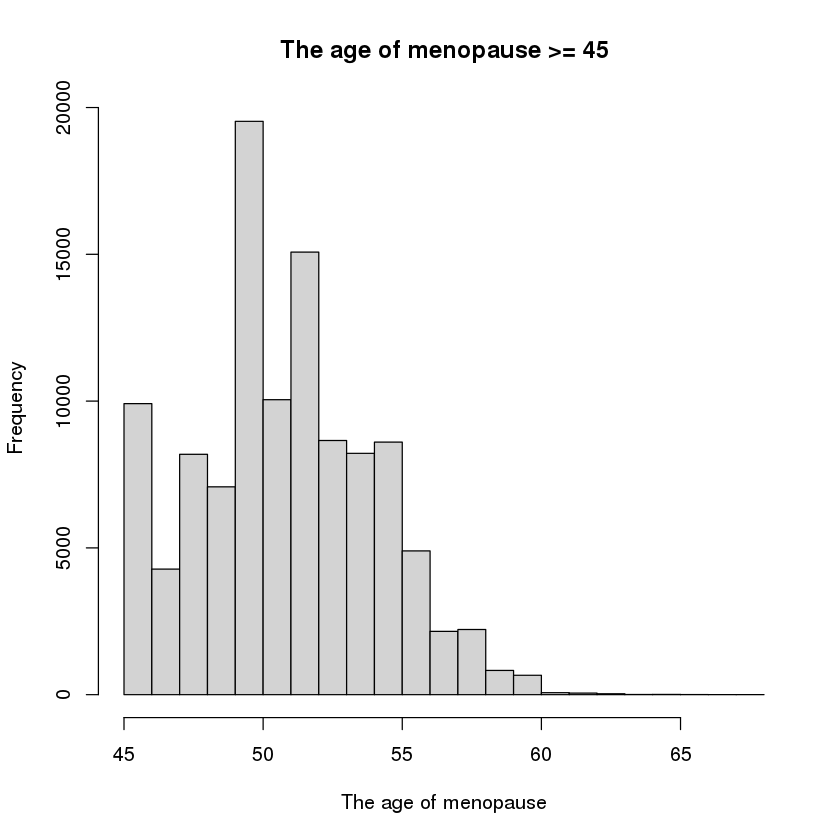

In [26]:
# describe
tmp <- na.omit(data[,c("f2714","f3581","years_of_periods")])
tmp <- subset(tmp, f3581 >= 45)
hist(tmp$f3581,main="The age of menopause >= 45",xlab="The age of menopause")

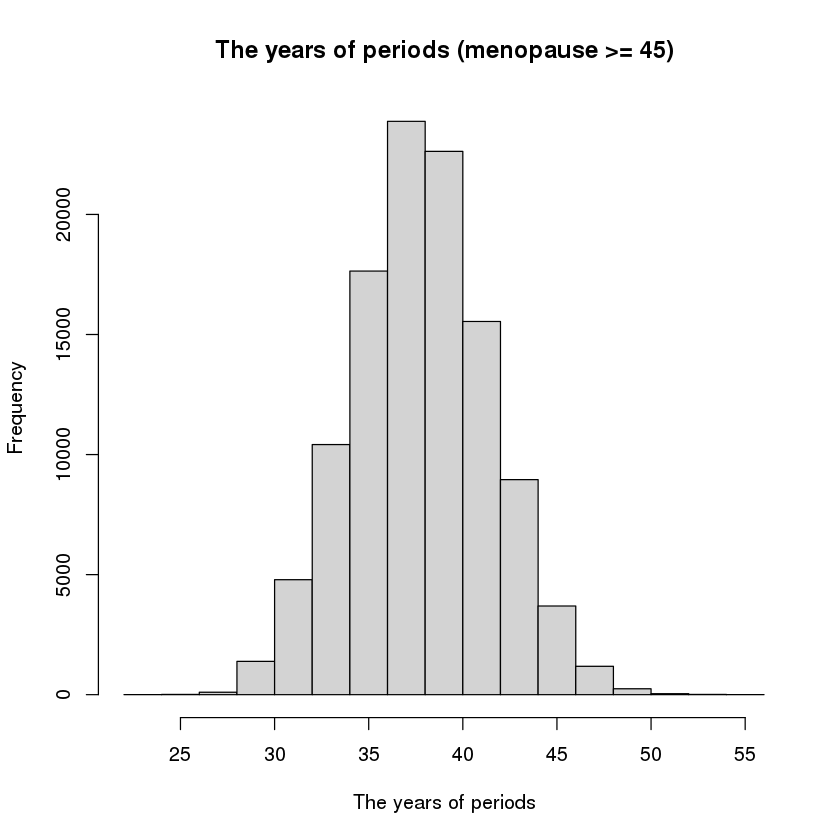

In [27]:
hist(tmp$years_of_periods,main="The years of periods (menopause >= 45)",xlab="The years of periods")

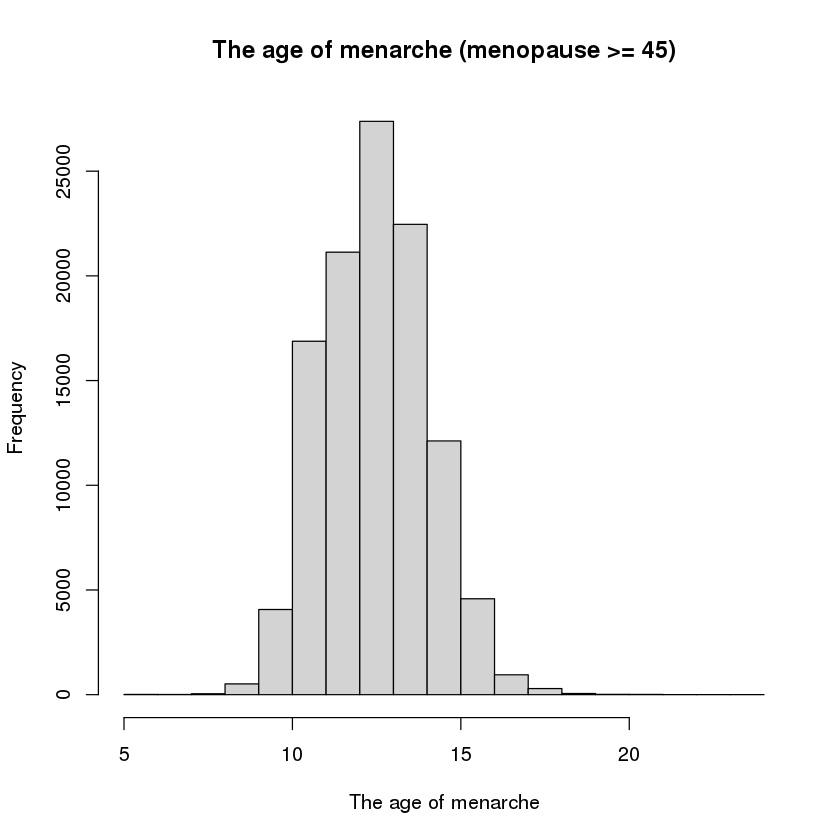

In [28]:
hist(tmp$f2714,main="The age of menarche (menopause >= 45)",xlab="The age of menarche")

In [46]:
tmp <- na.omit(data[,c("f3393","f3581","years_of_periods")])
tmp <- subset(tmp, f3581 >= 45,select=c(f3393, years_of_periods))
fit <- glm(f3393~years_of_periods,tmp, family=binomial(link='logit'))
summary(fit)


Call:
glm(formula = f3393 ~ years_of_periods, family = binomial(link = "logit"), 
    data = tmp)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.3528  -0.3290  -0.3250  -0.3204   2.4782  

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)    
(Intercept)      -3.290886   0.179483 -18.335   <2e-16 ***
years_of_periods  0.009912   0.004656   2.129   0.0332 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 29061  on 71495  degrees of freedom
Residual deviance: 29056  on 71494  degrees of freedom
AIC: 29060

Number of Fisher Scoring iterations: 5


In [47]:
dim(tmp)

[1] 71496     2

In [15]:
tmp <- na.omit(data[,c("f2247","f3581","years_of_periods")])
tmp <- subset(tmp, f3581 >= 45,select=c(f2247, years_of_periods))
fit <- glm(f2247~years_of_periods,tmp, family=binomial(link='logit'))
summary(fit)


Call:
glm(formula = f2247 ~ years_of_periods, family = binomial(link = "logit"), 
    data = tmp)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.8844  -0.8126  -0.7941   1.5748   1.6779  

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)    
(Intercept)      -1.476484   0.077337 -19.092  < 2e-16 ***
years_of_periods  0.013445   0.002006   6.704 2.03e-11 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 110583  on 93744  degrees of freedom
Residual deviance: 110538  on 93743  degrees of freedom
AIC: 110542

Number of Fisher Scoring iterations: 4


In [16]:
tmp <- na.omit(data[,c("f2257","f3581","years_of_periods")])
tmp <- subset(tmp, f3581 >= 45,select=c(f2257, years_of_periods))
fit <- glm(f2257~years_of_periods,tmp, family=binomial(link='logit'))
summary(fit)


Call:
glm(formula = f2257 ~ years_of_periods, family = binomial(link = "logit"), 
    data = tmp)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.9664  -0.9460  -0.9410   1.4265   1.4518  

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)    
(Intercept)      -0.701536   0.067512 -10.391   <2e-16 ***
years_of_periods  0.003321   0.001755   1.892   0.0585 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 138529  on 105982  degrees of freedom
Residual deviance: 138525  on 105981  degrees of freedom
AIC: 138529

Number of Fisher Scoring iterations: 4


In [17]:
tmp <- na.omit(data[,c("f2247_f2257","f3581","years_of_periods")])
tmp <- subset(tmp, f3581 >= 45,select=c(f2247_f2257, years_of_periods))
fit <- glm(f2247_f2257~years_of_periods,tmp, family=binomial(link='logit'))
summary(fit)


Call:
glm(formula = f2247_f2257 ~ years_of_periods, family = binomial(link = "logit"), 
    data = tmp)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.8108  -0.7484  -0.7364  -0.7089   1.7567  

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)    
(Intercept)      -1.624167   0.082985 -19.572  < 2e-16 ***
years_of_periods  0.012369   0.002152   5.747 9.11e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 98500  on 89276  degrees of freedom
Residual deviance: 98467  on 89275  degrees of freedom
AIC: 98471

Number of Fisher Scoring iterations: 4


### Years of periods filtering out those with menopause age < 45 and HRT

In [44]:
tmp <- data[complete.cases(data[,c("f2714","f3581","years_of_periods")]),c("f2714","f2814","f3581","years_of_periods")]
tmp <- subset(tmp, f3581 >= 45)
table(tmp$f2814, useNA = "always")


    0     1  <NA> 
62995 47010   520 

In [45]:
dim(tmp)

[1] 110525      4

In [40]:
tmp <- data[complete.cases(data[,c("f3393","f2714","f3581","years_of_periods")]),c("f3393","f2714","f2814","f3581","years_of_periods")]
tmp <- subset(tmp, f3581 >= 45 & f2814 == 0)
head(tmp)

f3393,f2714,f2814,f3581,years_of_periods
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,10.5,0,52,41.5
0,13.0,0,54,41.0
0,11.0,0,50,39.0
0,12.0,0,55,43.0
0,11.0,0,50,39.0
0,12.0,0,48,36.0


In [37]:
tmp <- data[complete.cases(data[,c("f3393","f2714","f3581","years_of_periods")]),c("f3393","f2714","f2814","f3581","years_of_periods")]
tmp <- subset(tmp, f3581 >= 45 & f2814 == 0,select=c(f3393, years_of_periods))
fit <- glm(f3393~years_of_periods,tmp, family=binomial(link='logit'))
summary(fit)


Call:
glm(formula = f3393 ~ years_of_periods, family = binomial(link = "logit"), 
    data = tmp)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.3213  -0.2968  -0.2926  -0.2884   2.5801  

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)    
(Intercept)      -3.689883   0.270397 -13.646   <2e-16 ***
years_of_periods  0.014741   0.007003   2.105   0.0353 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 14627  on 41879  degrees of freedom
Residual deviance: 14622  on 41878  degrees of freedom
AIC: 14626

Number of Fisher Scoring iterations: 6


In [41]:
tmp <- data[complete.cases(data[,c("f2247","f2714","f3581","years_of_periods")]),c("f2247","f2714","f2814","f3581","years_of_periods")]
tmp <- subset(tmp, f3581 >= 45 & f2814 == 0,select=c(f2247, years_of_periods))
fit <- glm(f2247~years_of_periods,tmp, family=binomial(link='logit'))
summary(fit)


Call:
glm(formula = f2247 ~ years_of_periods, family = binomial(link = "logit"), 
    data = tmp)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.8467  -0.7758  -0.7572   1.5912   1.7592  

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)    
(Intercept)      -1.793411   0.110012 -16.302  < 2e-16 ***
years_of_periods  0.018668   0.002849   6.552 5.68e-11 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 60978  on 53785  degrees of freedom
Residual deviance: 60935  on 53784  degrees of freedom
AIC: 60939

Number of Fisher Scoring iterations: 4


In [42]:
tmp <- data[complete.cases(data[,c("f2257","f2714","f3581","years_of_periods")]),c("f2257","f2714","f2814","f3581","years_of_periods")]
tmp <- subset(tmp, f3581 >= 45 & f2814 == 0,select=c(f2257, years_of_periods))
fit <- glm(f2257~years_of_periods,tmp, family=binomial(link='logit'))
summary(fit)


Call:
glm(formula = f2257 ~ years_of_periods, family = binomial(link = "logit"), 
    data = tmp)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.9346  -0.9070  -0.9002   1.4689   1.5186  

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)    
(Intercept)      -0.914710   0.095192  -9.609   <2e-16 ***
years_of_periods  0.006131   0.002473   2.479   0.0132 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 77196  on 60444  degrees of freedom
Residual deviance: 77190  on 60443  degrees of freedom
AIC: 77194

Number of Fisher Scoring iterations: 4


In [43]:
tmp <- data[complete.cases(data[,c("f2247_f2257","f2714","f3581","years_of_periods")]),c("f2247_f2257","f2714","f2814","f3581","years_of_periods")]
tmp <- subset(tmp, f3581 >= 45 & f2814 == 0,select=c(f2247_f2257, years_of_periods))
fit <- glm(f2247_f2257~years_of_periods,tmp, family=binomial(link='logit'))
summary(fit)


Call:
glm(formula = f2247_f2257 ~ years_of_periods, family = binomial(link = "logit"), 
    data = tmp)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.7775  -0.7101  -0.6925  -0.6639   1.8507  

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)    
(Intercept)      -2.004752   0.118914 -16.859  < 2e-16 ***
years_of_periods  0.018888   0.003079   6.135 8.54e-10 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 53728  on 51275  degrees of freedom
Residual deviance: 53691  on 51274  degrees of freedom
AIC: 53695

Number of Fisher Scoring iterations: 4


### Years of periods filtering out those with menopause age < 45 and adding HRT as a covariate

In [6]:
tmp <- na.omit(data[,c("f3393","f2814","f3581","years_of_periods")])
tmp <- subset(tmp, f3581 >= 45,select=c(f3393, f2814,years_of_periods))
fit <- glm(f3393~years_of_periods+f2814,tmp, family=binomial(link='logit'))
summary(fit)


Call:
glm(formula = f3393 ~ years_of_periods + f2814, family = binomial(link = "logit"), 
    data = tmp)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.3952  -0.3626  -0.2972  -0.2915   2.5593  

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)    
(Intercept)      -3.503524   0.179714 -19.495   <2e-16 ***
years_of_periods  0.009892   0.004637   2.133   0.0329 *  
f2814             0.448794   0.034031  13.188   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 28807  on 71195  degrees of freedom
Residual deviance: 28630  on 71193  degrees of freedom
AIC: 28636

Number of Fisher Scoring iterations: 6


In [7]:
tmp <- na.omit(data[,c("f2247","f2814","f3581","years_of_periods")])
tmp <- subset(tmp, f3581 >= 45,select=c(f2247, f2814,years_of_periods))
fit <- glm(f2247~years_of_periods+f2814,tmp, family=binomial(link='logit'))
summary(fit)


Call:
glm(formula = f2247 ~ years_of_periods + f2814, family = binomial(link = "logit"), 
    data = tmp)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.9398  -0.8342  -0.7641   1.5155   1.7316  

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)    
(Intercept)      -1.603466   0.077809 -20.608  < 2e-16 ***
years_of_periods  0.013727   0.002008   6.834 8.23e-12 ***
f2814             0.260048   0.014741  17.642  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 109997  on 93320  degrees of freedom
Residual deviance: 109642  on 93318  degrees of freedom
AIC: 109648

Number of Fisher Scoring iterations: 4


In [8]:
tmp <- na.omit(data[,c("f2257","f2814","f3581","years_of_periods")])
tmp <- subset(tmp, f3581 >= 45,select=c(f2257, f2814,years_of_periods))
fit <- glm(f2257~years_of_periods+f2814,tmp, family=binomial(link='logit'))
summary(fit)


Call:
glm(formula = f2257 ~ years_of_periods + f2814, family = binomial(link = "logit"), 
    data = tmp)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.0202  -0.9870  -0.9037   1.3724   1.5015  

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)    
(Intercept)      -0.820047   0.067993 -12.061   <2e-16 ***
years_of_periods  0.003662   0.001760   2.081   0.0374 *  
f2814             0.236969   0.012938  18.315   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 137809  on 105482  degrees of freedom
Residual deviance: 137470  on 105480  degrees of freedom
AIC: 137476

Number of Fisher Scoring iterations: 4


In [9]:
tmp <- na.omit(data[,c("f2247_f2257","f2814","f3581","years_of_periods")])
tmp <- subset(tmp, f3581 >= 45,select=c(f2247_f2257, f2814,years_of_periods))
fit <- glm(f2247_f2257~years_of_periods+f2814,tmp, family=binomial(link='logit'))
summary(fit)


Call:
glm(formula = f2247_f2257 ~ years_of_periods + f2814, family = binomial(link = "logit"), 
    data = tmp)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.8685  -0.7801  -0.7031  -0.6721   1.8163  

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)    
(Intercept)      -1.765432   0.083471 -21.150  < 2e-16 ***
years_of_periods  0.012663   0.002155   5.877 4.17e-09 ***
f2814             0.288436   0.015795  18.261  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 97951  on 88872  degrees of freedom
Residual deviance: 97587  on 88870  degrees of freedom
AIC: 97593

Number of Fisher Scoring iterations: 4


### Years of periods filtering out those with menopause age < 45 and adding the age of ARHI onset as a covariate

In [10]:
tmp <- na.omit(data[,c("f3393","f3393_age","f3581","years_of_periods")])
tmp <- subset(tmp, f3581 >= 45,select=c(f3393, f3393_age,years_of_periods))
fit <- glm(f3393~years_of_periods+f3393_age,tmp, family=binomial(link='logit'))
summary(fit)


Call:
glm(formula = f3393 ~ years_of_periods + f3393_age, family = binomial(link = "logit"), 
    data = tmp)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.0740  -0.3641  -0.2792  -0.2084   3.3018  

Coefficients:
                   Estimate Std. Error z value Pr(>|z|)    
(Intercept)      -11.264254   0.275518 -40.884   <2e-16 ***
years_of_periods  -0.006851   0.004610  -1.486    0.137    
f3393_age          0.137978   0.003356  41.112   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 29061  on 71495  degrees of freedom
Residual deviance: 27234  on 71493  degrees of freedom
AIC: 27240

Number of Fisher Scoring iterations: 6


In [11]:
tmp <- na.omit(data[,c("f2247","f2247_age","f3581","years_of_periods")])
tmp <- subset(tmp, f3581 >= 45,select=c(f2247, f2247_age,years_of_periods))
fit <- glm(f2247~years_of_periods+f2247_age,tmp, family=binomial(link='logit'))
summary(fit)


Call:
glm(formula = f2247 ~ years_of_periods + f2247_age, family = binomial(link = "logit"), 
    data = tmp)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.0099  -0.8244  -0.7781   1.5222   1.8414  

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)    
(Intercept)      -2.749652   0.106492  -25.82  < 2e-16 ***
years_of_periods  0.008391   0.002022    4.15 3.32e-05 ***
f2247_age         0.024110   0.001371   17.59  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 110583  on 93744  degrees of freedom
Residual deviance: 110227  on 93742  degrees of freedom
AIC: 110233

Number of Fisher Scoring iterations: 4


In [12]:
tmp <- na.omit(data[,c("f2257","f2257_age","f3581","years_of_periods")])
tmp <- subset(tmp, f3581 >= 45,select=c(f2257, f2257_age,years_of_periods))
fit <- glm(f2257~years_of_periods+f2257_age,tmp, family=binomial(link='logit'))
summary(fit)


Call:
glm(formula = f2257 ~ years_of_periods + f2257_age, family = binomial(link = "logit"), 
    data = tmp)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.0274  -0.9514  -0.9282   1.4142   1.5206  

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)    
(Intercept)      -1.200506   0.091735 -13.087  < 2e-16 ***
years_of_periods  0.001203   0.001774   0.678    0.498    
f2257_age         0.009568   0.001188   8.055 7.94e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 138529  on 105982  degrees of freedom
Residual deviance: 138460  on 105980  degrees of freedom
AIC: 138466

Number of Fisher Scoring iterations: 4


In [13]:
tmp <- na.omit(data[,c("f2247_f2257","f2247_f2257_age","f3581","years_of_periods")])
tmp <- subset(tmp, f3581 >= 45,select=c(f2247_f2257, f2247_f2257_age,years_of_periods))
fit <- glm(f2247_f2257~years_of_periods+f2247_f2257_age,tmp, family=binomial(link='logit'))
summary(fit)


Call:
glm(formula = f2247_f2257 ~ years_of_periods + f2247_f2257_age, 
    family = binomial(link = "logit"), data = tmp)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.8914  -0.7570  -0.7277  -0.6654   1.8726  

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)    
(Intercept)      -2.554115   0.113717 -22.460  < 2e-16 ***
years_of_periods  0.008570   0.002170   3.949 7.84e-05 ***
f2247_f2257_age   0.017705   0.001467  12.066  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 98500  on 89276  degrees of freedom
Residual deviance: 98321  on 89274  degrees of freedom
AIC: 98327

Number of Fisher Scoring iterations: 4


### Years of periods filtering out those with menopause age < 45 and adding HRT and the age of ARHI onset as covariates

In [14]:
tmp <- na.omit(data[,c("f3393","f3393_age","f2814","f3581","years_of_periods")])
tmp <- subset(tmp, f3581 >= 45,select=c(f3393, f3393_age, f2814, years_of_periods))
fit <- glm(f3393~years_of_periods+f3393_age+f2814,tmp, family=binomial(link='logit'))
summary(fit)


Call:
glm(formula = f3393 ~ years_of_periods + f3393_age + f2814, family = binomial(link = "logit"), 
    data = tmp)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.0643  -0.3669  -0.2802  -0.2008   3.3260  

Coefficients:
                   Estimate Std. Error z value Pr(>|z|)    
(Intercept)      -11.298066   0.278403 -40.582  < 2e-16 ***
years_of_periods  -0.006479   0.004615  -1.404     0.16    
f3393_age          0.136606   0.003434  39.777  < 2e-16 ***
f2814              0.213751   0.034748   6.151 7.68e-10 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 28807  on 71195  degrees of freedom
Residual deviance: 26949  on 71192  degrees of freedom
AIC: 26957

Number of Fisher Scoring iterations: 6


In [16]:
tmp <- na.omit(data[,c("f2247","f2247_age","f2814","f3581","years_of_periods")])
tmp <- subset(tmp, f3581 >= 45,select=c(f2247, f2247_age, f2814, years_of_periods))
fit <- glm(f2247~years_of_periods+f2247_age+f2814,tmp, family=binomial(link='logit'))
summary(fit)


Call:
glm(formula = f2247 ~ years_of_periods + f2247_age + f2814, family = binomial(link = "logit"), 
    data = tmp)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.0326  -0.8266  -0.7655   1.4936   1.8546  

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)    
(Intercept)      -2.661233   0.107251 -24.813  < 2e-16 ***
years_of_periods  0.009396   0.002027   4.635 3.57e-06 ***
f2247_age         0.020445   0.001412  14.480  < 2e-16 ***
f2814             0.214510   0.015071  14.234  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 109997  on 93320  degrees of freedom
Residual deviance: 109432  on 93317  degrees of freedom
AIC: 109440

Number of Fisher Scoring iterations: 4


In [17]:
tmp <- na.omit(data[,c("f2257","f2257_age","f2814","f3581","years_of_periods")])
tmp <- subset(tmp, f3581 >= 45,select=c(f2257, f2257_age, f2814, years_of_periods))
fit <- glm(f2257~years_of_periods+f2257_age+f2814,tmp, family=binomial(link='logit'))
summary(fit)


Call:
glm(formula = f2257 ~ years_of_periods + f2257_age + f2814, family = binomial(link = "logit"), 
    data = tmp)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.0475  -0.9730  -0.9009   1.3745   1.5327  

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)    
(Intercept)      -1.113263   0.092411 -12.047  < 2e-16 ***
years_of_periods  0.002372   0.001780   1.332    0.183    
f2257_age         0.005747   0.001225   4.693 2.69e-06 ***
f2814             0.223789   0.013237  16.906  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 137809  on 105482  degrees of freedom
Residual deviance: 137448  on 105479  degrees of freedom
AIC: 137456

Number of Fisher Scoring iterations: 4


In [18]:
tmp <- na.omit(data[,c("f2247_f2257","f2247_f2257_age","f2814","f3581","years_of_periods")])
tmp <- subset(tmp, f3581 >= 45,select=c(f2247_f2257, f2247_f2257_age, f2814, years_of_periods))
fit <- glm(f2247_f2257~years_of_periods+f2247_f2257_age+f2814,tmp, family=binomial(link='logit'))
summary(fit)


Call:
glm(formula = f2247_f2257 ~ years_of_periods + f2247_f2257_age + 
    f2814, family = binomial(link = "logit"), data = tmp)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.9172  -0.7709  -0.7059  -0.6466   1.8863  

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)    
(Intercept)      -2.447867   0.114592 -21.362  < 2e-16 ***
years_of_periods  0.009790   0.002176   4.500 6.81e-06 ***
f2247_f2257_age   0.013264   0.001515   8.755  < 2e-16 ***
f2814             0.258597   0.016151  16.011  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 97951  on 88872  degrees of freedom
Residual deviance: 97510  on 88869  degrees of freedom
AIC: 97518

Number of Fisher Scoring iterations: 4


### Years of periods adding HRT, ARHI onset age and EM status as covariates

In [3]:
table(data$f3581, useNA = "always")


   18    19    20    21    22    23    24    25  25.5    26    27    28    29 
    7     7    19    18    12    27    17    37     1    47    63    89   162 
 29.5    30    31  31.5    32  32.5    33  33.5    34  34.5    35  35.5    36 
    1   188   146     3   293     1   184     1   281     3   485     1   462 
 36.5    37  37.5    38  38.5    39  39.5    40  40.5    41  41.5    42  42.5 
   10   441     4   947     8   978    27  2830    43  1327    35  3036    56 
   43  43.5    44  44.5    45  45.5    46  46.5    47  47.5    48  48.5    49 
 2050    48  2016    61  6416   103  3635    54  4305   148  8228   192  7061 
 49.5    50  50.5    51  51.5    52  52.5    53  53.5    54  54.5    55  55.5 
  263 19810   386  9899   403 14995   390  8463   235  8153   233  8580   172 
   56  56.5    57  57.5    58  58.5    59  59.5    60  60.5    61  61.5    62 
 4816    60  2141    39  2227    25   823    13   671     2    67     1    52 
 62.5    63    64    65    66    67    68  <NA> 
  

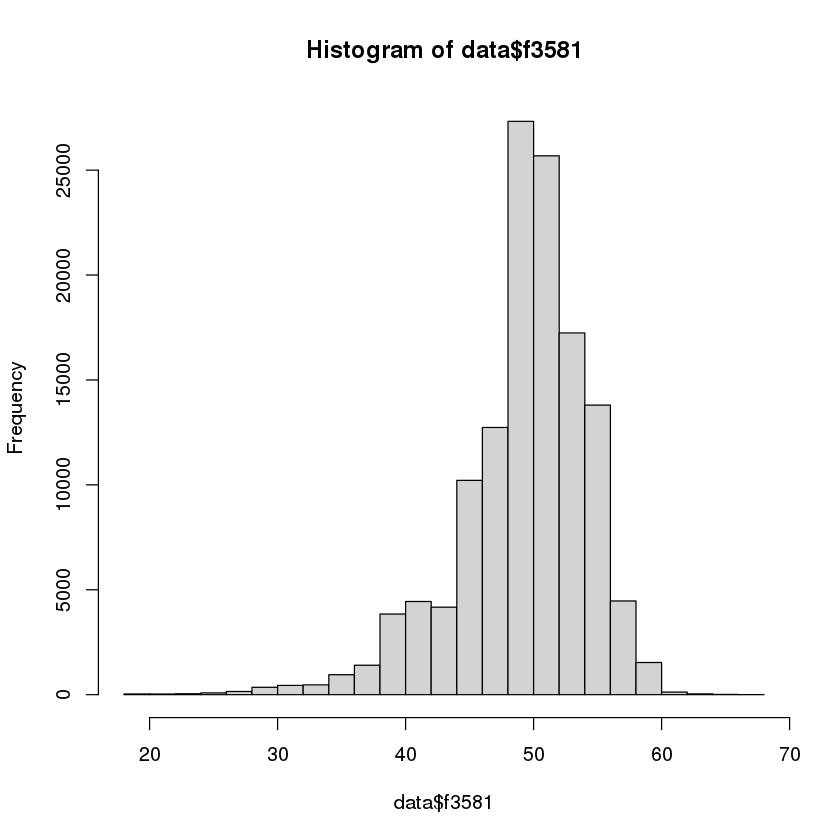

In [4]:
hist(data$f3581)

In [8]:
sum(data$f3581<40,na.rm=T)

[1] 4970

In [9]:
sum((data$f3581<45)&(data$f3581>=40),na.rm=T)

[1] 11502

In [10]:
sum(data$f3581>=45,na.rm=T)

[1] 113112

In [11]:
4970+11502+113112

[1] 129584

In [12]:
sum(is.na(data$f3581))

[1] 59515

In [13]:
129584+59515

[1] 189099

In [28]:
# Early menopause set as 1, natural as 0, the others as NA
data$EM <- 0
data[(data$f3581<45)&(data$f3581>=40),"EM"] <- 1
data[data$f3581>=45,"EM"] <- 0
data[data$f3581<40,"EM"] <- NA
data[is.na(data$f3581),"EM"] <- NA
table(data$EM, useNA = "always")


     0      1   <NA> 
113112  11502  64485 

In [29]:
tmp <- na.omit(data[,c("f3393","f3393_age","f2814","f3581","years_of_periods","EM")])
fit <- glm(f3393~years_of_periods+f3393_age+f2814+EM,tmp, family=binomial(link='logit'))
summary(fit)


Call:
glm(formula = f3393 ~ years_of_periods + f3393_age + f2814 + 
    EM, family = binomial(link = "logit"), data = tmp)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.0571  -0.3705  -0.2815  -0.2016   3.3233  

Coefficients:
                   Estimate Std. Error z value Pr(>|z|)    
(Intercept)      -11.261571   0.266936 -42.188  < 2e-16 ***
years_of_periods  -0.005593   0.004525  -1.236    0.216    
f3393_age          0.135498   0.003230  41.946  < 2e-16 ***
f2814              0.214734   0.032980   6.511 7.46e-11 ***
EM                 0.090548   0.069046   1.311    0.190    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 32022  on 78347  degrees of freedom
Residual deviance: 29935  on 78343  degrees of freedom
AIC: 29945

Number of Fisher Scoring iterations: 6


In [31]:
tmp <- na.omit(data[,c("f2247","f2247_age","f2814","f3581","years_of_periods","EM")])
fit <- glm(f2247~years_of_periods+f2247_age+f2814+EM,tmp, family=binomial(link='logit'))
summary(fit)


Call:
glm(formula = f2247 ~ years_of_periods + f2247_age + f2814 + 
    EM, family = binomial(link = "logit"), data = tmp)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.0376  -0.8290  -0.7671   1.4911   1.8615  

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)    
(Intercept)      -2.706249   0.102989 -26.277  < 2e-16 ***
years_of_periods  0.008998   0.001985   4.532 5.84e-06 ***
f2247_age         0.021470   0.001307  16.426  < 2e-16 ***
f2814             0.209615   0.014330  14.628  < 2e-16 ***
EM                0.118755   0.030342   3.914 9.08e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 121315  on 102758  degrees of freedom
Residual deviance: 120668  on 102754  degrees of freedom
AIC: 120678

Number of Fisher Scoring iterations: 4


In [32]:
tmp <- na.omit(data[,c("f2257","f2257_age","f2814","f3581","years_of_periods","EM")])
fit <- glm(f2257~years_of_periods+f2257_age+f2814+EM,tmp, family=binomial(link='logit'))
summary(fit)


Call:
glm(formula = f2257 ~ years_of_periods + f2257_age + f2814 + 
    EM, family = binomial(link = "logit"), data = tmp)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.0550  -0.9727  -0.9014   1.3748   1.5431  

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)    
(Intercept)      -1.180387   0.088703 -13.307  < 2e-16 ***
years_of_periods  0.002050   0.001742   1.176   0.2395    
f2257_age         0.007117   0.001131   6.295 3.07e-10 ***
f2814             0.215543   0.012576  17.140  < 2e-16 ***
EM                0.052168   0.026461   1.971   0.0487 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 152034  on 116234  degrees of freedom
Residual deviance: 151631  on 116230  degrees of freedom
AIC: 151641

Number of Fisher Scoring iterations: 4


In [33]:
tmp <- na.omit(data[,c("f2247_f2257","f2247_f2257_age","f2814","f3581","years_of_periods","EM")])
fit <- glm(f2247_f2257~years_of_periods+f2247_f2257_age+f2814+EM,tmp, family=binomial(link='logit'))
summary(fit)


Call:
glm(formula = f2247_f2257 ~ years_of_periods + f2247_f2257_age + 
    f2814 + EM, family = binomial(link = "logit"), data = tmp)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.9263  -0.7716  -0.7091  -0.6411   1.9008  

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)    
(Intercept)      -2.535306   0.110033 -23.041  < 2e-16 ***
years_of_periods  0.009007   0.002129   4.230 2.33e-05 ***
f2247_f2257_age   0.015274   0.001400  10.906  < 2e-16 ***
f2814             0.247953   0.015349  16.155  < 2e-16 ***
EM                0.125580   0.032382   3.878 0.000105 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 108149  on 97881  degrees of freedom
Residual deviance: 107646  on 97877  degrees of freedom
AIC: 107656

Number of Fisher Scoring iterations: 4


### Years of periods adding HRT, ARHI onset age and PM status as covariates

In [34]:
# Premature menopause set as 1, natural as 0, the others as NA
data$PM <- 0
data[(data$f3581<45)&(data$f3581>=40),"PM"] <- NA
data[data$f3581>=45,"PM"] <- 0
data[data$f3581<40,"PM"] <- 1
data[is.na(data$f3581),"PM"] <- NA
table(data$PM, useNA = "always")


     0      1   <NA> 
113112   4970  71017 

In [35]:
tmp <- na.omit(data[,c("f3393","f3393_age","f2814","f3581","years_of_periods","PM")])
fit <- glm(f3393~years_of_periods+f3393_age+f2814+PM,tmp, family=binomial(link='logit'))
summary(fit)


Call:
glm(formula = f3393 ~ years_of_periods + f3393_age + f2814 + 
    PM, family = binomial(link = "logit"), data = tmp)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.0996  -0.3702  -0.2824  -0.2022   3.4092  

Coefficients:
                   Estimate Std. Error z value Pr(>|z|)    
(Intercept)      -11.203166   0.269733 -41.534  < 2e-16 ***
years_of_periods  -0.006950   0.004455  -1.560    0.119    
f3393_age          0.135494   0.003334  40.638  < 2e-16 ***
f2814              0.202811   0.034013   5.963 2.48e-09 ***
PM                 0.127998   0.105531   1.213    0.225    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 30279  on 74259  degrees of freedom
Residual deviance: 28331  on 74255  degrees of freedom
AIC: 28341

Number of Fisher Scoring iterations: 6


In [36]:
tmp <- na.omit(data[,c("f2247","f2247_age","f2814","f3581","years_of_periods","PM")])
fit <- glm(f2247~years_of_periods+f2247_age+f2814+PM,tmp, family=binomial(link='logit'))
summary(fit)


Call:
glm(formula = f2247 ~ years_of_periods + f2247_age + f2814 + 
    PM, family = binomial(link = "logit"), data = tmp)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.0262  -0.8281  -0.7672   1.4946   1.8490  

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)    
(Intercept)      -2.611465   0.103842 -25.149  < 2e-16 ***
years_of_periods  0.008633   0.001962   4.399 1.09e-05 ***
f2247_age         0.020135   0.001356  14.852  < 2e-16 ***
f2814             0.210949   0.014777  14.275  < 2e-16 ***
PM                0.185136   0.047287   3.915 9.03e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 114917  on 97379  degrees of freedom
Residual deviance: 114344  on 97375  degrees of freedom
AIC: 114354

Number of Fisher Scoring iterations: 4


In [37]:
tmp <- na.omit(data[,c("f2257","f2257_age","f2814","f3581","years_of_periods","PM")])
fit <- glm(f2257~years_of_periods+f2257_age+f2814+PM,tmp, family=binomial(link='logit'))
summary(fit)


Call:
glm(formula = f2257 ~ years_of_periods + f2257_age + f2814 + 
    PM, family = binomial(link = "logit"), data = tmp)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.0607  -0.9771  -0.9018   1.3735   1.5305  

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)    
(Intercept)      -1.097172   0.089426 -12.269  < 2e-16 ***
years_of_periods  0.002219   0.001722   1.288   0.1976    
f2257_age         0.005594   0.001174   4.763  1.9e-06 ***
f2814             0.221655   0.012975  17.084  < 2e-16 ***
PM                0.096134   0.041200   2.333   0.0196 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 144082  on 110167  degrees of freedom
Residual deviance: 143703  on 110163  degrees of freedom
AIC: 143713

Number of Fisher Scoring iterations: 4


In [38]:
tmp <- na.omit(data[,c("f2247_f2257","f2247_f2257_age","f2814","f3581","years_of_periods","PM")])
fit <- glm(f2247_f2257~years_of_periods+f2247_f2257_age+f2814+PM,tmp, family=binomial(link='logit'))
summary(fit)


Call:
glm(formula = f2247_f2257 ~ years_of_periods + f2247_f2257_age + 
    f2814 + PM, family = binomial(link = "logit"), data = tmp)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.9133  -0.7736  -0.7077  -0.6474   1.8842  

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)    
(Intercept)      -2.413340   0.110869 -21.768  < 2e-16 ***
years_of_periods  0.008796   0.002104   4.181 2.91e-05 ***
f2247_f2257_age   0.013343   0.001452   9.187  < 2e-16 ***
f2814             0.256147   0.015835  16.176  < 2e-16 ***
PM                0.203275   0.050255   4.045 5.24e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 102450  on 92764  degrees of freedom
Residual deviance: 101991  on 92760  degrees of freedom
AIC: 102001

Number of Fisher Scoring iterations: 4


### Investigate the association between the age of menarche and the age of menopause

In [35]:
tmp <- na.omit(data[,c("f2714","f3581")])
fit <- lm(f3581~f2714,data=tmp)
summary(fit)


Call:
lm(formula = f3581 ~ f2714, data = tmp)

Residuals:
    Min      1Q  Median      3Q     Max 
-31.822  -1.847   0.254   3.204  18.204 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 49.467422   0.116967 422.919  < 2e-16 ***
f2714        0.025297   0.008965   2.822  0.00477 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.075 on 126638 degrees of freedom
Multiple R-squared:  6.288e-05,	Adjusted R-squared:  5.498e-05 
F-statistic: 7.963 on 1 and 126638 DF,  p-value: 0.004775


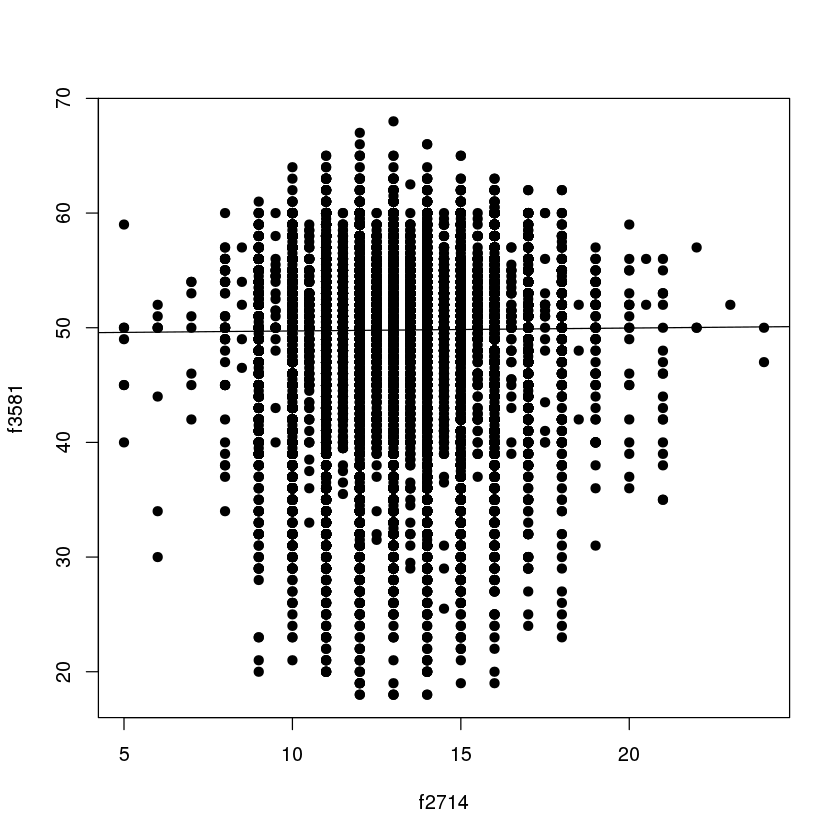

In [36]:
plot(f3581~f2714,data=tmp,pch=19)
abline(fit)

In [37]:
tmp <- data[data$f3581>=45,]
tmp <- na.omit(tmp[,c("f2714","f3581")])
fit <- lm(f3581~f2714,data=tmp)
summary(fit)


Call:
lm(formula = f3581 ~ f2714, data = tmp)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.2448 -2.2382 -0.2389  2.2611 16.7611 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) 51.2484885  0.0821622 623.748   <2e-16 ***
f2714       -0.0007365  0.0062950  -0.117    0.907    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.29 on 110523 degrees of freedom
Multiple R-squared:  1.238e-07,	Adjusted R-squared:  -8.924e-06 
F-statistic: 0.01369 on 1 and 110523 DF,  p-value: 0.9069


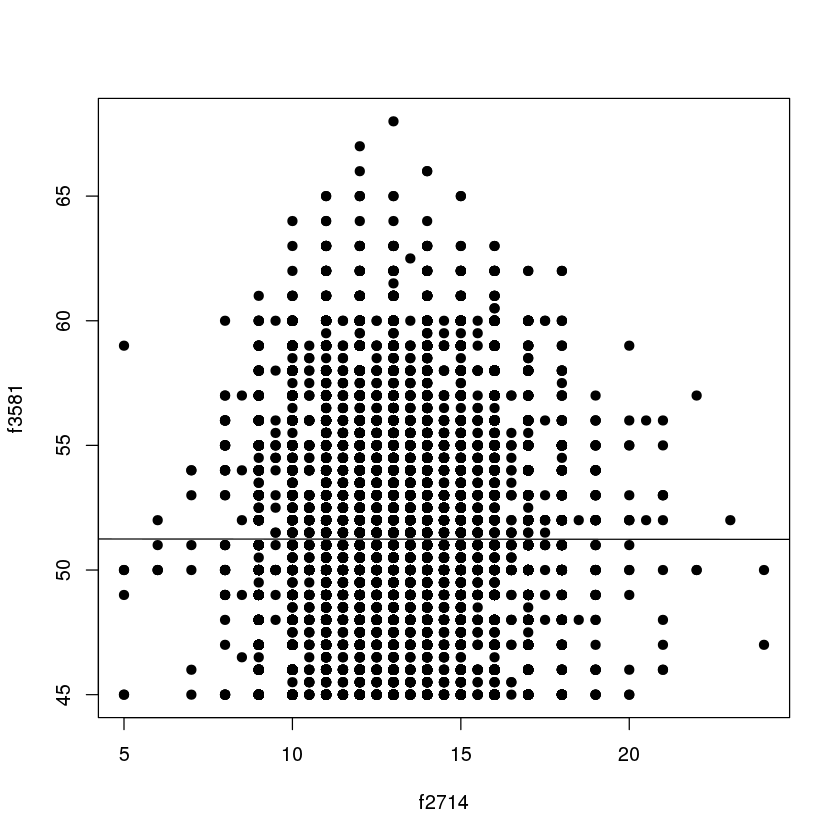

In [38]:
plot(f3581~f2714,data=tmp,pch=19)
abline(fit)

In [43]:
tmp <- data[(data$f3581>=40)&(data$f3581<45),]
tmp <- na.omit(tmp[,c("f2714","f3581")])
fit <- lm(f3581~f2714,data=tmp)
summary(fit)


Call:
lm(formula = f3581 ~ f2714, data = tmp)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.09331 -1.01417  0.06497  1.06497  2.64411 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 42.192241   0.104188 404.962   <2e-16 ***
f2714       -0.019786   0.007995  -2.475   0.0133 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.423 on 11236 degrees of freedom
Multiple R-squared:  0.0005448,	Adjusted R-squared:  0.0004558 
F-statistic: 6.124 on 1 and 11236 DF,  p-value: 0.01335


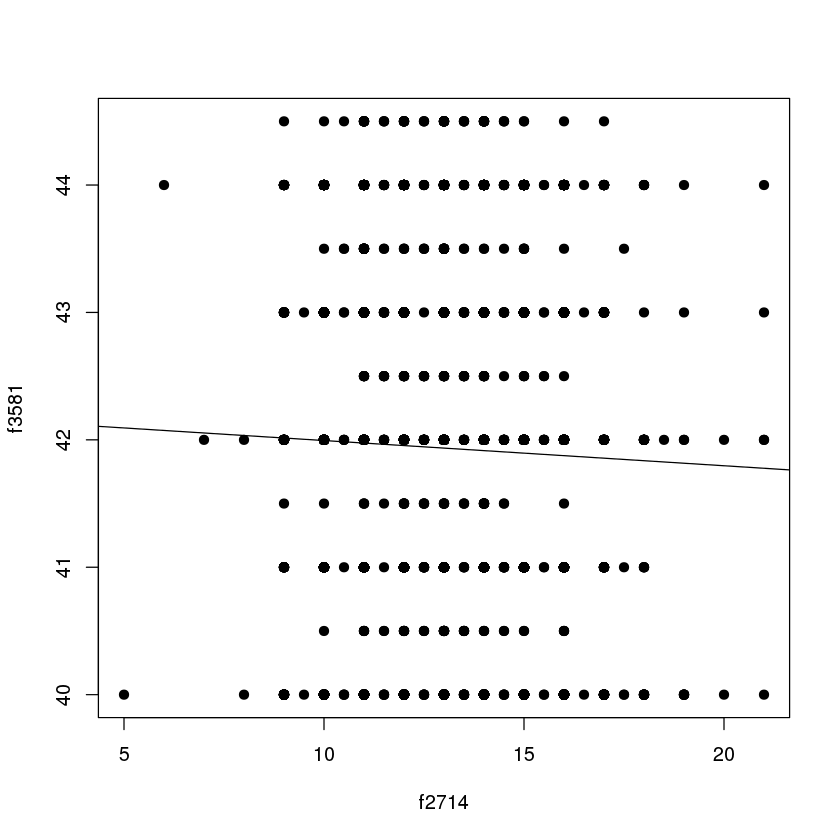

In [44]:
plot(f3581~f2714,data=tmp,pch=19)
abline(fit)

In [45]:
tmp <- data[data$f3581<40,]
tmp <- na.omit(tmp[,c("f2714","f3581")])
fit <- lm(f3581~f2714,data=tmp)
summary(fit)


Call:
lm(formula = f3581 ~ f2714, data = tmp)

Residuals:
     Min       1Q   Median       3Q      Max 
-17.2275  -2.1729   0.9364   2.8818   4.4911 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 35.88331    0.41233  87.026   <2e-16 ***
f2714       -0.05465    0.03175  -1.721   0.0853 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.976 on 4875 degrees of freedom
Multiple R-squared:  0.0006073,	Adjusted R-squared:  0.0004023 
F-statistic: 2.962 on 1 and 4875 DF,  p-value: 0.08529


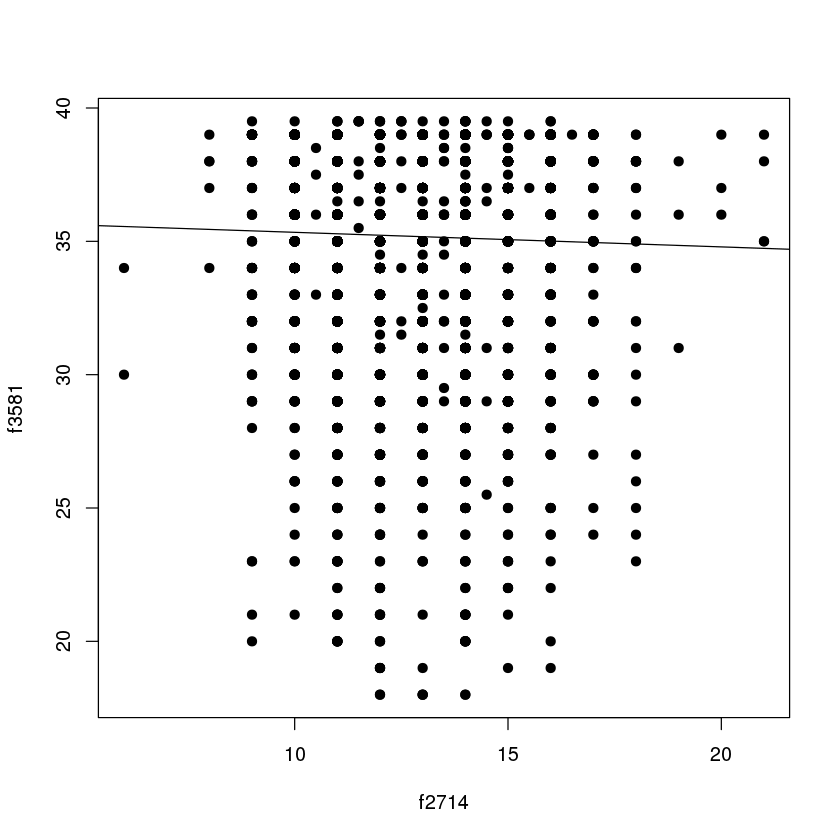

In [46]:
plot(f3581~f2714,data=tmp,pch=19)
abline(fit)

### Investigate the association between the age of menarche and the years of periods

In [8]:
tmp <- na.omit(data[,c("f2714","years_of_periods")])
fit <- lm(years_of_periods~f2714,data=tmp)
summary(fit)


Call:
lm(formula = years_of_periods ~ f2714, data = tmp)

Residuals:
    Min      1Q  Median      3Q     Max 
-31.822  -1.847   0.254   3.204  18.204 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 49.467422   0.116967   422.9   <2e-16 ***
f2714       -0.974703   0.008965  -108.7   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.075 on 126638 degrees of freedom
Multiple R-squared:  0.08538,	Adjusted R-squared:  0.08537 
F-statistic: 1.182e+04 on 1 and 126638 DF,  p-value: < 2.2e-16


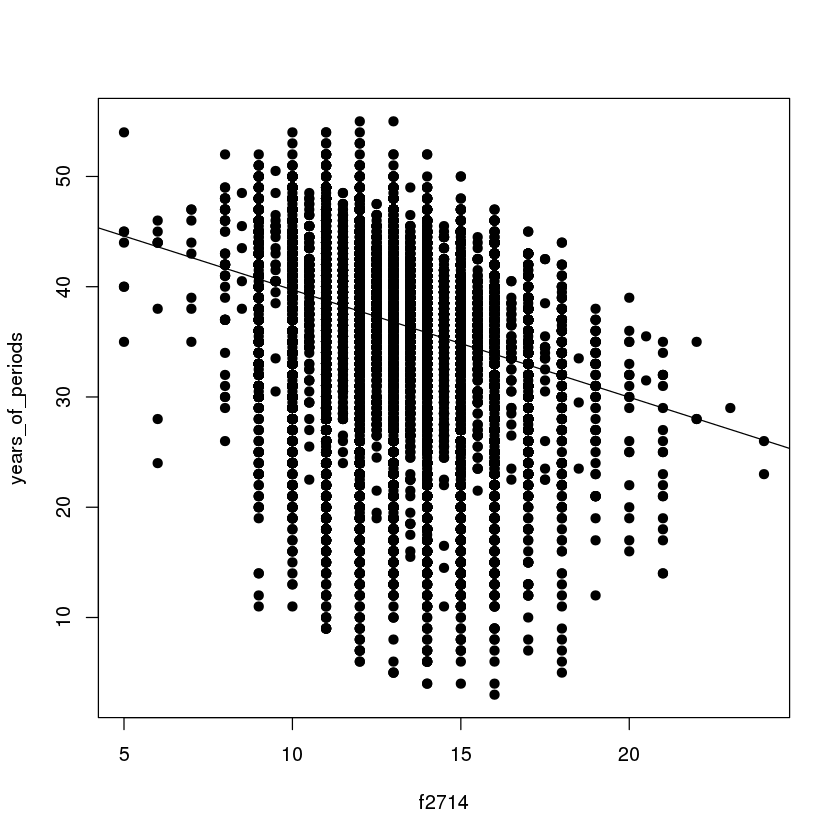

In [12]:
plot(years_of_periods~f2714,data=tmp,pch=19)
abline(fit)

In [15]:
tmp <- data[data$f3581>=45,]
tmp <- na.omit(tmp[,c("f2714","years_of_periods")])
fit <- lm(years_of_periods~f2714,data=tmp)
summary(fit)


Call:
lm(formula = years_of_periods ~ f2714, data = tmp)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.2448 -2.2382 -0.2389  2.2611 16.7611 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 51.248489   0.082162   623.7   <2e-16 ***
f2714       -1.000736   0.006295  -159.0   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.29 on 110523 degrees of freedom
Multiple R-squared:  0.1861,	Adjusted R-squared:  0.1861 
F-statistic: 2.527e+04 on 1 and 110523 DF,  p-value: < 2.2e-16


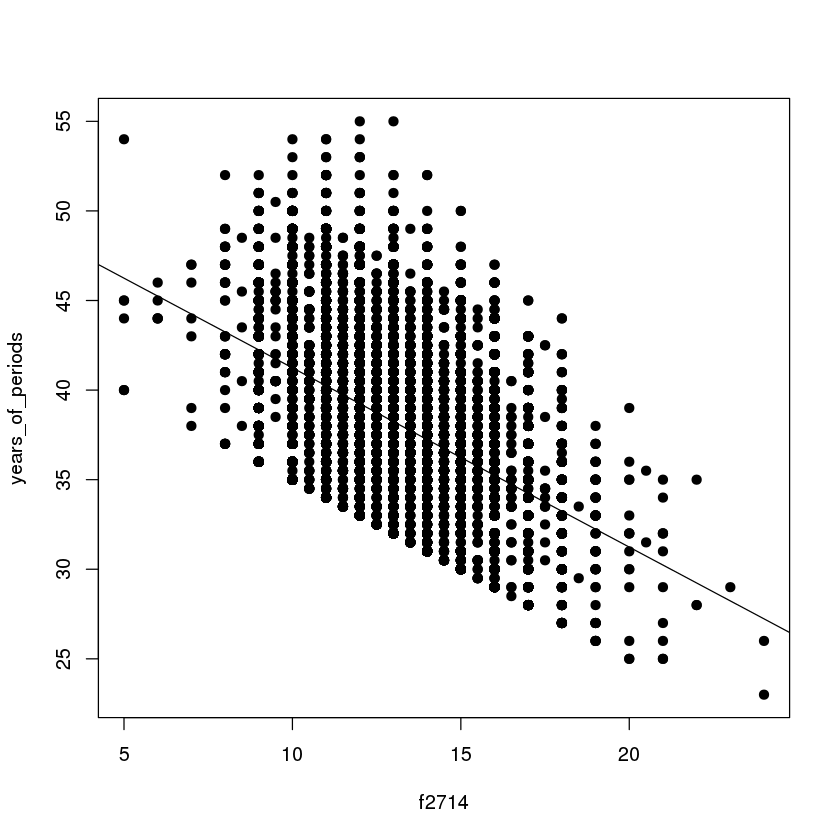

In [16]:
plot(years_of_periods~f2714,data=tmp,pch=19)
abline(fit)

In [17]:
tmp <- data[(data$f3581>=40)&(data$f3581<45),]
tmp <- na.omit(tmp[,c("f2714","years_of_periods")])
fit <- lm(years_of_periods~f2714,data=tmp)
summary(fit)


Call:
lm(formula = years_of_periods ~ f2714, data = tmp)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.09331 -1.01417  0.06497  1.06497  2.64411 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 42.192241   0.104188   405.0   <2e-16 ***
f2714       -1.019786   0.007995  -127.6   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.423 on 11236 degrees of freedom
Multiple R-squared:  0.5915,	Adjusted R-squared:  0.5915 
F-statistic: 1.627e+04 on 1 and 11236 DF,  p-value: < 2.2e-16


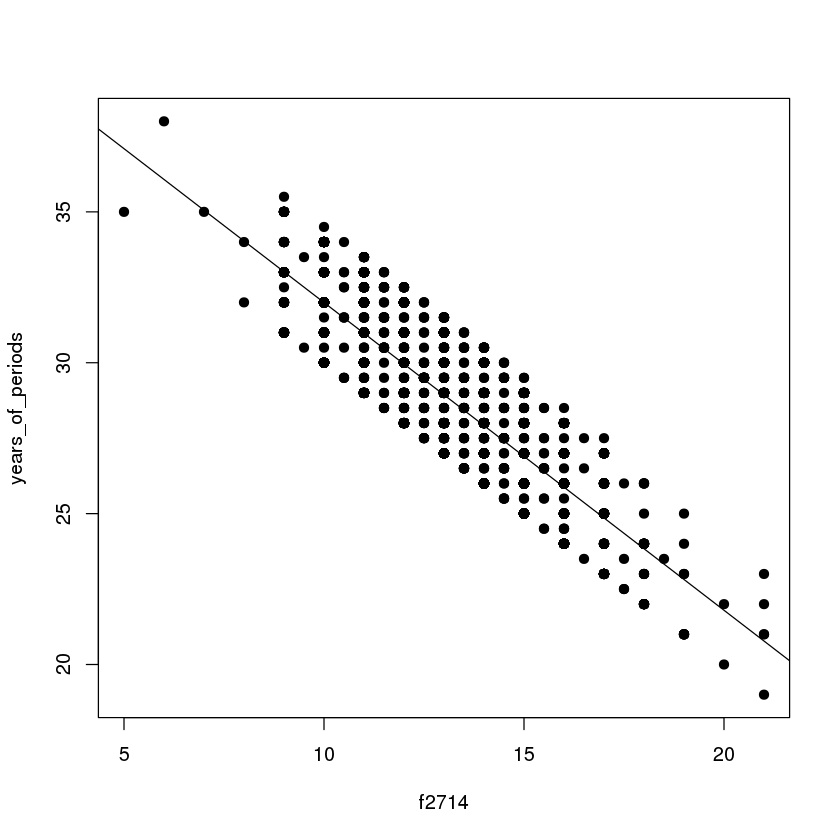

In [18]:
plot(years_of_periods~f2714,data=tmp,pch=19)
abline(fit)

In [19]:
tmp <- data[data$f3581<40,]
tmp <- na.omit(tmp[,c("f2714","years_of_periods")])
fit <- lm(years_of_periods~f2714,data=tmp)
summary(fit)


Call:
lm(formula = years_of_periods ~ f2714, data = tmp)

Residuals:
     Min       1Q   Median       3Q      Max 
-17.2275  -2.1729   0.9364   2.8818   4.4911 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 35.88331    0.41233   87.03   <2e-16 ***
f2714       -1.05465    0.03175  -33.22   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.976 on 4875 degrees of freedom
Multiple R-squared:  0.1846,	Adjusted R-squared:  0.1844 
F-statistic:  1103 on 1 and 4875 DF,  p-value: < 2.2e-16


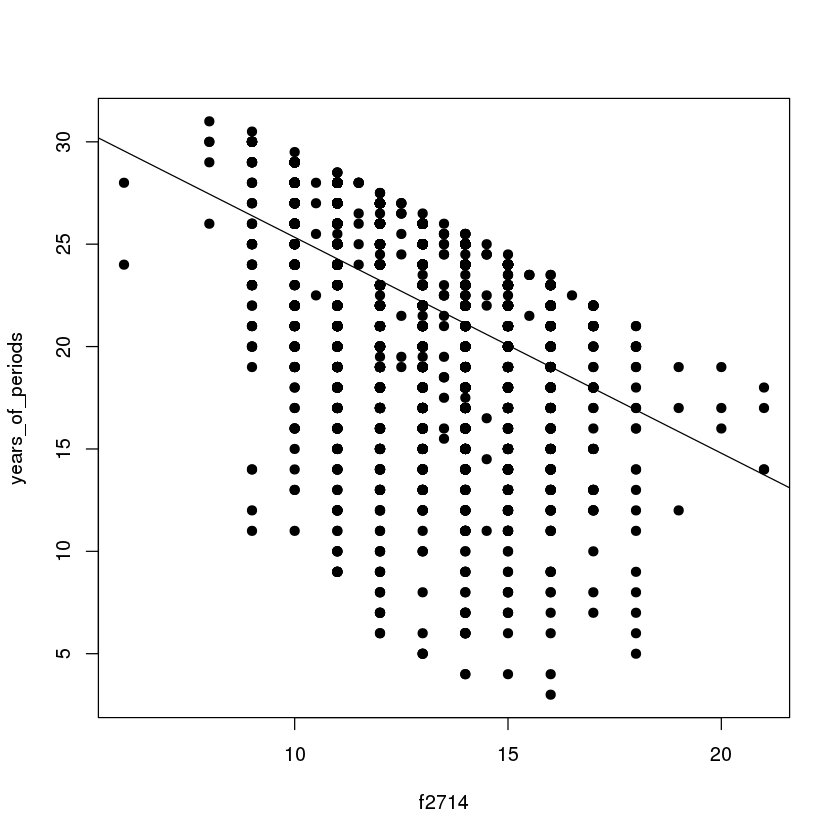

In [20]:
plot(years_of_periods~f2714,data=tmp,pch=19)
abline(fit)

### Investigate the association between the age of menopause and the years of periods

In [54]:
tmp <- na.omit(data[,c("f3581","years_of_periods")])
fit <- lm(years_of_periods~f3581,data=tmp)
summary(fit)


Call:
lm(formula = years_of_periods ~ f3581, data = tmp)

Residuals:
     Min       1Q   Median       3Q      Max 
-11.0566  -1.0492  -0.0467   0.9583   7.9732 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.283e+01  4.409e-02  -290.9   <2e-16 ***
f3581        9.975e-01  8.808e-04  1132.5   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.591 on 126638 degrees of freedom
Multiple R-squared:  0.9101,	Adjusted R-squared:  0.9101 
F-statistic: 1.283e+06 on 1 and 126638 DF,  p-value: < 2.2e-16


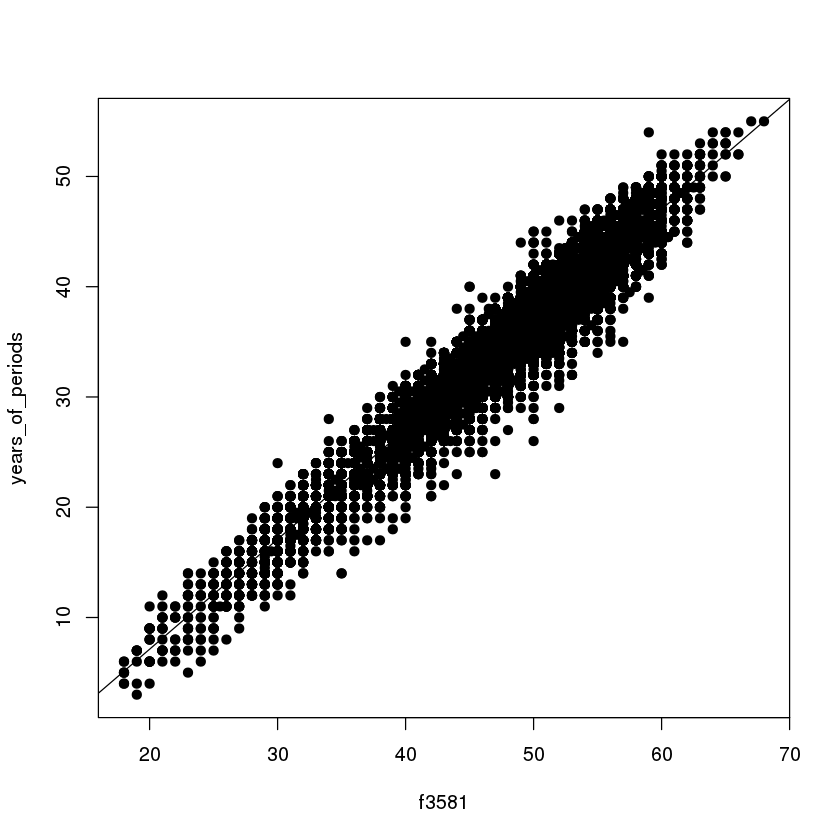

In [48]:
plot(years_of_periods~f3581,data=tmp,pch=19)
abline(fit)

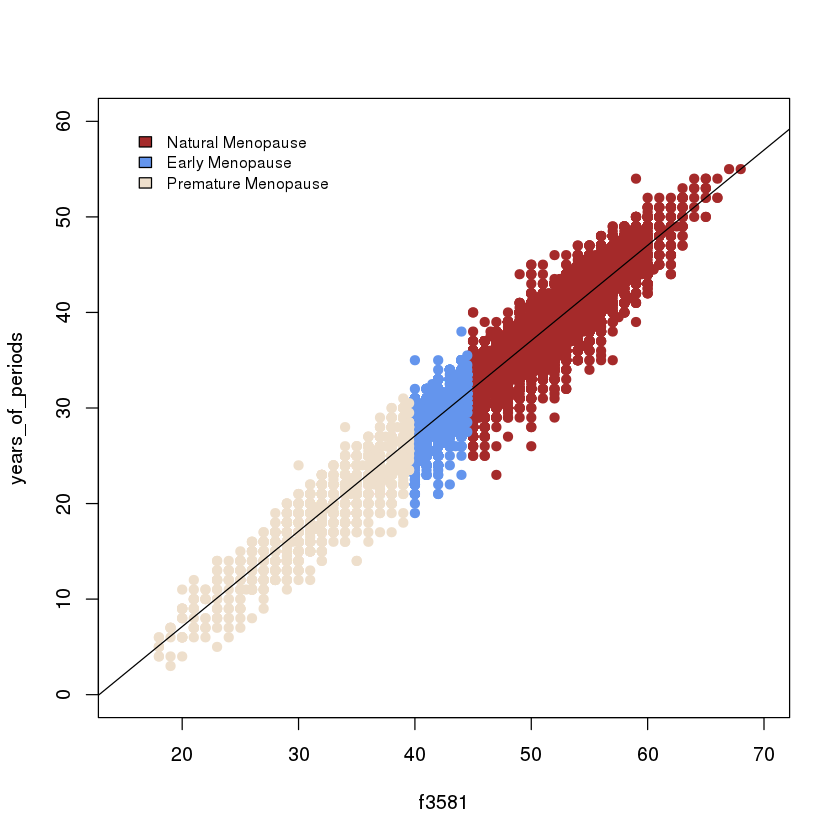

In [69]:
tmp <- data[data$f3581>=45,]
tmp <- na.omit(tmp[,c("f3581","years_of_periods")])
plot(years_of_periods~f3581,data=tmp,pch=19,col="brown",xlim=c(15, 70),ylim=c(0, 60))
tmp <- data[(data$f3581>=40)&(data$f3581<45),]
tmp <- na.omit(tmp[,c("f3581","years_of_periods")])
points(years_of_periods~f3581,data=tmp,pch=19,col="cornflowerblue",xlim=c(15, 70),ylim=c(0, 60))
tmp <- data[data$f3581<40,]
tmp <- na.omit(tmp[,c("f3581","years_of_periods")])
points(years_of_periods~f3581,data=tmp,pch=19,col="antiquewhite2",xlim=c(15, 70),ylim=c(0, 60))
tmp <- na.omit(data[,c("f3581","years_of_periods")])
fit <- lm(years_of_periods~f3581,data=tmp)
abline(fit)
legend(15,60, legend=c("Natural Menopause","Early Menopause","Premature Menopause")
       ,fill=c("brown","cornflowerblue","antiquewhite2"), cex=0.8,box.lty=0)

In [49]:
tmp <- data[data$f3581>=45,]
tmp <- na.omit(tmp[,c("f3581","years_of_periods")])
fit <- lm(years_of_periods~f3581,data=tmp)
summary(fit)


Call:
lm(formula = years_of_periods ~ f3581, data = tmp)

Residuals:
     Min       1Q   Median       3Q      Max 
-11.0428  -1.0431  -0.0429   0.9572   7.9581 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -12.965635   0.073798  -175.7   <2e-16 ***
f3581         1.000168   0.001437   695.9   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.572 on 110523 degrees of freedom
Multiple R-squared:  0.8142,	Adjusted R-squared:  0.8142 
F-statistic: 4.842e+05 on 1 and 110523 DF,  p-value: < 2.2e-16


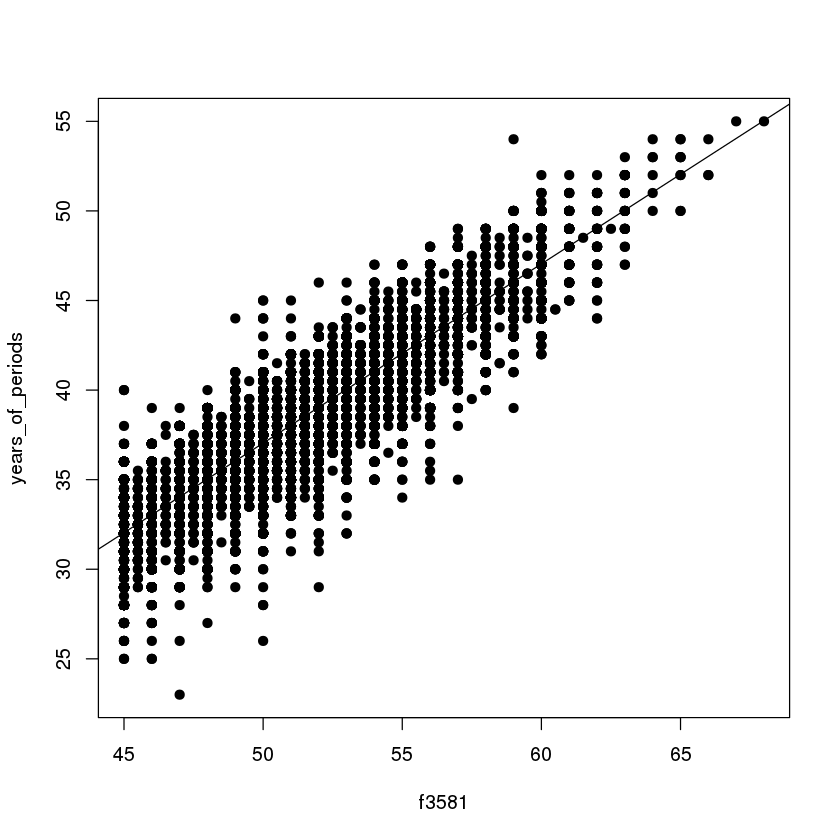

In [50]:
plot(years_of_periods~f3581,data=tmp,pch=19)
abline(fit)

In [55]:
tmp <- data[(data$f3581>=40)&(data$f3581<45),]
tmp <- na.omit(tmp[,c("f3581","years_of_periods")])
fit <- lm(years_of_periods~f3581,data=tmp)
summary(fit)


Call:
lm(formula = years_of_periods ~ f3581, data = tmp)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.1339 -1.0789 -0.0789  0.9762  7.9762 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -14.07753    0.46684  -30.16   <2e-16 ***
f3581         1.02753    0.01113   92.36   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.679 on 11236 degrees of freedom
Multiple R-squared:  0.4315,	Adjusted R-squared:  0.4315 
F-statistic:  8530 on 1 and 11236 DF,  p-value: < 2.2e-16


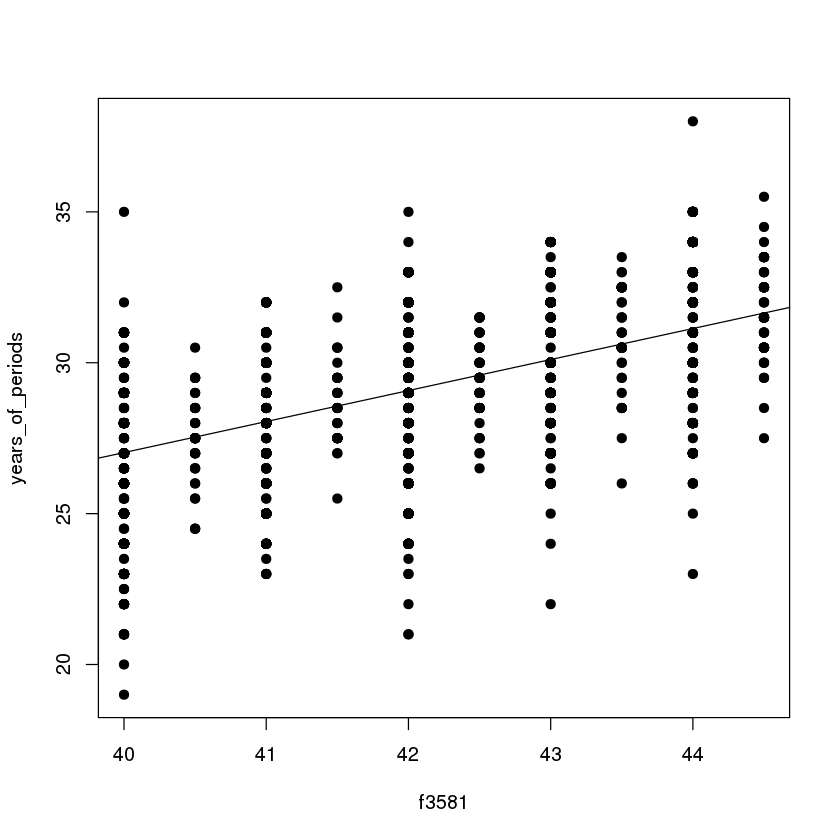

In [56]:
plot(years_of_periods~f3581,data=tmp,pch=19)
abline(fit)

In [52]:
tmp <- data[data$f3581<40,]
tmp <- na.omit(tmp[,c("f3581","years_of_periods")])
fit <- lm(years_of_periods~f3581,data=tmp)
summary(fit)


Call:
lm(formula = years_of_periods ~ f3581, data = tmp)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.1805 -1.1694 -0.1361  1.8195  6.9195 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -13.252852   0.228592  -57.98   <2e-16 ***
f3581         1.011113   0.006457  156.60   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.793 on 4875 degrees of freedom
Multiple R-squared:  0.8342,	Adjusted R-squared:  0.8341 
F-statistic: 2.452e+04 on 1 and 4875 DF,  p-value: < 2.2e-16


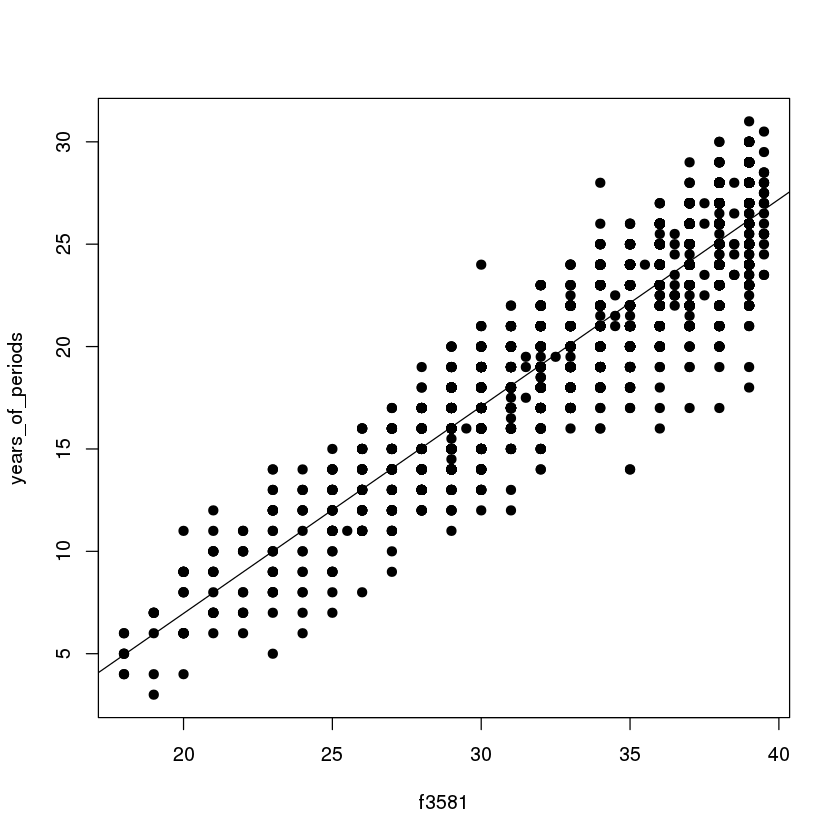

In [53]:
plot(years_of_periods~f3581,data=tmp,pch=19)
abline(fit)

### Adding the age of menarche to the models

In [29]:
# Natural Menopause
tmp <- na.omit(data[,c("f3393","f3393_age","f2714","f2814","f3581","years_of_periods")])
tmp <- subset(tmp, f3581 >= 45,select=c(f3393, f3393_age, f2714, f2814, years_of_periods))
fit1 <- glm(f3393~years_of_periods+f3393_age+f2814+f2714,tmp, family=binomial(link='logit'))
tmp <- na.omit(data[,c("f2247","f2247_age","f2714","f2814","f3581","years_of_periods")])
tmp <- subset(tmp, f3581 >= 45,select=c(f2247, f2247_age, f2714, f2814, years_of_periods))
fit2 <- glm(f2247~years_of_periods+f2247_age+f2814+f2714,tmp, family=binomial(link='logit'))
tmp <- na.omit(data[,c("f2257","f2257_age","f2714","f2814","f3581","years_of_periods")])
tmp <- subset(tmp, f3581 >= 45,select=c(f2257, f2257_age, f2714, f2814, years_of_periods))
fit3 <- glm(f2257~years_of_periods+f2257_age+f2814+f2714,tmp, family=binomial(link='logit'))
tmp <- na.omit(data[,c("f2247_f2257","f2247_f2257_age","f2714","f2814","f3581","years_of_periods")])
tmp <- subset(tmp, f3581 >= 45,select=c(f2247_f2257, f2247_f2257_age, f2714, f2814, years_of_periods))
fit4 <- glm(f2247_f2257~years_of_periods+f2247_f2257_age+f2814+f2714,tmp, family=binomial(link='logit'))
cbind(summary(fit1)$coefficients[,c("Estimate","Pr(>|z|)")],summary(fit2)$coefficients[,c("Estimate","Pr(>|z|)")],summary(fit3)$coefficients[,c("Estimate","Pr(>|z|)")],summary(fit4)$coefficients[,c("Estimate","Pr(>|z|)")])

,Estimate,Pr(>|z|),Estimate,Pr(>|z|),Estimate,Pr(>|z|),Estimate,Pr(>|z|)
(Intercept),-10.81529177,1.902189e-197,-2.540563617,1.811681e-68,-1.080563816,1.138209e-17,-2.4291069583,5.261550e-55
years_of_periods,-0.01091735,3.166056e-02,0.008194953,2.702948e-04,0.002042878,3.020169e-01,0.0096037733,6.947337e-05
f3393_age,0.13690648,0.000000e+00,0.020581556,7.351636e-48,0.005785466,2.492239e-06,0.0132857191,2.294405e-18
f2814,0.21359236,7.904632e-10,0.214211935,7.717857e-46,0.223694372,4.802959e-64,0.2585511112,1.152412e-57
f2714,-0.02555703,3.568509e-02,-0.006395057,2.183444e-01,-0.001729465,7.038401e-01,-0.0009942172,8.583659e-01


In [31]:
# Early menopause set as 1, natural as 0, the others as NA
data$EM <- 0
data[(data$f3581<45)&(data$f3581>=40),"EM"] <- 1
data[data$f3581>=45,"EM"] <- 0
data[data$f3581<40,"EM"] <- NA
data[is.na(data$f3581),"EM"] <- NA
table(data$EM, useNA = "always")


     0      1   <NA> 
113112  11502  64485 

In [32]:
tmp <- na.omit(data[,c("f3393","f3393_age","f2814","f3581","years_of_periods","EM","f2714")])
fit1 <- glm(f3393~years_of_periods+f3393_age+f2814+EM+f2714,tmp, family=binomial(link='logit'))
tmp <- na.omit(data[,c("f2247","f2247_age","f2814","f3581","years_of_periods","EM","f2714")])
fit2 <- glm(f2247~years_of_periods+f2247_age+f2814+EM+f2714,tmp, family=binomial(link='logit'))
tmp <- na.omit(data[,c("f2257","f2257_age","f2814","f3581","years_of_periods","EM","f2714")])
fit3 <- glm(f2257~years_of_periods+f2257_age+f2814+EM+f2714,tmp, family=binomial(link='logit'))
tmp <- na.omit(data[,c("f2247_f2257","f2247_f2257_age","f2814","f3581","years_of_periods","EM","f2714")])
fit4 <- glm(f2247_f2257~years_of_periods+f2247_f2257_age+f2814+EM+f2714,tmp, family=binomial(link='logit'))
cbind(summary(fit1)$coefficients[,c("Estimate","Pr(>|z|)")],summary(fit2)$coefficients[,c("Estimate","Pr(>|z|)")],summary(fit3)$coefficients[,c("Estimate","Pr(>|z|)")],summary(fit4)$coefficients[,c("Estimate","Pr(>|z|)")])

,Estimate,Pr(>|z|),Estimate,Pr(>|z|),Estimate,Pr(>|z|),Estimate,Pr(>|z|)
(Intercept),-10.69068962,2.308575e-206,-2.590514358,3.448123e-75,-1.110366880,1.448450e-19,-2.501225982,1.532221e-61
years_of_periods,-0.01113601,2.683805e-02,0.007798812,4.523007e-04,0.001318245,5.000591e-01,0.008654182,2.838338e-04
f3393_age,0.13585887,0.000000e+00,0.021589812,5.926092e-61,0.007191322,2.280121e-10,0.015309266,1.150774e-27
f2814,0.21429541,8.180721e-11,0.209322208,2.603803e-48,0.215335877,1.056145e-65,0.247867184,1.193499e-58
EM,0.03802482,5.972713e-01,0.107527031,7.078260e-04,0.045329163,1.020657e-01,0.122266231,3.114129e-04
f2714,-0.02937787,1.110843e-02,-0.005942509,2.309044e-01,-0.003584296,4.089603e-01,-0.001748761,7.421241e-01


In [33]:
# Premature menopause set as 1, natural as 0, the others as NA
data$PM <- 0
data[(data$f3581<45)&(data$f3581>=40),"PM"] <- NA
data[data$f3581>=45,"PM"] <- 0
data[data$f3581<40,"PM"] <- 1
data[is.na(data$f3581),"PM"] <- NA
table(data$PM, useNA = "always")


     0      1   <NA> 
113112   4970  71017 

In [34]:
tmp <- na.omit(data[,c("f3393","f3393_age","f2814","f3581","years_of_periods","PM","f2714")])
fit1 <- glm(f3393~years_of_periods+f3393_age+f2814+PM+f2714,tmp, family=binomial(link='logit'))
tmp <- na.omit(data[,c("f2247","f2247_age","f2814","f3581","years_of_periods","PM","f2714")])
fit2 <- glm(f2247~years_of_periods+f2247_age+f2814+PM+f2714,tmp, family=binomial(link='logit'))
tmp <- na.omit(data[,c("f2257","f2257_age","f2814","f3581","years_of_periods","PM","f2714")])
fit3 <- glm(f2257~years_of_periods+f2257_age+f2814+PM+f2714,tmp, family=binomial(link='logit'))
tmp <- na.omit(data[,c("f2247_f2257","f2247_f2257_age","f2814","f3581","years_of_periods","PM","f2714")])
fit4 <- glm(f2247_f2257~years_of_periods+f2247_f2257_age+f2814+PM+f2714,tmp, family=binomial(link='logit'))
cbind(summary(fit1)$coefficients[,c("Estimate","Pr(>|z|)")],summary(fit2)$coefficients[,c("Estimate","Pr(>|z|)")],summary(fit3)$coefficients[,c("Estimate","Pr(>|z|)")],summary(fit4)$coefficients[,c("Estimate","Pr(>|z|)")])

,Estimate,Pr(>|z|),Estimate,Pr(>|z|),Estimate,Pr(>|z|),Estimate,Pr(>|z|)
(Intercept),-10.60021539,2.611673e-202,-2.437192378,6.247710e-67,-1.029970452,4.052954e-17,-2.329004145,8.425243e-54
years_of_periods,-0.01248310,1.089960e-02,0.006909464,1.509478e-03,0.001548281,4.184780e-01,0.007962475,6.456362e-04
f3393_age,0.13586409,0.000000e+00,0.020321962,1.551035e-50,0.005668551,1.493041e-06,0.013432837,2.873178e-20
f2814,0.20241090,2.673325e-09,0.210508249,4.933946e-46,0.221456390,2.695089e-65,0.255933989,9.624002e-59
PM,0.03575875,7.472173e-01,0.156964803,1.602406e-03,0.085248608,4.935163e-02,0.189666378,3.363268e-04
f2714,-0.03193082,6.734675e-03,-0.009217900,6.785630e-02,-0.003548897,4.217886e-01,-0.004460829,4.095189e-01


### Investigate the assoication between ARHI and the age of menarche

In [2]:
library(glmnet)
library(data.table)
data <- fread("~/UKBiobank/results/REGENIE_results/results_exome_data/051722_interaction_sex/sex_related/060822.500k.filtered.menopause.merge_ARHI.phe.csv")
head(data)

Loading required package: Matrix

Loaded glmnet 4.1-1



FID,IID,sex,f2724,f3581,f2814,f3536,f3546,f3393,f3393_age,f2247,f2247_age,f2257,f2257_age,f2247_f2257,f2247_f2257_age,f2714,years_of_periods
<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1000046,1000046,0,1,53,1,54,NA,NA,NA,NA,NA,1,73,NA,NA,13.0,40.0
1000078,1000078,0,1,52,0,NA,NA,0,60,0,60,0,60,0,60,10.5,41.5
1000090,1000090,0,1,NA,1,NA,NA,NA,NA,1,64,NA,NA,NA,NA,NA,NA
1000137,1000137,0,0,NA,0,NA,NA,0,46,0,46,0,46,0,46,13.0,NA
1000141,1000141,0,0,NA,0,NA,NA,0,49,0,49,0,49,0,49,13.0,NA
1000164,1000164,0,1,41,0,NA,NA,NA,NA,NA,NA,1,51,NA,NA,13.0,28.0


In [8]:
tmp <- na.omit(data[,c("f3393","f2714")])
fit1 <- glm(f3393~f2714,tmp, family=binomial(link='logit'))
tmp <- na.omit(data[,c("f2247","f2714")])
fit2 <- glm(f2247~f2714,tmp, family=binomial(link='logit'))
tmp <- na.omit(data[,c("f2257","f2714")])
fit3 <- glm(f2257~f2714,tmp, family=binomial(link='logit'))
tmp <- na.omit(data[,c("f2247_f2257","f2714")])
fit4 <- glm(f2247_f2257~f2714,tmp, family=binomial(link='logit'))
cbind(summary(fit1)$coefficients[,c("Estimate","Pr(>|z|)")],summary(fit2)$coefficients[,c("Estimate","Pr(>|z|)")],summary(fit3)$coefficients[,c("Estimate","Pr(>|z|)")],summary(fit4)$coefficients[,c("Estimate","Pr(>|z|)")])

,Estimate,Pr(>|z|),Estimate,Pr(>|z|),Estimate,Pr(>|z|),Estimate,Pr(>|z|)
(Intercept),-2.92368076,3.070229e-140,-0.85741301,3.413384e-71,-0.527623674,3.150122e-37,-1.06950611,6.062596e-95
f2714,-0.01185183,1.820868e-01,-0.01679647,5.057456e-06,-0.009552132,2.555065e-03,-0.01515764,1.306425e-04


### Investigate the assoication between ARHI and the age of menarche and HRT

In [9]:
tmp <- na.omit(data[,c("f3393","f2814","f2714")])
fit1 <- glm(f3393~f2814+f2714,tmp, family=binomial(link='logit'))
tmp <- na.omit(data[,c("f2247","f2814","f2714")])
fit2 <- glm(f2247~f2814+f2714,tmp, family=binomial(link='logit'))
tmp <- na.omit(data[,c("f2257","f2814","f2714")])
fit3 <- glm(f2257~f2814+f2714,tmp, family=binomial(link='logit'))
tmp <- na.omit(data[,c("f2247_f2257","f2814","f2714")])
fit4 <- glm(f2247_f2257~f2814+f2714,tmp, family=binomial(link='logit'))
cbind(summary(fit1)$coefficients[,c("Estimate","Pr(>|z|)")],summary(fit2)$coefficients[,c("Estimate","Pr(>|z|)")],summary(fit3)$coefficients[,c("Estimate","Pr(>|z|)")],summary(fit4)$coefficients[,c("Estimate","Pr(>|z|)")])

,Estimate,Pr(>|z|),Estimate,Pr(>|z|),Estimate,Pr(>|z|),Estimate,Pr(>|z|)
(Intercept),-3.315778005,1.127915e-174,-1.05533053,3.164010e-104,-0.687463133,1.412812e-60,-1.28967551,1.304531e-133
f2814,0.807012579,3.466387e-179,0.45327791,0.000000e+00,0.366690106,1.427830e-273,0.49519315,0.000000e+00
f2714,-0.008811398,3.237167e-01,-0.01517706,4.222874e-05,-0.007973429,1.231095e-02,-0.01327551,8.780792e-04


In [10]:
# Natural Menopause
tmp <- na.omit(data[,c("f3393","f2714","f2814","f3581")])
tmp <- subset(tmp, f3581 >= 45,select=c(f3393, f2714, f2814))
fit1 <- glm(f3393~f2814+f2714,tmp, family=binomial(link='logit'))
tmp <- na.omit(data[,c("f2247","f2714","f2814","f3581")])
tmp <- subset(tmp, f3581 >= 45,select=c(f2247, f2714, f2814))
fit2 <- glm(f2247~f2814+f2714,tmp, family=binomial(link='logit'))
tmp <- na.omit(data[,c("f2257","f2714","f2814","f3581")])
tmp <- subset(tmp, f3581 >= 45,select=c(f2257, f2714, f2814))
fit3 <- glm(f2257~f2814+f2714,tmp, family=binomial(link='logit'))
tmp <- na.omit(data[,c("f2247_f2257","f2714","f2814","f3581")])
tmp <- subset(tmp, f3581 >= 45,select=c(f2247_f2257, f2714, f2814))
fit4 <- glm(f2247_f2257~f2814+f2714,tmp, family=binomial(link='logit'))
cbind(summary(fit1)$coefficients[,c("Estimate","Pr(>|z|)")],summary(fit2)$coefficients[,c("Estimate","Pr(>|z|)")],summary(fit3)$coefficients[,c("Estimate","Pr(>|z|)")],summary(fit4)$coefficients[,c("Estimate","Pr(>|z|)")])

,Estimate,Pr(>|z|),Estimate,Pr(>|z|),Estimate,Pr(>|z|),Estimate,Pr(>|z|)
(Intercept),-3.046207252,9.382409e-102,-0.89601593,1.714754e-48,-0.632723791,4.645301e-32,-1.14663061,4.539980e-68
f2814,0.448237624,1.246748e-39,0.25902910,3.672713e-69,0.236677921,9.146464e-75,0.28740571,5.090683e-74
f2714,-0.006022096,5.780878e-01,-0.01395418,2.824351e-03,-0.003628627,3.751462e-01,-0.01026082,4.080694e-02


### Comparison for HRT and menopause age

In [103]:
library(glmnet)
library(data.table)
data <- fread("~/UKBiobank/results/REGENIE_results/results_exome_data/051722_interaction_sex/sex_related/060822.500k.filtered.menopause.merge_ARHI.phe.csv")
head(data)

FID,IID,sex,f2724,f3581,f2814,f3536,f3546,f3393,f3393_age,f2247,f2247_age,f2257,f2257_age,f2247_f2257,f2247_f2257_age,f2714,years_of_periods
<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1000046,1000046,0,1,53,1,54,NA,NA,NA,NA,NA,1,73,NA,NA,13.0,40.0
1000078,1000078,0,1,52,0,NA,NA,0,60,0,60,0,60,0,60,10.5,41.5
1000090,1000090,0,1,NA,1,NA,NA,NA,NA,1,64,NA,NA,NA,NA,NA,NA
1000137,1000137,0,0,NA,0,NA,NA,0,46,0,46,0,46,0,46,13.0,NA
1000141,1000141,0,0,NA,0,NA,NA,0,49,0,49,0,49,0,49,13.0,NA
1000164,1000164,0,1,41,0,NA,NA,NA,NA,NA,NA,1,51,NA,NA,13.0,28.0


In [46]:
table(na.omit(subset(data[,c("f3581","f3536","f3546","f3393")],(f3536>=f3581)&(f3546>=f3536)))[,c("f3393")])


    0     1 
14807   992 

In [47]:
table(na.omit(subset(data[,c("f3581","f3536","f3546","f3393")],(f3546<=f3581)&(f3546>=f3536)))[,c("f3393")])


   0    1 
7504  408 

In [48]:
table(na.omit(subset(data[,c("f3581","f3536","f3546","f3393")],(f3546>=f3581)&(f3536<=f3581)))[,c("f3393")])


    0     1 
14407   919 

In [54]:
table(na.omit(subset(data[,c("f3581","f3536","f3546","f2247")],(f3536>=f3581)&(f3546>=f3536)))[,c("f2247")])


    0     1 
14807  6341 

In [55]:
table(na.omit(subset(data[,c("f3581","f3536","f3546","f2247")],(f3546<=f3581)&(f3546>=f3536)))[,c("f2247")])


   0    1 
7504 3124 

In [56]:
table(na.omit(subset(data[,c("f3581","f3536","f3546","f2247")],(f3546>=f3581)&(f3536<=f3581)))[,c("f2247")])


    0     1 
14407  6108 

#### menopause prior than HRT

In [77]:
# Consider age of HRT and menopause only within those who have both age and had menopause prior than HRT
library(glmnet)
library(data.table)
data <- fread("~/UKBiobank/results/REGENIE_results/results_exome_data/051722_interaction_sex/sex_related/060822.500k.filtered.menopause.merge_ARHI.phe.csv")
head(data)

FID,IID,sex,f2724,f3581,f2814,f3536,f3546,f3393,f3393_age,f2247,f2247_age,f2257,f2257_age,f2247_f2257,f2247_f2257_age,f2714,years_of_periods
<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1000046,1000046,0,1,53,1,54,NA,NA,NA,NA,NA,1,73,NA,NA,13.0,40.0
1000078,1000078,0,1,52,0,NA,NA,0,60,0,60,0,60,0,60,10.5,41.5
1000090,1000090,0,1,NA,1,NA,NA,NA,NA,1,64,NA,NA,NA,NA,NA,NA
1000137,1000137,0,0,NA,0,NA,NA,0,46,0,46,0,46,0,46,13.0,NA
1000141,1000141,0,0,NA,0,NA,NA,0,49,0,49,0,49,0,49,13.0,NA
1000164,1000164,0,1,41,0,NA,NA,NA,NA,NA,NA,1,51,NA,NA,13.0,28.0


In [78]:
samples <- as.vector(t(read.table("~/UKBiobank/results/REGENIE_results/results_exome_data/051722_interaction_sex/sex_related/061322.meno_prior_HRT.sample.txt")))
length(samples)

[1] 15282

In [79]:
dim(data[data$IID %in% samples,])

[1] 13515    18

In [80]:
data <- data[data$IID %in% samples,]

In [81]:
# f3393~f3581+f3536+f3546+f3393_age
tmp <- na.omit(data[,c("f3581","f3536","f3546","f3393","f3393_age")])
fit <- glm(f3393~f3581+f3536+f3546+f3393_age,tmp, family=binomial(link='logit'))
summary(fit)


Call:
glm(formula = f3393 ~ f3581 + f3536 + f3546 + f3393_age, family = binomial(link = "logit"), 
    data = tmp)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.9843  -0.4164  -0.3406  -0.2673   3.1404  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -9.653962   0.744481 -12.967   <2e-16 ***
f3581       -0.006953   0.010275  -0.677    0.499    
f3536       -0.008148   0.013959  -0.584    0.559    
f3546       -0.013643   0.010100  -1.351    0.177    
f3393_age    0.133593   0.011175  11.954   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 4068.3  on 8368  degrees of freedom
Residual deviance: 3902.9  on 8364  degrees of freedom
AIC: 3912.9

Number of Fisher Scoring iterations: 6


In [82]:
dim(tmp)

[1] 8369    5

In [83]:
# f2247~f3581+f3536+f3546+f2247_age
tmp <- na.omit(data[,c("f3581","f3536","f3546","f2247","f2247_age")])
fit <- glm(f2247~f3581+f3536+f3546+f2247_age,tmp, family=binomial(link='logit'))
summary(fit)


Call:
glm(formula = f2247 ~ f3581 + f3536 + f3546 + f2247_age, family = binomial(link = "logit"), 
    data = tmp)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.0162  -0.8713  -0.8309   1.4869   1.7826  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -2.152752   0.293260  -7.341 2.12e-13 ***
f3581        0.004778   0.005104   0.936    0.349    
f3536       -0.008802   0.006778  -1.299    0.194    
f3546       -0.001228   0.005055  -0.243    0.808    
f2247_age    0.025923   0.004872   5.321 1.03e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 13870  on 11261  degrees of freedom
Residual deviance: 13835  on 11257  degrees of freedom
AIC: 13845

Number of Fisher Scoring iterations: 4


In [84]:
dim(tmp)

[1] 11262     5

In [85]:
# f2257~f3581+f3536+f3546+f2257_age
tmp <- na.omit(data[,c("f3581","f3536","f3546","f2257","f2257_age")])
fit <- glm(f2257~f3581+f3536+f3546+f2257_age,tmp, family=binomial(link='logit'))
summary(fit)


Call:
glm(formula = f2257 ~ f3581 + f3536 + f3546 + f2257_age, family = binomial(link = "logit"), 
    data = tmp)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.0985  -1.0079  -0.9825   1.3518   1.4505  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -0.967873   0.250674  -3.861 0.000113 ***
f3581       -0.004960   0.004389  -1.130 0.258410    
f3536       -0.000224   0.005833  -0.038 0.969361    
f3546        0.006625   0.004487   1.477 0.139797    
f2257_age    0.006705   0.004221   1.589 0.112128    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 17374  on 12939  degrees of freedom
Residual deviance: 17363  on 12935  degrees of freedom
AIC: 17373

Number of Fisher Scoring iterations: 4


In [86]:
dim(tmp)

[1] 12940     5

In [87]:
# f2247_f2257~f3581+f3536+f3546+f2247_f2257_age
tmp <- na.omit(data[,c("f3581","f3536","f3546","f2247_f2257","f2247_f2257_age")])
fit <- glm(f2247_f2257~f3581+f3536+f3546+f2247_f2257_age,tmp, family=binomial(link='logit'))
summary(fit)


Call:
glm(formula = f2247_f2257 ~ f3581 + f3536 + f3546 + f2247_f2257_age, 
    family = binomial(link = "logit"), data = tmp)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.9222  -0.8083  -0.7765   1.5572   1.8221  

Coefficients:
                 Estimate Std. Error z value Pr(>|z|)    
(Intercept)     -2.095495   0.312313  -6.710 1.95e-11 ***
f3581            0.001663   0.005389   0.309    0.758    
f3536           -0.008884   0.007165  -1.240    0.215    
f3546            0.002697   0.005360   0.503    0.615    
f2247_f2257_age  0.021053   0.005191   4.056 5.00e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 12470  on 10699  degrees of freedom
Residual deviance: 12447  on 10695  degrees of freedom
AIC: 12457

Number of Fisher Scoring iterations: 4


In [88]:
dim(tmp)

[1] 10700     5

#### menopause prior than or between HRT

In [20]:
# Consider age of HRT and menopause only within those who have both age and had menopause prior than HRT or between HRT
library(glmnet)
library(data.table)
data <- fread("~/UKBiobank/results/REGENIE_results/results_exome_data/051722_interaction_sex/sex_related/060822.500k.filtered.menopause.merge_ARHI.phe.csv")
samples <- as.vector(t(read.table("~/UKBiobank/results/REGENIE_results/results_exome_data/051722_interaction_sex/sex_related/061322.meno_priorandbetw_HRT.sample.txt")))
length(samples)

[1] 42575

In [21]:
data <- data[data$IID %in% samples,]
dim(data)

[1] 37863    18

In [95]:
# f3393~f3581+f3536+f3546+f3393_age
tmp <- na.omit(data[,c("f3581","f3536","f3546","f3393","f3393_age")])
fit <- glm(f3393~f3581+f3536+f3546+f3393_age,tmp, family=binomial(link='logit'))
summary(fit)


Call:
glm(formula = f3393 ~ f3581 + f3536 + f3546 + f3393_age, family = binomial(link = "logit"), 
    data = tmp)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.1145  -0.4012  -0.3187  -0.2434   3.2745  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -10.834466   0.470420 -23.031  < 2e-16 ***
f3581        -0.001144   0.005919  -0.193  0.84671    
f3536        -0.021774   0.007427  -2.932  0.00337 ** 
f3546        -0.011194   0.006231  -1.797  0.07241 .  
f3393_age     0.155640   0.006822  22.816  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 11025  on 23694  degrees of freedom
Residual deviance: 10429  on 23690  degrees of freedom
AIC: 10439

Number of Fisher Scoring iterations: 6


In [96]:
dim(tmp)

[1] 23695     5

In [97]:
# f2247~f3581+f3536+f3546+f2247_age
tmp <- na.omit(data[,c("f3581","f3536","f3546","f2247","f2247_age")])
fit <- glm(f2247~f3581+f3536+f3546+f2247_age,tmp, family=binomial(link='logit'))
summary(fit)


Call:
glm(formula = f2247 ~ f3581 + f3536 + f3546 + f2247_age, family = binomial(link = "logit"), 
    data = tmp)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.0649  -0.8642  -0.8160   1.4829   1.8597  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -2.4721251  0.1850752 -13.357  < 2e-16 ***
f3581        0.0046391  0.0027646   1.678 0.093334 .  
f3536       -0.0118870  0.0034086  -3.487 0.000488 ***
f3546       -0.0001965  0.0031086  -0.063 0.949597    
f2247_age    0.0320230  0.0030105  10.637  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 38857  on 31776  degrees of freedom
Residual deviance: 38712  on 31772  degrees of freedom
AIC: 38722

Number of Fisher Scoring iterations: 4


In [98]:
dim(tmp)

[1] 31777     5

In [99]:
# f2257~f3581+f3536+f3546+f2257_age
tmp <- na.omit(data[,c("f3581","f3536","f3546","f2257","f2257_age")])
fit <- glm(f2257~f3581+f3536+f3546+f2257_age,tmp, family=binomial(link='logit'))
summary(fit)


Call:
glm(formula = f2257 ~ f3581 + f3536 + f3546 + f2257_age, family = binomial(link = "logit"), 
    data = tmp)

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-1.180  -0.998  -0.961   1.360   1.530  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -1.1370674  0.1586113  -7.169 7.56e-13 ***
f3581       -0.0003178  0.0024047  -0.132 0.894869    
f3536       -0.0110327  0.0029719  -3.712 0.000205 ***
f3546        0.0069110  0.0027515   2.512 0.012015 *  
f2257_age    0.0137669  0.0026249   5.245 1.57e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 48523  on 36323  degrees of freedom
Residual deviance: 48463  on 36319  degrees of freedom
AIC: 48473

Number of Fisher Scoring iterations: 4


In [100]:
dim(tmp)

[1] 36324     5

In [101]:
# f2247_f2257~f3581+f3536+f3546+f2247_f2257_age
tmp <- na.omit(data[,c("f3581","f3536","f3546","f2247_f2257","f2247_f2257_age")])
fit <- glm(f2247_f2257~f3581+f3536+f3546+f2247_f2257_age,tmp, family=binomial(link='logit'))
summary(fit)


Call:
glm(formula = f2247_f2257 ~ f3581 + f3536 + f3546 + f2247_f2257_age, 
    family = binomial(link = "logit"), data = tmp)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.9921  -0.8044  -0.7633   1.5359   1.9020  

Coefficients:
                 Estimate Std. Error z value Pr(>|z|)    
(Intercept)     -2.441828   0.196632 -12.418  < 2e-16 ***
f3581            0.004023   0.002927   1.374    0.169    
f3536           -0.015013   0.003611  -4.157 3.22e-05 ***
f3546            0.004282   0.003297   1.299    0.194    
f2247_f2257_age  0.027728   0.003212   8.633  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 35034  on 30261  degrees of freedom
Residual deviance: 34922  on 30257  degrees of freedom
AIC: 34932

Number of Fisher Scoring iterations: 4


In [102]:
dim(tmp)

[1] 30262     5

#### Coding age as different variables

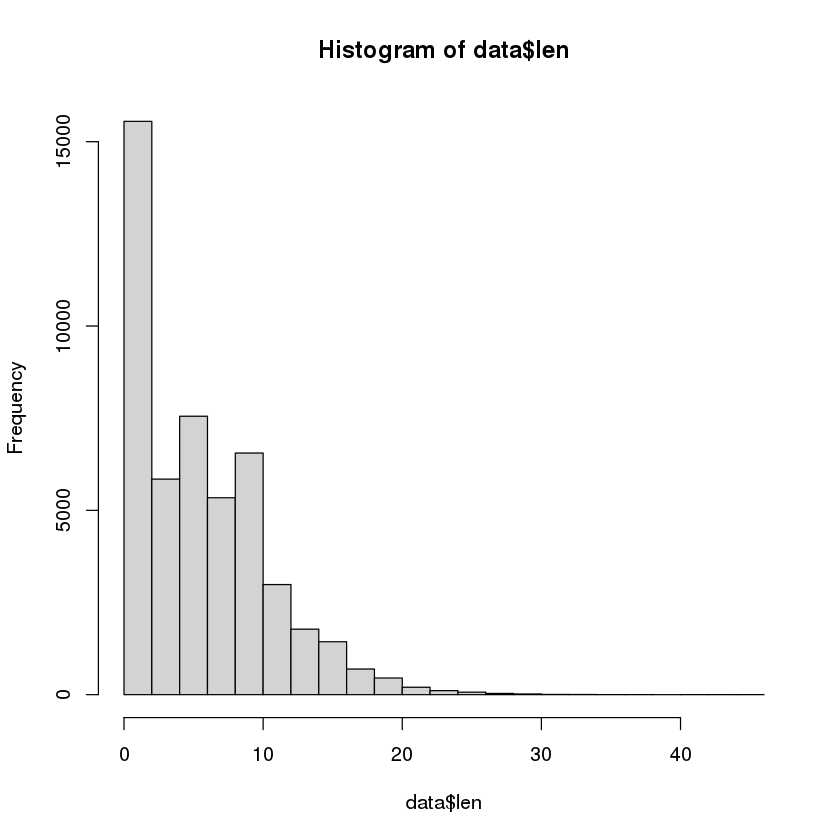

In [23]:
# Length of the HRT
data$len = data$f3546 - data$f3536
hist(data$len)

In [6]:
# f3393~f3581+len+f3393_age
tmp <- na.omit(data[,c("f3581","len","f3393","f3393_age")])
fit <- glm(f3393~f3581+len+f3393_age,tmp, family=binomial(link='logit'))
summary(fit)


Call:
glm(formula = f3393 ~ f3581 + len + f3393_age, family = binomial(link = "logit"), 
    data = tmp)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.1423  -0.4011  -0.3189  -0.2439   3.2467  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -11.351940   0.456649 -24.859  < 2e-16 ***
f3581        -0.014527   0.004843  -2.999  0.00271 ** 
len           0.001230   0.005530   0.222  0.82399    
f3393_age     0.147448   0.006570  22.444  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 11025  on 23694  degrees of freedom
Residual deviance: 10446  on 23691  degrees of freedom
AIC: 10454

Number of Fisher Scoring iterations: 6


In [24]:
# f3393~len+f3393_age
tmp <- na.omit(data[,c("len","f3393","f3393_age")])
fit <- glm(f3393~len+f3393_age,tmp, family=binomial(link='logit'))
summary(fit)


Call:
glm(formula = f3393 ~ len + f3393_age, family = binomial(link = "logit"), 
    data = tmp)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.1053  -0.4032  -0.3217  -0.2420   3.2423  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -11.932682   0.356869 -33.437   <2e-16 ***
len           0.006259   0.004783   1.309    0.191    
f3393_age     0.145115   0.005591  25.953   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 14040  on 30310  degrees of freedom
Residual deviance: 13240  on 30308  degrees of freedom
AIC: 13246

Number of Fisher Scoring iterations: 6


In [3]:
# more than one year HRT or not
data$len = data$f3546 - data$f3536
data$morethan1y_HRT = ifelse(data$len>1,1,0)
table(data$morethan1y_HRT)


    0     1 
 6957 30906 

In [4]:
head(data)

FID,IID,sex,f2724,f3581,f2814,f3536,f3546,f3393,f3393_age,f2247,f2247_age,f2257,f2257_age,f2247_f2257,f2247_f2257_age,f2714,years_of_periods,len,morethan1y_HRT
<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1000224,1000224,0,1,50,1,50,52,0,58,0,58,0,58,0,58,12,38,2,1
1000340,1000340,0,1,52,1,53,54,0,54,0,54,0,54,0,54,13,39,1,0
1000656,1000656,0,1,57,1,53,57,0,62,0,62,0,62,0,62,11,46,4,1
1000988,1000988,0,1,50,1,51,65,NA,NA,NA,NA,1,65,NA,NA,13,37,14,1
1001118,1001118,0,1,48,1,48,48,0,58,0,58,0,58,0,58,14,34,0,0
1001207,1001207,0,1,39,1,39,39,0,65,0,65,0,65,0,65,13,26,0,0


In [6]:
table(data$f2814)


    1 
37863 

### More than one year HRT or not

In [2]:
library(glmnet)
library(data.table)
data <- fread("~/UKBiobank/results/REGENIE_results/results_exome_data/051722_interaction_sex/sex_related/060322.500k.filtered.menopause.merge_ARHI.phe.csv")
samples <- as.vector(t(read.table("~/UKBiobank/results/REGENIE_results/results_exome_data/051722_interaction_sex/sex_related/061322.meno_priorandbetw_HRT.sample.txt")))
head(data)

Loading required package: Matrix

Loaded glmnet 4.1-1



V1,FID,IID,sex,f2724,f3581,f2814,f3536,f3546,f3393,f3393_age,f2247,f2247_age,f2257,f2257_age,f2247_f2257,f2247_f2257_age
<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,1000046,1000046,0,1,53,1,54,NA,NA,NA,NA,NA,1,73,NA,NA
1,1000078,1000078,0,1,52,0,NA,NA,0,60,0,60,0,60,0,60
2,1000090,1000090,0,1,NA,1,NA,NA,NA,NA,1,64,NA,NA,NA,NA
3,1000137,1000137,0,0,NA,0,NA,NA,0,46,0,46,0,46,0,46
4,1000141,1000141,0,0,NA,0,NA,NA,0,49,0,49,0,49,0,49
5,1000164,1000164,0,1,41,0,NA,NA,NA,NA,NA,NA,1,51,NA,NA


In [6]:
table(data$f2814,useNA = "always")


     0      1   <NA> 
120398  67754    947 

In [7]:
define_morethan1y_HRT<-function(row){
    if (is.na(row["f2814"])){
        return(NA)
    }else{
        if (row["f2814"] == 0){
            return(0)
        }
    }
    if (is.na(row["f3536"]) || is.na(row["f3546"])){
        return(NA)
    }else{
        if (row["f3546"] - row["f3536"] > 1){
            return(1)
        }else{
            return(0)
        }
    }
}

data$morethan1y_HRT = apply(data,1,define_morethan1y_HRT)
table(data$morethan1y_HRT,useNA = "always")


     0      1   <NA> 
131633  37409  20057 

In [8]:
# f3393~morethan1y_HRT+f3393_age
tmp <- na.omit(data[,c("f3393","morethan1y_HRT","f3393_age")])
fit <- glm(f3393~morethan1y_HRT+f3393_age,tmp, family=binomial(link='logit'))
summary(fit)


Call:
glm(formula = f3393 ~ morethan1y_HRT + f3393_age, family = binomial(link = "logit"), 
    data = tmp)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.9686  -0.3355  -0.2337  -0.1350   3.3706  

Coefficients:
                Estimate Std. Error z value Pr(>|z|)    
(Intercept)    -10.59466    0.15452 -68.566  < 2e-16 ***
morethan1y_HRT   0.13770    0.03336   4.128 3.66e-05 ***
f3393_age        0.12294    0.00247  49.774  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 37699  on 112740  degrees of freedom
Residual deviance: 34278  on 112738  degrees of freedom
AIC: 34284

Number of Fisher Scoring iterations: 7


In [9]:
# f2247~morethan1y_HRT+f2247_age
tmp <- na.omit(data[,c("f2247","morethan1y_HRT","f2247_age")])
fit <- glm(f2247~morethan1y_HRT+f2247_age,tmp, family=binomial(link='logit'))
summary(fit)


Call:
glm(formula = f2247 ~ morethan1y_HRT + f2247_age, family = binomial(link = "logit"), 
    data = tmp)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.0855  -0.7998  -0.6793  -0.5632   1.9594  

Coefficients:
                 Estimate Std. Error z value Pr(>|z|)    
(Intercept)    -3.1348408  0.0470450  -66.64   <2e-16 ***
morethan1y_HRT  0.1671192  0.0150891   11.07   <2e-16 ***
f2247_age       0.0343446  0.0008234   41.71   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 159720  on 143405  degrees of freedom
Residual deviance: 157192  on 143403  degrees of freedom
AIC: 157198

Number of Fisher Scoring iterations: 4


In [10]:
# f2257~morethan1y_HRT+f2257_age
tmp <- na.omit(data[,c("f2257","morethan1y_HRT","f2257_age")])
fit <- glm(f2257~morethan1y_HRT+f2257_age,tmp, family=binomial(link='logit'))
summary(fit)


Call:
glm(formula = f2257 ~ morethan1y_HRT + f2257_age, family = binomial(link = "logit"), 
    data = tmp)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.1306  -0.9209  -0.8337   1.4032   1.6405  

Coefficients:
                 Estimate Std. Error z value Pr(>|z|)    
(Intercept)    -1.7811768  0.0387409  -45.98   <2e-16 ***
morethan1y_HRT  0.1954524  0.0132476   14.75   <2e-16 ***
f2257_age       0.0184314  0.0006894   26.73   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 207307  on 162652  degrees of freedom
Residual deviance: 205912  on 162650  degrees of freedom
AIC: 205918

Number of Fisher Scoring iterations: 4


In [11]:
# f2247_f2257~morethan1y_HRT+f2247_f2257_age
tmp <- na.omit(data[,c("f2247_f2257","morethan1y_HRT","f2247_f2257_age")])
fit <- glm(f2247_f2257~morethan1y_HRT+f2247_f2257_age,tmp, family=binomial(link='logit'))
summary(fit)


Call:
glm(formula = f2247_f2257 ~ morethan1y_HRT + f2247_f2257_age, 
    family = binomial(link = "logit"), data = tmp)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.0068  -0.7355  -0.6395  -0.5338   2.0377  

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)    
(Intercept)     -3.2528160  0.0509200  -63.88   <2e-16 ***
morethan1y_HRT   0.2155748  0.0161243   13.37   <2e-16 ***
f2247_f2257_age  0.0327709  0.0008913   36.77   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 141140  on 137124  degrees of freedom
Residual deviance: 138973  on 137122  degrees of freedom
AIC: 138979

Number of Fisher Scoring iterations: 4


In [13]:
# f3393~morethan1y_HRT+f3393_age
tmp <- na.omit(data[,c("f3393","morethan1y_HRT")])
fit <- glm(f3393~morethan1y_HRT,tmp, family=binomial(link='logit'))
summary(fit)


Call:
glm(formula = f3393 ~ morethan1y_HRT, family = binomial(link = "logit"), 
    data = tmp)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.3669  -0.2597  -0.2597  -0.2597   2.6102  

Coefficients:
               Estimate Std. Error z value Pr(>|z|)    
(Intercept)    -3.37286    0.01868 -180.56   <2e-16 ***
morethan1y_HRT  0.70800    0.03245   21.82   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 37699  on 112740  degrees of freedom
Residual deviance: 37260  on 112739  degrees of freedom
AIC: 37264

Number of Fisher Scoring iterations: 6


In [15]:
# f2247~morethan1y_HRT+f2247_age
tmp <- na.omit(data[,c("f2247","morethan1y_HRT")])
fit <- glm(f2247~morethan1y_HRT,tmp, family=binomial(link='logit'))
summary(fit)


Call:
glm(formula = f2247 ~ morethan1y_HRT, family = binomial(link = "logit"), 
    data = tmp)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.8529  -0.7200  -0.7200  -0.7200   1.7187  

Coefficients:
                Estimate Std. Error z value Pr(>|z|)    
(Intercept)    -1.217750   0.007118 -171.08   <2e-16 ***
morethan1y_HRT  0.393673   0.014176   27.77   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 159720  on 143405  degrees of freedom
Residual deviance: 158970  on 143404  degrees of freedom
AIC: 158974

Number of Fisher Scoring iterations: 4


In [16]:
# f2257~morethan1y_HRT+f2257_age
tmp <- na.omit(data[,c("f2257","morethan1y_HRT")])
fit <- glm(f2257~morethan1y_HRT,tmp, family=binomial(link='logit'))
summary(fit)


Call:
glm(formula = f2257 ~ morethan1y_HRT, family = binomial(link = "logit"), 
    data = tmp)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.9977  -0.8751  -0.8751   1.3684   1.5135  

Coefficients:
                Estimate Std. Error z value Pr(>|z|)    
(Intercept)    -0.762532   0.006031 -126.44   <2e-16 ***
morethan1y_HRT  0.323942   0.012379   26.17   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 207307  on 162652  degrees of freedom
Residual deviance: 206631  on 162651  degrees of freedom
AIC: 206635

Number of Fisher Scoring iterations: 4


In [17]:
# f2247_f2257~morethan1y_HRT+f2247_f2257_age
tmp <- na.omit(data[,c("f2247_f2257","morethan1y_HRT")])
fit <- glm(f2247_f2257~morethan1y_HRT,tmp, family=binomial(link='logit'))
summary(fit)


Call:
glm(formula = f2247_f2257 ~ morethan1y_HRT, family = binomial(link = "logit"), 
    data = tmp)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.7939  -0.6565  -0.6565  -0.6565   1.8115  

Coefficients:
                Estimate Std. Error z value Pr(>|z|)    
(Intercept)    -1.425269   0.007726 -184.49   <2e-16 ***
morethan1y_HRT  0.432237   0.015140   28.55   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 141140  on 137124  degrees of freedom
Residual deviance: 140352  on 137123  degrees of freedom
AIC: 140356

Number of Fisher Scoring iterations: 4


In [41]:
# Apply sample filtering for f2814==1
table(data[data$IID %in% samples,"morethan1y_HRT"],useNA = "always")


    0     1  <NA> 
 6957 30906     0 

In [42]:
table(data[!(data$IID %in% samples),"morethan1y_HRT"],useNA = "always")


     0      1   <NA> 
  4278   6503 140455 

In [50]:
## Set those 1 not in sample list as NA
filter_morethan1y_HRT<-function(row){
    if (is.na(row["morethan1y_HRT"])==TRUE){
        return(NA)
    }else if((row["morethan1y_HRT"]==1) && !(row["IID"] %in% samples)){
        return(NA)
    }else{
        return(row["morethan1y_HRT"])
    }
}

data$morethan1y_HRT = apply(data,1,filter_morethan1y_HRT)
table(data$morethan1y_HRT,useNA = "always")


     0      1   <NA> 
 11235  30906 146958 

In [51]:
# f3393~morethan1y_HRT+f3393_age
tmp <- na.omit(data[,c("f3393","morethan1y_HRT","f3393_age")])
fit <- glm(f3393~morethan1y_HRT+f3393_age,tmp, family=binomial(link='logit'))
summary(fit)


Call:
glm(formula = f3393 ~ morethan1y_HRT + f3393_age, family = binomial(link = "logit"), 
    data = tmp)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.1221  -0.4030  -0.3261  -0.2449   3.2397  

Coefficients:
                 Estimate Std. Error z value Pr(>|z|)    
(Intercept)    -11.959798   0.390606 -30.619   <2e-16 ***
morethan1y_HRT  -0.001845   0.063443  -0.029    0.977    
f3393_age        0.146030   0.006087  23.990   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 12060  on 26351  degrees of freedom
Residual deviance: 11402  on 26349  degrees of freedom
AIC: 11408

Number of Fisher Scoring iterations: 6


In [52]:
# f2247~morethan1y_HRT+f2247_age
tmp <- na.omit(data[,c("f2247","morethan1y_HRT","f2247_age")])
fit <- glm(f2247~morethan1y_HRT+f2247_age,tmp, family=binomial(link='logit'))
summary(fit)


Call:
glm(formula = f2247 ~ morethan1y_HRT + f2247_age, family = binomial(link = "logit"), 
    data = tmp)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.0575  -0.8624  -0.8229   1.4916   1.8175  

Coefficients:
                Estimate Std. Error z value Pr(>|z|)    
(Intercept)    -2.547606   0.146971 -17.334   <2e-16 ***
morethan1y_HRT -0.034558   0.027080  -1.276    0.202    
f2247_age       0.027887   0.002412  11.560   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 43160  on 35343  degrees of freedom
Residual deviance: 43023  on 35341  degrees of freedom
AIC: 43029

Number of Fisher Scoring iterations: 4


In [53]:
# f2257~morethan1y_HRT+f2257_age
tmp <- na.omit(data[,c("f2257","morethan1y_HRT","f2257_age")])
fit <- glm(f2257~morethan1y_HRT+f2257_age,tmp, family=binomial(link='logit'))
summary(fit)


Call:
glm(formula = f2257 ~ morethan1y_HRT + f2257_age, family = binomial(link = "logit"), 
    data = tmp)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.0922  -0.9966  -0.9715   1.3641   1.4993  

Coefficients:
                Estimate Std. Error z value Pr(>|z|)    
(Intercept)    -1.216876   0.125495  -9.697  < 2e-16 ***
morethan1y_HRT -0.014374   0.023750  -0.605    0.545    
f2257_age       0.012507   0.002073   6.033 1.61e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 54001  on 40433  degrees of freedom
Residual deviance: 53963  on 40431  degrees of freedom
AIC: 53969

Number of Fisher Scoring iterations: 4


In [54]:
# f2247_f2257~morethan1y_HRT+f2247_f2257_age
tmp <- na.omit(data[,c("f2247_f2257","morethan1y_HRT","f2247_f2257_age")])
fit <- glm(f2247_f2257~morethan1y_HRT+f2247_f2257_age,tmp, family=binomial(link='logit'))
summary(fit)


Call:
glm(formula = f2247_f2257 ~ morethan1y_HRT + f2247_f2257_age, 
    family = binomial(link = "logit"), data = tmp)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.9539  -0.8017  -0.7691   1.5526   1.8669  

Coefficients:
                 Estimate Std. Error z value Pr(>|z|)    
(Intercept)     -2.509060   0.156297 -16.053   <2e-16 ***
morethan1y_HRT  -0.007839   0.028893  -0.271    0.786    
f2247_f2257_age  0.024169   0.002567   9.414   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 38913  on 33664  degrees of freedom
Residual deviance: 38819  on 33662  degrees of freedom
AIC: 38825

Number of Fisher Scoring iterations: 4


## Survival analysis

### Simple models

In [18]:
# ARHI ~ ARHI_age
library(survival)
library(ggplot2)
library(ggplot2)
library(ggfortify)
library(data.table)
data <- fread("~/UKBiobank/results/REGENIE_results/results_exome_data/051722_interaction_sex/sex_related/060322.500k.filtered.menopause.merge_ARHI.phe.csv")
km_fit = survfit(Surv(data$f3393_age,data$f3393)~1)
summary(km_fit)

Call: survfit(formula = Surv(data$f3393_age, data$f3393) ~ 1)

64005 observations deleted due to missingness 
 time n.risk n.event survival  std.err lower 95% CI upper 95% CI
   40 125094       9   0.9999 2.40e-05      0.99988       1.0000
   41 123724      20   0.9998 4.34e-05      0.99968       0.9999
   42 120734      21   0.9996 5.76e-05      0.99948       0.9997
   43 117847      24   0.9994 7.10e-05      0.99925       0.9995
   44 114767      23   0.9992 8.24e-05      0.99903       0.9994
   45 111671      32   0.9989 9.67e-05      0.99871       0.9991
   46 108390      32   0.9986 1.10e-04      0.99839       0.9988
   47 105395      28   0.9983 1.21e-04      0.99811       0.9986
   48 102365      37   0.9980 1.34e-04      0.99772       0.9982
   49  99230      37   0.9976 1.48e-04      0.99732       0.9979
   50  96068      48   0.9971 1.64e-04      0.99679       0.9974
   51  92972      55   0.9965 1.82e-04      0.99616       0.9969
   52  89609      68   0.9958 2.04e-04      0

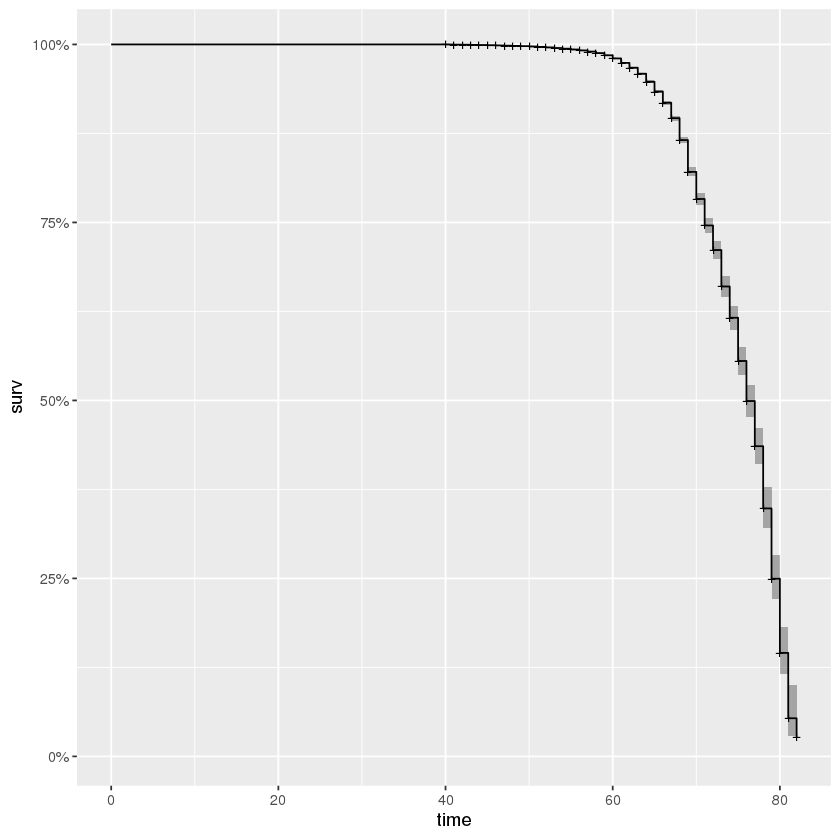

In [11]:
autoplot(km_fit)

In [19]:
# ARHI, ARHI_age ~ f3581
km_fit = survfit(Surv(data$f3393_age,data$f3393)~data$f2724)
summary(km_fit)

Call: survfit(formula = Surv(data$f3393_age, data$f3393) ~ data$f2724)

64005 observations deleted due to missingness 
                data$f2724=0 
 time n.risk n.event survival  std.err lower 95% CI upper 95% CI
   40  33740       8    1.000 8.38e-05       0.9996        1.000
   41  32383      20    0.999 1.61e-04       0.9988        0.999
   42  29427      21    0.998 2.24e-04       0.9980        0.999
   43  26592      23    0.998 2.87e-04       0.9970        0.998
   44  23589      20    0.997 3.44e-04       0.9960        0.997
   45  20601      30    0.995 4.33e-04       0.9944        0.996
   46  17491      26    0.994 5.21e-04       0.9928        0.995
   47  14734      19    0.993 5.98e-04       0.9913        0.994
   48  12024      28    0.990 7.39e-04       0.9888        0.992
   49   9437      21    0.988 8.80e-04       0.9863        0.990
   50   7103      24    0.985 1.11e-03       0.9825        0.987
   51   5131      20    0.981 1.40e-03       0.9781        0.984
   52 

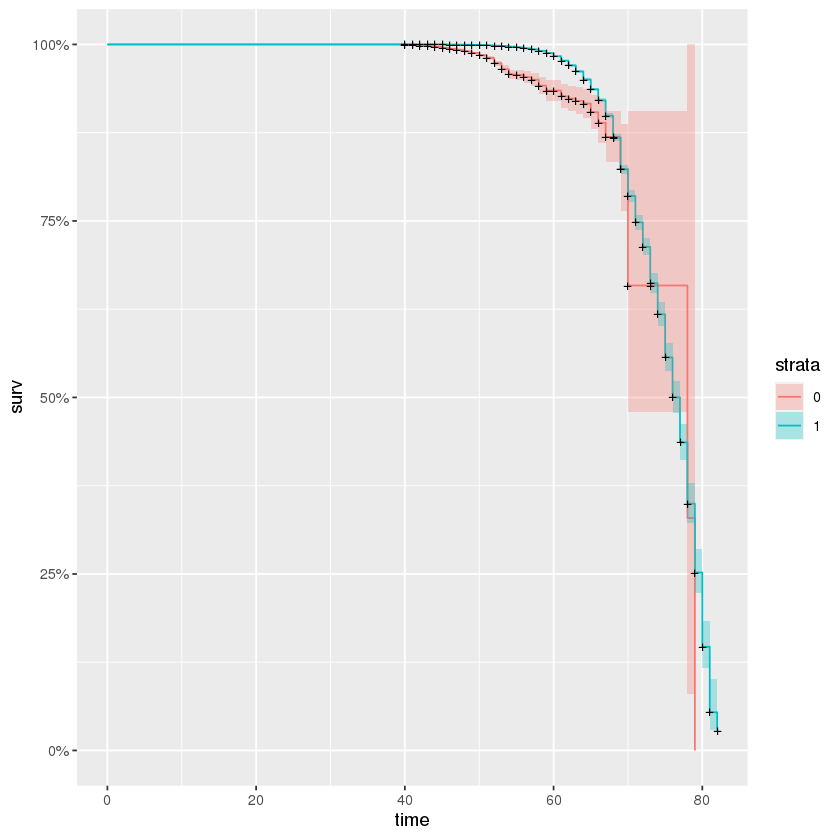

In [16]:
autoplot(km_fit)

In [18]:
# ARHI, ARHI_age ~ f2724+f2814 
cox <- coxph(Surv(f3393_age,f3393)~f2724+f2814,data = data)
summary(cox)

Call:
coxph(formula = Surv(f3393_age, f3393) ~ f2724 + f2814, data = data)

  n= 124543, number of events= 5481 
   (64556 observations deleted due to missingness)

          coef exp(coef) se(coef)       z Pr(>|z|)    
f2724 -1.63390   0.19517  0.06171 -26.478  < 2e-16 ***
f2814  0.07090   1.07347  0.02744   2.583  0.00978 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

      exp(coef) exp(-coef) lower .95 upper .95
f2724    0.1952     5.1238    0.1729    0.2203
f2814    1.0735     0.9316    1.0173    1.1328

Concordance= 0.564  (se = 0.005 )
Likelihood ratio test= 501.8  on 2 df,   p=<2e-16
Wald test            = 701.1  on 2 df,   p=<2e-16
Score (logrank) test = 815.7  on 2 df,   p=<2e-16


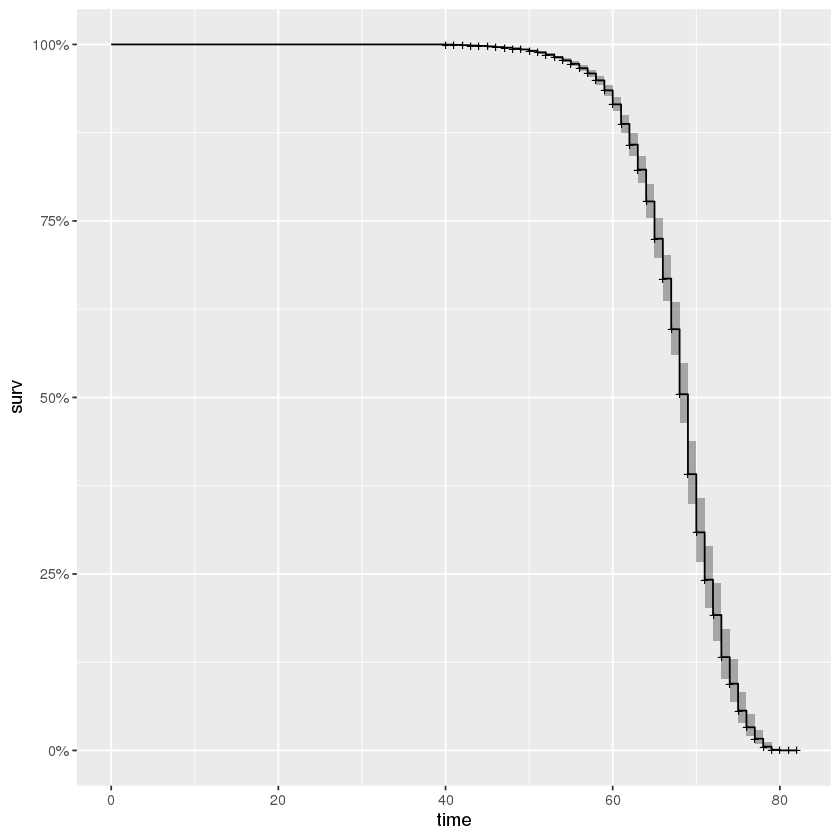

In [20]:
autoplot(survfit(cox))

Warning message:
“`gather_()` was deprecated in tidyr 1.2.0.
Please use `gather()` instead.
This warning is displayed once every 8 hours.
Call `lifecycle::last_lifecycle_warnings()` to see where this warning was generated.”


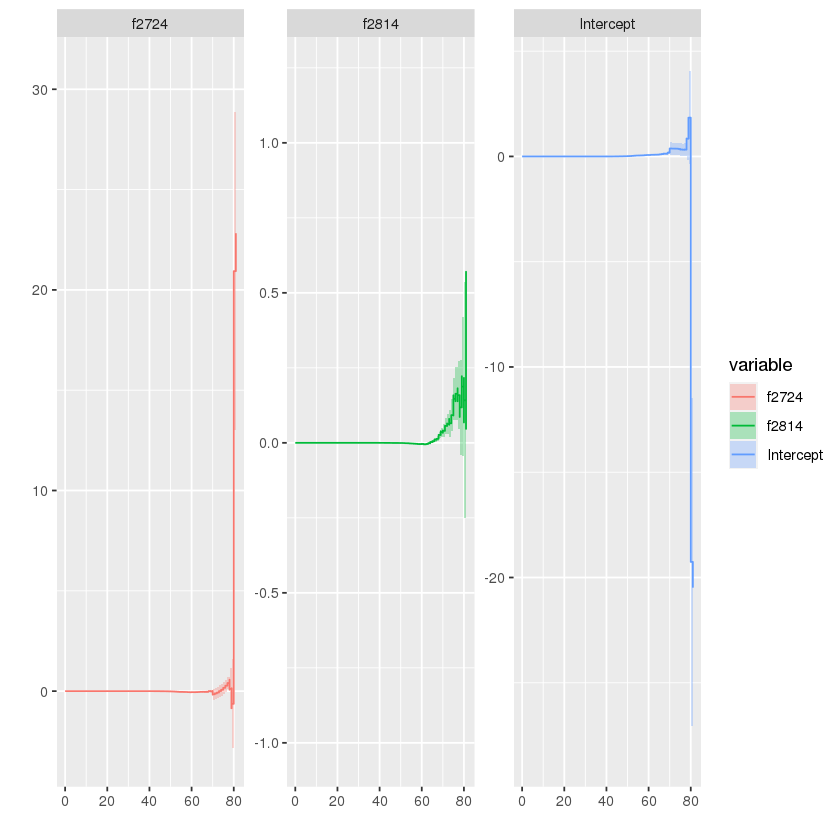

In [21]:
aa_fit <-aareg(Surv(f3393_age,f3393)~f2724+f2814,data = data)
autoplot(aa_fit)